# Getting started with INTEGRATE

This notebook contains a simple example of getting started with INTEGRATE

0. Load some data (DAUGAARD.h5)
1a. Setup a prior leading to the file PRIOR.h5
1b. Update the prior model parameters with prior data in PRIOR.h5
2. Perform probabilistic inversion using integrate_rejection leading to the file POST.h5
3. Plot some results

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # #%load_ext autoreload
    # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True 
import matplotlib.pyplot as plt
plt.show()

Notebook detected. Parallel processing is OK


## 0. Get some TTEM data
A number of test cases are available in the INTEGRATE package
To see which cases are available, check the `get_case_data` function

The code below will download the file DAUGAARD_AVG.h5 that contains 
a number of TTEM soundings from DAUGAARD, Denmark.
It will also download the corresponding GEX file, TX07_20231016_2x4_RC20-33.gex, 
that contains information about the TTEM system used.


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case, showInfo=2)
f_data_h5 = files[0]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

Getting data for case: DAUGAARD
File DAUGAARD_AVG.h5 already exists. Skipping download.
File TX07_20231016_2x4_RC20-33.gex already exists. Skipping download.
File README_DAUGAARD already exists. Skipping download.
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex


### Plot the geometry and the data
ig.plot_geometry plots the geometry of the data, i.e. the locations of the soundings.
ig.plot_data plots the data, i.e. the measured data for each sounding.

f_data_h5=DAUGAARD_AVG.h5


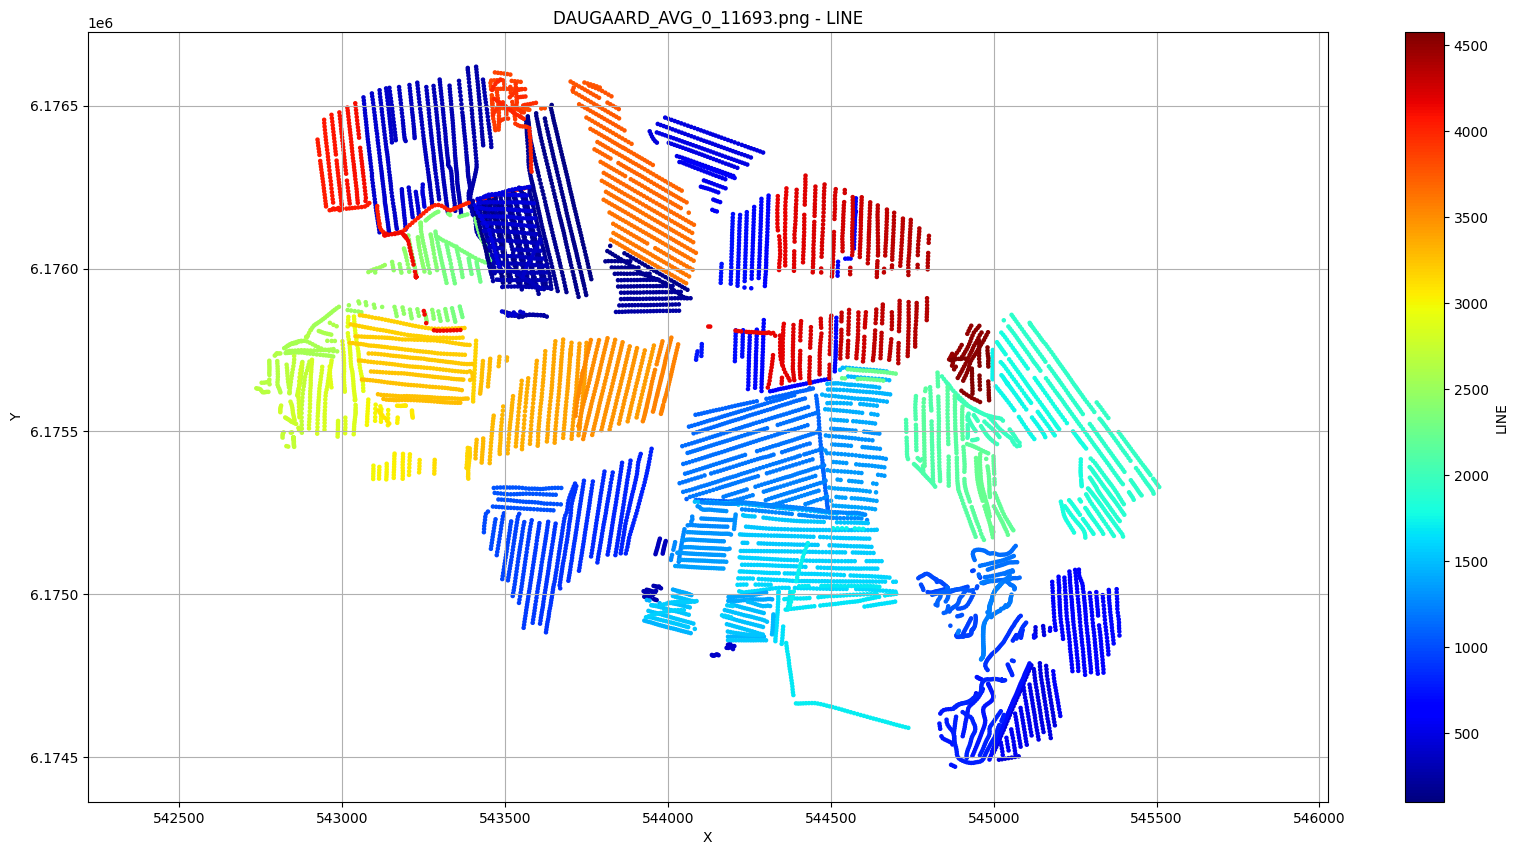

f_data_h5=DAUGAARD_AVG.h5


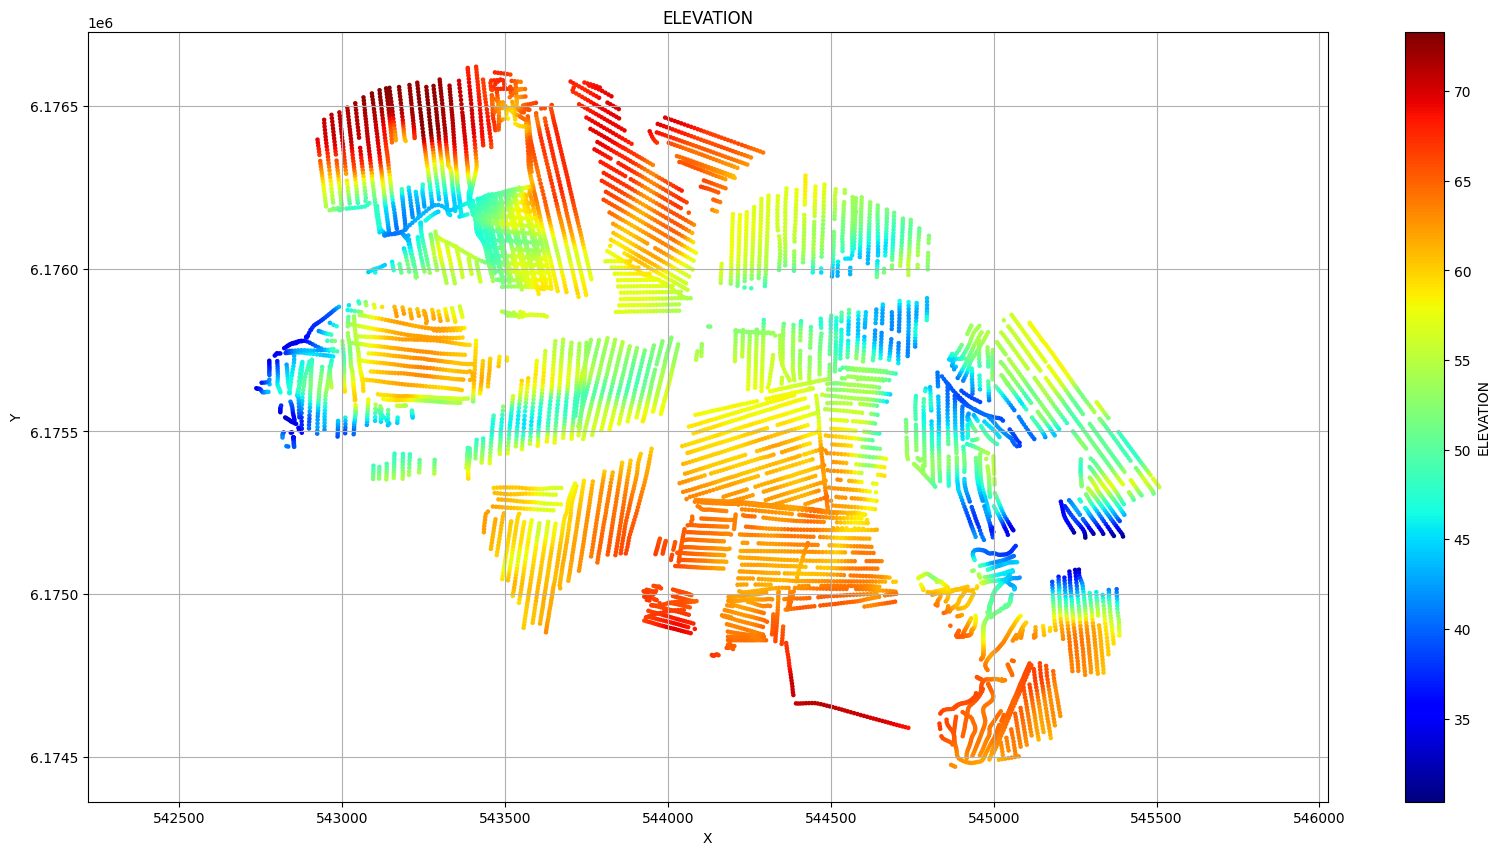

f_data_h5=DAUGAARD_AVG.h5


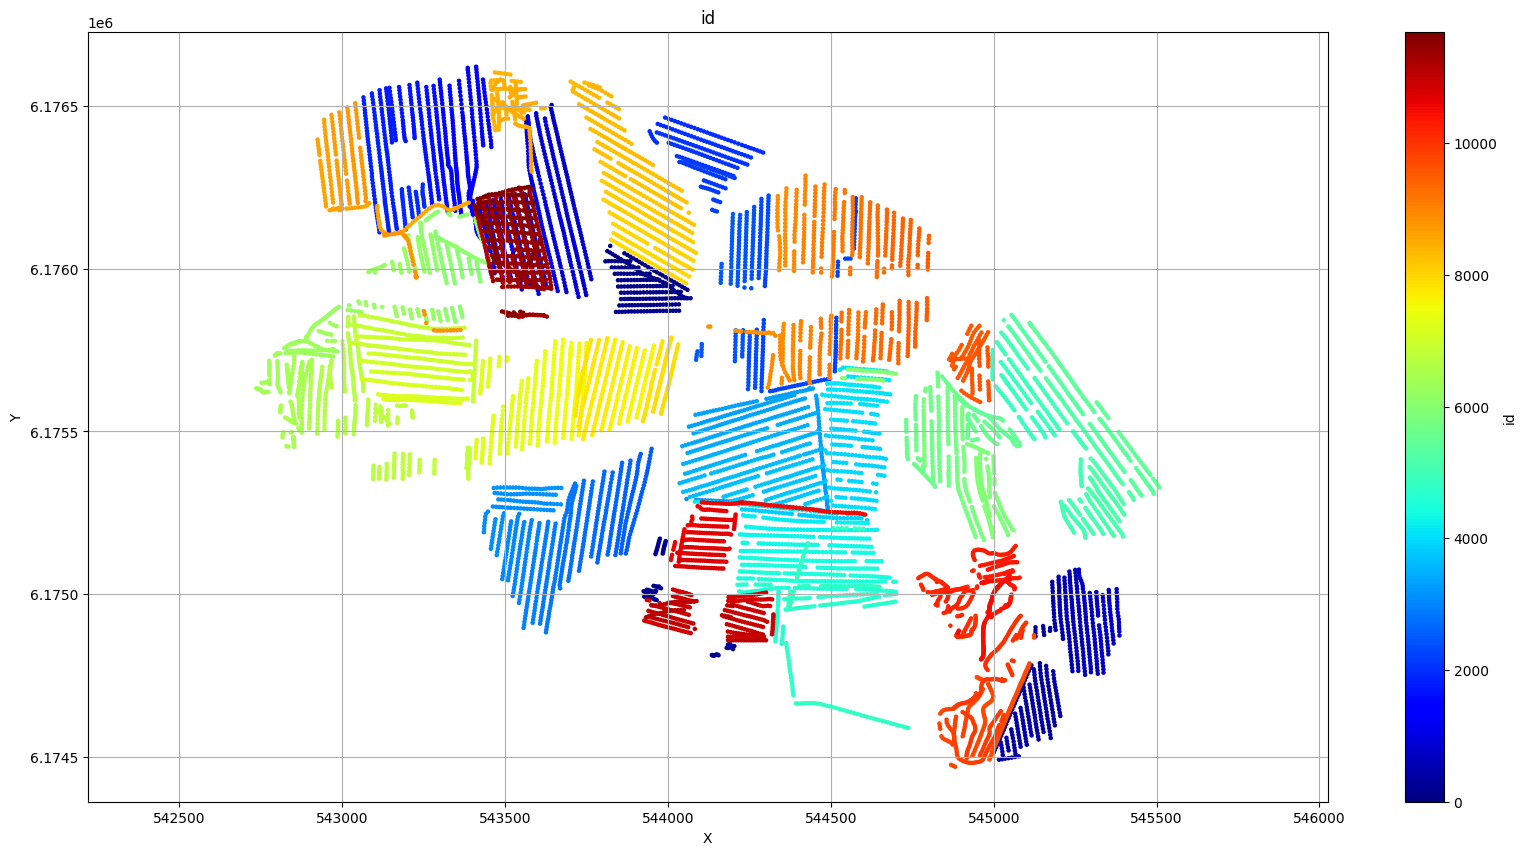

In [4]:
# The next line plots LINE, ELEVATION and data id, as three scatter plots
# ig.plot_geometry(f_data_h5)
# Each of these plots can be plotted separately by specifying the pl argument
ig.plot_geometry(f_data_h5, pl='LINE')
ig.plot_geometry(f_data_h5, pl='ELEVATION')
ig.plot_geometry(f_data_h5, pl='id')

plot_data: Found data set D1
plot_data: Using data set D1


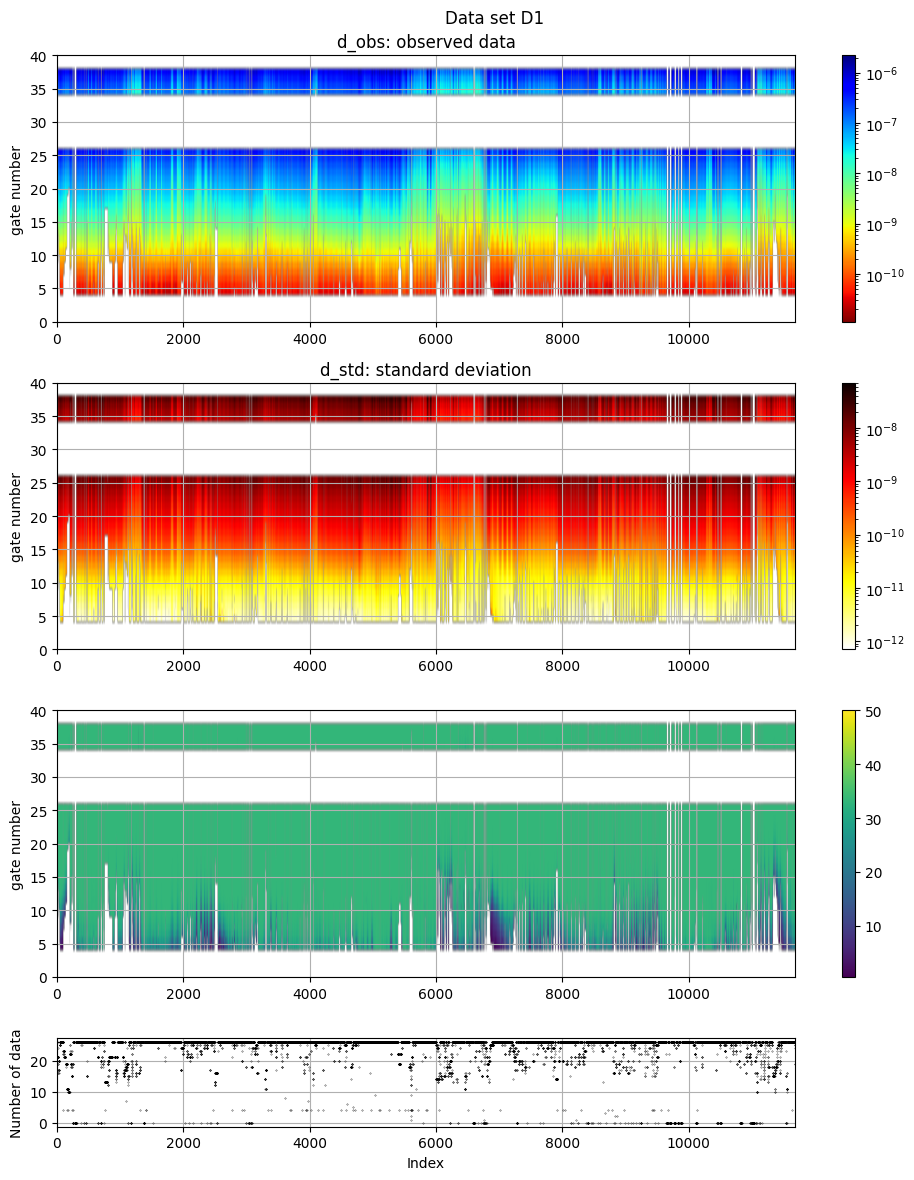

In [5]:
# The data, d_obs and d_std, can be plotted using ig.plot_data
ig.plot_data(f_data_h5, hardcopy=hardcopy)

## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. First, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

As an example, we choose a simple layered model. 
The number of layers follow a chi-squared distribution with 4 degrees of freedom, and the resistivity in each layer is log-uniform between [1,3000].
This will create N realizations of 3 types of model parameters: 

    PRIOR:/M1: 1D resistivity values in layers of 1m thickness down to 90m depth
    PRIOR:/M2: 1D resistivity values in discrete sets of [Nlayer,Nlayer-1] parameters where the first Nlayer parameters are resistivities, and the last Nlayer-1 parameters are depths to the base of each layer.
    PRIOR:/M3: The number of layers in each model


In [6]:
# Select how many, N, prior realizations should be generated
N=100000

f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=4, RHO_min=1, RHO_max=3000, f_prior_h5='PRIOR.h5')
print('%s is used to hold prior realizations' % (f_prior_h5))




PRIOR.h5 is used to hold prior realizations


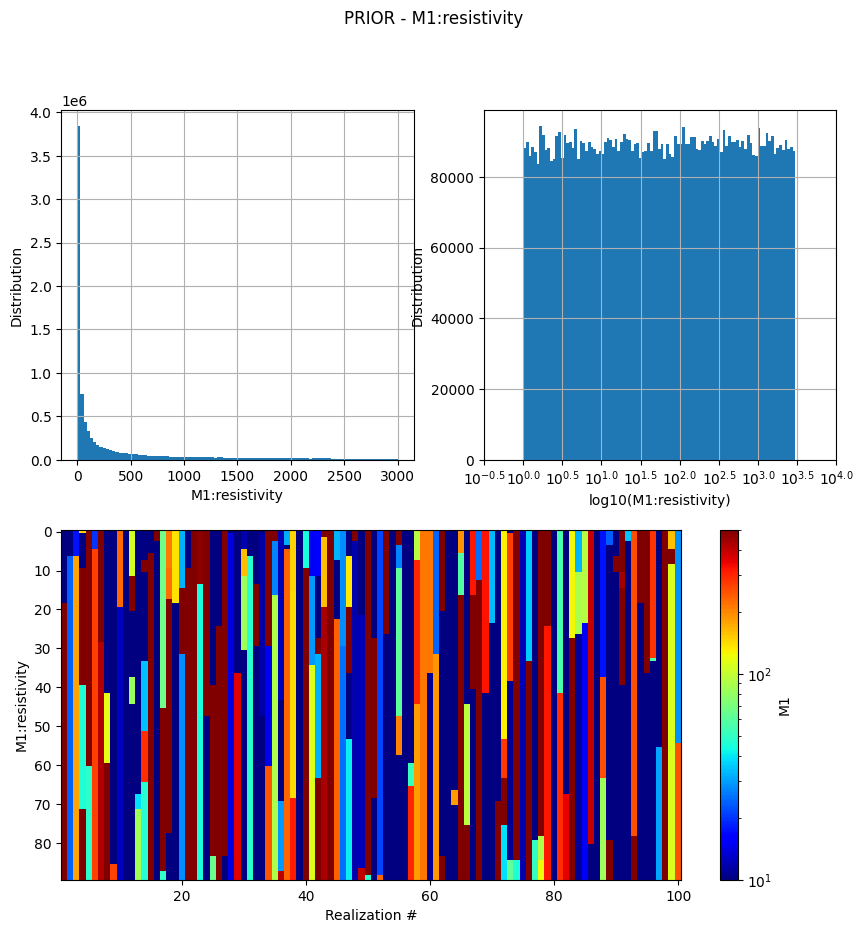

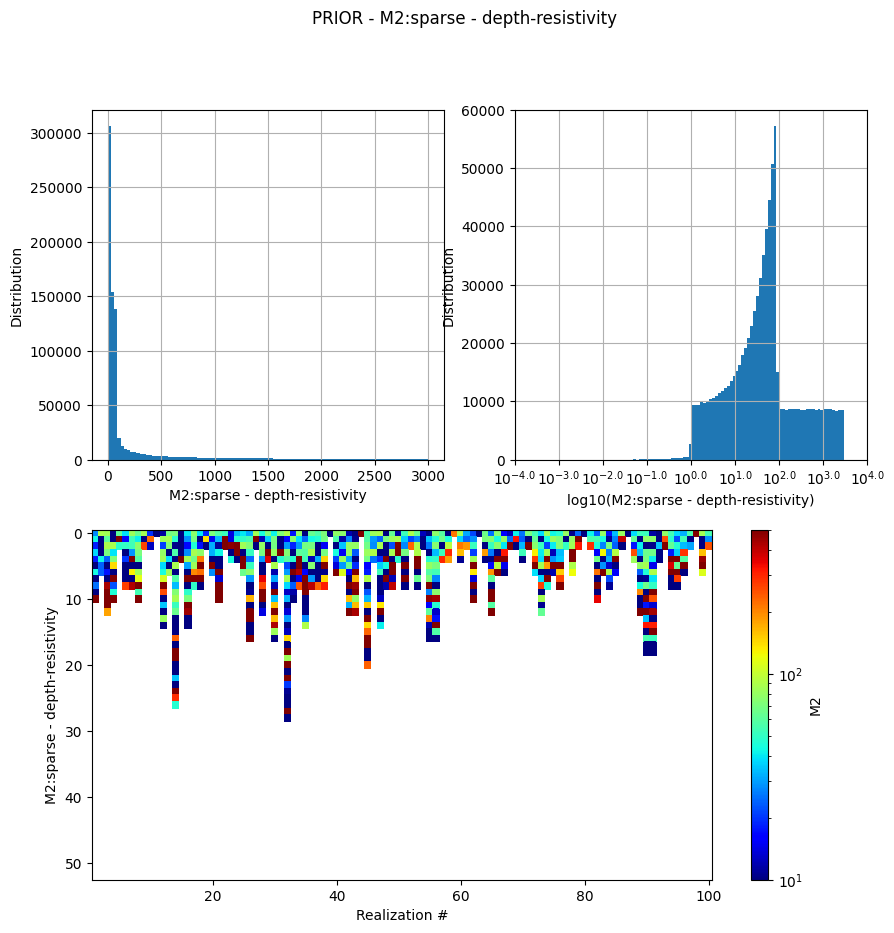

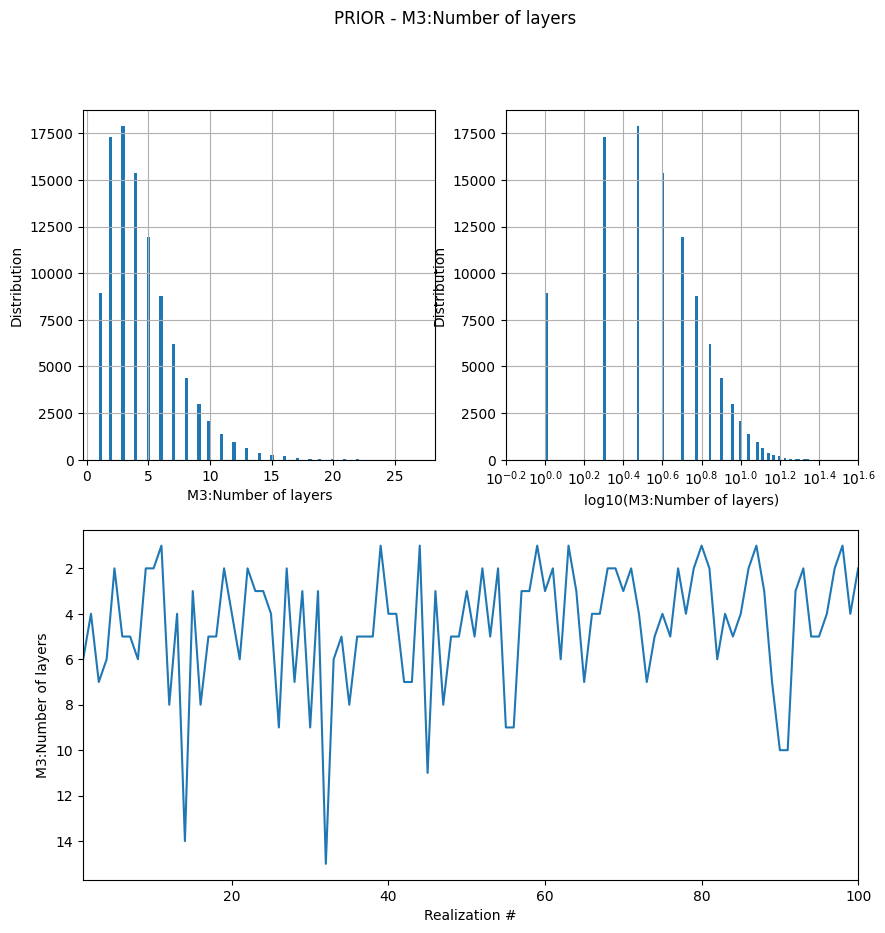

In [7]:
# Plot some summary statistics of the prior model, to QC the prior choice
ig.plot_prior_stats(f_prior_h5, hardcopy=hardcopy)

### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

Then the prior data, corresponding to the prior model parameters, are computed, using the GA-AEM code and the GEX file (from the DATA).



In [8]:
# To update the PRIOR.h5
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, doMakePriorCopy=False, parallel=parallel)
# To create a COPY of PRIOR.h5 and update that
# f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel)

print('Updated %s to hold prior DATA' % (f_prior_data_h5))

prior_data_gaaem: Using 128 parallel threads.


prior_data_gaaem: Time=109.4s/100000 soundings.  1.1ms/sounding, 914.0it/s
Updated PRIOR.h5 to hold prior DATA


It can be useful to compare the prior data to the observed data before inversion. If there is little to no overlap of the observed data with the prior data, there is little chance that the inversion will go well. This would be an indication of inconsistency.
In the figure below, one can see that the observed data (red) is clearly within the space of the prior data.

id_data = 1


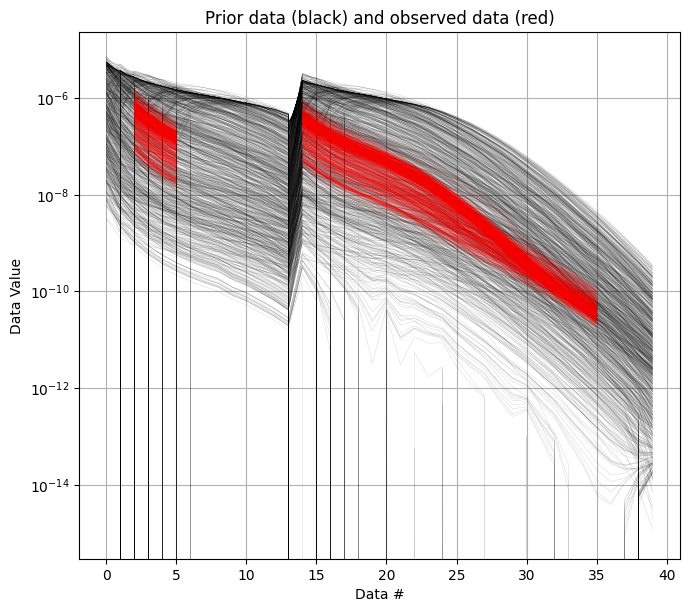

True

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                                            | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   1%|█▌                                                                                                                                                 | 32/3125 [00:01<01:36, 31.98it/s]

gatdaem1d:   1%|█▏                                                                                                                                                 | 25/3125 [00:01<02:05, 24.72it/s]

gatdaem1d:   1%|█▎                                                                                                                                                 | 28/3125 [00:01<01:53, 27.20it/s]

gatdaem1d:   1%|█▏                                                                                                                                                 | 24/3125 [00:01<02:09, 23.99it/s]

gatdaem1d:   1%|█▏                                                                                                                                                 | 24/3125 [00:01<02:12, 23.44it/s]

gatdaem1d:   1%|█▏                                                                                                                                                 | 24/3125 [00:01<02:09, 23.89it/s]

gatdaem1d:   1%|█▏                                                                                                                                                 | 25/3125 [00:01<02:06, 24.45it/s]

gatdaem1d:   1%|█▌                                                                                                                                                 | 32/3125 [00:01<01:38, 31.31it/s]

gatdaem1d:   1%|█▋                                                                                                                                                 | 35/3125 [00:01<01:28, 34.92it/s]

gatdaem1d:   1%|█                                                                                                                                                  | 22/3125 [00:01<02:21, 21.94it/s]

gatdaem1d:   1%|▉                                                                                                                                                  | 21/3125 [00:01<02:30, 20.58it/s]

gatdaem1d:   1%|█▌                                                                                                                                                 | 32/3125 [00:01<01:38, 31.40it/s]

gatdaem1d:   1%|█▊                                                                                                                                                 | 38/3125 [00:01<01:23, 36.92it/s]

gatdaem1d:   1%|█▌                                                                                                                                                 | 34/3125 [00:01<01:31, 33.91it/s]

gatdaem1d:   1%|█▎                                                                                                                                                 | 29/3125 [00:01<01:46, 28.96it/s]

gatdaem1d:   1%|█▌                                                                                                                                                 | 34/3125 [00:01<01:31, 33.96it/s]

gatdaem1d:   1%|█▋                                                                                                                                                 | 35/3125 [00:01<01:31, 33.71it/s]

gatdaem1d:   1%|█▌                                                                                                                                                 | 32/3125 [00:01<01:37, 31.73it/s]

gatdaem1d:   1%|▉                                                                                                                                                  | 21/3125 [00:01<02:28, 20.91it/s]

gatdaem1d:   1%|█▏                                                                                                                                                 | 25/3125 [00:01<02:08, 24.04it/s]

gatdaem1d:   1%|█▏                                                                                                                                                 | 24/3125 [00:01<02:11, 23.64it/s]

gatdaem1d:   1%|▉                                                                                                                                                  | 20/3125 [00:01<02:38, 19.65it/s]

gatdaem1d:   1%|█▏                                                                                                                                                 | 26/3125 [00:01<02:07, 24.27it/s]

gatdaem1d:   1%|█▋                                                                                                                                                 | 35/3125 [00:01<01:29, 34.61it/s]

gatdaem1d:   1%|█▌                                                                                                                                                 | 33/3125 [00:01<01:34, 32.85it/s]

gatdaem1d:   1%|█▏                                                                                                                                                 | 24/3125 [00:01<02:12, 23.45it/s]

gatdaem1d:   1%|█▍                                                                                                                                                 | 30/3125 [00:01<01:44, 29.54it/s]

gatdaem1d:   1%|▉                                                                                                                                                  | 20/3125 [00:01<02:39, 19.52it/s]

gatdaem1d:   1%|█                                                                                                                                                  | 22/3125 [00:01<02:22, 21.72it/s]

gatdaem1d:   1%|█▌                                                                                                                                                 | 32/3125 [00:01<01:39, 31.16it/s]

gatdaem1d:   1%|▉                                                                                                                                                  | 19/3125 [00:01<02:44, 18.85it/s]

gatdaem1d:   1%|█▌                                                                                                                                                 | 32/3125 [00:01<01:43, 29.80it/s]

gatdaem1d:   2%|███                                                                                                                                                | 65/3125 [00:02<01:35, 31.91it/s]

gatdaem1d:   2%|██▋                                                                                                                                                | 56/3125 [00:02<01:49, 28.03it/s]

gatdaem1d:   2%|██▍                                                                                                                                                | 52/3125 [00:02<01:56, 26.37it/s]

gatdaem1d:   2%|██▎                                                                                                                                                | 49/3125 [00:02<02:05, 24.54it/s]

gatdaem1d:   2%|██▍                                                                                                                                                | 53/3125 [00:02<01:52, 27.32it/s]

gatdaem1d:   2%|██▍                                                                                                                                                | 51/3125 [00:02<02:03, 24.85it/s]

gatdaem1d:   2%|██▍                                                                                                                                                | 52/3125 [00:02<01:58, 25.85it/s]

gatdaem1d:   2%|██▎                                                                                                                                                | 49/3125 [00:02<02:06, 24.24it/s]

gatdaem1d:   2%|██▎                                                                                                                                                | 50/3125 [00:02<02:09, 23.69it/s]

gatdaem1d:   2%|██▍                                                                                                                                                | 51/3125 [00:02<01:59, 25.70it/s]

gatdaem1d:   2%|██▎                                                                                                                                                | 48/3125 [00:02<02:17, 22.42it/s]

gatdaem1d:   2%|██▎                                                                                                                                                | 50/3125 [00:02<02:09, 23.71it/s]

gatdaem1d:   2%|██▎                                                                                                                                                | 48/3125 [00:02<02:17, 22.34it/s]

gatdaem1d:   2%|██▌                                                                                                                                                | 55/3125 [00:02<01:48, 28.35it/s]

gatdaem1d:   2%|███▎                                                                                                                                               | 70/3125 [00:02<01:30, 33.65it/s]

gatdaem1d:   2%|███▏                                                                                                                                               | 69/3125 [00:02<01:35, 32.17it/s]

gatdaem1d:   2%|██▌                                                                                                                                                | 54/3125 [00:02<01:52, 27.26it/s]

gatdaem1d:   2%|███                                                                                                                                                | 66/3125 [00:02<01:37, 31.44it/s]

gatdaem1d:   2%|██▊                                                                                                                                                | 61/3125 [00:02<01:43, 29.64it/s]

gatdaem1d:   2%|███                                                                                                                                                | 66/3125 [00:02<01:35, 32.17it/s]

gatdaem1d:   2%|███▏                                                                                                                                               | 68/3125 [00:02<01:36, 31.56it/s]

gatdaem1d:   2%|██▍                                                                                                                                                | 52/3125 [00:02<01:55, 26.71it/s]

gatdaem1d:   2%|██▍                                                                                                                                                | 51/3125 [00:02<02:15, 22.68it/s]

gatdaem1d:   2%|██▋                                                                                                                                                | 56/3125 [00:02<02:09, 23.75it/s]

gatdaem1d:   2%|███                                                                                                                                                | 64/3125 [00:02<01:54, 26.62it/s]

gatdaem1d:   2%|██▋                                                                                                                                                | 58/3125 [00:02<02:04, 24.59it/s]

gatdaem1d:   2%|██▉                                                                                                                                                | 62/3125 [00:02<01:49, 27.90it/s]

gatdaem1d:   2%|███                                                                                                                                                | 64/3125 [00:02<01:58, 25.91it/s]

gatdaem1d:   2%|███▏                                                                                                                                               | 68/3125 [00:02<01:52, 27.17it/s]

gatdaem1d:   2%|███                                                                                                                                                | 64/3125 [00:02<02:01, 25.10it/s]

gatdaem1d:   2%|███▌                                                                                                                                               | 75/3125 [00:02<01:48, 28.18it/s]

gatdaem1d:   2%|███▎                                                                                                                                               | 70/3125 [00:02<01:58, 25.80it/s]

gatdaem1d:   3%|████▌                                                                                                                                              | 97/3125 [00:03<01:36, 31.39it/s]

gatdaem1d:   3%|███▊                                                                                                                                               | 80/3125 [00:03<01:53, 26.72it/s]

gatdaem1d:   3%|███▋                                                                                                                                               | 79/3125 [00:03<01:56, 26.19it/s]

gatdaem1d:   3%|███▊                                                                                                                                               | 81/3125 [00:03<01:52, 27.09it/s]

gatdaem1d:   3%|███▉                                                                                                                                               | 84/3125 [00:03<01:45, 28.75it/s]

gatdaem1d:   3%|███▋                                                                                                                                               | 79/3125 [00:03<01:56, 26.08it/s]

gatdaem1d:   2%|███▍                                                                                                                                               | 74/3125 [00:03<02:08, 23.82it/s]

gatdaem1d:   2%|███▋                                                                                                                                               | 78/3125 [00:03<01:57, 25.87it/s]

gatdaem1d:   2%|███▍                                                                                                                                               | 74/3125 [00:03<02:08, 23.80it/s]

gatdaem1d:   3%|████▌                                                                                                                                              | 98/3125 [00:03<01:35, 31.63it/s]

gatdaem1d:   3%|████▊                                                                                                                                             | 102/3125 [00:03<01:33, 32.35it/s]

gatdaem1d:   3%|████▎                                                                                                                                              | 93/3125 [00:03<01:39, 30.50it/s]

gatdaem1d:   2%|███▎                                                                                                                                               | 71/3125 [00:03<02:18, 21.97it/s]

gatdaem1d:   3%|████▋                                                                                                                                             | 100/3125 [00:03<01:35, 31.60it/s]

gatdaem1d:   2%|███▍                                                                                                                                               | 74/3125 [00:03<02:13, 22.79it/s]

gatdaem1d:   3%|███▊                                                                                                                                               | 82/3125 [00:03<01:48, 27.98it/s]

gatdaem1d:   3%|████▋                                                                                                                                              | 99/3125 [00:03<01:35, 31.75it/s]

gatdaem1d:   3%|███▊                                                                                                                                               | 82/3125 [00:03<01:54, 26.59it/s]

gatdaem1d:   3%|████▊                                                                                                                                             | 104/3125 [00:03<01:34, 32.13it/s]

gatdaem1d:   2%|███▍                                                                                                                                               | 74/3125 [00:03<02:18, 21.96it/s]

gatdaem1d:   3%|███▊                                                                                                                                               | 81/3125 [00:03<02:02, 24.81it/s]

gatdaem1d:   3%|███▉                                                                                                                                               | 84/3125 [00:03<01:55, 26.23it/s]

gatdaem1d:   3%|████▍                                                                                                                                              | 95/3125 [00:03<01:47, 28.24it/s]

gatdaem1d:   3%|███▊                                                                                                                                               | 81/3125 [00:03<02:10, 23.24it/s]

gatdaem1d:   3%|███▉                                                                                                                                               | 85/3125 [00:03<02:05, 24.17it/s]

gatdaem1d:   3%|████▎                                                                                                                                              | 92/3125 [00:03<01:47, 28.33it/s]

gatdaem1d:   3%|███▉                                                                                                                                               | 84/3125 [00:03<02:06, 23.99it/s]

gatdaem1d:   3%|████▎                                                                                                                                              | 91/3125 [00:03<02:01, 24.96it/s]

gatdaem1d:   3%|████▏                                                                                                                                              | 90/3125 [00:03<02:08, 23.65it/s]

gatdaem1d:   3%|████▌                                                                                                                                              | 97/3125 [00:03<01:59, 25.24it/s]

gatdaem1d:   3%|████▌                                                                                                                                              | 98/3125 [00:03<02:04, 24.34it/s]

gatdaem1d:   3%|████▉                                                                                                                                             | 105/3125 [00:03<02:00, 25.08it/s]

gatdaem1d:   4%|██████                                                                                                                                            | 129/3125 [00:04<01:37, 30.61it/s]

gatdaem1d:   4%|█████▎                                                                                                                                            | 113/3125 [00:04<01:43, 28.99it/s]

gatdaem1d:   4%|█████▏                                                                                                                                            | 112/3125 [00:04<01:45, 28.52it/s]

gatdaem1d:   4%|█████▍                                                                                                                                            | 116/3125 [00:04<01:41, 29.60it/s]

gatdaem1d:   3%|████▉                                                                                                                                             | 106/3125 [00:04<01:52, 26.84it/s]

gatdaem1d:   3%|████▌                                                                                                                                              | 98/3125 [00:04<02:09, 23.46it/s]

gatdaem1d:   3%|████▊                                                                                                                                             | 104/3125 [00:04<01:58, 25.56it/s]

gatdaem1d:   4%|██████                                                                                                                                            | 130/3125 [00:04<01:34, 31.55it/s]

gatdaem1d:   4%|█████▉                                                                                                                                            | 126/3125 [00:04<01:36, 31.23it/s]

gatdaem1d:   4%|██████▏                                                                                                                                           | 132/3125 [00:04<01:34, 31.59it/s]

gatdaem1d:   3%|████▉                                                                                                                                             | 106/3125 [00:04<01:59, 25.26it/s]

gatdaem1d:   4%|█████▍                                                                                                                                            | 117/3125 [00:04<01:38, 30.53it/s]

gatdaem1d:   3%|████▌                                                                                                                                              | 97/3125 [00:04<02:15, 22.42it/s]

gatdaem1d:   4%|█████▎                                                                                                                                            | 114/3125 [00:04<01:45, 28.50it/s]

gatdaem1d:   4%|██████▍                                                                                                                                           | 138/3125 [00:04<01:31, 32.61it/s]

gatdaem1d:   4%|██████▎                                                                                                                                           | 135/3125 [00:04<01:35, 31.33it/s]

gatdaem1d:   3%|████▍                                                                                                                                              | 94/3125 [00:04<02:20, 21.60it/s]

gatdaem1d:   3%|████▌                                                                                                                                              | 96/3125 [00:04<02:19, 21.78it/s]

gatdaem1d:   3%|█████                                                                                                                                             | 109/3125 [00:04<02:01, 24.76it/s]

gatdaem1d:   4%|██████                                                                                                                                            | 129/3125 [00:04<01:39, 30.19it/s]

gatdaem1d:   4%|█████▎                                                                                                                                            | 114/3125 [00:04<01:52, 26.75it/s]

gatdaem1d:   4%|█████▏                                                                                                                                            | 111/3125 [00:04<01:55, 26.01it/s]

gatdaem1d:   4%|██████                                                                                                                                            | 131/3125 [00:04<01:40, 29.94it/s]

gatdaem1d:   3%|████▉                                                                                                                                             | 107/3125 [00:04<02:03, 24.46it/s]

gatdaem1d:   3%|█████                                                                                                                                             | 109/3125 [00:04<02:05, 23.97it/s]

gatdaem1d:   4%|█████▏                                                                                                                                            | 110/3125 [00:04<02:09, 23.35it/s]

gatdaem1d:   4%|█████▋                                                                                                                                            | 121/3125 [00:04<01:52, 26.67it/s]

gatdaem1d:   4%|█████▎                                                                                                                                            | 115/3125 [00:04<02:09, 23.31it/s]

gatdaem1d:   4%|█████▍                                                                                                                                            | 117/3125 [00:04<02:07, 23.50it/s]

gatdaem1d:   4%|█████▉                                                                                                                                            | 128/3125 [00:04<01:54, 26.09it/s]

gatdaem1d:   4%|██████▍                                                                                                                                           | 138/3125 [00:04<01:48, 27.63it/s]

gatdaem1d:   4%|█████▋                                                                                                                                            | 123/3125 [00:04<02:09, 23.20it/s]

gatdaem1d:   4%|██████▎                                                                                                                                           | 135/3125 [00:05<01:48, 27.55it/s]

gatdaem1d:   4%|█████▉                                                                                                                                            | 127/3125 [00:05<01:58, 25.40it/s]

gatdaem1d:   5%|██████▉                                                                                                                                           | 148/3125 [00:05<01:38, 30.25it/s]

gatdaem1d:   5%|██████▊                                                                                                                                           | 146/3125 [00:05<01:39, 29.96it/s]

gatdaem1d:   5%|███████▌                                                                                                                                          | 162/3125 [00:05<01:35, 31.08it/s]

gatdaem1d:   5%|██████▉                                                                                                                                           | 149/3125 [00:05<01:36, 30.98it/s]

gatdaem1d:   5%|██████▋                                                                                                                                           | 143/3125 [00:05<01:47, 27.69it/s]

gatdaem1d:   4%|█████▋                                                                                                                                            | 121/3125 [00:05<02:12, 22.71it/s]

gatdaem1d:   5%|██████▊                                                                                                                                           | 146/3125 [00:05<01:41, 29.39it/s]

gatdaem1d:   5%|███████▍                                                                                                                                          | 158/3125 [00:05<01:37, 30.40it/s]

gatdaem1d:   5%|███████▊                                                                                                                                          | 167/3125 [00:05<01:34, 31.36it/s]

gatdaem1d:   4%|█████▌                                                                                                                                            | 118/3125 [00:05<02:14, 22.42it/s]

gatdaem1d:   5%|███████▋                                                                                                                                          | 164/3125 [00:05<01:36, 30.72it/s]

gatdaem1d:   4%|██████                                                                                                                                            | 130/3125 [00:05<02:01, 24.55it/s]

gatdaem1d:   5%|███████▉                                                                                                                                          | 171/3125 [00:05<01:32, 31.78it/s]

gatdaem1d:   4%|█████▌                                                                                                                                            | 119/3125 [00:05<02:16, 22.00it/s]

gatdaem1d:   5%|███████▍                                                                                                                                          | 160/3125 [00:05<01:46, 27.78it/s]

gatdaem1d:   5%|██████▋                                                                                                                                           | 142/3125 [00:05<01:48, 27.48it/s]

gatdaem1d:   5%|██████▊                                                                                                                                           | 146/3125 [00:05<01:45, 28.24it/s]

gatdaem1d:   5%|███████▍                                                                                                                                          | 160/3125 [00:05<01:38, 30.10it/s]

gatdaem1d:   4%|██████▏                                                                                                                                           | 132/3125 [00:05<02:06, 23.65it/s]

gatdaem1d:   4%|██████▏                                                                                                                                           | 132/3125 [00:05<02:03, 24.23it/s]

gatdaem1d:   4%|██████▎                                                                                                                                           | 135/3125 [00:05<02:04, 23.92it/s]

gatdaem1d:   4%|██████▍                                                                                                                                           | 137/3125 [00:05<02:03, 24.26it/s]

gatdaem1d:   4%|██████▎                                                                                                                                           | 134/3125 [00:05<02:07, 23.46it/s]

gatdaem1d:   5%|███████▌                                                                                                                                          | 162/3125 [00:05<01:52, 26.31it/s]

gatdaem1d:   5%|██████▌                                                                                                                                           | 141/3125 [00:05<02:08, 23.27it/s]

gatdaem1d:   5%|██████▉                                                                                                                                           | 148/3125 [00:05<02:02, 24.36it/s]

gatdaem1d:   4%|██████▍                                                                                                                                           | 139/3125 [00:05<02:10, 22.83it/s]

gatdaem1d:   5%|███████▉                                                                                                                                          | 169/3125 [00:05<01:43, 28.59it/s]

gatdaem1d:   5%|███████▏                                                                                                                                          | 154/3125 [00:05<01:56, 25.59it/s]

gatdaem1d:   5%|███████▊                                                                                                                                          | 168/3125 [00:06<01:40, 29.29it/s]

gatdaem1d:   6%|████████▍                                                                                                                                         | 180/3125 [00:06<01:35, 30.83it/s]

gatdaem1d:   5%|███████▎                                                                                                                                          | 157/3125 [00:06<01:51, 26.70it/s]

gatdaem1d:   6%|████████▎                                                                                                                                         | 178/3125 [00:06<01:37, 30.35it/s]

gatdaem1d:   5%|███████▏                                                                                                                                          | 155/3125 [00:06<02:04, 23.88it/s]

gatdaem1d:   6%|█████████▏                                                                                                                                        | 196/3125 [00:06<01:31, 31.86it/s]

gatdaem1d:   5%|██████▋                                                                                                                                           | 144/3125 [00:06<02:11, 22.70it/s]

gatdaem1d:   5%|██████▉                                                                                                                                           | 148/3125 [00:06<02:00, 24.81it/s]

gatdaem1d:   6%|████████▉                                                                                                                                         | 190/3125 [00:06<01:36, 30.53it/s]

gatdaem1d:   6%|█████████                                                                                                                                         | 195/3125 [00:06<01:36, 30.30it/s]

gatdaem1d:   5%|███████▏                                                                                                                                          | 155/3125 [00:06<02:02, 24.24it/s]

gatdaem1d:   5%|██████▋                                                                                                                                           | 143/3125 [00:06<02:12, 22.55it/s]

gatdaem1d:   6%|█████████▎                                                                                                                                        | 199/3125 [00:06<01:35, 30.61it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                        | 203/3125 [00:06<01:32, 31.44it/s]

gatdaem1d:   6%|█████████                                                                                                                                         | 193/3125 [00:06<01:34, 30.95it/s]

gatdaem1d:   6%|████████▏                                                                                                                                         | 174/3125 [00:06<01:42, 28.75it/s]

gatdaem1d:   6%|████████▉                                                                                                                                         | 191/3125 [00:06<01:43, 28.28it/s]

gatdaem1d:   5%|███████▎                                                                                                                                          | 157/3125 [00:06<02:04, 23.77it/s]

gatdaem1d:   6%|████████▏                                                                                                                                         | 175/3125 [00:06<01:47, 27.56it/s]

gatdaem1d:   5%|███████▉                                                                                                                                          | 171/3125 [00:06<01:56, 25.34it/s]

gatdaem1d:   5%|███████▌                                                                                                                                          | 162/3125 [00:06<02:01, 24.44it/s]

gatdaem1d:   6%|████████▍                                                                                                                                         | 180/3125 [00:06<01:46, 27.59it/s]

gatdaem1d:   5%|███████▎                                                                                                                                          | 157/3125 [00:06<02:07, 23.20it/s]

gatdaem1d:   5%|███████▍                                                                                                                                          | 159/3125 [00:06<02:04, 23.84it/s]

gatdaem1d:   5%|███████▍                                                                                                                                          | 160/3125 [00:06<02:06, 23.39it/s]

gatdaem1d:   6%|████████▏                                                                                                                                         | 176/3125 [00:06<01:56, 25.40it/s]

gatdaem1d:   5%|███████▊                                                                                                                                          | 167/3125 [00:06<02:02, 24.24it/s]

gatdaem1d:   6%|████████                                                                                                                                          | 173/3125 [00:06<02:04, 23.78it/s]

gatdaem1d:   6%|█████████▎                                                                                                                                        | 199/3125 [00:07<01:41, 28.70it/s]

gatdaem1d:   6%|████████▊                                                                                                                                         | 189/3125 [00:06<01:56, 25.10it/s]

gatdaem1d:   5%|███████▋                                                                                                                                          | 165/3125 [00:06<02:12, 22.26it/s]

gatdaem1d:   6%|████████▋                                                                                                                                         | 185/3125 [00:07<01:49, 26.92it/s]

gatdaem1d:   6%|█████████▎                                                                                                                                        | 198/3125 [00:07<01:39, 29.47it/s]

gatdaem1d:   7%|█████████▊                                                                                                                                        | 211/3125 [00:07<01:34, 30.87it/s]

gatdaem1d:   6%|████████▋                                                                                                                                         | 186/3125 [00:07<01:47, 27.40it/s]

gatdaem1d:   7%|█████████▊                                                                                                                                        | 209/3125 [00:07<01:36, 30.34it/s]

gatdaem1d:   7%|██████████▋                                                                                                                                       | 229/3125 [00:07<01:30, 32.17it/s]

gatdaem1d:   6%|████████▍                                                                                                                                         | 180/3125 [00:07<02:04, 23.70it/s]

gatdaem1d:   6%|████████▎                                                                                                                                         | 177/3125 [00:07<01:53, 26.05it/s]

gatdaem1d:   7%|██████████▎                                                                                                                                       | 221/3125 [00:07<01:35, 30.41it/s]

gatdaem1d:   5%|███████▊                                                                                                                                          | 167/3125 [00:07<02:12, 22.33it/s]

gatdaem1d:   5%|███████▊                                                                                                                                          | 168/3125 [00:07<02:07, 23.16it/s]

gatdaem1d:   7%|██████████▌                                                                                                                                       | 226/3125 [00:07<01:36, 30.05it/s]

gatdaem1d:   6%|████████▍                                                                                                                                         | 180/3125 [00:07<02:01, 24.18it/s]

gatdaem1d:   8%|███████████                                                                                                                                       | 236/3125 [00:07<01:30, 31.82it/s]

gatdaem1d:   7%|█████████▌                                                                                                                                        | 205/3125 [00:07<01:40, 29.16it/s]

gatdaem1d:   7%|██████████▍                                                                                                                                       | 223/3125 [00:07<01:39, 29.18it/s]

gatdaem1d:   6%|████████▌                                                                                                                                         | 183/3125 [00:07<02:01, 24.29it/s]

gatdaem1d:   7%|██████████▌                                                                                                                                       | 225/3125 [00:07<01:35, 30.33it/s]

gatdaem1d:   7%|█████████▉                                                                                                                                        | 212/3125 [00:07<01:41, 28.65it/s]

gatdaem1d:   7%|██████████▋                                                                                                                                       | 230/3125 [00:07<01:41, 28.47it/s]

gatdaem1d:   6%|████████▌                                                                                                                                         | 183/3125 [00:07<02:03, 23.91it/s]

gatdaem1d:   6%|█████████▏                                                                                                                                        | 197/3125 [00:07<01:57, 24.84it/s]

gatdaem1d:   6%|████████▋                                                                                                                                         | 185/3125 [00:07<02:00, 24.35it/s]

gatdaem1d:   6%|████████▌                                                                                                                                         | 184/3125 [00:07<02:07, 23.03it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                        | 203/3125 [00:07<01:53, 25.64it/s]

gatdaem1d:   6%|████████▋                                                                                                                                         | 187/3125 [00:07<02:09, 22.69it/s]

gatdaem1d:   6%|█████████▍                                                                                                                                        | 203/3125 [00:07<01:58, 24.66it/s]

gatdaem1d:   6%|████████▉                                                                                                                                         | 192/3125 [00:07<02:02, 24.03it/s]

gatdaem1d:   7%|█████████▌                                                                                                                                        | 205/3125 [00:07<01:51, 26.16it/s]

gatdaem1d:   7%|██████████▋                                                                                                                                       | 229/3125 [00:08<01:41, 28.55it/s]

gatdaem1d:   8%|███████████▎                                                                                                                                      | 242/3125 [00:08<01:33, 30.68it/s]

gatdaem1d:   6%|████████▊                                                                                                                                         | 188/3125 [00:08<02:16, 21.46it/s]

gatdaem1d:   7%|██████████                                                                                                                                        | 215/3125 [00:08<02:02, 23.83it/s]

gatdaem1d:   7%|█████████▉                                                                                                                                        | 213/3125 [00:08<01:54, 25.45it/s]

gatdaem1d:   7%|█████████▌                                                                                                                                        | 206/3125 [00:08<01:48, 26.90it/s]

gatdaem1d:   7%|█████████▌                                                                                                                                        | 205/3125 [00:08<02:02, 23.88it/s]

gatdaem1d:   8%|████████████▏                                                                                                                                     | 262/3125 [00:08<01:30, 31.58it/s]

gatdaem1d:   7%|█████████▉                                                                                                                                        | 214/3125 [00:08<01:50, 26.39it/s]

gatdaem1d:   8%|███████████▏                                                                                                                                      | 240/3125 [00:08<01:37, 29.58it/s]

gatdaem1d:   8%|███████████▉                                                                                                                                      | 255/3125 [00:08<01:31, 31.43it/s]

gatdaem1d:   6%|████████▉                                                                                                                                         | 190/3125 [00:08<02:11, 22.32it/s]

gatdaem1d:   6%|█████████                                                                                                                                         | 193/3125 [00:08<02:03, 23.71it/s]

gatdaem1d:   7%|██████████▋                                                                                                                                       | 228/3125 [00:08<01:45, 27.52it/s]

gatdaem1d:   7%|█████████▉                                                                                                                                        | 212/3125 [00:08<01:50, 26.30it/s]

gatdaem1d:   8%|████████████                                                                                                                                      | 259/3125 [00:08<01:33, 30.52it/s]

gatdaem1d:   9%|████████████▌                                                                                                                                     | 268/3125 [00:08<01:31, 31.22it/s]

gatdaem1d:   8%|██████████▉                                                                                                                                       | 235/3125 [00:08<01:38, 29.20it/s]

gatdaem1d:   8%|███████████▊                                                                                                                                      | 254/3125 [00:08<01:37, 29.41it/s]

gatdaem1d:   7%|██████████                                                                                                                                        | 215/3125 [00:08<01:49, 26.51it/s]

gatdaem1d:   8%|████████████                                                                                                                                      | 258/3125 [00:08<01:32, 31.03it/s]

gatdaem1d:   8%|███████████▎                                                                                                                                      | 243/3125 [00:08<01:38, 29.25it/s]

gatdaem1d:   7%|█████████▋                                                                                                                                        | 208/3125 [00:08<02:03, 23.71it/s]

gatdaem1d:   7%|█████████▉                                                                                                                                        | 213/3125 [00:08<01:59, 24.42it/s]

gatdaem1d:   7%|█████████▊                                                                                                                                        | 210/3125 [00:08<02:04, 23.46it/s]

gatdaem1d:   8%|████████████                                                                                                                                      | 259/3125 [00:08<01:45, 27.17it/s]

gatdaem1d:   7%|██████████▋                                                                                                                                       | 229/3125 [00:08<01:54, 25.34it/s]

gatdaem1d:   7%|█████████▊                                                                                                                                        | 211/3125 [00:08<02:07, 22.85it/s]

gatdaem1d:   7%|██████████▍                                                                                                                                       | 223/3125 [00:08<02:03, 23.54it/s]

gatdaem1d:   7%|██████████▎                                                                                                                                       | 220/3125 [00:08<01:56, 24.93it/s]

gatdaem1d:   7%|██████████▉                                                                                                                                       | 234/3125 [00:08<01:47, 26.81it/s]

gatdaem1d:   8%|████████████                                                                                                                                      | 258/3125 [00:09<01:40, 28.57it/s]

gatdaem1d:   7%|██████████▋                                                                                                                                       | 229/3125 [00:09<02:02, 23.72it/s]

gatdaem1d:   9%|████████████▊                                                                                                                                     | 274/3125 [00:09<01:32, 30.83it/s]

gatdaem1d:   7%|█████████▉                                                                                                                                        | 212/3125 [00:09<02:12, 22.03it/s]

gatdaem1d:   8%|███████████▏                                                                                                                                      | 240/3125 [00:09<02:00, 23.99it/s]

gatdaem1d:   7%|██████████▉                                                                                                                                       | 234/3125 [00:09<01:54, 25.31it/s]

gatdaem1d:   8%|███████████                                                                                                                                       | 238/3125 [00:09<01:41, 28.37it/s]

gatdaem1d:   8%|███████████▍                                                                                                                                      | 244/3125 [00:09<01:44, 27.45it/s]

gatdaem1d:   9%|████████████▊                                                                                                                                     | 275/3125 [00:09<01:31, 31.00it/s]

gatdaem1d:   9%|█████████████▍                                                                                                                                    | 288/3125 [00:09<01:29, 31.83it/s]

gatdaem1d:   7%|██████████                                                                                                                                        | 215/3125 [00:09<02:05, 23.11it/s]

gatdaem1d:   8%|███████████▎                                                                                                                                      | 243/3125 [00:09<01:44, 27.55it/s]

gatdaem1d:   9%|████████████▍                                                                                                                                     | 267/3125 [00:09<01:35, 29.86it/s]

gatdaem1d:   8%|███████████▏                                                                                                                                      | 239/3125 [00:09<01:59, 24.19it/s]

gatdaem1d:   7%|██████████▏                                                                                                                                       | 217/3125 [00:09<02:06, 23.00it/s]

gatdaem1d:   8%|███████████▍                                                                                                                                      | 246/3125 [00:09<01:43, 27.74it/s]

gatdaem1d:   9%|█████████████▍                                                                                                                                    | 288/3125 [00:09<01:32, 30.58it/s]

gatdaem1d:  10%|██████████████                                                                                                                                    | 300/3125 [00:09<01:32, 30.61it/s]

gatdaem1d:   9%|█████████████▋                                                                                                                                    | 294/3125 [00:09<01:36, 29.33it/s]

gatdaem1d:   9%|████████████▊                                                                                                                                     | 273/3125 [00:09<01:37, 29.35it/s]

gatdaem1d:   8%|███████████▉                                                                                                                                      | 256/3125 [00:09<01:51, 25.83it/s]

gatdaem1d:   7%|██████████▊                                                                                                                                       | 232/3125 [00:09<02:03, 23.34it/s]

gatdaem1d:   8%|███████████▎                                                                                                                                      | 243/3125 [00:09<01:50, 26.15it/s]

gatdaem1d:   9%|█████████████▌                                                                                                                                    | 290/3125 [00:09<01:38, 28.75it/s]

gatdaem1d:   9%|█████████████▌                                                                                                                                    | 291/3125 [00:09<01:40, 28.26it/s]

gatdaem1d:   9%|█████████████▌                                                                                                                                    | 290/3125 [00:09<01:44, 27.18it/s]

gatdaem1d:   8%|███████████                                                                                                                                       | 238/3125 [00:09<02:01, 23.84it/s]

gatdaem1d:   8%|██████████▉                                                                                                                                       | 235/3125 [00:09<02:05, 23.05it/s]

gatdaem1d:   8%|███████████▉                                                                                                                                      | 255/3125 [00:10<01:57, 24.48it/s]

gatdaem1d:   8%|███████████▌                                                                                                                                      | 247/3125 [00:09<02:04, 23.13it/s]

gatdaem1d:   8%|████████████▍                                                                                                                                     | 265/3125 [00:09<01:42, 27.99it/s]

gatdaem1d:   8%|███████████▍                                                                                                                                      | 246/3125 [00:10<01:56, 24.73it/s]

gatdaem1d:   9%|█████████████▍                                                                                                                                    | 287/3125 [00:10<01:41, 27.87it/s]

gatdaem1d:   8%|███████████▊                                                                                                                                      | 254/3125 [00:10<02:01, 23.57it/s]

gatdaem1d:  10%|██████████████▎                                                                                                                                   | 306/3125 [00:10<01:30, 31.10it/s]

gatdaem1d:   8%|██████████▉                                                                                                                                       | 235/3125 [00:10<02:11, 21.90it/s]

gatdaem1d:   9%|████████████▍                                                                                                                                     | 266/3125 [00:10<01:45, 27.18it/s]

gatdaem1d:   9%|████████████▌                                                                                                                                     | 268/3125 [00:10<01:39, 28.68it/s]

gatdaem1d:   9%|████████████▊                                                                                                                                     | 274/3125 [00:10<01:41, 28.07it/s]

gatdaem1d:  10%|██████████████▉                                                                                                                                   | 320/3125 [00:10<01:28, 31.61it/s]

gatdaem1d:  10%|██████████████▍                                                                                                                                   | 308/3125 [00:10<01:30, 31.11it/s]

gatdaem1d:   9%|████████████▊                                                                                                                                     | 275/3125 [00:10<01:38, 28.87it/s]

gatdaem1d:   8%|████████████▍                                                                                                                                     | 265/3125 [00:10<02:05, 22.78it/s]

gatdaem1d:  10%|█████████████▉                                                                                                                                    | 297/3125 [00:10<01:35, 29.62it/s]

gatdaem1d:   8%|███████████▍                                                                                                                                      | 244/3125 [00:10<02:00, 23.92it/s]

gatdaem1d:  10%|██████████████▉                                                                                                                                   | 321/3125 [00:10<01:30, 31.06it/s]

gatdaem1d:   8%|███████████▏                                                                                                                                      | 239/3125 [00:10<02:11, 22.03it/s]

gatdaem1d:  11%|███████████████▌                                                                                                                                  | 332/3125 [00:10<01:31, 30.63it/s]

gatdaem1d:   9%|████████████▊                                                                                                                                     | 274/3125 [00:10<01:44, 27.23it/s]

gatdaem1d:   8%|████████████▎                                                                                                                                     | 264/3125 [00:10<02:01, 23.50it/s]

gatdaem1d:   9%|█████████████▎                                                                                                                                    | 284/3125 [00:10<01:47, 26.33it/s]

gatdaem1d:  10%|██████████████▏                                                                                                                                   | 303/3125 [00:10<01:36, 29.39it/s]

gatdaem1d:   8%|███████████▉                                                                                                                                      | 256/3125 [00:10<02:03, 23.31it/s]

gatdaem1d:  10%|███████████████▏                                                                                                                                  | 324/3125 [00:10<01:41, 27.71it/s]

gatdaem1d:  10%|██████████████▉                                                                                                                                   | 320/3125 [00:10<01:38, 28.39it/s]

gatdaem1d:  10%|███████████████▏                                                                                                                                  | 324/3125 [00:10<01:36, 28.99it/s]

gatdaem1d:   8%|████████████▏                                                                                                                                     | 260/3125 [00:10<02:02, 23.36it/s]

gatdaem1d:   8%|████████████▏                                                                                                                                     | 262/3125 [00:10<02:02, 23.39it/s]

gatdaem1d:   9%|████████████▌                                                                                                                                     | 270/3125 [00:10<01:52, 25.29it/s]

gatdaem1d:  10%|█████████████▉                                                                                                                                    | 298/3125 [00:10<01:36, 29.41it/s]

gatdaem1d:   9%|████████████▋                                                                                                                                     | 271/3125 [00:11<02:05, 22.68it/s]

gatdaem1d:   9%|████████████▋                                                                                                                                     | 272/3125 [00:11<01:53, 25.04it/s]

gatdaem1d:  10%|██████████████▉                                                                                                                                   | 320/3125 [00:11<01:44, 26.97it/s]

gatdaem1d:   9%|█████████████                                                                                                                                     | 280/3125 [00:11<01:59, 23.71it/s]

gatdaem1d:  11%|███████████████▊                                                                                                                                  | 338/3125 [00:11<01:29, 31.13it/s]

gatdaem1d:   9%|█████████████                                                                                                                                     | 280/3125 [00:11<01:58, 24.00it/s]

gatdaem1d:   8%|████████████▍                                                                                                                                     | 265/3125 [00:11<01:58, 24.22it/s]

gatdaem1d:  10%|██████████████▊                                                                                                                                   | 316/3125 [00:11<01:43, 27.22it/s]

gatdaem1d:  10%|█████████████▉                                                                                                                                    | 299/3125 [00:11<01:37, 28.86it/s]

gatdaem1d:  10%|██████████████▎                                                                                                                                   | 307/3125 [00:11<01:35, 29.52it/s]

gatdaem1d:  10%|██████████████                                                                                                                                    | 301/3125 [00:11<01:34, 29.78it/s]

gatdaem1d:  11%|████████████████▍                                                                                                                                 | 353/3125 [00:11<01:27, 31.64it/s]

gatdaem1d:  11%|████████████████                                                                                                                                  | 343/3125 [00:11<01:27, 31.95it/s]

gatdaem1d:  10%|██████████████▏                                                                                                                                   | 304/3125 [00:11<01:38, 28.77it/s]

gatdaem1d:   9%|█████████████▌                                                                                                                                    | 289/3125 [00:11<02:04, 22.85it/s]

gatdaem1d:   8%|████████████▎                                                                                                                                     | 263/3125 [00:11<02:06, 22.56it/s]

gatdaem1d:   9%|████████████▌                                                                                                                                     | 268/3125 [00:11<02:01, 23.54it/s]

gatdaem1d:   9%|█████████████▊                                                                                                                                    | 295/3125 [00:11<01:50, 25.57it/s]

gatdaem1d:  10%|███████████████▎                                                                                                                                  | 327/3125 [00:11<01:37, 28.73it/s]

gatdaem1d:  11%|███████████████▊                                                                                                                                  | 339/3125 [00:11<01:29, 31.04it/s]

gatdaem1d:  10%|██████████████▋                                                                                                                                   | 315/3125 [00:11<01:42, 27.34it/s]

gatdaem1d:  10%|██████████████                                                                                                                                    | 302/3125 [00:11<01:48, 26.02it/s]

gatdaem1d:  11%|████████████████▍                                                                                                                                 | 353/3125 [00:11<01:34, 29.28it/s]

gatdaem1d:  11%|████████████████▍                                                                                                                                 | 351/3125 [00:11<01:35, 28.90it/s]

gatdaem1d:   9%|█████████████                                                                                                                                     | 280/3125 [00:11<02:04, 22.92it/s]

gatdaem1d:  12%|████████████████▉                                                                                                                                 | 363/3125 [00:11<01:39, 27.80it/s]

gatdaem1d:  10%|██████████████                                                                                                                                    | 301/3125 [00:11<01:45, 26.78it/s]

gatdaem1d:   9%|█████████████▋                                                                                                                                    | 292/3125 [00:12<01:51, 25.35it/s]

gatdaem1d:  11%|███████████████▍                                                                                                                                  | 331/3125 [00:11<01:32, 30.23it/s]

gatdaem1d:  11%|████████████████▍                                                                                                                                 | 353/3125 [00:12<01:46, 25.97it/s]

gatdaem1d:  11%|████████████████▌                                                                                                                                 | 354/3125 [00:12<01:41, 27.19it/s]

gatdaem1d:   9%|█████████████▎                                                                                                                                    | 286/3125 [00:12<02:07, 22.30it/s]

gatdaem1d:   9%|█████████████▋                                                                                                                                    | 294/3125 [00:12<02:07, 22.13it/s]

gatdaem1d:  10%|██████████████▏                                                                                                                                   | 304/3125 [00:12<02:03, 22.80it/s]

gatdaem1d:  10%|██████████████▍                                                                                                                                   | 309/3125 [00:12<01:51, 25.24it/s]

gatdaem1d:  10%|█████████████▉                                                                                                                                    | 298/3125 [00:12<02:00, 23.54it/s]

gatdaem1d:  11%|████████████████▎                                                                                                                                 | 348/3125 [00:12<01:49, 25.46it/s]

gatdaem1d:  11%|███████████████▋                                                                                                                                  | 337/3125 [00:12<01:34, 29.53it/s]

gatdaem1d:  12%|█████████████████▎                                                                                                                                | 370/3125 [00:12<01:31, 30.25it/s]

gatdaem1d:  11%|███████████████▍                                                                                                                                  | 331/3125 [00:12<01:34, 29.63it/s]

gatdaem1d:  11%|███████████████▎                                                                                                                                  | 329/3125 [00:12<01:38, 28.30it/s]

gatdaem1d:  11%|███████████████▌                                                                                                                                  | 333/3125 [00:12<01:37, 28.65it/s]

gatdaem1d:   9%|█████████████▌                                                                                                                                    | 290/3125 [00:12<02:05, 22.53it/s]

gatdaem1d:  12%|█████████████████▉                                                                                                                                | 385/3125 [00:12<01:30, 30.33it/s]

gatdaem1d:  12%|█████████████████▌                                                                                                                                | 375/3125 [00:12<01:30, 30.47it/s]

gatdaem1d:  11%|████████████████                                                                                                                                  | 344/3125 [00:12<01:50, 25.07it/s]

gatdaem1d:  10%|███████████████                                                                                                                                   | 322/3125 [00:12<01:48, 25.88it/s]

gatdaem1d:   9%|█████████████▎                                                                                                                                    | 286/3125 [00:12<02:08, 22.03it/s]

gatdaem1d:  12%|█████████████████▎                                                                                                                                | 371/3125 [00:12<01:31, 30.03it/s]

gatdaem1d:  11%|████████████████▋                                                                                                                                 | 356/3125 [00:12<01:42, 27.09it/s]

gatdaem1d:  10%|██████████████▌                                                                                                                                   | 312/3125 [00:12<02:14, 20.96it/s]

gatdaem1d:  12%|█████████████████▊                                                                                                                                | 381/3125 [00:12<01:36, 28.46it/s]

gatdaem1d:   9%|█████████████▋                                                                                                                                    | 292/3125 [00:12<02:12, 21.32it/s]

gatdaem1d:  10%|███████████████                                                                                                                                   | 322/3125 [00:13<01:45, 26.65it/s]

gatdaem1d:  11%|███████████████▎                                                                                                                                  | 329/3125 [00:13<01:53, 24.68it/s]

gatdaem1d:  11%|████████████████                                                                                                                                  | 343/3125 [00:13<01:50, 25.18it/s]

gatdaem1d:  11%|███████████████▌                                                                                                                                  | 333/3125 [00:12<01:39, 27.94it/s]

gatdaem1d:  12%|████████████████▉                                                                                                                                 | 363/3125 [00:12<01:30, 30.64it/s]

gatdaem1d:  10%|██████████████▏                                                                                                                                   | 303/3125 [00:13<02:11, 21.50it/s]

gatdaem1d:  10%|██████████████▉                                                                                                                                   | 319/3125 [00:13<02:02, 22.89it/s]

gatdaem1d:  10%|██████████████▍                                                                                                                                   | 309/3125 [00:13<02:08, 21.97it/s]

gatdaem1d:  11%|███████████████▉                                                                                                                                  | 342/3125 [00:13<01:41, 27.35it/s]

gatdaem1d:  12%|█████████████████▉                                                                                                                                | 383/3125 [00:13<01:46, 25.67it/s]

gatdaem1d:  10%|███████████████▎                                                                                                                                  | 327/3125 [00:13<02:05, 22.32it/s]

gatdaem1d:  12%|█████████████████▏                                                                                                                                | 367/3125 [00:13<01:33, 29.61it/s]

gatdaem1d:  12%|████████████████▉                                                                                                                                 | 362/3125 [00:13<01:32, 29.94it/s]

gatdaem1d:  13%|██████████████████▋                                                                                                                               | 401/3125 [00:13<01:30, 30.10it/s]

gatdaem1d:  13%|██████████████████▎                                                                                                                               | 392/3125 [00:13<01:50, 24.75it/s]

gatdaem1d:  12%|████████████████▉                                                                                                                                 | 363/3125 [00:13<01:35, 28.97it/s]

gatdaem1d:  12%|█████████████████▊                                                                                                                                | 380/3125 [00:13<01:55, 23.80it/s]

gatdaem1d:  12%|█████████████████▍                                                                                                                                | 374/3125 [00:13<01:51, 24.58it/s]

gatdaem1d:  11%|████████████████▋                                                                                                                                 | 358/3125 [00:13<01:39, 27.78it/s]

gatdaem1d:  10%|███████████████                                                                                                                                   | 322/3125 [00:13<02:05, 22.41it/s]

gatdaem1d:  12%|█████████████████▊                                                                                                                                | 382/3125 [00:13<01:51, 24.62it/s]

gatdaem1d:  13%|███████████████████▍                                                                                                                              | 417/3125 [00:13<01:28, 30.74it/s]

gatdaem1d:  13%|███████████████████                                                                                                                               | 407/3125 [00:13<01:27, 30.90it/s]

gatdaem1d:  10%|██████████████▌                                                                                                                                   | 313/3125 [00:13<02:06, 22.17it/s]

gatdaem1d:  11%|████████████████▍                                                                                                                                 | 353/3125 [00:13<01:41, 27.26it/s]

gatdaem1d:  12%|█████████████████▎                                                                                                                                | 370/3125 [00:13<01:51, 24.62it/s]

gatdaem1d:  10%|██████████████▍                                                                                                                                   | 309/3125 [00:13<02:08, 21.91it/s]

gatdaem1d:  12%|██████████████████▏                                                                                                                               | 388/3125 [00:13<01:36, 28.46it/s]

gatdaem1d:  13%|██████████████████▊                                                                                                                               | 402/3125 [00:13<01:30, 30.04it/s]

gatdaem1d:  11%|███████████████▌                                                                                                                                  | 334/3125 [00:13<02:13, 20.85it/s]

gatdaem1d:  13%|███████████████████▏                                                                                                                              | 412/3125 [00:13<01:33, 28.95it/s]

gatdaem1d:  10%|███████████████▏                                                                                                                                  | 325/3125 [00:14<01:55, 24.33it/s]

gatdaem1d:  11%|████████████████▍                                                                                                                                 | 352/3125 [00:14<01:41, 27.45it/s]

gatdaem1d:  12%|████████████████▉                                                                                                                                 | 363/3125 [00:14<01:37, 28.44it/s]

gatdaem1d:  11%|████████████████▌                                                                                                                                 | 354/3125 [00:14<01:54, 24.24it/s]

gatdaem1d:  12%|█████████████████▏                                                                                                                                | 369/3125 [00:14<01:51, 24.71it/s]

gatdaem1d:  11%|███████████████▌                                                                                                                                  | 334/3125 [00:14<01:56, 23.90it/s]

gatdaem1d:  11%|████████████████▎                                                                                                                                 | 349/3125 [00:14<01:52, 24.74it/s]

gatdaem1d:  11%|███████████████▌                                                                                                                                  | 334/3125 [00:14<02:03, 22.66it/s]

gatdaem1d:  12%|█████████████████▎                                                                                                                                | 370/3125 [00:14<01:40, 27.44it/s]

gatdaem1d:  11%|████████████████▍                                                                                                                                 | 351/3125 [00:14<02:02, 22.56it/s]

gatdaem1d:  13%|██████████████████▍                                                                                                                               | 394/3125 [00:14<01:37, 28.14it/s]

gatdaem1d:  13%|██████████████████▍                                                                                                                               | 394/3125 [00:14<01:29, 30.55it/s]

gatdaem1d:  13%|██████████████████▋                                                                                                                               | 400/3125 [00:14<01:29, 30.33it/s]

gatdaem1d:  14%|████████████████████▏                                                                                                                             | 432/3125 [00:14<01:28, 30.31it/s]

gatdaem1d:  13%|███████████████████▏                                                                                                                              | 410/3125 [00:14<01:48, 24.93it/s]

gatdaem1d:  13%|██████████████████▋                                                                                                                               | 399/3125 [00:14<01:50, 24.65it/s]

gatdaem1d:  13%|███████████████████▎                                                                                                                              | 413/3125 [00:14<01:44, 25.92it/s]

gatdaem1d:  11%|████████████████▏                                                                                                                                 | 346/3125 [00:14<02:02, 22.61it/s]

gatdaem1d:  14%|█████████████████████                                                                                                                             | 451/3125 [00:14<01:24, 31.66it/s]

gatdaem1d:  14%|████████████████████▌                                                                                                                             | 439/3125 [00:14<01:27, 30.72it/s]

gatdaem1d:  13%|███████████████████▌                                                                                                                              | 418/3125 [00:14<01:54, 23.73it/s]

gatdaem1d:  12%|█████████████████▊                                                                                                                                | 382/3125 [00:14<01:38, 27.73it/s]

gatdaem1d:  11%|███████████████▋                                                                                                                                  | 337/3125 [00:14<02:04, 22.38it/s]

gatdaem1d:  13%|███████████████████                                                                                                                               | 408/3125 [00:14<01:53, 23.98it/s]

gatdaem1d:  13%|██████████████████▎                                                                                                                               | 392/3125 [00:14<01:41, 26.84it/s]

gatdaem1d:  11%|███████████████▌                                                                                                                                  | 333/3125 [00:14<02:04, 22.39it/s]

gatdaem1d:  13%|██████████████████▍                                                                                                                               | 395/3125 [00:14<01:52, 24.27it/s]

gatdaem1d:  12%|██████████████████                                                                                                                                | 386/3125 [00:14<01:47, 25.53it/s]

gatdaem1d:  13%|███████████████████▍                                                                                                                              | 417/3125 [00:14<01:34, 28.60it/s]

gatdaem1d:  14%|████████████████████▏                                                                                                                             | 433/3125 [00:14<01:29, 30.11it/s]

gatdaem1d:  11%|████████████████▋                                                                                                                                 | 356/3125 [00:14<02:11, 21.00it/s]

gatdaem1d:  14%|████████████████████▋                                                                                                                             | 442/3125 [00:15<01:32, 29.13it/s]

gatdaem1d:  11%|████████████████▋                                                                                                                                 | 356/3125 [00:15<01:46, 26.08it/s]

gatdaem1d:  12%|█████████████████▊                                                                                                                                | 380/3125 [00:15<01:40, 27.42it/s]

gatdaem1d:  13%|██████████████████▍                                                                                                                               | 394/3125 [00:15<01:33, 29.10it/s]

gatdaem1d:  12%|█████████████████                                                                                                                                 | 364/3125 [00:15<01:47, 25.60it/s]

gatdaem1d:  13%|██████████████████▍                                                                                                                               | 394/3125 [00:15<01:51, 24.46it/s]

gatdaem1d:  12%|█████████████████▋                                                                                                                                | 379/3125 [00:15<01:56, 23.59it/s]

gatdaem1d:  12%|█████████████████▊                                                                                                                                | 381/3125 [00:15<01:43, 26.62it/s]

gatdaem1d:  11%|████████████████▋                                                                                                                                 | 358/3125 [00:15<02:00, 22.91it/s]

gatdaem1d:  13%|██████████████████▋                                                                                                                               | 401/3125 [00:15<01:36, 28.31it/s]

gatdaem1d:  12%|█████████████████▌                                                                                                                                | 375/3125 [00:15<02:00, 22.90it/s]

gatdaem1d:  14%|███████████████████▊                                                                                                                              | 425/3125 [00:15<01:28, 30.65it/s]

gatdaem1d:  14%|████████████████████▏                                                                                                                             | 432/3125 [00:15<01:27, 30.76it/s]

gatdaem1d:  15%|█████████████████████▋                                                                                                                            | 463/3125 [00:15<01:29, 29.87it/s]

gatdaem1d:  14%|████████████████████▋                                                                                                                             | 444/3125 [00:15<01:38, 27.24it/s]

gatdaem1d:  12%|█████████████████▎                                                                                                                                | 370/3125 [00:15<02:00, 22.87it/s]

gatdaem1d:  14%|███████████████████▊                                                                                                                              | 423/3125 [00:15<01:41, 26.65it/s]

gatdaem1d:  14%|████████████████████▎                                                                                                                             | 436/3125 [00:15<01:50, 24.30it/s]

gatdaem1d:  15%|██████████████████████▌                                                                                                                           | 483/3125 [00:15<01:23, 31.46it/s]

gatdaem1d:  14%|███████████████████▊                                                                                                                              | 424/3125 [00:15<01:52, 23.92it/s]

gatdaem1d:  15%|██████████████████████                                                                                                                            | 471/3125 [00:15<01:26, 30.86it/s]

gatdaem1d:  13%|███████████████████▎                                                                                                                              | 414/3125 [00:15<01:34, 28.73it/s]

gatdaem1d:  12%|████████████████▊                                                                                                                                 | 360/3125 [00:15<02:02, 22.52it/s]

gatdaem1d:  14%|████████████████████▏                                                                                                                             | 433/3125 [00:15<01:51, 24.11it/s]

gatdaem1d:  11%|████████████████▋                                                                                                                                 | 356/3125 [00:15<02:02, 22.53it/s]

gatdaem1d:  14%|████████████████████▋                                                                                                                             | 443/3125 [00:15<01:55, 23.19it/s]

gatdaem1d:  14%|████████████████████▊                                                                                                                             | 446/3125 [00:15<01:33, 28.69it/s]

gatdaem1d:  13%|███████████████████▌                                                                                                                              | 420/3125 [00:15<01:54, 23.61it/s]

gatdaem1d:  13%|███████████████████▌                                                                                                                              | 420/3125 [00:15<01:46, 25.43it/s]

gatdaem1d:  12%|█████████████████▊                                                                                                                                | 381/3125 [00:15<02:05, 21.87it/s]

gatdaem1d:  15%|██████████████████████▏                                                                                                                           | 474/3125 [00:16<01:28, 29.80it/s]

gatdaem1d:  13%|███████████████████▏                                                                                                                              | 412/3125 [00:16<01:51, 24.23it/s]

gatdaem1d:  13%|███████████████████▏                                                                                                                              | 410/3125 [00:16<01:36, 28.08it/s]

gatdaem1d:  12%|█████████████████▉                                                                                                                                | 385/3125 [00:16<01:43, 26.60it/s]

gatdaem1d:  14%|███████████████████▉                                                                                                                              | 427/3125 [00:16<01:29, 30.03it/s]

gatdaem1d:  13%|██████████████████▌                                                                                                                               | 396/3125 [00:16<01:40, 27.24it/s]

gatdaem1d:  14%|███████████████████▉                                                                                                                              | 426/3125 [00:16<01:42, 26.28it/s]

gatdaem1d:  13%|███████████████████▏                                                                                                                              | 412/3125 [00:16<01:37, 27.76it/s]

gatdaem1d:  13%|██████████████████▊                                                                                                                               | 403/3125 [00:16<01:56, 23.45it/s]

gatdaem1d:  15%|█████████████████████▋                                                                                                                            | 464/3125 [00:16<01:37, 27.41it/s]

gatdaem1d:  14%|████████████████████▏                                                                                                                             | 432/3125 [00:16<01:33, 28.93it/s]

gatdaem1d:  12%|█████████████████▊                                                                                                                                | 381/3125 [00:16<02:02, 22.39it/s]

gatdaem1d:  15%|█████████████████████▎                                                                                                                            | 456/3125 [00:16<01:28, 30.23it/s]

gatdaem1d:  13%|██████████████████▌                                                                                                                               | 398/3125 [00:16<02:02, 22.35it/s]

gatdaem1d:  16%|███████████████████████▏                                                                                                                          | 497/3125 [00:16<01:24, 31.00it/s]

gatdaem1d:  15%|██████████████████████▏                                                                                                                           | 475/3125 [00:16<01:34, 28.14it/s]

gatdaem1d:  15%|█████████████████████▋                                                                                                                            | 463/3125 [00:16<01:30, 29.33it/s]

gatdaem1d:  13%|██████████████████▍                                                                                                                               | 394/3125 [00:16<01:58, 23.00it/s]

gatdaem1d:  14%|████████████████████▉                                                                                                                             | 449/3125 [00:16<01:50, 24.21it/s]

gatdaem1d:  17%|████████████████████████                                                                                                                          | 516/3125 [00:16<01:22, 31.78it/s]

gatdaem1d:  14%|████████████████████▉                                                                                                                             | 448/3125 [00:16<01:28, 30.09it/s]

gatdaem1d:  12%|█████████████████▉                                                                                                                                | 383/3125 [00:16<02:01, 22.55it/s]

gatdaem1d:  16%|███████████████████████▍                                                                                                                          | 502/3125 [00:16<01:26, 30.46it/s]

gatdaem1d:  15%|█████████████████████▌                                                                                                                            | 461/3125 [00:16<01:53, 23.56it/s]

gatdaem1d:  12%|█████████████████▋                                                                                                                                | 379/3125 [00:16<02:02, 22.48it/s]

gatdaem1d:  15%|██████████████████████▏                                                                                                                           | 475/3125 [00:16<01:44, 25.45it/s]

gatdaem1d:  14%|█████████████████████                                                                                                                             | 451/3125 [00:16<01:44, 25.53it/s]

gatdaem1d:  15%|█████████████████████▍                                                                                                                            | 458/3125 [00:16<01:53, 23.45it/s]

gatdaem1d:  14%|████████████████████▋                                                                                                                             | 444/3125 [00:16<01:54, 23.51it/s]

gatdaem1d:  13%|██████████████████▊                                                                                                                               | 404/3125 [00:16<02:03, 22.02it/s]

gatdaem1d:  16%|███████████████████████▋                                                                                                                          | 507/3125 [00:17<01:25, 30.56it/s]

gatdaem1d:  13%|███████████████████▎                                                                                                                              | 414/3125 [00:17<01:40, 27.10it/s]

gatdaem1d:  15%|█████████████████████▍                                                                                                                            | 460/3125 [00:17<01:26, 30.71it/s]

gatdaem1d:  14%|████████████████████▌                                                                                                                             | 439/3125 [00:17<01:35, 27.98it/s]

gatdaem1d:  15%|██████████████████████▏                                                                                                                           | 475/3125 [00:17<01:40, 26.28it/s]

gatdaem1d:  14%|███████████████████▊                                                                                                                              | 424/3125 [00:17<01:38, 27.36it/s]

gatdaem1d:  14%|████████████████████▍                                                                                                                             | 437/3125 [00:17<01:54, 23.46it/s]

gatdaem1d:  15%|█████████████████████▍                                                                                                                            | 459/3125 [00:17<01:35, 28.05it/s]

gatdaem1d:  14%|████████████████████▌                                                                                                                             | 441/3125 [00:17<01:35, 28.07it/s]

gatdaem1d:  16%|███████████████████████▏                                                                                                                          | 495/3125 [00:17<01:33, 28.25it/s]

gatdaem1d:  14%|████████████████████▊                                                                                                                             | 446/3125 [00:17<01:53, 23.52it/s]

gatdaem1d:  14%|███████████████████▉                                                                                                                              | 427/3125 [00:17<01:56, 23.13it/s]

gatdaem1d:  13%|██████████████████▉                                                                                                                               | 405/3125 [00:17<01:59, 22.74it/s]

gatdaem1d:  16%|██████████████████████▉                                                                                                                           | 490/3125 [00:17<01:24, 31.18it/s]

gatdaem1d:  14%|███████████████████▋                                                                                                                              | 422/3125 [00:17<02:00, 22.39it/s]

gatdaem1d:  16%|███████████████████████▋                                                                                                                          | 506/3125 [00:17<01:31, 28.63it/s]

gatdaem1d:  17%|████████████████████████▋                                                                                                                         | 529/3125 [00:17<01:25, 30.38it/s]

gatdaem1d:  16%|███████████████████████▏                                                                                                                          | 496/3125 [00:17<01:26, 30.26it/s]

gatdaem1d:  15%|█████████████████████▌                                                                                                                            | 462/3125 [00:17<01:38, 26.94it/s]

gatdaem1d:  18%|█████████████████████████▌                                                                                                                        | 548/3125 [00:17<01:22, 31.39it/s]

gatdaem1d:  15%|██████████████████████▍                                                                                                                           | 480/3125 [00:17<01:26, 30.56it/s]

gatdaem1d:  13%|███████████████████                                                                                                                               | 407/3125 [00:17<01:59, 22.69it/s]

gatdaem1d:  15%|██████████████████████▏                                                                                                                           | 474/3125 [00:17<01:52, 23.59it/s]

gatdaem1d:  13%|███████████████████▌                                                                                                                              | 418/3125 [00:17<02:01, 22.31it/s]

gatdaem1d:  16%|██████████████████████▊                                                                                                                           | 489/3125 [00:17<01:46, 24.70it/s]

gatdaem1d:  17%|████████████████████████▉                                                                                                                         | 533/3125 [00:17<01:26, 30.01it/s]

gatdaem1d:  16%|███████████████████████▋                                                                                                                          | 506/3125 [00:17<01:37, 26.84it/s]

gatdaem1d:  15%|██████████████████████▌                                                                                                                           | 482/3125 [00:17<01:54, 23.13it/s]

gatdaem1d:  15%|█████████████████████▊                                                                                                                            | 468/3125 [00:17<01:52, 23.53it/s]

gatdaem1d:  13%|██████████████████▊                                                                                                                               | 402/3125 [00:18<02:06, 21.47it/s]

gatdaem1d:  14%|███████████████████▉                                                                                                                              | 427/3125 [00:17<02:01, 22.18it/s]

gatdaem1d:  17%|█████████████████████████▏                                                                                                                        | 538/3125 [00:18<01:25, 30.42it/s]

gatdaem1d:  14%|████████████████████▊                                                                                                                             | 446/3125 [00:18<01:34, 28.29it/s]

gatdaem1d:  16%|██████████████████████▉                                                                                                                           | 491/3125 [00:18<01:26, 30.53it/s]

gatdaem1d:  15%|██████████████████████▎                                                                                                                           | 477/3125 [00:17<01:51, 23.69it/s]

gatdaem1d:  15%|█████████████████████▏                                                                                                                            | 454/3125 [00:18<01:35, 28.10it/s]

gatdaem1d:  15%|██████████████████████                                                                                                                            | 471/3125 [00:18<01:32, 28.62it/s]

gatdaem1d:  16%|██████████████████████▊                                                                                                                           | 488/3125 [00:18<01:34, 27.97it/s]

gatdaem1d:  15%|█████████████████████▌                                                                                                                            | 461/3125 [00:18<01:56, 22.79it/s]

gatdaem1d:  15%|█████████████████████▎                                                                                                                            | 457/3125 [00:18<01:46, 25.00it/s]

gatdaem1d:  16%|███████████████████████▍                                                                                                                          | 502/3125 [00:18<01:43, 25.36it/s]

gatdaem1d:  15%|█████████████████████▉                                                                                                                            | 470/3125 [00:18<01:53, 23.44it/s]

gatdaem1d:  15%|█████████████████████▊                                                                                                                            | 468/3125 [00:18<01:41, 26.10it/s]

gatdaem1d:  14%|███████████████████▉                                                                                                                              | 428/3125 [00:18<01:59, 22.64it/s]

gatdaem1d:  17%|████████████████████████▍                                                                                                                         | 524/3125 [00:18<01:34, 27.41it/s]

gatdaem1d:  14%|████████████████████▊                                                                                                                             | 445/3125 [00:18<01:59, 22.39it/s]

gatdaem1d:  17%|████████████████████████▍                                                                                                                         | 522/3125 [00:18<01:25, 30.44it/s]

gatdaem1d:  17%|████████████████████████▌                                                                                                                         | 527/3125 [00:18<01:25, 30.29it/s]

gatdaem1d:  17%|█████████████████████████                                                                                                                         | 537/3125 [00:18<01:29, 29.06it/s]

gatdaem1d:  18%|██████████████████████████▏                                                                                                                       | 560/3125 [00:18<01:24, 30.32it/s]

gatdaem1d:  19%|███████████████████████████                                                                                                                       | 580/3125 [00:18<01:20, 31.54it/s]

gatdaem1d:  14%|████████████████████▏                                                                                                                             | 431/3125 [00:18<01:56, 23.03it/s]

gatdaem1d:  16%|███████████████████████▉                                                                                                                          | 513/3125 [00:18<01:24, 30.90it/s]

gatdaem1d:  16%|████████████████████████                                                                                                                          | 515/3125 [00:18<01:45, 24.66it/s]

gatdaem1d:  17%|█████████████████████████▏                                                                                                                        | 538/3125 [00:18<01:31, 28.15it/s]

gatdaem1d:  16%|███████████████████████▎                                                                                                                          | 498/3125 [00:18<01:55, 22.83it/s]

gatdaem1d:  14%|████████████████████▌                                                                                                                             | 441/3125 [00:18<02:04, 21.58it/s]

gatdaem1d:  16%|███████████████████████▉                                                                                                                          | 512/3125 [00:18<01:44, 25.00it/s]

gatdaem1d:  16%|██████████████████████▉                                                                                                                           | 490/3125 [00:18<01:46, 24.85it/s]

gatdaem1d:  18%|██████████████████████████▎                                                                                                                       | 564/3125 [00:19<01:29, 28.74it/s]

gatdaem1d:  16%|███████████████████████                                                                                                                           | 494/3125 [00:19<01:49, 24.01it/s]

gatdaem1d:  14%|███████████████████▊                                                                                                                              | 425/3125 [00:19<02:04, 21.64it/s]

gatdaem1d:  18%|██████████████████████████▌                                                                                                                       | 569/3125 [00:19<01:23, 30.52it/s]

gatdaem1d:  15%|██████████████████████▏                                                                                                                           | 475/3125 [00:19<01:33, 28.40it/s]

gatdaem1d:  14%|█████████████████████                                                                                                                             | 450/3125 [00:19<02:01, 21.96it/s]

gatdaem1d:  17%|████████████████████████▍                                                                                                                         | 522/3125 [00:19<01:25, 30.62it/s]

gatdaem1d:  16%|███████████████████████▌                                                                                                                          | 505/3125 [00:18<01:45, 24.78it/s]

gatdaem1d:  17%|████████████████████████▏                                                                                                                         | 518/3125 [00:19<01:32, 28.21it/s]

gatdaem1d:  16%|██████████████████████▋                                                                                                                           | 486/3125 [00:19<01:53, 23.35it/s]

gatdaem1d:  16%|██████████████████████▋                                                                                                                           | 485/3125 [00:19<01:42, 25.80it/s]

gatdaem1d:  14%|█████████████████████                                                                                                                             | 452/3125 [00:19<01:57, 22.82it/s]

gatdaem1d:  17%|████████████████████████▋                                                                                                                         | 528/3125 [00:19<01:44, 24.90it/s]

gatdaem1d:  15%|██████████████████████▌                                                                                                                           | 483/3125 [00:19<01:39, 26.46it/s]

gatdaem1d:  16%|███████████████████████▎                                                                                                                          | 500/3125 [00:19<01:37, 26.91it/s]

gatdaem1d:  16%|███████████████████████▏                                                                                                                          | 495/3125 [00:19<01:42, 25.59it/s]

gatdaem1d:  16%|███████████████████████                                                                                                                           | 494/3125 [00:19<01:56, 22.56it/s]

gatdaem1d:  18%|█████████████████████████▊                                                                                                                        | 552/3125 [00:19<01:37, 26.45it/s]

gatdaem1d:  18%|█████████████████████████▉                                                                                                                        | 556/3125 [00:19<01:21, 31.46it/s]

gatdaem1d:  15%|█████████████████████▉                                                                                                                            | 470/3125 [00:19<01:55, 22.89it/s]

gatdaem1d:  18%|██████████████████████████▍                                                                                                                       | 567/3125 [00:19<01:27, 29.29it/s]

gatdaem1d:  19%|███████████████████████████▌                                                                                                                      | 591/3125 [00:19<01:24, 30.09it/s]

gatdaem1d:  20%|████████████████████████████▌                                                                                                                     | 612/3125 [00:19<01:21, 30.97it/s]

gatdaem1d:  17%|█████████████████████████▍                                                                                                                        | 544/3125 [00:19<01:24, 30.61it/s]

gatdaem1d:  18%|██████████████████████████                                                                                                                        | 558/3125 [00:19<01:29, 28.61it/s]

gatdaem1d:  18%|██████████████████████████▌                                                                                                                       | 568/3125 [00:19<01:29, 28.50it/s]

gatdaem1d:  15%|█████████████████████▎                                                                                                                            | 455/3125 [00:19<01:59, 22.36it/s]

gatdaem1d:  15%|██████████████████████                                                                                                                            | 471/3125 [00:19<01:51, 23.89it/s]

gatdaem1d:  17%|█████████████████████████▏                                                                                                                        | 540/3125 [00:20<01:47, 24.09it/s]

gatdaem1d:  17%|█████████████████████████▎                                                                                                                        | 543/3125 [00:19<01:37, 26.47it/s]

gatdaem1d:  19%|████████████████████████████                                                                                                                      | 600/3125 [00:20<01:22, 30.53it/s]

gatdaem1d:  17%|████████████████████████▎                                                                                                                         | 521/3125 [00:20<01:57, 22.11it/s]

gatdaem1d:  14%|████████████████████▉                                                                                                                             | 448/3125 [00:20<02:02, 21.91it/s]

gatdaem1d:  19%|████████████████████████████                                                                                                                      | 600/3125 [00:20<01:22, 30.44it/s]

gatdaem1d:  16%|███████████████████████▌                                                                                                                          | 505/3125 [00:20<01:31, 28.72it/s]

gatdaem1d:  17%|█████████████████████████                                                                                                                         | 536/3125 [00:19<01:37, 26.47it/s]

gatdaem1d:  17%|████████████████████████▏                                                                                                                         | 519/3125 [00:20<01:52, 23.13it/s]

gatdaem1d:  18%|█████████████████████████▊                                                                                                                        | 553/3125 [00:20<01:25, 30.09it/s]

gatdaem1d:  17%|████████████████████████                                                                                                                          | 516/3125 [00:20<01:50, 23.60it/s]

gatdaem1d:  15%|██████████████████████                                                                                                                            | 473/3125 [00:20<02:03, 21.51it/s]

gatdaem1d:  18%|█████████████████████████▌                                                                                                                        | 547/3125 [00:20<01:31, 28.17it/s]

gatdaem1d:  17%|████████████████████████▏                                                                                                                         | 517/3125 [00:20<01:34, 27.48it/s]

gatdaem1d:  16%|███████████████████████▊                                                                                                                          | 511/3125 [00:20<01:50, 23.66it/s]

gatdaem1d:  17%|████████████████████████▌                                                                                                                         | 526/3125 [00:20<01:36, 27.01it/s]

gatdaem1d:  15%|██████████████████████▏                                                                                                                           | 475/3125 [00:20<01:59, 22.27it/s]

gatdaem1d:  17%|████████████████████████▏                                                                                                                         | 517/3125 [00:20<01:56, 22.32it/s]

gatdaem1d:  18%|█████████████████████████▉                                                                                                                        | 554/3125 [00:20<01:47, 24.02it/s]

gatdaem1d:  19%|███████████████████████████▉                                                                                                                      | 597/3125 [00:20<01:25, 29.48it/s]

gatdaem1d:  16%|███████████████████████▏                                                                                                                          | 495/3125 [00:20<01:52, 23.35it/s]

gatdaem1d:  19%|███████████████████████████▍                                                                                                                      | 588/3125 [00:20<01:21, 31.12it/s]

gatdaem1d:  17%|████████████████████████▋                                                                                                                         | 528/3125 [00:20<01:39, 26.11it/s]

gatdaem1d:  16%|███████████████████████▊                                                                                                                          | 510/3125 [00:20<01:45, 24.89it/s]

gatdaem1d:  21%|██████████████████████████████                                                                                                                    | 644/3125 [00:20<01:19, 31.26it/s]

gatdaem1d:  19%|███████████████████████████                                                                                                                       | 579/3125 [00:20<01:41, 25.14it/s]

gatdaem1d:  18%|███████████████████████████                                                                                                                       | 578/3125 [00:20<01:21, 31.39it/s]

gatdaem1d:  19%|███████████████████████████▉                                                                                                                      | 597/3125 [00:20<01:29, 28.31it/s]

gatdaem1d:  16%|███████████████████████▎                                                                                                                          | 500/3125 [00:20<01:43, 25.31it/s]

gatdaem1d:  15%|██████████████████████▎                                                                                                                           | 478/3125 [00:20<01:59, 22.21it/s]

gatdaem1d:  18%|██████████████████████████▍                                                                                                                       | 565/3125 [00:21<01:46, 23.99it/s]

gatdaem1d:  20%|█████████████████████████████                                                                                                                     | 622/3125 [00:20<01:31, 27.49it/s]

gatdaem1d:  18%|█████████████████████████▌                                                                                                                        | 548/3125 [00:21<01:50, 23.42it/s]

gatdaem1d:  15%|██████████████████████▎                                                                                                                           | 477/3125 [00:21<01:50, 23.95it/s]

gatdaem1d:  18%|██████████████████████████▍                                                                                                                       | 565/3125 [00:20<01:34, 27.14it/s]

gatdaem1d:  17%|████████████████████████▉                                                                                                                         | 534/3125 [00:21<01:30, 28.64it/s]

gatdaem1d:  18%|██████████████████████████▋                                                                                                                       | 570/3125 [00:21<01:41, 25.26it/s]

gatdaem1d:  19%|███████████████████████████▍                                                                                                                      | 587/3125 [00:21<01:36, 26.25it/s]

gatdaem1d:  18%|█████████████████████████▋                                                                                                                        | 549/3125 [00:21<01:43, 24.97it/s]

gatdaem1d:  19%|███████████████████████████▎                                                                                                                      | 585/3125 [00:21<01:23, 30.40it/s]

gatdaem1d:  17%|█████████████████████████▏                                                                                                                        | 540/3125 [00:21<01:49, 23.58it/s]

gatdaem1d:  18%|███████████████████████████                                                                                                                       | 578/3125 [00:21<01:28, 28.92it/s]

gatdaem1d:  16%|███████████████████████▏                                                                                                                          | 495/3125 [00:21<02:05, 20.93it/s]

gatdaem1d:  18%|█████████████████████████▋                                                                                                                        | 550/3125 [00:21<01:28, 29.02it/s]

gatdaem1d:  17%|█████████████████████████▎                                                                                                                        | 542/3125 [00:21<01:41, 25.51it/s]

gatdaem1d:  20%|█████████████████████████████▍                                                                                                                    | 631/3125 [00:21<01:30, 27.61it/s]

gatdaem1d:  16%|███████████████████████▎                                                                                                                          | 500/3125 [00:21<01:54, 22.90it/s]

gatdaem1d:  20%|█████████████████████████████▍                                                                                                                    | 631/3125 [00:21<01:32, 27.05it/s]

gatdaem1d:  17%|█████████████████████████▏                                                                                                                        | 540/3125 [00:21<01:56, 22.21it/s]

gatdaem1d:  20%|█████████████████████████████▍                                                                                                                    | 630/3125 [00:21<01:22, 30.29it/s]

gatdaem1d:  17%|████████████████████████▌                                                                                                                         | 526/3125 [00:21<01:42, 25.38it/s]

gatdaem1d:  19%|███████████████████████████                                                                                                                       | 579/3125 [00:21<01:47, 23.73it/s]

gatdaem1d:  17%|█████████████████████████                                                                                                                         | 537/3125 [00:21<01:42, 25.29it/s]

gatdaem1d:  20%|████████████████████████████▉                                                                                                                     | 620/3125 [00:21<01:22, 30.45it/s]

gatdaem1d:  22%|███████████████████████████████▋                                                                                                                  | 679/3125 [00:21<01:16, 32.17it/s]

gatdaem1d:  18%|█████████████████████████▉                                                                                                                        | 554/3125 [00:21<01:43, 24.93it/s]

gatdaem1d:  18%|█████████████████████████▉                                                                                                                        | 555/3125 [00:21<01:43, 24.74it/s]

gatdaem1d:  20%|████████████████████████████▍                                                                                                                     | 610/3125 [00:21<01:21, 30.91it/s]

gatdaem1d:  20%|█████████████████████████████▍                                                                                                                    | 629/3125 [00:21<01:25, 29.25it/s]

gatdaem1d:  17%|████████████████████████▊                                                                                                                         | 532/3125 [00:21<01:35, 27.13it/s]

gatdaem1d:  16%|███████████████████████▌                                                                                                                          | 503/3125 [00:21<01:54, 22.87it/s]

gatdaem1d:  19%|████████████████████████████▎                                                                                                                     | 605/3125 [00:21<01:45, 23.97it/s]

gatdaem1d:  19%|███████████████████████████▌                                                                                                                      | 590/3125 [00:22<01:46, 23.75it/s]

gatdaem1d:  16%|███████████████████████▋                                                                                                                          | 508/3125 [00:22<01:42, 25.56it/s]

gatdaem1d:  18%|██████████████████████████▋                                                                                                                       | 572/3125 [00:22<01:51, 22.89it/s]

gatdaem1d:  19%|███████████████████████████▊                                                                                                                      | 596/3125 [00:22<01:29, 28.13it/s]

gatdaem1d:  18%|██████████████████████████▍                                                                                                                       | 567/3125 [00:22<01:25, 29.78it/s]

gatdaem1d:  18%|███████████████████████████                                                                                                                       | 578/3125 [00:22<01:37, 26.09it/s]

gatdaem1d:  21%|██████████████████████████████▎                                                                                                                   | 650/3125 [00:22<01:34, 26.15it/s]

gatdaem1d:  20%|████████████████████████████▊                                                                                                                     | 616/3125 [00:22<01:22, 30.40it/s]

gatdaem1d:  18%|██████████████████████████▍                                                                                                                       | 565/3125 [00:22<01:47, 23.72it/s]

gatdaem1d:  19%|████████████████████████████▍                                                                                                                     | 609/3125 [00:22<01:25, 29.51it/s]

gatdaem1d:  17%|████████████████████████▎                                                                                                                         | 520/3125 [00:22<01:59, 21.83it/s]

gatdaem1d:  21%|███████████████████████████████                                                                                                                   | 665/3125 [00:22<01:24, 29.28it/s]

gatdaem1d:  19%|███████████████████████████                                                                                                                       | 580/3125 [00:22<01:28, 28.81it/s]

gatdaem1d:  19%|███████████████████████████▊                                                                                                                      | 596/3125 [00:22<01:47, 23.57it/s]

gatdaem1d:  18%|██████████████████████████▌                                                                                                                       | 568/3125 [00:22<01:42, 25.00it/s]

gatdaem1d:  20%|████████████████████████████▋                                                                                                                     | 614/3125 [00:22<01:43, 24.20it/s]

gatdaem1d:  17%|████████████████████████▌                                                                                                                         | 525/3125 [00:22<01:50, 23.44it/s]

gatdaem1d:  21%|██████████████████████████████▉                                                                                                                   | 663/3125 [00:22<01:27, 28.26it/s]

gatdaem1d:  18%|█████████████████████████▊                                                                                                                        | 553/3125 [00:22<01:39, 25.82it/s]

gatdaem1d:  18%|██████████████████████████▎                                                                                                                       | 563/3125 [00:22<01:55, 22.21it/s]

gatdaem1d:  21%|██████████████████████████████▉                                                                                                                   | 661/3125 [00:22<01:23, 29.68it/s]

gatdaem1d:  19%|████████████████████████████▏                                                                                                                     | 603/3125 [00:22<01:49, 23.01it/s]

gatdaem1d:  18%|██████████████████████████▎                                                                                                                       | 563/3125 [00:22<01:45, 24.36it/s]

gatdaem1d:  23%|█████████████████████████████████▎                                                                                                                | 712/3125 [00:22<01:16, 31.47it/s]

gatdaem1d:  21%|█████████████████████████████▉                                                                                                                    | 641/3125 [00:22<01:21, 30.55it/s]

gatdaem1d:  18%|██████████████████████████▎                                                                                                                       | 563/3125 [00:22<01:31, 27.92it/s]

gatdaem1d:  17%|████████████████████████▉                                                                                                                         | 533/3125 [00:22<01:44, 24.89it/s]

gatdaem1d:  20%|█████████████████████████████▌                                                                                                                    | 634/3125 [00:22<01:38, 25.25it/s]

gatdaem1d:  21%|██████████████████████████████▍                                                                                                                   | 651/3125 [00:23<01:27, 28.23it/s]

gatdaem1d:  19%|███████████████████████████                                                                                                                       | 580/3125 [00:23<01:48, 23.44it/s]

gatdaem1d:  19%|███████████████████████████                                                                                                                       | 580/3125 [00:23<01:50, 23.10it/s]

gatdaem1d:  19%|████████████████████████████                                                                                                                      | 600/3125 [00:23<01:44, 24.17it/s]

gatdaem1d:  19%|███████████████████████████▉                                                                                                                      | 597/3125 [00:23<01:25, 29.68it/s]

gatdaem1d:  20%|█████████████████████████████▍                                                                                                                    | 630/3125 [00:23<01:24, 29.52it/s]

gatdaem1d:  20%|████████████████████████████▋                                                                                                                     | 614/3125 [00:23<01:49, 22.91it/s]

gatdaem1d:  20%|████████████████████████████▌                                                                                                                     | 611/3125 [00:23<01:29, 28.01it/s]

gatdaem1d:  21%|██████████████████████████████▏                                                                                                                   | 647/3125 [00:23<01:22, 30.04it/s]

gatdaem1d:  17%|████████████████████████▉                                                                                                                         | 534/3125 [00:23<01:47, 24.20it/s]

gatdaem1d:  22%|███████████████████████████████▋                                                                                                                  | 677/3125 [00:23<01:35, 25.75it/s]

gatdaem1d:  19%|███████████████████████████▌                                                                                                                      | 589/3125 [00:23<01:48, 23.29it/s]

gatdaem1d:  20%|█████████████████████████████▉                                                                                                                    | 640/3125 [00:23<01:23, 29.88it/s]

gatdaem1d:  21%|██████████████████████████████▊                                                                                                                   | 659/3125 [00:23<01:34, 26.05it/s]

gatdaem1d:  22%|████████████████████████████████▍                                                                                                                 | 695/3125 [00:23<01:23, 29.12it/s]

gatdaem1d:  17%|█████████████████████████▎                                                                                                                        | 543/3125 [00:23<01:58, 21.80it/s]

gatdaem1d:  20%|████████████████████████████▋                                                                                                                     | 613/3125 [00:23<01:24, 29.62it/s]

gatdaem1d:  20%|████████████████████████████▉                                                                                                                     | 620/3125 [00:23<01:47, 23.37it/s]

gatdaem1d:  18%|█████████████████████████▉                                                                                                                        | 556/3125 [00:23<01:40, 25.65it/s]

gatdaem1d:  19%|███████████████████████████▊                                                                                                                      | 594/3125 [00:23<01:43, 24.46it/s]

gatdaem1d:  20%|█████████████████████████████▊                                                                                                                    | 639/3125 [00:23<01:45, 23.66it/s]

gatdaem1d:  19%|███████████████████████████▋                                                                                                                      | 592/3125 [00:23<01:45, 23.92it/s]

gatdaem1d:  19%|███████████████████████████                                                                                                                       | 579/3125 [00:23<01:42, 24.93it/s]

gatdaem1d:  22%|███████████████████████████████▍                                                                                                                  | 673/3125 [00:23<01:19, 30.83it/s]

gatdaem1d:  22%|████████████████████████████████▎                                                                                                                 | 692/3125 [00:23<01:34, 25.63it/s]

gatdaem1d:  20%|█████████████████████████████▎                                                                                                                    | 627/3125 [00:23<01:51, 22.31it/s]

gatdaem1d:  19%|███████████████████████████▊                                                                                                                      | 596/3125 [00:23<01:26, 29.31it/s]

gatdaem1d:  21%|███████████████████████████████                                                                                                                   | 664/3125 [00:23<01:32, 26.52it/s]

gatdaem1d:  24%|██████████████████████████████████▊                                                                                                               | 744/3125 [00:23<01:18, 30.50it/s]

gatdaem1d:  18%|██████████████████████████▎                                                                                                                       | 562/3125 [00:23<01:39, 25.83it/s]

gatdaem1d:  19%|███████████████████████████▍                                                                                                                      | 588/3125 [00:24<01:50, 22.94it/s]

gatdaem1d:  22%|████████████████████████████████▎                                                                                                                 | 691/3125 [00:24<01:31, 26.61it/s]

gatdaem1d:  20%|█████████████████████████████▍                                                                                                                    | 630/3125 [00:24<01:36, 25.84it/s]

gatdaem1d:  19%|████████████████████████████▎                                                                                                                     | 605/3125 [00:24<01:48, 23.29it/s]

gatdaem1d:  19%|████████████████████████████▏                                                                                                                     | 604/3125 [00:24<01:49, 22.99it/s]

gatdaem1d:  21%|█████████████████████████████▉                                                                                                                    | 641/3125 [00:24<01:27, 28.53it/s]

gatdaem1d:  20%|█████████████████████████████▊                                                                                                                    | 637/3125 [00:24<01:51, 22.35it/s]

gatdaem1d:  22%|███████████████████████████████▋                                                                                                                  | 679/3125 [00:24<01:20, 30.56it/s]

gatdaem1d:  23%|█████████████████████████████████                                                                                                                 | 709/3125 [00:24<01:28, 27.35it/s]

gatdaem1d:  21%|██████████████████████████████▊                                                                                                                   | 660/3125 [00:24<01:27, 28.23it/s]

gatdaem1d:  20%|█████████████████████████████                                                                                                                     | 622/3125 [00:24<01:37, 25.79it/s]

gatdaem1d:  18%|██████████████████████████▋                                                                                                                       | 571/3125 [00:24<01:48, 23.50it/s]

gatdaem1d:  18%|██████████████████████████                                                                                                                        | 559/3125 [00:24<01:49, 23.41it/s]

gatdaem1d:  21%|██████████████████████████████                                                                                                                    | 643/3125 [00:24<01:23, 29.65it/s]

gatdaem1d:  22%|███████████████████████████████▊                                                                                                                  | 680/3125 [00:24<01:37, 24.96it/s]

gatdaem1d:  20%|█████████████████████████████▎                                                                                                                    | 627/3125 [00:24<01:32, 26.94it/s]

gatdaem1d:  19%|███████████████████████████▌                                                                                                                      | 589/3125 [00:24<01:31, 27.59it/s]

gatdaem1d:  22%|███████████████████████████████▍                                                                                                                  | 672/3125 [00:24<01:33, 26.13it/s]

gatdaem1d:  22%|████████████████████████████████                                                                                                                  | 686/3125 [00:24<01:40, 24.23it/s]

gatdaem1d:  20%|████████████████████████████▉                                                                                                                     | 620/3125 [00:24<01:40, 24.94it/s]

gatdaem1d:  21%|██████████████████████████████                                                                                                                    | 644/3125 [00:24<01:51, 22.18it/s]

gatdaem1d:  19%|████████████████████████████▎                                                                                                                     | 607/3125 [00:24<01:38, 25.60it/s]

gatdaem1d:  20%|████████████████████████████▉                                                                                                                     | 619/3125 [00:24<01:48, 23.19it/s]

gatdaem1d:  21%|███████████████████████████████▎                                                                                                                  | 670/3125 [00:24<01:33, 26.15it/s]

gatdaem1d:  23%|█████████████████████████████████▊                                                                                                                | 725/3125 [00:24<01:31, 26.35it/s]

gatdaem1d:  23%|████████████████████████████████▉                                                                                                                 | 706/3125 [00:24<01:17, 31.28it/s]

gatdaem1d:  21%|██████████████████████████████▋                                                                                                                   | 657/3125 [00:24<01:41, 24.39it/s]

gatdaem1d:  20%|█████████████████████████████▎                                                                                                                    | 627/3125 [00:25<01:24, 29.60it/s]

gatdaem1d:  25%|████████████████████████████████████▏                                                                                                             | 775/3125 [00:25<01:18, 30.11it/s]

gatdaem1d:  21%|██████████████████████████████▉                                                                                                                   | 661/3125 [00:25<01:31, 27.01it/s]

gatdaem1d:  20%|█████████████████████████████▌                                                                                                                    | 632/3125 [00:25<01:42, 24.32it/s]

gatdaem1d:  22%|████████████████████████████████▎                                                                                                                 | 691/3125 [00:25<01:37, 24.97it/s]

gatdaem1d:  23%|█████████████████████████████████▌                                                                                                                | 719/3125 [00:25<01:39, 24.21it/s]

gatdaem1d:  20%|█████████████████████████████▍                                                                                                                    | 629/3125 [00:25<01:48, 23.04it/s]

gatdaem1d:  21%|███████████████████████████████▏                                                                                                                  | 667/3125 [00:25<01:40, 24.38it/s]

gatdaem1d:  20%|████████████████████████████▌                                                                                                                     | 612/3125 [00:25<01:53, 22.07it/s]

gatdaem1d:  21%|██████████████████████████████▌                                                                                                                   | 654/3125 [00:25<01:30, 27.40it/s]

gatdaem1d:  19%|███████████████████████████▍                                                                                                                      | 588/3125 [00:25<01:49, 23.21it/s]

gatdaem1d:  23%|█████████████████████████████████▌                                                                                                                | 719/3125 [00:25<01:36, 25.01it/s]

gatdaem1d:  23%|█████████████████████████████████▏                                                                                                                | 710/3125 [00:25<01:21, 29.54it/s]

gatdaem1d:  24%|██████████████████████████████████▍                                                                                                               | 737/3125 [00:25<01:29, 26.65it/s]

gatdaem1d:  19%|████████████████████████████▏                                                                                                                     | 603/3125 [00:25<01:38, 25.63it/s]

gatdaem1d:  23%|█████████████████████████████████                                                                                                                 | 708/3125 [00:25<01:34, 25.70it/s]

gatdaem1d:  21%|██████████████████████████████▌                                                                                                                   | 655/3125 [00:25<01:31, 26.95it/s]

gatdaem1d:  21%|███████████████████████████████▎                                                                                                                  | 670/3125 [00:25<01:34, 25.85it/s]

gatdaem1d:  20%|█████████████████████████████                                                                                                                     | 621/3125 [00:25<01:27, 28.76it/s]

gatdaem1d:  22%|████████████████████████████████▏                                                                                                                 | 689/3125 [00:25<01:33, 25.98it/s]

gatdaem1d:  22%|███████████████████████████████▍                                                                                                                  | 673/3125 [00:25<01:28, 27.84it/s]

gatdaem1d:  21%|██████████████████████████████▌                                                                                                                   | 653/3125 [00:25<01:31, 27.12it/s]

gatdaem1d:  22%|███████████████████████████████▍                                                                                                                  | 672/3125 [00:25<01:43, 23.64it/s]

gatdaem1d:  19%|███████████████████████████▏                                                                                                                      | 583/3125 [00:25<01:57, 21.61it/s]

gatdaem1d:  20%|█████████████████████████████▌                                                                                                                    | 633/3125 [00:25<01:38, 25.37it/s]

gatdaem1d:  24%|███████████████████████████████████▏                                                                                                              | 753/3125 [00:25<01:28, 26.72it/s]

gatdaem1d:  21%|██████████████████████████████                                                                                                                    | 643/3125 [00:25<01:48, 22.92it/s]

gatdaem1d:  23%|█████████████████████████████████▏                                                                                                                | 711/3125 [00:25<01:44, 23.13it/s]

gatdaem1d:  22%|████████████████████████████████▋                                                                                                                 | 699/3125 [00:26<01:41, 24.01it/s]

gatdaem1d:  22%|████████████████████████████████                                                                                                                  | 687/3125 [00:25<01:34, 25.67it/s]

gatdaem1d:  22%|████████████████████████████████▌                                                                                                                 | 698/3125 [00:26<01:36, 25.23it/s]

gatdaem1d:  24%|██████████████████████████████████▍                                                                                                               | 738/3125 [00:26<01:17, 30.68it/s]

gatdaem1d:  21%|███████████████████████████████                                                                                                                   | 664/3125 [00:26<01:33, 26.43it/s]

gatdaem1d:  24%|██████████████████████████████████▊                                                                                                               | 744/3125 [00:26<01:39, 24.05it/s]

gatdaem1d:  22%|████████████████████████████████▌                                                                                                                 | 698/3125 [00:26<01:32, 26.23it/s]

gatdaem1d:  23%|█████████████████████████████████▍                                                                                                                | 717/3125 [00:26<01:37, 24.58it/s]

gatdaem1d:  21%|██████████████████████████████▌                                                                                                                   | 653/3125 [00:26<01:48, 22.74it/s]

gatdaem1d:  22%|████████████████████████████████▏                                                                                                                 | 689/3125 [00:26<01:33, 26.14it/s]

gatdaem1d:  26%|█████████████████████████████████████▋                                                                                                            | 806/3125 [00:26<01:22, 28.10it/s]

gatdaem1d:  21%|██████████████████████████████▋                                                                                                                   | 657/3125 [00:26<01:32, 26.64it/s]

gatdaem1d:  22%|███████████████████████████████▊                                                                                                                  | 682/3125 [00:26<01:29, 27.43it/s]

gatdaem1d:  20%|████████████████████████████▉                                                                                                                     | 620/3125 [00:26<01:38, 25.54it/s]

gatdaem1d:  24%|██████████████████████████████████▋                                                                                                               | 742/3125 [00:26<01:19, 30.13it/s]

gatdaem1d:  24%|███████████████████████████████████▋                                                                                                              | 765/3125 [00:26<01:28, 26.78it/s]

gatdaem1d:  20%|█████████████████████████████▋                                                                                                                    | 635/3125 [00:26<01:57, 21.23it/s]

gatdaem1d:  24%|██████████████████████████████████▍                                                                                                               | 738/3125 [00:26<01:28, 26.82it/s]

gatdaem1d:  21%|██████████████████████████████▍                                                                                                                   | 652/3125 [00:26<01:24, 29.41it/s]

gatdaem1d:  20%|█████████████████████████████▍                                                                                                                    | 629/3125 [00:26<01:40, 24.90it/s]

gatdaem1d:  24%|██████████████████████████████████▊                                                                                                               | 745/3125 [00:26<01:41, 23.44it/s]

gatdaem1d:  22%|████████████████████████████████▊                                                                                                                 | 702/3125 [00:26<01:26, 27.92it/s]

gatdaem1d:  22%|███████████████████████████████▉                                                                                                                  | 684/3125 [00:26<01:26, 28.06it/s]

gatdaem1d:  22%|███████████████████████████████▉                                                                                                                  | 683/3125 [00:26<01:34, 25.85it/s]

gatdaem1d:  20%|████████████████████████████▌                                                                                                                     | 611/3125 [00:26<01:48, 23.22it/s]

gatdaem1d:  22%|████████████████████████████████▌                                                                                                                 | 696/3125 [00:26<01:45, 23.07it/s]

gatdaem1d:  22%|███████████████████████████████▍                                                                                                                  | 674/3125 [00:26<01:37, 25.12it/s]

gatdaem1d:  24%|██████████████████████████████████▌                                                                                                               | 741/3125 [00:26<01:35, 24.89it/s]

gatdaem1d:  23%|█████████████████████████████████▍                                                                                                                | 716/3125 [00:26<01:37, 24.67it/s]

gatdaem1d:  22%|████████████████████████████████▌                                                                                                                 | 697/3125 [00:26<01:42, 23.72it/s]

gatdaem1d:  25%|████████████████████████████████████▍                                                                                                             | 781/3125 [00:27<01:29, 26.23it/s]

gatdaem1d:  23%|██████████████████████████████████                                                                                                                | 730/3125 [00:27<01:33, 25.70it/s]

gatdaem1d:  25%|███████████████████████████████████▉                                                                                                              | 769/3125 [00:27<01:16, 30.75it/s]

gatdaem1d:  21%|██████████████████████████████▊                                                                                                                   | 659/3125 [00:27<01:42, 24.00it/s]

gatdaem1d:  22%|████████████████████████████████▌                                                                                                                 | 696/3125 [00:27<01:26, 27.93it/s]

gatdaem1d:  23%|█████████████████████████████████▎                                                                                                                | 713/3125 [00:27<01:39, 24.34it/s]

gatdaem1d:  23%|█████████████████████████████████▊                                                                                                                | 724/3125 [00:27<01:39, 24.21it/s]

gatdaem1d:  25%|███████████████████████████████████▉                                                                                                              | 769/3125 [00:27<01:38, 23.97it/s]

gatdaem1d:  24%|██████████████████████████████████▊                                                                                                               | 745/3125 [00:27<01:33, 25.41it/s]

gatdaem1d:  21%|██████████████████████████████▌                                                                                                                   | 653/3125 [00:27<01:29, 27.56it/s]

gatdaem1d:  25%|████████████████████████████████████                                                                                                              | 773/3125 [00:27<01:17, 30.21it/s]

gatdaem1d:  23%|█████████████████████████████████▊                                                                                                                | 725/3125 [00:27<01:35, 25.05it/s]

gatdaem1d:  22%|███████████████████████████████▌                                                                                                                  | 676/3125 [00:27<01:52, 21.80it/s]

gatdaem1d:  23%|█████████████████████████████████▍                                                                                                                | 716/3125 [00:27<01:35, 25.10it/s]

gatdaem1d:  21%|██████████████████████████████▉                                                                                                                   | 662/3125 [00:27<01:49, 22.52it/s]

gatdaem1d:  22%|███████████████████████████████▉                                                                                                                  | 684/3125 [00:27<01:21, 29.96it/s]

gatdaem1d:  21%|██████████████████████████████▊                                                                                                                   | 659/3125 [00:27<01:34, 26.18it/s]

gatdaem1d:  27%|███████████████████████████████████████                                                                                                           | 835/3125 [00:27<01:27, 26.08it/s]

gatdaem1d:  25%|█████████████████████████████████████                                                                                                             | 792/3125 [00:27<01:31, 25.50it/s]

gatdaem1d:  22%|████████████████████████████████                                                                                                                  | 685/3125 [00:27<01:37, 25.12it/s]

gatdaem1d:  23%|█████████████████████████████████▎                                                                                                                | 713/3125 [00:27<01:25, 28.32it/s]

gatdaem1d:  23%|█████████████████████████████████▏                                                                                                                | 710/3125 [00:27<01:37, 24.87it/s]

gatdaem1d:  25%|███████████████████████████████████▉                                                                                                              | 769/3125 [00:27<01:41, 23.25it/s]

gatdaem1d:  25%|███████████████████████████████████▊                                                                                                              | 766/3125 [00:27<01:33, 25.35it/s]

gatdaem1d:  23%|██████████████████████████████████▏                                                                                                               | 731/3125 [00:27<01:26, 27.79it/s]

gatdaem1d:  20%|█████████████████████████████▊                                                                                                                    | 638/3125 [00:27<01:42, 24.18it/s]

gatdaem1d:  23%|█████████████████████████████████▉                                                                                                                | 727/3125 [00:27<01:35, 25.02it/s]

gatdaem1d:  25%|███████████████████████████████████▉                                                                                                              | 768/3125 [00:27<01:33, 25.30it/s]

gatdaem1d:  23%|████████████████████████████████▉                                                                                                                 | 704/3125 [00:27<01:32, 26.19it/s]

gatdaem1d:  23%|█████████████████████████████████▏                                                                                                                | 710/3125 [00:28<01:37, 24.72it/s]

gatdaem1d:  24%|███████████████████████████████████▌                                                                                                              | 760/3125 [00:28<01:28, 26.85it/s]

gatdaem1d:  26%|█████████████████████████████████████▌                                                                                                            | 803/3125 [00:28<01:13, 31.55it/s]

gatdaem1d:  22%|████████████████████████████████▏                                                                                                                 | 689/3125 [00:28<01:35, 25.57it/s]

gatdaem1d:  24%|██████████████████████████████████▋                                                                                                               | 742/3125 [00:27<01:39, 23.93it/s]

gatdaem1d:  23%|█████████████████████████████████▋                                                                                                                | 722/3125 [00:28<01:45, 22.83it/s]

gatdaem1d:  23%|██████████████████████████████████                                                                                                                | 729/3125 [00:28<01:22, 28.99it/s]

gatdaem1d:  26%|█████████████████████████████████████▋                                                                                                            | 808/3125 [00:28<01:34, 24.44it/s]

gatdaem1d:  25%|████████████████████████████████████▏                                                                                                             | 774/3125 [00:28<01:29, 26.34it/s]

gatdaem1d:  24%|██████████████████████████████████▍                                                                                                               | 738/3125 [00:28<01:41, 23.56it/s]

gatdaem1d:  24%|██████████████████████████████████▉                                                                                                               | 749/3125 [00:28<01:41, 23.47it/s]

gatdaem1d:  22%|███████████████████████████████▉                                                                                                                  | 684/3125 [00:28<01:25, 28.45it/s]

gatdaem1d:  25%|█████████████████████████████████████                                                                                                             | 794/3125 [00:28<01:40, 23.24it/s]

gatdaem1d:  26%|█████████████████████████████████████▌                                                                                                            | 804/3125 [00:28<01:18, 29.72it/s]

gatdaem1d:  22%|████████████████████████████████▌                                                                                                                 | 698/3125 [00:28<01:52, 21.56it/s]

gatdaem1d:  24%|██████████████████████████████████▊                                                                                                               | 746/3125 [00:28<01:30, 26.22it/s]

gatdaem1d:  24%|███████████████████████████████████                                                                                                               | 751/3125 [00:28<01:35, 24.79it/s]

gatdaem1d:  22%|████████████████████████████████▌                                                                                                                 | 696/3125 [00:28<01:35, 25.51it/s]

gatdaem1d:  23%|█████████████████████████████████▌                                                                                                                | 718/3125 [00:28<01:17, 31.04it/s]

gatdaem1d:  24%|██████████████████████████████████▋                                                                                                               | 743/3125 [00:28<01:23, 28.58it/s]

gatdaem1d:  25%|█████████████████████████████████████▏                                                                                                            | 795/3125 [00:28<01:28, 26.25it/s]

gatdaem1d:  26%|██████████████████████████████████████▏                                                                                                           | 818/3125 [00:28<01:34, 24.46it/s]

gatdaem1d:  21%|███████████████████████████████▎                                                                                                                  | 669/3125 [00:28<01:34, 25.91it/s]

gatdaem1d:  22%|████████████████████████████████                                                                                                                  | 686/3125 [00:28<01:37, 24.95it/s]

gatdaem1d:  24%|██████████████████████████████████▍                                                                                                               | 736/3125 [00:28<01:37, 24.58it/s]

gatdaem1d:  24%|███████████████████████████████████▎                                                                                                              | 755/3125 [00:28<01:32, 25.67it/s]

gatdaem1d:  25%|█████████████████████████████████████                                                                                                             | 793/3125 [00:28<01:42, 22.70it/s]

gatdaem1d:  23%|█████████████████████████████████▏                                                                                                                | 711/3125 [00:28<01:41, 23.82it/s]

gatdaem1d:  25%|█████████████████████████████████████                                                                                                             | 794/3125 [00:28<01:31, 25.45it/s]

gatdaem1d:  24%|██████████████████████████████████▍                                                                                                               | 738/3125 [00:29<01:33, 25.43it/s]

gatdaem1d:  24%|███████████████████████████████████▍                                                                                                              | 759/3125 [00:29<01:30, 26.26it/s]

gatdaem1d:  28%|████████████████████████████████████████▎                                                                                                         | 862/3125 [00:28<01:34, 23.86it/s]

gatdaem1d:  23%|██████████████████████████████████▏                                                                                                               | 731/3125 [00:29<01:33, 25.51it/s]

gatdaem1d:  27%|███████████████████████████████████████                                                                                                           | 835/3125 [00:29<01:13, 30.98it/s]

gatdaem1d:  25%|████████████████████████████████████▊                                                                                                             | 788/3125 [00:29<01:31, 25.64it/s]

gatdaem1d:  25%|███████████████████████████████████▊                                                                                                              | 767/3125 [00:29<01:41, 23.15it/s]

gatdaem1d:  24%|███████████████████████████████████▍                                                                                                              | 759/3125 [00:29<01:21, 29.00it/s]

gatdaem1d:  23%|█████████████████████████████████▍                                                                                                                | 715/3125 [00:29<01:40, 23.98it/s]

gatdaem1d:  24%|██████████████████████████████████▊                                                                                                               | 746/3125 [00:29<01:47, 22.10it/s]

gatdaem1d:  27%|██████████████████████████████████████▉                                                                                                           | 833/3125 [00:29<01:35, 24.11it/s]

gatdaem1d:  26%|█████████████████████████████████████▋                                                                                                            | 806/3125 [00:29<01:22, 27.94it/s]

gatdaem1d:  25%|████████████████████████████████████▎                                                                                                             | 778/3125 [00:29<01:34, 24.91it/s]

gatdaem1d:  25%|███████████████████████████████████▉                                                                                                              | 769/3125 [00:29<01:33, 25.30it/s]

gatdaem1d:  25%|████████████████████████████████████▎                                                                                                             | 776/3125 [00:29<01:26, 27.20it/s]

gatdaem1d:  23%|█████████████████████████████████▉                                                                                                                | 726/3125 [00:29<01:29, 26.72it/s]

gatdaem1d:  23%|██████████████████████████████████                                                                                                                | 730/3125 [00:29<01:38, 24.25it/s]

gatdaem1d:  27%|██████████████████████████████████████▉                                                                                                           | 834/3125 [00:29<01:19, 28.70it/s]

gatdaem1d:  26%|██████████████████████████████████████▏                                                                                                           | 818/3125 [00:29<01:43, 22.36it/s]

gatdaem1d:  23%|█████████████████████████████████▎                                                                                                                | 713/3125 [00:29<01:31, 26.34it/s]

gatdaem1d:  25%|████████████████████████████████████▎                                                                                                             | 776/3125 [00:29<01:39, 23.70it/s]

gatdaem1d:  26%|██████████████████████████████████████▋                                                                                                           | 827/3125 [00:29<01:22, 27.81it/s]

gatdaem1d:  27%|███████████████████████████████████████▋                                                                                                          | 849/3125 [00:29<01:26, 26.26it/s]

gatdaem1d:  24%|███████████████████████████████████                                                                                                               | 750/3125 [00:29<01:20, 29.43it/s]

gatdaem1d:  25%|███████████████████████████████████▊                                                                                                              | 766/3125 [00:29<01:30, 26.05it/s]

gatdaem1d:  26%|██████████████████████████████████████▏                                                                                                           | 818/3125 [00:29<01:39, 23.17it/s]

gatdaem1d:  26%|██████████████████████████████████████▍                                                                                                           | 824/3125 [00:29<01:26, 26.68it/s]

gatdaem1d:  25%|███████████████████████████████████▉                                                                                                              | 768/3125 [00:30<01:28, 26.54it/s]

gatdaem1d:  23%|█████████████████████████████████▎                                                                                                                | 712/3125 [00:29<01:40, 23.96it/s]

gatdaem1d:  24%|██████████████████████████████████▍                                                                                                               | 736/3125 [00:30<01:42, 23.34it/s]

gatdaem1d:  25%|████████████████████████████████████▍                                                                                                             | 781/3125 [00:30<01:35, 24.63it/s]

gatdaem1d:  24%|███████████████████████████████████▌                                                                                                              | 761/3125 [00:30<01:28, 26.74it/s]

gatdaem1d:  25%|████████████████████████████████████                                                                                                              | 772/3125 [00:30<01:30, 25.99it/s]

gatdaem1d:  22%|████████████████████████████████▌                                                                                                                 | 696/3125 [00:30<01:41, 24.00it/s]

gatdaem1d:  28%|█████████████████████████████████████████▍                                                                                                        | 887/3125 [00:30<01:35, 23.38it/s]

gatdaem1d:  25%|████████████████████████████████████▋                                                                                                             | 786/3125 [00:30<01:32, 25.15it/s]

gatdaem1d:  26%|█████████████████████████████████████▎                                                                                                            | 799/3125 [00:30<01:31, 25.43it/s]

gatdaem1d:  27%|███████████████████████████████████████                                                                                                           | 836/3125 [00:30<01:20, 28.50it/s]

gatdaem1d:  25%|████████████████████████████████████▎                                                                                                             | 778/3125 [00:30<01:35, 24.51it/s]

gatdaem1d:  26%|█████████████████████████████████████▊                                                                                                            | 809/3125 [00:30<01:27, 26.36it/s]

gatdaem1d:  26%|█████████████████████████████████████▍                                                                                                            | 800/3125 [00:30<01:27, 26.57it/s]

gatdaem1d:  24%|██████████████████████████████████▌                                                                                                               | 740/3125 [00:30<01:42, 23.37it/s]

gatdaem1d:  26%|██████████████████████████████████████                                                                                                            | 815/3125 [00:30<01:34, 24.32it/s]

gatdaem1d:  28%|████████████████████████████████████████▌                                                                                                         | 867/3125 [00:30<01:19, 28.34it/s]

gatdaem1d:  27%|████████████████████████████████████████                                                                                                          | 858/3125 [00:30<01:37, 23.21it/s]

gatdaem1d:  24%|███████████████████████████████████▍                                                                                                              | 758/3125 [00:30<01:23, 28.22it/s]

gatdaem1d:  24%|███████████████████████████████████▌                                                                                                              | 762/3125 [00:30<01:29, 26.38it/s]

gatdaem1d:  26%|█████████████████████████████████████▊                                                                                                            | 809/3125 [00:30<01:21, 28.58it/s]

gatdaem1d:  28%|████████████████████████████████████████▍                                                                                                         | 866/3125 [00:30<01:16, 29.56it/s]

gatdaem1d:  27%|███████████████████████████████████████▎                                                                                                          | 841/3125 [00:30<01:42, 22.18it/s]

gatdaem1d:  25%|████████████████████████████████████▊                                                                                                             | 789/3125 [00:30<01:30, 25.79it/s]

gatdaem1d:  27%|████████████████████████████████████████                                                                                                          | 857/3125 [00:30<01:19, 28.36it/s]

gatdaem1d:  24%|██████████████████████████████████▌                                                                                                               | 740/3125 [00:30<01:32, 25.75it/s]

gatdaem1d:  26%|█████████████████████████████████████▍                                                                                                            | 800/3125 [00:30<01:40, 23.04it/s]

gatdaem1d:  28%|████████████████████████████████████████▉                                                                                                         | 877/3125 [00:30<01:24, 26.56it/s]

gatdaem1d:  25%|█████████████████████████████████████                                                                                                             | 793/3125 [00:30<01:30, 25.84it/s]

gatdaem1d:  27%|███████████████████████████████████████▋                                                                                                          | 849/3125 [00:30<01:30, 25.18it/s]

gatdaem1d:  27%|███████████████████████████████████████▉                                                                                                          | 854/3125 [00:30<01:22, 27.47it/s]

gatdaem1d:  26%|█████████████████████████████████████▉                                                                                                            | 811/3125 [00:31<01:28, 26.06it/s]

gatdaem1d:  24%|███████████████████████████████████▌                                                                                                              | 760/3125 [00:31<01:43, 22.79it/s]

gatdaem1d:  25%|████████████████████████████████████▍                                                                                                             | 780/3125 [00:31<01:26, 27.09it/s]

gatdaem1d:  24%|██████████████████████████████████▍                                                                                                               | 737/3125 [00:31<01:42, 23.23it/s]

gatdaem1d:  29%|██████████████████████████████████████████▊                                                                                                       | 917/3125 [00:31<01:28, 24.96it/s]

gatdaem1d:  23%|█████████████████████████████████▋                                                                                                                | 721/3125 [00:31<01:40, 23.91it/s]

gatdaem1d:  25%|█████████████████████████████████████▏                                                                                                            | 795/3125 [00:31<01:33, 24.81it/s]

gatdaem1d:  25%|████████████████████████████████████▊                                                                                                             | 788/3125 [00:31<01:33, 25.04it/s]

gatdaem1d:  26%|██████████████████████████████████████▋                                                                                                           | 828/3125 [00:31<01:28, 26.10it/s]

gatdaem1d:  26%|█████████████████████████████████████▋                                                                                                            | 807/3125 [00:31<01:30, 25.70it/s]

gatdaem1d:  26%|█████████████████████████████████████▉                                                                                                            | 812/3125 [00:31<01:36, 23.97it/s]

gatdaem1d:  27%|███████████████████████████████████████▏                                                                                                          | 839/3125 [00:31<01:23, 27.23it/s]

gatdaem1d:  27%|██████████████████████████████████████▋                                                                                                           | 829/3125 [00:31<01:24, 27.18it/s]

gatdaem1d:  26%|█████████████████████████████████████▎                                                                                                            | 799/3125 [00:31<01:37, 23.90it/s]

gatdaem1d:  29%|█████████████████████████████████████████▉                                                                                                        | 897/3125 [00:31<01:18, 28.53it/s]

gatdaem1d:  28%|█████████████████████████████████████████▍                                                                                                        | 886/3125 [00:31<01:32, 24.22it/s]

gatdaem1d:  25%|█████████████████████████████████████                                                                                                             | 794/3125 [00:31<01:23, 27.93it/s]

gatdaem1d:  24%|███████████████████████████████████▋                                                                                                              | 764/3125 [00:31<01:45, 22.48it/s]

gatdaem1d:  27%|███████████████████████████████████████▏                                                                                                          | 840/3125 [00:31<01:38, 23.25it/s]

gatdaem1d:  29%|██████████████████████████████████████████                                                                                                        | 899/3125 [00:31<01:12, 30.53it/s]

gatdaem1d:  27%|███████████████████████████████████████▏                                                                                                          | 838/3125 [00:31<01:22, 27.60it/s]

gatdaem1d:  26%|██████████████████████████████████████▎                                                                                                           | 819/3125 [00:31<01:26, 26.77it/s]

gatdaem1d:  28%|████████████████████████████████████████▍                                                                                                         | 865/3125 [00:31<01:28, 25.40it/s]

gatdaem1d:  28%|████████████████████████████████████████▎                                                                                                         | 864/3125 [00:31<01:42, 22.02it/s]

gatdaem1d:  27%|██████████████████████████████████████▊                                                                                                           | 832/3125 [00:31<01:30, 25.41it/s]

gatdaem1d:  28%|█████████████████████████████████████████▏                                                                                                        | 881/3125 [00:31<01:23, 27.02it/s]

gatdaem1d:  28%|█████████████████████████████████████████▍                                                                                                        | 886/3125 [00:31<01:18, 28.59it/s]

gatdaem1d:  25%|████████████████████████████████████▊                                                                                                             | 787/3125 [00:32<01:32, 25.28it/s]

gatdaem1d:  25%|███████████████████████████████████▊                                                                                                              | 767/3125 [00:32<01:34, 24.87it/s]

gatdaem1d:  27%|███████████████████████████████████████▏                                                                                                          | 839/3125 [00:32<01:25, 26.59it/s]

gatdaem1d:  28%|█████████████████████████████████████████▍                                                                                                        | 886/3125 [00:32<01:25, 26.21it/s]

gatdaem1d:  26%|██████████████████████████████████████▎                                                                                                           | 820/3125 [00:32<01:33, 24.69it/s]

gatdaem1d:  26%|█████████████████████████████████████▉                                                                                                            | 812/3125 [00:32<01:21, 28.27it/s]

gatdaem1d:  25%|████████████████████████████████████▊                                                                                                             | 787/3125 [00:32<01:38, 23.77it/s]

gatdaem1d:  29%|██████████████████████████████████████████▏                                                                                                       | 904/3125 [00:32<01:31, 24.31it/s]

gatdaem1d:  25%|███████████████████████████████████▉                                                                                                              | 770/3125 [00:32<01:31, 25.73it/s]

gatdaem1d:  24%|██████████████████████████████████▊                                                                                                               | 746/3125 [00:32<01:39, 23.80it/s]

gatdaem1d:  30%|████████████████████████████████████████████                                                                                                      | 943/3125 [00:32<01:29, 24.28it/s]

gatdaem1d:  26%|██████████████████████████████████████                                                                                                            | 814/3125 [00:32<01:32, 24.91it/s]

gatdaem1d:  27%|███████████████████████████████████████▏                                                                                                          | 838/3125 [00:32<01:24, 27.01it/s]

gatdaem1d:  26%|██████████████████████████████████████▎                                                                                                           | 821/3125 [00:32<01:35, 24.23it/s]

gatdaem1d:  27%|███████████████████████████████████████▉                                                                                                          | 855/3125 [00:32<01:30, 25.19it/s]

gatdaem1d:  28%|████████████████████████████████████████▏                                                                                                         | 861/3125 [00:32<01:19, 28.34it/s]

gatdaem1d:  26%|██████████████████████████████████████▋                                                                                                           | 828/3125 [00:32<01:31, 25.16it/s]

gatdaem1d:  28%|████████████████████████████████████████▌                                                                                                         | 867/3125 [00:32<01:23, 26.89it/s]

gatdaem1d:  30%|███████████████████████████████████████████▎                                                                                                      | 928/3125 [00:32<01:15, 29.18it/s]

gatdaem1d:  29%|██████████████████████████████████████████▊                                                                                                       | 917/3125 [00:32<01:24, 26.02it/s]

gatdaem1d:  27%|███████████████████████████████████████                                                                                                           | 837/3125 [00:32<01:39, 23.03it/s]

gatdaem1d:  26%|██████████████████████████████████████▌                                                                                                           | 825/3125 [00:32<01:20, 28.60it/s]

gatdaem1d:  25%|████████████████████████████████████▊                                                                                                             | 787/3125 [00:32<01:44, 22.40it/s]

gatdaem1d:  30%|███████████████████████████████████████████▍                                                                                                      | 930/3125 [00:32<01:11, 30.54it/s]

gatdaem1d:  28%|████████████████████████████████████████▎                                                                                                         | 864/3125 [00:32<01:38, 22.98it/s]

gatdaem1d:  29%|█████████████████████████████████████████▋                                                                                                        | 892/3125 [00:32<01:26, 25.74it/s]

gatdaem1d:  28%|████████████████████████████████████████▍                                                                                                         | 866/3125 [00:32<01:25, 26.57it/s]

gatdaem1d:  28%|████████████████████████████████████████▎                                                                                                         | 862/3125 [00:33<01:25, 26.53it/s]

gatdaem1d:  28%|█████████████████████████████████████████▍                                                                                                        | 887/3125 [00:32<01:44, 21.40it/s]

gatdaem1d:  29%|██████████████████████████████████████████▋                                                                                                       | 915/3125 [00:32<01:17, 28.53it/s]

gatdaem1d:  27%|███████████████████████████████████████▌                                                                                                          | 847/3125 [00:33<01:29, 25.38it/s]

gatdaem1d:  26%|██████████████████████████████████████                                                                                                            | 816/3125 [00:33<01:28, 26.15it/s]

gatdaem1d:  28%|████████████████████████████████████████▌                                                                                                         | 867/3125 [00:33<01:24, 26.69it/s]

gatdaem1d:  27%|███████████████████████████████████████▋                                                                                                          | 850/3125 [00:33<01:27, 26.15it/s]

gatdaem1d:  29%|██████████████████████████████████████████▍                                                                                                       | 909/3125 [00:33<01:25, 25.78it/s]

gatdaem1d:  26%|█████████████████████████████████████▍                                                                                                            | 802/3125 [00:33<01:24, 27.45it/s]

gatdaem1d:  25%|█████████████████████████████████████                                                                                                             | 793/3125 [00:33<01:37, 23.81it/s]

gatdaem1d:  30%|███████████████████████████████████████████▍                                                                                                      | 929/3125 [00:33<01:32, 23.75it/s]

gatdaem1d:  27%|███████████████████████████████████████▎                                                                                                          | 841/3125 [00:33<01:23, 27.35it/s]

gatdaem1d:  29%|██████████████████████████████████████████▋                                                                                                       | 913/3125 [00:33<01:29, 24.80it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▎                                                                                                    | 971/3125 [00:33<01:25, 25.17it/s]

gatdaem1d:  27%|███████████████████████████████████████▍                                                                                                          | 843/3125 [00:33<01:27, 25.95it/s]

gatdaem1d:  26%|█████████████████████████████████████▉                                                                                                            | 811/3125 [00:33<01:42, 22.55it/s]

gatdaem1d:  28%|████████████████████████████████████████▍                                                                                                         | 866/3125 [00:33<01:23, 27.08it/s]

gatdaem1d:  25%|████████████████████████████████████                                                                                                              | 771/3125 [00:33<01:41, 23.10it/s]

gatdaem1d:  27%|███████████████████████████████████████▊                                                                                                          | 853/3125 [00:33<01:27, 26.10it/s]

gatdaem1d:  27%|████████████████████████████████████████▏                                                                                                         | 859/3125 [00:33<01:25, 26.65it/s]

gatdaem1d:  29%|█████████████████████████████████████████▊                                                                                                        | 896/3125 [00:33<01:21, 27.24it/s]

gatdaem1d:  30%|████████████████████████████████████████████                                                                                                      | 944/3125 [00:33<01:23, 26.07it/s]

gatdaem1d:  28%|████████████████████████████████████████▍                                                                                                         | 865/3125 [00:33<01:33, 24.29it/s]

gatdaem1d:  28%|█████████████████████████████████████████▏                                                                                                        | 881/3125 [00:33<01:32, 24.30it/s]

gatdaem1d:  26%|█████████████████████████████████████▊                                                                                                            | 810/3125 [00:33<01:42, 22.55it/s]

gatdaem1d:  31%|████████████████████████████████████████████▉                                                                                                     | 963/3125 [00:33<01:09, 31.12it/s]

gatdaem1d:  30%|███████████████████████████████████████████                                                                                                       | 923/3125 [00:33<01:21, 27.14it/s]

gatdaem1d:  28%|█████████████████████████████████████████▌                                                                                                        | 890/3125 [00:33<01:26, 25.97it/s]

gatdaem1d:  28%|█████████████████████████████████████████▍                                                                                                        | 888/3125 [00:33<01:39, 22.53it/s]

gatdaem1d:  27%|███████████████████████████████████████▉                                                                                                          | 854/3125 [00:33<01:25, 26.52it/s]

gatdaem1d:  31%|████████████████████████████████████████████▊                                                                                                     | 958/3125 [00:33<01:21, 26.55it/s]

gatdaem1d:  29%|██████████████████████████████████████████▍                                                                                                       | 909/3125 [00:34<01:44, 21.30it/s]

gatdaem1d:  30%|████████████████████████████████████████████                                                                                                      | 944/3125 [00:33<01:16, 28.65it/s]

gatdaem1d:  28%|█████████████████████████████████████████▌                                                                                                        | 889/3125 [00:34<01:26, 25.84it/s]

gatdaem1d:  28%|█████████████████████████████████████████                                                                                                         | 880/3125 [00:34<01:22, 27.17it/s]

gatdaem1d:  28%|█████████████████████████████████████████▎                                                                                                        | 883/3125 [00:34<01:20, 28.01it/s]

gatdaem1d:  30%|███████████████████████████████████████████▋                                                                                                      | 936/3125 [00:34<01:23, 26.11it/s]

gatdaem1d:  29%|█████████████████████████████████████████▋                                                                                                        | 893/3125 [00:34<01:30, 24.54it/s]

gatdaem1d:  26%|██████████████████████████████████████▎                                                                                                           | 820/3125 [00:34<01:33, 24.65it/s]

gatdaem1d:  27%|██████████████████████████████████████▊                                                                                                           | 832/3125 [00:34<01:21, 28.10it/s]

gatdaem1d:  29%|█████████████████████████████████████████▊                                                                                                        | 894/3125 [00:34<01:26, 25.65it/s]

gatdaem1d:  27%|███████████████████████████████████████▍                                                                                                          | 843/3125 [00:34<01:33, 24.39it/s]

gatdaem1d:  30%|████████████████████████████████████████████                                                                                                      | 944/3125 [00:34<01:22, 26.37it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▌                                                                                                   | 997/3125 [00:34<01:23, 25.34it/s]

gatdaem1d:  31%|████████████████████████████████████████████▌                                                                                                     | 954/3125 [00:34<01:32, 23.47it/s]

gatdaem1d:  27%|███████████████████████████████████████▎                                                                                                          | 842/3125 [00:34<01:32, 24.65it/s]

gatdaem1d:  29%|█████████████████████████████████████████▉                                                                                                        | 898/3125 [00:34<01:18, 28.46it/s]

gatdaem1d:  25%|█████████████████████████████████████▏                                                                                                            | 795/3125 [00:34<01:40, 23.13it/s]

gatdaem1d:  28%|█████████████████████████████████████████▏                                                                                                        | 882/3125 [00:34<01:24, 26.60it/s]

gatdaem1d:  28%|█████████████████████████████████████████▌                                                                                                        | 890/3125 [00:34<01:20, 27.71it/s]

gatdaem1d:  28%|████████████████████████████████████████▌                                                                                                         | 869/3125 [00:34<01:26, 25.96it/s]

gatdaem1d:  30%|███████████████████████████████████████████▎                                                                                                      | 928/3125 [00:34<01:17, 28.50it/s]

gatdaem1d:  28%|████████████████████████████████████████▋                                                                                                         | 870/3125 [00:34<01:31, 24.58it/s]

gatdaem1d:  29%|█████████████████████████████████████████▊                                                                                                        | 896/3125 [00:34<01:25, 26.01it/s]

gatdaem1d:  27%|███████████████████████████████████████▏                                                                                                          | 840/3125 [00:34<01:33, 24.46it/s]

gatdaem1d:  29%|██████████████████████████████████████████▎                                                                                                       | 906/3125 [00:34<01:32, 23.97it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▍                                                                                                   | 995/3125 [00:34<01:08, 31.24it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▎                                                                                                    | 971/3125 [00:34<01:26, 24.85it/s]

gatdaem1d:  29%|██████████████████████████████████████████▌                                                                                                       | 912/3125 [00:34<01:37, 22.74it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▎                                                                                                   | 990/3125 [00:34<01:16, 27.88it/s]

gatdaem1d:  28%|█████████████████████████████████████████▏                                                                                                        | 881/3125 [00:34<01:25, 26.30it/s]

gatdaem1d:  30%|███████████████████████████████████████████▍                                                                                                      | 931/3125 [00:35<01:43, 21.28it/s]

gatdaem1d:  30%|████████████████████████████████████████████▍                                                                                                     | 951/3125 [00:34<01:24, 25.65it/s]

gatdaem1d:  29%|██████████████████████████████████████████▊                                                                                                       | 917/3125 [00:35<01:29, 24.64it/s]

gatdaem1d:  29%|██████████████████████████████████████████▋                                                                                                       | 913/3125 [00:35<01:17, 28.58it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▎                                                                                                    | 969/3125 [00:35<01:16, 28.05it/s]

gatdaem1d:  30%|███████████████████████████████████████████                                                                                                       | 923/3125 [00:35<01:25, 25.81it/s]

gatdaem1d:  27%|███████████████████████████████████████▊                                                                                                          | 851/3125 [00:35<01:26, 26.24it/s]

gatdaem1d:  29%|██████████████████████████████████████████▊                                                                                                       | 916/3125 [00:35<01:31, 24.19it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▍                                                                                                    | 973/3125 [00:35<01:22, 26.21it/s]

gatdaem1d:  28%|████████████████████████████████████████▊                                                                                                         | 873/3125 [00:35<01:27, 25.63it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▋                                                                                                    | 977/3125 [00:35<01:16, 28.08it/s]

gatdaem1d:  29%|██████████████████████████████████████████▉                                                                                                       | 920/3125 [00:35<01:29, 24.69it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▉                                                                                                    | 983/3125 [00:35<01:26, 24.84it/s]

gatdaem1d:  29%|██████████████████████████████████████████▌                                                                                                       | 912/3125 [00:35<01:25, 25.99it/s]

gatdaem1d:  30%|███████████████████████████████████████████▎                                                                                                      | 927/3125 [00:35<01:17, 28.30it/s]

gatdaem1d:  29%|██████████████████████████████████████████▋                                                                                                       | 914/3125 [00:35<01:19, 27.89it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▍                                                                                                 | 1023/3125 [00:35<01:26, 24.31it/s]

gatdaem1d:  29%|███████████████████████████████████████████                                                                                                       | 921/3125 [00:35<01:17, 28.44it/s]

gatdaem1d:  26%|██████████████████████████████████████▎                                                                                                           | 819/3125 [00:35<01:40, 22.86it/s]

gatdaem1d:  31%|████████████████████████████████████████████▊                                                                                                     | 959/3125 [00:35<01:14, 29.22it/s]

gatdaem1d:  28%|████████████████████████████████████████▌                                                                                                         | 867/3125 [00:35<01:35, 23.61it/s]

gatdaem1d:  30%|███████████████████████████████████████████▍                                                                                                      | 931/3125 [00:35<01:17, 28.40it/s]

gatdaem1d:  28%|████████████████████████████████████████▋                                                                                                         | 870/3125 [00:35<01:27, 25.73it/s]

gatdaem1d:  28%|████████████████████████████████████████▏                                                                                                         | 861/3125 [00:35<01:32, 24.38it/s]

gatdaem1d:  30%|███████████████████████████████████████████▍                                                                                                      | 931/3125 [00:35<01:32, 23.80it/s]

gatdaem1d:  29%|█████████████████████████████████████████▊                                                                                                        | 896/3125 [00:35<01:31, 24.47it/s]

gatdaem1d:  29%|█████████████████████████████████████████▊                                                                                                        | 895/3125 [00:35<01:37, 22.95it/s]

gatdaem1d:  30%|███████████████████████████████████████████▊                                                                                                      | 937/3125 [00:35<01:34, 23.13it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▎                                                                                                 | 1019/3125 [00:35<01:16, 27.58it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▌                                                                                                   | 997/3125 [00:36<01:29, 23.68it/s]

gatdaem1d:  31%|████████████████████████████████████████████▋                                                                                                     | 956/3125 [00:36<01:38, 22.09it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▉                                                                                                    | 982/3125 [00:35<01:19, 27.01it/s]

gatdaem1d:  30%|████████████████████████████████████████████▏                                                                                                     | 945/3125 [00:36<01:14, 29.43it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▍                                                                                                  | 1000/3125 [00:36<01:13, 28.76it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▋                                                                                                 | 1027/3125 [00:36<01:16, 27.56it/s]

gatdaem1d:  29%|██████████████████████████████████████████▍                                                                                                       | 908/3125 [00:36<01:30, 24.40it/s]

gatdaem1d:  30%|████████████████████████████████████████████                                                                                                      | 943/3125 [00:36<01:34, 23.11it/s]

gatdaem1d:  29%|██████████████████████████████████████████▏                                                                                                       | 904/3125 [00:36<01:22, 26.87it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▊                                                                                                  | 1008/3125 [00:36<01:13, 28.81it/s]

gatdaem1d:  32%|███████████████████████████████████████████████                                                                                                  | 1015/3125 [00:36<01:18, 26.71it/s]

gatdaem1d:  30%|████████████████████████████████████████████▌                                                                                                     | 953/3125 [00:36<01:21, 26.69it/s]

gatdaem1d:  30%|████████████████████████████████████████████▍                                                                                                     | 950/3125 [00:36<01:28, 24.57it/s]

gatdaem1d:  28%|█████████████████████████████████████████                                                                                                         | 878/3125 [00:36<01:30, 24.71it/s]

gatdaem1d:  31%|████████████████████████████████████████████▋                                                                                                     | 956/3125 [00:36<01:17, 28.03it/s]

gatdaem1d:  30%|███████████████████████████████████████████▉                                                                                                      | 941/3125 [00:36<01:36, 22.71it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▎                                                                                                   | 992/3125 [00:36<01:10, 30.18it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▍                                                                                                  | 1000/3125 [00:36<01:26, 24.56it/s]

gatdaem1d:  27%|███████████████████████████████████████▊                                                                                                          | 851/3125 [00:36<01:31, 24.93it/s]

gatdaem1d:  31%|████████████████████████████████████████████▉                                                                                                     | 962/3125 [00:36<01:14, 29.14it/s]

gatdaem1d:  30%|███████████████████████████████████████████▊                                                                                                      | 939/3125 [00:36<01:28, 24.83it/s]

gatdaem1d:  29%|█████████████████████████████████████████▋                                                                                                        | 891/3125 [00:36<01:36, 23.07it/s]

gatdaem1d:  30%|████████████████████████████████████████████                                                                                                      | 943/3125 [00:36<01:21, 26.69it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▋                                                                                                | 1048/3125 [00:36<01:28, 23.37it/s]

gatdaem1d:  29%|█████████████████████████████████████████▉                                                                                                        | 898/3125 [00:36<01:24, 26.33it/s]

gatdaem1d:  30%|████████████████████████████████████████████▍                                                                                                     | 950/3125 [00:36<01:21, 26.59it/s]

gatdaem1d:  31%|████████████████████████████████████████████▌                                                                                                     | 955/3125 [00:36<01:32, 23.35it/s]

gatdaem1d:  29%|███████████████████████████████████████████                                                                                                       | 921/3125 [00:36<01:31, 24.05it/s]

gatdaem1d:  31%|█████████████████████████████████████████████                                                                                                     | 965/3125 [00:36<01:28, 24.48it/s]

gatdaem1d:  28%|█████████████████████████████████████████▍                                                                                                        | 887/3125 [00:36<01:34, 23.76it/s]

gatdaem1d:  29%|██████████████████████████████████████████▉                                                                                                       | 919/3125 [00:37<01:37, 22.67it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▋                                                                                                | 1048/3125 [00:37<01:14, 27.87it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▌                                                                                                 | 1026/3125 [00:37<01:24, 24.90it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▉                                                                                                  | 1012/3125 [00:36<01:16, 27.66it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▋                                                                                                    | 979/3125 [00:37<01:37, 22.11it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▊                                                                                                 | 1031/3125 [00:37<01:11, 29.23it/s]

gatdaem1d:  30%|███████████████████████████████████████████▊                                                                                                      | 939/3125 [00:37<01:24, 25.80it/s]

gatdaem1d:  30%|███████████████████████████████████████████▊                                                                                                      | 938/3125 [00:37<01:15, 28.82it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▉                                                                                                    | 983/3125 [00:37<01:17, 27.60it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▌                                                                                                    | 975/3125 [00:37<01:20, 26.72it/s]

gatdaem1d:  33%|████████████████████████████████████████████████▏                                                                                                | 1038/3125 [00:37<01:13, 28.24it/s]

gatdaem1d:  29%|██████████████████████████████████████████▍                                                                                                       | 909/3125 [00:37<01:24, 26.25it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▉                                                                                                | 1056/3125 [00:37<01:20, 25.71it/s]

gatdaem1d:  32%|██████████████████████████████████████████████                                                                                                    | 985/3125 [00:37<01:16, 27.91it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▌                                                                                                    | 975/3125 [00:37<01:29, 23.94it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▏                                                                                                    | 967/3125 [00:37<01:37, 22.08it/s]

gatdaem1d:  31%|█████████████████████████████████████████████                                                                                                     | 965/3125 [00:37<01:34, 22.74it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▍                                                                                                   | 994/3125 [00:37<01:11, 29.65it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▍                                                                                                 | 1023/3125 [00:37<01:11, 29.44it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▍                                                                                                    | 972/3125 [00:37<01:19, 27.09it/s]

gatdaem1d:  33%|████████████████████████████████████████████████▎                                                                                                | 1042/3125 [00:37<01:24, 24.61it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▋                                                                                               | 1072/3125 [00:37<01:28, 23.15it/s]

gatdaem1d:  28%|████████████████████████████████████████▉                                                                                                         | 877/3125 [00:37<01:33, 24.10it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▌                                                                                                 | 1026/3125 [00:37<01:29, 23.58it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▊                                                                                                    | 981/3125 [00:37<01:18, 27.46it/s]

gatdaem1d:  31%|█████████████████████████████████████████████                                                                                                     | 965/3125 [00:37<01:30, 23.83it/s]

gatdaem1d:  29%|██████████████████████████████████████████▋                                                                                                       | 915/3125 [00:37<01:39, 22.11it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▍                                                                                                   | 994/3125 [00:37<01:22, 25.74it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▋                                                                                                    | 979/3125 [00:37<01:33, 23.04it/s]

gatdaem1d:  30%|███████████████████████████████████████████▏                                                                                                      | 925/3125 [00:38<01:27, 25.12it/s]

gatdaem1d:  30%|████████████████████████████████████████████▏                                                                                                     | 946/3125 [00:38<01:32, 23.47it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▏                                                                                              | 1081/3125 [00:38<01:10, 29.13it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████                                                                                                | 1057/3125 [00:38<01:17, 26.58it/s]

gatdaem1d:  30%|████████████████████████████████████████████                                                                                                      | 942/3125 [00:38<01:40, 21.74it/s]

gatdaem1d:  33%|████████████████████████████████████████████████▎                                                                                                | 1040/3125 [00:38<01:16, 27.18it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▍                                                                                                  | 1002/3125 [00:38<01:36, 21.92it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▏                                                                                               | 1061/3125 [00:38<01:10, 29.08it/s]

gatdaem1d:  29%|██████████████████████████████████████████▌                                                                                                       | 912/3125 [00:38<01:39, 22.32it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▏                                                                                                    | 966/3125 [00:38<01:24, 25.65it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▎                                                                                                    | 971/3125 [00:38<01:11, 30.00it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▉                                                                                                  | 1012/3125 [00:38<01:16, 27.77it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▊                                                                                                  | 1009/3125 [00:38<01:14, 28.47it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▍                                                                                                  | 1000/3125 [00:38<01:28, 24.06it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▎                                                                                                   | 990/3125 [00:38<01:31, 23.35it/s]

gatdaem1d:  30%|███████████████████████████████████████████▋                                                                                                      | 936/3125 [00:38<01:24, 25.76it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▉                                                                                                | 1055/3125 [00:38<01:09, 29.98it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▎                                                                                                   | 990/3125 [00:38<01:38, 21.67it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▌                                                                                                  | 1004/3125 [00:38<01:14, 28.43it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▎                                                                                              | 1083/3125 [00:38<01:23, 24.55it/s]

gatdaem1d:  29%|██████████████████████████████████████████▍                                                                                                       | 907/3125 [00:38<01:26, 25.74it/s]

gatdaem1d:  32%|███████████████████████████████████████████████                                                                                                  | 1013/3125 [00:38<01:20, 26.12it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▊                                                                                                  | 1009/3125 [00:38<01:16, 27.56it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▊                                                                                              | 1096/3125 [00:38<01:29, 22.66it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▌                                                                                               | 1067/3125 [00:38<01:20, 25.51it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▎                                                                                                   | 992/3125 [00:38<01:27, 24.41it/s]

gatdaem1d:  30%|████████████████████████████████████████████                                                                                                      | 943/3125 [00:38<01:32, 23.49it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▌                                                                                                 | 1026/3125 [00:38<01:16, 27.39it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▌                                                                                               | 1068/3125 [00:38<01:27, 23.64it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▋                                                                                                | 1050/3125 [00:38<01:31, 22.74it/s]

gatdaem1d:  31%|████████████████████████████████████████████▌                                                                                                     | 954/3125 [00:39<01:23, 26.05it/s]

gatdaem1d:  32%|███████████████████████████████████████████████                                                                                                  | 1013/3125 [00:38<01:21, 25.85it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▌                                                                                                    | 975/3125 [00:39<01:26, 24.79it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▋                                                                                             | 1113/3125 [00:39<01:07, 29.63it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▌                                                                                                 | 1024/3125 [00:39<01:19, 26.58it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▉                                                                                                 | 1032/3125 [00:39<01:26, 24.16it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▌                                                                                               | 1068/3125 [00:39<01:15, 27.07it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▏                                                                                                    | 966/3125 [00:39<01:38, 21.83it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▌                                                                                              | 1091/3125 [00:39<01:10, 28.95it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▎                                                                                              | 1084/3125 [00:39<01:22, 24.85it/s]

gatdaem1d:  30%|███████████████████████████████████████████▋                                                                                                      | 935/3125 [00:39<01:39, 21.90it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▌                                                                                                  | 1003/3125 [00:39<01:09, 30.50it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▌                                                                                                   | 996/3125 [00:39<01:20, 26.48it/s]

gatdaem1d:  33%|████████████████████████████████████████████████▎                                                                                                | 1041/3125 [00:39<01:14, 28.00it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▉                                                                                                  | 1012/3125 [00:39<01:37, 21.66it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▋                                                                                             | 1114/3125 [00:39<01:16, 26.13it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▍                                                                                              | 1086/3125 [00:39<01:09, 29.50it/s]

gatdaem1d:  30%|███████████████████████████████████████████▊                                                                                                      | 938/3125 [00:39<01:20, 27.09it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▌                                                                                                 | 1025/3125 [00:39<01:31, 22.95it/s]

gatdaem1d:  33%|████████████████████████████████████████████████▎                                                                                                | 1040/3125 [00:39<01:19, 26.30it/s]

gatdaem1d:  33%|████████████████████████████████████████████████▏                                                                                                | 1039/3125 [00:39<01:19, 26.26it/s]

gatdaem1d:  31%|████████████████████████████████████████████▉                                                                                                     | 963/3125 [00:39<01:28, 24.31it/s]

gatdaem1d:  33%|████████████████████████████████████████████████▏                                                                                                | 1039/3125 [00:39<01:14, 28.02it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▉                                                                                             | 1119/3125 [00:39<01:28, 22.63it/s]

gatdaem1d:  32%|███████████████████████████████████████████████                                                                                                  | 1014/3125 [00:40<01:38, 21.45it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████                                                                                                | 1058/3125 [00:40<01:12, 28.58it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▉                                                                                                    | 983/3125 [00:40<01:19, 26.80it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▊                                                                                              | 1095/3125 [00:39<01:23, 24.33it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▉                                                                                                 | 1033/3125 [00:40<01:18, 26.65it/s]

gatdaem1d:  33%|████████████████████████████████████████████████▏                                                                                                | 1039/3125 [00:39<01:22, 25.43it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▊                                                                                               | 1073/3125 [00:40<01:32, 22.26it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▏                                                                                                    | 967/3125 [00:40<01:35, 22.61it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▉                                                                                                | 1054/3125 [00:40<01:15, 27.41it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▏                                                                                           | 1145/3125 [00:40<01:05, 30.13it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▏                                                                                                 | 1017/3125 [00:40<01:30, 23.33it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▍                                                                                                  | 1000/3125 [00:40<01:28, 24.12it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▎                                                                                               | 1063/3125 [00:40<01:19, 26.05it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▏                                                                                                   | 988/3125 [00:40<01:38, 21.65it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▊                                                                                              | 1094/3125 [00:40<01:26, 23.48it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▊                                                                                              | 1096/3125 [00:40<01:16, 26.35it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▋                                                                                             | 1115/3125 [00:40<01:16, 26.35it/s]

gatdaem1d:  31%|█████████████████████████████████████████████                                                                                                     | 965/3125 [00:40<01:30, 23.89it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▌                                                                                                 | 1025/3125 [00:40<01:17, 26.98it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▋                                                                                               | 1071/3125 [00:40<01:12, 28.39it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████                                                                                             | 1121/3125 [00:40<01:15, 26.71it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████                                                                                            | 1143/3125 [00:40<01:13, 26.84it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▉                                                                                             | 1118/3125 [00:40<01:06, 30.22it/s]

gatdaem1d:  31%|█████████████████████████████████████████████▎                                                                                                    | 969/3125 [00:40<01:16, 28.17it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▉                                                                                                 | 1034/3125 [00:40<01:38, 21.13it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▊                                                                                                | 1052/3125 [00:40<01:26, 23.91it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▉                                                                                                 | 1034/3125 [00:40<01:17, 26.98it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▍                                                                                                   | 994/3125 [00:40<01:21, 26.12it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▋                                                                                               | 1071/3125 [00:40<01:10, 29.15it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████▉                                                                                            | 1142/3125 [00:40<01:28, 22.33it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▊                                                                                                  | 1010/3125 [00:41<01:19, 26.69it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▏                                                                                            | 1125/3125 [00:40<01:17, 25.84it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▎                                                                                               | 1064/3125 [00:41<01:14, 27.83it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▌                                                                                               | 1067/3125 [00:41<01:22, 25.00it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▍                                                                                               | 1066/3125 [00:41<01:21, 25.21it/s]

gatdaem1d:  33%|████████████████████████████████████████████████                                                                                                 | 1036/3125 [00:41<01:38, 21.11it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▊                                                                                              | 1096/3125 [00:41<01:30, 22.35it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▎                                                                                                   | 992/3125 [00:41<01:31, 23.24it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▌                                                                                                | 1047/3125 [00:41<01:23, 25.01it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▍                                                                                               | 1065/3125 [00:41<01:23, 24.63it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▋                                                                                              | 1093/3125 [00:41<01:15, 26.98it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▌                                                                                                 | 1025/3125 [00:41<01:27, 23.87it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▉                                                                                                  | 1012/3125 [00:41<01:34, 22.26it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▍                                                                                              | 1087/3125 [00:41<01:17, 26.24it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▏                                                                                              | 1082/3125 [00:41<01:18, 25.92it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▎                                                                                            | 1128/3125 [00:41<01:11, 27.83it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▉                                                                                             | 1119/3125 [00:41<01:25, 23.43it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▏                                                                                           | 1145/3125 [00:41<01:12, 27.18it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▌                                                                                                   | 997/3125 [00:41<01:21, 26.00it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▊                                                                                                | 1053/3125 [00:41<01:16, 26.95it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▌                                                                                          | 1176/3125 [00:41<01:12, 26.97it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▍                                                                                           | 1151/3125 [00:41<01:11, 27.61it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▍                                                                                          | 1174/3125 [00:41<01:09, 27.98it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▍                                                                                               | 1066/3125 [00:41<01:25, 24.12it/s]

gatdaem1d:  32%|██████████████████████████████████████████████▍                                                                                                  | 1000/3125 [00:41<01:13, 28.79it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▎                                                                                           | 1149/3125 [00:41<01:06, 29.73it/s]

gatdaem1d:  35%|███████████████████████████████████████████████████                                                                                              | 1100/3125 [00:41<01:18, 25.77it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▋                                                                                                 | 1027/3125 [00:41<01:15, 27.68it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████                                                                                           | 1166/3125 [00:41<01:26, 22.61it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▊                                                                                              | 1095/3125 [00:42<01:10, 28.68it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▋                                                                                           | 1156/3125 [00:42<01:12, 27.21it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▉                                                                                               | 1077/3125 [00:42<01:29, 22.92it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▏                                                                                               | 1060/3125 [00:42<01:34, 21.75it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▉                                                                                             | 1120/3125 [00:42<01:28, 22.62it/s]

gatdaem1d:  35%|███████████████████████████████████████████████████                                                                                              | 1101/3125 [00:42<01:13, 27.49it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▏                                                                                                 | 1016/3125 [00:42<01:31, 23.15it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▋                                                                                              | 1093/3125 [00:42<01:23, 24.48it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▎                                                                                               | 1062/3125 [00:42<01:21, 25.32it/s]

gatdaem1d:  33%|████████████████████████████████████████████████                                                                                                 | 1037/3125 [00:42<01:22, 25.33it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▋                                                                                              | 1092/3125 [00:42<01:24, 24.19it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▊                                                                                               | 1073/3125 [00:42<01:23, 24.48it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████                                                                                             | 1123/3125 [00:42<01:12, 27.63it/s]

gatdaem1d:  33%|████████████████████████████████████████████████                                                                                                 | 1036/3125 [00:42<01:32, 22.69it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▉                                                                                             | 1118/3125 [00:42<01:12, 27.52it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▌                                                                                              | 1090/3125 [00:42<01:26, 23.56it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▏                                                                                           | 1147/3125 [00:42<01:20, 24.63it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▌                                                                                          | 1177/3125 [00:42<01:08, 28.49it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▋                                                                                                | 1049/3125 [00:42<01:31, 22.80it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▌                                                                                                 | 1026/3125 [00:42<01:19, 26.56it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▋                                                                                           | 1156/3125 [00:42<01:13, 26.90it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▏                                                                                              | 1081/3125 [00:42<01:16, 26.72it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▊                                                                                          | 1182/3125 [00:42<01:08, 28.42it/s]

gatdaem1d:  35%|███████████████████████████████████████████████████▍                                                                                             | 1109/3125 [00:42<01:23, 24.07it/s]

gatdaem1d:  39%|███████████████████████████████████████████████████████▊                                                                                         | 1204/3125 [00:42<01:15, 25.39it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▉                                                                                              | 1097/3125 [00:42<01:18, 25.97it/s]

gatdaem1d:  33%|███████████████████████████████████████████████▉                                                                                                 | 1032/3125 [00:42<01:10, 29.64it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▊                                                                                          | 1180/3125 [00:42<01:04, 30.04it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▊                                                                                         | 1203/3125 [00:42<01:10, 27.29it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▌                                                                                         | 1197/3125 [00:42<01:17, 24.97it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▎                                                                                            | 1127/3125 [00:43<01:07, 29.44it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▎                                                                                              | 1083/3125 [00:43<01:32, 22.07it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▎                                                                                            | 1127/3125 [00:43<01:20, 24.85it/s]

gatdaem1d:  35%|███████████████████████████████████████████████████                                                                                              | 1101/3125 [00:43<01:28, 22.87it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▌                                                                                            | 1132/3125 [00:43<01:10, 28.42it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▍                                                                                           | 1151/3125 [00:43<01:19, 24.79it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▉                                                                                          | 1184/3125 [00:43<01:13, 26.27it/s]

gatdaem1d:  34%|████████████████████████████████████████████████▉                                                                                                | 1056/3125 [00:43<01:19, 26.12it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▌                                                                                               | 1068/3125 [00:43<01:16, 26.78it/s]

gatdaem1d:  33%|████████████████████████████████████████████████▎                                                                                                | 1040/3125 [00:43<01:31, 22.84it/s]

gatdaem1d:  35%|███████████████████████████████████████████████████▏                                                                                             | 1102/3125 [00:43<01:18, 25.69it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▍                                                                                           | 1153/3125 [00:43<01:09, 28.31it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████                                                                                             | 1123/3125 [00:43<01:17, 25.79it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▎                                                                                           | 1149/3125 [00:43<01:09, 28.44it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▏                                                                                               | 1059/3125 [00:43<01:31, 22.66it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▌                                                                                              | 1089/3125 [00:43<01:23, 24.40it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████                                                                                         | 1208/3125 [00:43<01:05, 29.06it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▉                                                                                             | 1118/3125 [00:43<01:27, 22.82it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▋                                                                                             | 1114/3125 [00:43<01:26, 23.19it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████                                                                                                | 1057/3125 [00:43<01:14, 27.75it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▊                                                                                               | 1074/3125 [00:43<01:28, 23.10it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▍                                                                                          | 1173/3125 [00:43<01:21, 23.84it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▎                                                                                        | 1213/3125 [00:43<01:06, 28.97it/s]

gatdaem1d:  35%|███████████████████████████████████████████████████▍                                                                                             | 1108/3125 [00:43<01:19, 25.50it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▌                                                                                            | 1134/3125 [00:43<01:25, 23.31it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▉                                                                                          | 1184/3125 [00:43<01:18, 24.71it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▍                                                                                               | 1065/3125 [00:43<01:07, 30.56it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▏                                                                                        | 1211/3125 [00:43<01:04, 29.85it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████▎                                                                                       | 1234/3125 [00:43<01:07, 28.03it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▏                                                                                            | 1124/3125 [00:43<01:19, 25.12it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████                                                                                        | 1230/3125 [00:44<01:18, 24.02it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▊                                                                                           | 1159/3125 [00:44<01:05, 30.01it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▌                                                                                            | 1132/3125 [00:44<01:19, 25.12it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▍                                                                                           | 1153/3125 [00:44<01:19, 24.90it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▋                                                                                        | 1223/3125 [00:44<01:17, 24.49it/s]

gatdaem1d:  35%|███████████████████████████████████████████████████▎                                                                                             | 1106/3125 [00:44<01:31, 22.03it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▌                                                                                          | 1176/3125 [00:44<01:18, 24.83it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▉                                                                                           | 1162/3125 [00:44<01:08, 28.81it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▍                                                                                              | 1086/3125 [00:44<01:15, 27.16it/s]

gatdaem1d:  34%|█████████████████████████████████████████████████▋                                                                                               | 1070/3125 [00:44<01:22, 24.78it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▉                                                                                              | 1097/3125 [00:44<01:14, 27.22it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▌                                                                                            | 1132/3125 [00:44<01:14, 26.78it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▍                                                                                           | 1153/3125 [00:44<01:13, 26.77it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▊                                                                                          | 1181/3125 [00:44<01:06, 29.22it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▏                                                                                              | 1082/3125 [00:44<01:30, 22.52it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▏                                                                                        | 1211/3125 [00:44<01:16, 25.09it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▊                                                                                             | 1116/3125 [00:44<01:20, 24.99it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████▉                                                                                            | 1142/3125 [00:44<01:25, 23.09it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▊                                                                                            | 1138/3125 [00:44<01:25, 23.37it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▌                                                                                              | 1089/3125 [00:44<01:10, 28.93it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▊                                                                                          | 1182/3125 [00:44<01:13, 26.33it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▉                                                                                              | 1098/3125 [00:44<01:30, 22.43it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▋                                                                                       | 1243/3125 [00:44<01:04, 29.04it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▍                                                                                       | 1238/3125 [00:44<01:10, 26.83it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████                                                                                           | 1166/3125 [00:44<01:16, 25.60it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▌                                                                                         | 1198/3125 [00:44<01:25, 22.47it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▏                                                                                        | 1212/3125 [00:44<01:15, 25.22it/s]

gatdaem1d:  35%|██████████████████████████████████████████████████▊                                                                                              | 1096/3125 [00:44<01:07, 30.04it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▌                                                                                      | 1263/3125 [00:44<01:06, 28.21it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▌                                                                                            | 1134/3125 [00:45<01:22, 24.05it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▌                                                                                           | 1154/3125 [00:44<01:14, 26.41it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▏                                                                                         | 1190/3125 [00:45<01:03, 30.24it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▉                                                                                           | 1162/3125 [00:45<01:14, 26.26it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▋                                                                                            | 1135/3125 [00:45<01:23, 23.85it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▌                                                                                       | 1241/3125 [00:45<01:07, 28.10it/s]

gatdaem1d:  36%|███████████████████████████████████████████████████▊                                                                                             | 1116/3125 [00:45<01:12, 27.83it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▏                                                                                      | 1255/3125 [00:45<01:20, 23.24it/s]

gatdaem1d:  35%|███████████████████████████████████████████████████                                                                                              | 1100/3125 [00:45<01:17, 26.17it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▎                                                                                         | 1192/3125 [00:45<01:08, 28.21it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▋                                                                                         | 1201/3125 [00:45<01:20, 24.00it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▉                                                                                           | 1162/3125 [00:45<01:10, 27.70it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▉                                                                                       | 1248/3125 [00:45<01:19, 23.49it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▋                                                                                          | 1179/3125 [00:45<01:21, 23.80it/s]

gatdaem1d:  35%|███████████████████████████████████████████████████▎                                                                                             | 1106/3125 [00:45<01:28, 22.92it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▏                                                                                        | 1211/3125 [00:45<01:05, 29.05it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▊                                                                                          | 1181/3125 [00:45<01:14, 26.18it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████▏                                                                                          | 1167/3125 [00:45<01:22, 23.60it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████                                                                                             | 1121/3125 [00:45<01:07, 29.60it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▍                                                                                       | 1237/3125 [00:45<01:17, 24.28it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▏                                                                                            | 1125/3125 [00:45<01:19, 25.07it/s]

gatdaem1d:  37%|████████████████████████████████████████████████████▉                                                                                            | 1142/3125 [00:45<01:22, 23.98it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████                                                                                             | 1121/3125 [00:45<01:29, 22.35it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▉                                                                                           | 1162/3125 [00:45<01:28, 22.09it/s]

gatdaem1d:  41%|██████████████████████████████████████████████████████████▉                                                                                      | 1270/3125 [00:45<01:06, 28.01it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████                                                                                      | 1273/3125 [00:45<01:04, 28.66it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████                                                                                         | 1209/3125 [00:45<01:17, 24.66it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▋                                                                                        | 1222/3125 [00:45<01:23, 22.68it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▎                                                                                         | 1193/3125 [00:45<01:17, 25.04it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████                                                                                     | 1294/3125 [00:45<01:03, 29.01it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▎                                                                                            | 1127/3125 [00:46<01:06, 29.83it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████                                                                                          | 1187/3125 [00:45<01:08, 28.26it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▍                                                                                       | 1238/3125 [00:45<01:18, 24.19it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▋                                                                                        | 1223/3125 [00:46<01:01, 30.89it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████▏                                                                                          | 1168/3125 [00:46<01:14, 26.44it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▏                                                                                         | 1190/3125 [00:46<01:13, 26.50it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████                                                                                      | 1273/3125 [00:46<01:03, 29.14it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▊                                                                                           | 1159/3125 [00:46<01:25, 23.04it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▎                                                                                           | 1150/3125 [00:46<01:07, 29.43it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▎                                                                                     | 1279/3125 [00:46<01:19, 23.08it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████                                                                                        | 1230/3125 [00:46<01:15, 25.13it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▏                                                                                         | 1190/3125 [00:46<01:10, 27.46it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▏                                                                                     | 1276/3125 [00:46<01:15, 24.63it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▍                                                                                            | 1129/3125 [00:46<01:27, 22.87it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▋                                                                                       | 1244/3125 [00:46<01:02, 30.02it/s]

gatdaem1d:  39%|███████████████████████████████████████████████████████▊                                                                                         | 1204/3125 [00:46<01:21, 23.58it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▍                                                                                           | 1152/3125 [00:46<01:05, 30.01it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▋                                                                                        | 1221/3125 [00:46<01:11, 26.51it/s]

gatdaem1d:  36%|████████████████████████████████████████████████████▎                                                                                            | 1127/3125 [00:46<01:21, 24.38it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████                                                                                         | 1208/3125 [00:46<01:14, 25.56it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▎                                                                                         | 1191/3125 [00:46<01:25, 22.66it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████▏                                                                                          | 1167/3125 [00:46<01:22, 23.62it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▌                                                                                      | 1262/3125 [00:46<01:19, 23.50it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▍                                                                                           | 1151/3125 [00:46<01:20, 24.50it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████                                                                                            | 1144/3125 [00:46<01:29, 22.04it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▎                                                                                    | 1301/3125 [00:46<01:03, 28.82it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▍                                                                                    | 1302/3125 [00:46<01:04, 28.11it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▉                                                                                          | 1185/3125 [00:46<01:31, 21.22it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▏                                                                                      | 1255/3125 [00:46<01:13, 25.33it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▋                                                                                           | 1157/3125 [00:47<01:05, 29.87it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████▍                                                                                   | 1324/3125 [00:46<01:01, 29.13it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▎                                                                                       | 1235/3125 [00:47<01:19, 23.66it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▏                                                                                      | 1254/3125 [00:47<01:00, 30.72it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▌                                                                                      | 1263/3125 [00:47<01:19, 23.42it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▌                                                                                        | 1219/3125 [00:47<01:21, 23.46it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▉                                                                                          | 1183/3125 [00:47<01:25, 22.83it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▍                                                                                         | 1195/3125 [00:47<01:15, 25.67it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▍                                                                                        | 1216/3125 [00:47<01:12, 26.31it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▊                                                                                    | 1311/3125 [00:47<01:11, 25.33it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▊                                                                                          | 1180/3125 [00:47<01:07, 28.85it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▋                                                                                    | 1307/3125 [00:47<01:09, 26.33it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▌                                                                                      | 1261/3125 [00:47<01:10, 26.48it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▉                                                                                           | 1162/3125 [00:47<01:16, 25.75it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████▎                                                                                       | 1234/3125 [00:47<01:15, 25.18it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▍                                                                                        | 1217/3125 [00:47<01:17, 24.63it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▍                                                                                    | 1303/3125 [00:47<01:06, 27.22it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████                                                                                       | 1251/3125 [00:47<01:08, 27.43it/s]

gatdaem1d:  37%|█████████████████████████████████████████████████████▍                                                                                           | 1153/3125 [00:47<01:19, 24.67it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▌                                                                                        | 1218/3125 [00:47<01:14, 25.74it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▎                                                                                        | 1214/3125 [00:47<01:25, 22.34it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▍                                                                                         | 1196/3125 [00:47<01:17, 24.96it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▊                                                                                          | 1182/3125 [00:47<01:13, 26.27it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▋                                                                                     | 1286/3125 [00:47<01:19, 23.24it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████▎                                                                                       | 1234/3125 [00:47<01:18, 24.21it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▏                                                                                     | 1275/3125 [00:47<01:07, 27.48it/s]

gatdaem1d:  37%|██████████████████████████████████████████████████████▏                                                                                          | 1167/3125 [00:47<01:28, 22.04it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▊                                                                                   | 1332/3125 [00:47<01:01, 29.27it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▉                                                                                   | 1335/3125 [00:47<01:01, 29.31it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▉                                                                                          | 1183/3125 [00:47<01:12, 26.87it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▋                                                                                     | 1287/3125 [00:47<01:08, 26.98it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████                                                                                         | 1207/3125 [00:47<01:30, 21.13it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▉                                                                                  | 1356/3125 [00:48<00:59, 29.61it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▋                                                                                     | 1287/3125 [00:48<00:58, 31.19it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████                                                                                          | 1187/3125 [00:48<01:09, 27.93it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▋                                                                                     | 1287/3125 [00:48<01:18, 23.53it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▍                                                                                      | 1259/3125 [00:48<01:23, 22.28it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▊                                                                                       | 1246/3125 [00:48<01:17, 24.22it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▉                                                                                       | 1248/3125 [00:48<01:07, 27.80it/s]

gatdaem1d:  39%|███████████████████████████████████████████████████████▉                                                                                         | 1206/3125 [00:48<01:26, 22.21it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████                                                                                     | 1294/3125 [00:48<01:05, 28.15it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████                                                                                   | 1337/3125 [00:48<01:11, 24.98it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▊                                                                                       | 1247/3125 [00:48<01:12, 25.93it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▋                                                                                        | 1221/3125 [00:48<01:17, 24.43it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▋                                                                                      | 1264/3125 [00:48<01:10, 26.24it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▉                                                                                   | 1334/3125 [00:48<01:10, 25.36it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▏                                                                                        | 1210/3125 [00:48<01:09, 27.57it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▍                                                                                     | 1282/3125 [00:48<01:05, 28.26it/s]

gatdaem1d:  38%|██████████████████████████████████████████████████████▋                                                                                          | 1178/3125 [00:48<01:19, 24.54it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▊                                                                                       | 1246/3125 [00:48<01:11, 26.12it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████                                                                                          | 1188/3125 [00:48<01:21, 23.76it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▎                                                                                        | 1213/3125 [00:48<01:09, 27.46it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▍                                                                                       | 1238/3125 [00:48<01:23, 22.51it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▊                                                                                   | 1331/3125 [00:48<01:10, 25.44it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▉                                                                                    | 1314/3125 [00:48<01:13, 24.52it/s]

gatdaem1d:  38%|███████████████████████████████████████████████████████▍                                                                                         | 1196/3125 [00:48<01:20, 23.96it/s]

gatdaem1d:  41%|██████████████████████████████████████████████████████████▉                                                                                      | 1269/3125 [00:48<01:08, 26.93it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▋                                                                                        | 1222/3125 [00:48<01:18, 24.35it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▏                                                                                 | 1362/3125 [00:48<01:01, 28.71it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▍                                                                                    | 1303/3125 [00:48<01:08, 26.58it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▎                                                                                        | 1213/3125 [00:48<01:09, 27.49it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▍                                                                                       | 1238/3125 [00:48<01:19, 23.64it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████▎                                                                                | 1386/3125 [00:49<00:58, 29.64it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████                                                                                    | 1315/3125 [00:49<01:11, 25.15it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▌                                                                                     | 1284/3125 [00:49<01:20, 22.99it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▉                                                                                    | 1312/3125 [00:49<01:16, 23.71it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▏                                                                                     | 1276/3125 [00:49<01:12, 25.63it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▎                                                                                 | 1365/3125 [00:49<01:07, 26.07it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████▏                                                                                   | 1319/3125 [00:49<01:01, 29.54it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▍                                                                                     | 1281/3125 [00:49<01:04, 28.60it/s]

gatdaem1d:  39%|█████████████████████████████████████████████████████████                                                                                        | 1229/3125 [00:49<01:25, 22.17it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▎                                                                                     | 1279/3125 [00:49<01:07, 27.45it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████                                                                                     | 1295/3125 [00:49<01:06, 27.48it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▊                                                                                       | 1245/3125 [00:49<01:03, 29.39it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▍                                                                                        | 1216/3125 [00:49<01:14, 25.64it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▏                                                                                 | 1363/3125 [00:49<01:14, 23.72it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████                                                                                         | 1209/3125 [00:49<01:13, 26.16it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████▍                                                                                   | 1323/3125 [00:49<01:07, 26.55it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▊                                                                                       | 1246/3125 [00:49<01:19, 23.64it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▎                                                                                        | 1213/3125 [00:49<01:19, 24.09it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████                                                                                  | 1360/3125 [00:49<01:12, 24.23it/s]

gatdaem1d:  41%|██████████████████████████████████████████████████████████▊                                                                                      | 1268/3125 [00:49<01:15, 24.60it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▏                                                                                 | 1363/3125 [00:49<01:05, 27.00it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▎                                                                                  | 1344/3125 [00:49<01:08, 26.02it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████                                                                                      | 1273/3125 [00:49<01:13, 25.22it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▊                                                                                    | 1311/3125 [00:49<01:08, 26.66it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████                                                                                       | 1251/3125 [00:49<01:13, 25.60it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▍                                                                                    | 1303/3125 [00:49<01:04, 28.47it/s]

gatdaem1d:  39%|████████████████████████████████████████████████████████▋                                                                                        | 1221/3125 [00:49<01:20, 23.51it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▊                                                                                   | 1332/3125 [00:49<01:06, 27.05it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▌                                                                                       | 1241/3125 [00:50<01:12, 26.00it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▋                                                                                       | 1243/3125 [00:49<01:06, 28.09it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▊                                                                               | 1419/3125 [00:50<00:55, 30.49it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▌                                                                                | 1391/3125 [00:50<01:04, 26.87it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▌                                                                                      | 1262/3125 [00:50<01:23, 22.22it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▍                                                                                  | 1346/3125 [00:50<01:06, 26.68it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▋                                                                                    | 1309/3125 [00:50<01:17, 23.44it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████                                                                                   | 1338/3125 [00:50<01:13, 24.27it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▋                                                                                    | 1309/3125 [00:50<01:05, 27.59it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▌                                                                                | 1392/3125 [00:50<01:06, 26.16it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████                                                                                       | 1252/3125 [00:50<01:24, 22.19it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▋                                                                                    | 1309/3125 [00:50<01:04, 28.17it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▏                                                                                     | 1276/3125 [00:50<01:02, 29.76it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████▎                                                                                | 1387/3125 [00:50<01:13, 23.65it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▌                                                                                  | 1349/3125 [00:50<01:04, 27.36it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▌                                                                                       | 1240/3125 [00:50<01:08, 27.36it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▋                                                                                  | 1352/3125 [00:50<01:05, 27.08it/s]

gatdaem1d:  41%|██████████████████████████████████████████████████████████▉                                                                                      | 1270/3125 [00:50<01:20, 23.11it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████▎                                                                                | 1385/3125 [00:50<01:11, 24.19it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▎                                                                                    | 1301/3125 [00:50<01:07, 27.00it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▊                                                                                 | 1376/3125 [00:50<01:03, 27.54it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████▍                                                                                   | 1323/3125 [00:50<01:11, 25.19it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▊                                                                                    | 1310/3125 [00:50<01:11, 25.55it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▌                                                                                | 1391/3125 [00:50<01:05, 26.55it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▉                                                                                   | 1334/3125 [00:50<01:01, 29.08it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▌                                                                                     | 1284/3125 [00:50<01:06, 27.53it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▋                                                                                       | 1243/3125 [00:50<01:17, 24.16it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▎                                                                                    | 1299/3125 [00:50<01:14, 24.64it/s]

gatdaem1d:  40%|██████████████████████████████████████████████████████████▏                                                                                      | 1253/3125 [00:50<01:12, 25.66it/s]

gatdaem1d:  40%|█████████████████████████████████████████████████████████▍                                                                                       | 1238/3125 [00:50<01:23, 22.48it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████                                                                                      | 1272/3125 [00:50<01:05, 28.22it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████                                                                                   | 1338/3125 [00:51<01:11, 25.04it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████▎                                                                             | 1450/3125 [00:51<00:55, 30.45it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▉                                                                               | 1421/3125 [00:51<01:01, 27.64it/s]

gatdaem1d:  41%|██████████████████████████████████████████████████████████▊                                                                                      | 1268/3125 [00:51<01:14, 24.80it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▊                                                                                     | 1289/3125 [00:51<01:18, 23.50it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████                                                                                  | 1360/3125 [00:51<01:09, 25.33it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▉                                                                                   | 1335/3125 [00:51<01:14, 24.12it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▏                                                                                  | 1339/3125 [00:51<01:03, 28.19it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████                                                                               | 1424/3125 [00:51<01:01, 27.57it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▏                                                                                     | 1276/3125 [00:51<01:21, 22.56it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▏                                                                                  | 1340/3125 [00:51<01:01, 28.87it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▏                                                                                 | 1363/3125 [00:51<01:16, 22.90it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▌                                                                                    | 1306/3125 [00:51<01:01, 29.63it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▊                                                                                 | 1374/3125 [00:51<01:11, 24.52it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████                                                                                 | 1381/3125 [00:51<01:01, 28.39it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▍                                                                               | 1411/3125 [00:51<01:13, 23.40it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▊                                                                                   | 1332/3125 [00:51<01:03, 28.11it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████                                                                                 | 1380/3125 [00:51<01:06, 26.43it/s]

gatdaem1d:  41%|██████████████████████████████████████████████████████████▊                                                                                      | 1268/3125 [00:51<01:09, 26.56it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▎                                                                               | 1407/3125 [00:51<01:00, 28.46it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▍                                                                               | 1410/3125 [00:51<01:12, 23.77it/s]

gatdaem1d:  41%|████████████████████████████████████████████████████████████                                                                                     | 1294/3125 [00:51<01:20, 22.72it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▎                                                                                 | 1365/3125 [00:51<00:59, 29.60it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████                                                                                   | 1338/3125 [00:51<01:08, 26.03it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████▏                                                                                   | 1318/3125 [00:51<01:01, 29.25it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████▌                                                                                   | 1327/3125 [00:51<01:10, 25.43it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▌                                                                                  | 1349/3125 [00:51<01:12, 24.66it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▍                                                                                     | 1282/3125 [00:51<01:09, 26.36it/s]

gatdaem1d:  41%|██████████████████████████████████████████████████████████▊                                                                                      | 1268/3125 [00:52<01:16, 24.42it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▍                                                                                    | 1303/3125 [00:51<01:03, 28.69it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▊                                                                               | 1418/3125 [00:52<01:07, 25.34it/s]

gatdaem1d:  41%|██████████████████████████████████████████████████████████▊                                                                                      | 1268/3125 [00:52<01:21, 22.89it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▏                                                                                    | 1297/3125 [00:52<01:11, 25.71it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▎                                                                                 | 1364/3125 [00:52<01:12, 24.22it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▋                                                                            | 1481/3125 [00:52<00:55, 29.47it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████▎                                                                                | 1386/3125 [00:52<01:08, 25.37it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▉                                                                                    | 1313/3125 [00:52<01:19, 22.71it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▌                                                                             | 1457/3125 [00:52<00:57, 29.01it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████▏                                                                             | 1449/3125 [00:52<01:05, 25.74it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████                                                                                  | 1360/3125 [00:52<01:15, 23.29it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▌                                                                                    | 1306/3125 [00:52<01:14, 24.41it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▍                                                                                 | 1368/3125 [00:52<01:06, 26.36it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▏                                                                               | 1404/3125 [00:52<01:06, 25.86it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████▎                                                                                | 1387/3125 [00:52<01:19, 21.99it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▎                                                                                 | 1365/3125 [00:52<00:59, 29.40it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▏                                                                                    | 1298/3125 [00:52<01:06, 27.40it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▋                                                                              | 1436/3125 [00:52<00:59, 28.47it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████▏                                                                                   | 1318/3125 [00:52<01:18, 22.97it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▌                                                                                 | 1370/3125 [00:52<01:06, 26.51it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▌                                                                              | 1434/3125 [00:52<01:11, 23.51it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▍                                                                                 | 1368/3125 [00:52<01:05, 27.00it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▌                                                                              | 1435/3125 [00:52<01:15, 22.28it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▍                                                                               | 1410/3125 [00:52<01:04, 26.67it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████                                                                                  | 1358/3125 [00:52<01:06, 26.60it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▉                                                                                   | 1336/3125 [00:52<01:06, 26.72it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▌                                                                                  | 1348/3125 [00:52<01:02, 28.46it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▊                                                                                    | 1311/3125 [00:53<01:07, 26.78it/s]

gatdaem1d:  42%|████████████████████████████████████████████████████████████▎                                                                                    | 1301/3125 [00:53<01:08, 26.61it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▉                                                                                   | 1334/3125 [00:52<01:01, 29.29it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▎                                                                               | 1407/3125 [00:53<01:10, 24.46it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▋                                                                                | 1395/3125 [00:53<01:02, 27.68it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▊                                                                                 | 1374/3125 [00:53<01:14, 23.42it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████▌                                                                                   | 1327/3125 [00:53<01:07, 26.81it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▌                                                                                | 1392/3125 [00:53<01:08, 25.18it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████▏                                                                          | 1513/3125 [00:53<00:53, 30.06it/s]

gatdaem1d:  41%|███████████████████████████████████████████████████████████▉                                                                                     | 1292/3125 [00:53<01:21, 22.42it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▋                                                                               | 1415/3125 [00:53<01:05, 26.19it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████                                                                              | 1444/3125 [00:53<01:10, 23.88it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▍                                                                                  | 1346/3125 [00:53<01:10, 25.36it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████                                                                            | 1489/3125 [00:53<00:55, 29.57it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████▏                                                                                | 1384/3125 [00:53<01:15, 23.06it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▊                                                                                   | 1331/3125 [00:53<01:13, 24.37it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▍                                                                              | 1432/3125 [00:53<01:04, 26.38it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▍                                                                            | 1476/3125 [00:53<01:08, 24.09it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▍                                                                               | 1410/3125 [00:53<01:17, 22.01it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▎                                                                                  | 1342/3125 [00:53<01:16, 23.26it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████▌                                                                                   | 1326/3125 [00:53<01:06, 27.09it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▋                                                                                | 1395/3125 [00:53<01:09, 24.75it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▉                                                                             | 1463/3125 [00:53<01:06, 24.94it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▉                                                                             | 1465/3125 [00:53<01:08, 24.29it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████████████████▊                                                                                   | 1332/3125 [00:54<01:04, 27.70it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▎                                                                                 | 1365/3125 [00:53<00:59, 29.53it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▉                                                                             | 1465/3125 [00:54<01:02, 26.70it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▊                                                                                | 1396/3125 [00:54<01:06, 25.88it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████                                                                               | 1425/3125 [00:54<01:00, 28.33it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▋                                                                              | 1438/3125 [00:54<01:05, 25.68it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████                                                                                | 1402/3125 [00:54<01:09, 24.62it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▋                                                                                | 1395/3125 [00:54<01:05, 26.33it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▊                                                                                | 1398/3125 [00:54<01:10, 24.67it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▉                                                                                  | 1356/3125 [00:54<01:04, 27.24it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████████████████▉                                                                               | 1422/3125 [00:54<01:04, 26.37it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▎                                                                                 | 1364/3125 [00:54<01:09, 25.18it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████████████████▎                                                                                   | 1322/3125 [00:54<01:14, 24.34it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████                                                                              | 1445/3125 [00:54<01:01, 27.20it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████                                                                                   | 1338/3125 [00:54<01:12, 24.80it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▎                                                                            | 1472/3125 [00:54<01:06, 24.97it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▉                                                                                 | 1377/3125 [00:54<01:06, 26.10it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████▎                                                                                | 1385/3125 [00:54<01:12, 23.91it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████▋                                                                         | 1544/3125 [00:54<00:54, 28.99it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▍                                                                              | 1432/3125 [00:54<01:14, 22.70it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▌                                                                          | 1521/3125 [00:54<00:53, 30.02it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▋                                                                                 | 1372/3125 [00:54<01:12, 24.09it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████                                                                             | 1466/3125 [00:54<00:58, 28.42it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▎                                                                               | 1408/3125 [00:54<01:16, 22.56it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▉                                                                                  | 1356/3125 [00:54<01:15, 23.32it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████                                                                              | 1444/3125 [00:54<01:07, 25.00it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▏                                                                           | 1491/3125 [00:54<01:03, 25.81it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▋                                                                           | 1501/3125 [00:54<01:09, 23.31it/s]

gatdaem1d:  43%|███████████████████████████████████████████████████████████████                                                                                  | 1358/3125 [00:54<01:02, 28.21it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▍                                                                                 | 1366/3125 [00:55<01:16, 22.87it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▎                                                                           | 1494/3125 [00:54<01:04, 25.37it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▍                                                                                 | 1367/3125 [00:55<00:59, 29.69it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████                                                                               | 1424/3125 [00:55<01:04, 26.39it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▌                                                                              | 1435/3125 [00:55<01:02, 26.84it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████▍                                                                             | 1453/3125 [00:55<01:00, 27.62it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████▎                                                                                | 1386/3125 [00:55<01:02, 27.88it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▌                                                                                | 1391/3125 [00:55<01:07, 25.55it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▉                                                                               | 1421/3125 [00:55<01:15, 22.51it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▏                                                                           | 1492/3125 [00:55<01:05, 24.99it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▋                                                                           | 1503/3125 [00:55<01:01, 26.46it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▉                                                                             | 1464/3125 [00:55<01:08, 24.38it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████                                                                               | 1424/3125 [00:55<01:10, 24.06it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████████████████▌                                                                                  | 1347/3125 [00:55<01:14, 23.93it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▍                                                                               | 1409/3125 [00:55<01:02, 27.50it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▍                                                                             | 1454/3125 [00:55<01:03, 26.45it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▊                                                                             | 1462/3125 [00:55<01:08, 24.42it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████████████████▎                                                                                 | 1364/3125 [00:55<01:13, 24.12it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████████████████████                                                                        | 1574/3125 [00:55<00:54, 28.54it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▋                                                                                | 1395/3125 [00:55<01:05, 26.36it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▎                                                                            | 1473/3125 [00:55<01:05, 25.17it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▍                                                                               | 1410/3125 [00:55<01:15, 22.76it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████                                                                         | 1552/3125 [00:55<00:54, 29.02it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████                                                                               | 1423/3125 [00:55<01:11, 23.73it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▍                                                                           | 1497/3125 [00:55<00:56, 29.02it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▊                                                                              | 1439/3125 [00:55<01:08, 24.73it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▊                                                                                | 1397/3125 [00:55<01:13, 23.40it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████                                                                                 | 1380/3125 [00:55<01:15, 23.18it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▎                                                                            | 1473/3125 [00:55<01:03, 26.03it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▌                                                                                | 1392/3125 [00:56<01:13, 23.64it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▊                                                                          | 1525/3125 [00:56<01:10, 22.60it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▍                                                                          | 1517/3125 [00:55<01:05, 24.69it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████▎                                                                                | 1387/3125 [00:56<01:04, 27.02it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████████████████▊                                                                                | 1398/3125 [00:56<00:57, 29.79it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▌                                                                             | 1455/3125 [00:56<01:00, 27.55it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████                                                                             | 1467/3125 [00:56<00:58, 28.23it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████▉                                                                            | 1485/3125 [00:56<00:56, 28.77it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▋                                                                               | 1417/3125 [00:56<00:59, 28.76it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▌                                                                          | 1520/3125 [00:56<01:08, 23.34it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████▏                                                                             | 1448/3125 [00:56<01:11, 23.56it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▊                                                                               | 1418/3125 [00:56<01:06, 25.58it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▌                                                                           | 1498/3125 [00:56<01:00, 26.84it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▍                                                                          | 1518/3125 [00:56<01:04, 24.98it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████                                                                                 | 1380/3125 [00:56<01:06, 26.35it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████▏                                                                             | 1449/3125 [00:56<01:10, 23.88it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▏                                                                           | 1492/3125 [00:56<01:03, 25.84it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████                                                                               | 1424/3125 [00:56<01:03, 26.88it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████████████████▍                                                                                | 1389/3125 [00:56<01:12, 23.82it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▉                                                                          | 1530/3125 [00:56<01:03, 24.93it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▋                                                                              | 1437/3125 [00:56<01:05, 25.88it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▋                                                                            | 1481/3125 [00:56<01:06, 24.85it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████▎                                                                             | 1450/3125 [00:56<01:08, 24.43it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▊                                                                          | 1527/3125 [00:56<00:55, 28.94it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▏                                                                            | 1469/3125 [00:56<01:03, 26.06it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▍                                                                      | 1603/3125 [00:56<00:57, 26.56it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▍                                                                       | 1582/3125 [00:56<00:55, 27.80it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▉                                                                               | 1421/3125 [00:56<01:13, 23.12it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▏                                                                               | 1404/3125 [00:56<01:14, 23.19it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▌                                                                           | 1499/3125 [00:56<01:08, 23.90it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▋                                                                           | 1502/3125 [00:56<01:00, 26.81it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▌                                                                              | 1434/3125 [00:56<01:18, 21.62it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████                                                                               | 1424/3125 [00:57<01:05, 26.04it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▏                                                                        | 1557/3125 [00:57<01:02, 25.00it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▎                                                                              | 1430/3125 [00:57<00:56, 30.26it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████████████████▉                                                                            | 1487/3125 [00:57<00:57, 28.67it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▌                                                                           | 1498/3125 [00:57<00:56, 28.85it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████▎                                                                          | 1515/3125 [00:57<00:55, 28.94it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████▏                                                                             | 1449/3125 [00:57<00:56, 29.47it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████▉                                                                         | 1551/3125 [00:57<01:02, 25.25it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████▌                                                                         | 1542/3125 [00:57<01:08, 22.99it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▋                                                                               | 1415/3125 [00:57<01:07, 25.38it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████▏                                                                             | 1447/3125 [00:57<01:03, 26.24it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▉                                                                          | 1528/3125 [00:57<00:58, 27.50it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▌                                                                               | 1413/3125 [00:57<01:01, 28.04it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▌                                                                          | 1520/3125 [00:57<01:00, 26.39it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████▋                                                                         | 1544/3125 [00:57<01:04, 24.60it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▎                                                                            | 1473/3125 [00:57<01:13, 22.59it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████████████████▌                                                                               | 1413/3125 [00:57<01:13, 23.28it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▍                                                                            | 1474/3125 [00:57<01:12, 22.82it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▏                                                                        | 1556/3125 [00:57<01:04, 24.40it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▎                                                                        | 1559/3125 [00:57<00:52, 29.63it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▌                                                                           | 1499/3125 [00:57<01:00, 26.97it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▍                                                                            | 1476/3125 [00:57<01:08, 23.90it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▉                                                                           | 1507/3125 [00:57<01:07, 23.95it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▌                                                                              | 1435/3125 [00:57<01:06, 25.24it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████                                                                              | 1446/3125 [00:57<01:11, 23.36it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▉                                                                          | 1530/3125 [00:57<00:58, 27.04it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████▎                                                                             | 1452/3125 [00:57<01:07, 24.62it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▉                                                                             | 1464/3125 [00:57<01:08, 24.33it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 1611/3125 [00:57<00:56, 27.00it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▌                                                                             | 1456/3125 [00:58<01:00, 27.74it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▋                                                                          | 1524/3125 [00:57<01:08, 23.27it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▌                                                                             | 1456/3125 [00:57<01:18, 21.14it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▋                                                                     | 1630/3125 [00:57<00:59, 25.17it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▊                                                                       | 1591/3125 [00:58<00:56, 27.30it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▊                                                                             | 1461/3125 [00:58<00:54, 30.31it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████                                                                          | 1531/3125 [00:58<00:53, 29.87it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████▊                                                                         | 1547/3125 [00:58<00:53, 29.76it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▌                                                                            | 1477/3125 [00:58<01:00, 27.14it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▋                                                                        | 1566/3125 [00:58<01:08, 22.86it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▎                                                                          | 1516/3125 [00:58<01:00, 26.66it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████████████████▏                                                                             | 1449/3125 [00:58<00:56, 29.91it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████▉                                                                         | 1551/3125 [00:58<00:57, 27.60it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████████████████████▏                                                                       | 1577/3125 [00:58<01:03, 24.42it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████████████████████                                                                        | 1575/3125 [00:58<00:58, 26.30it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▊                                                                              | 1441/3125 [00:58<01:08, 24.58it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▋                                                                            | 1479/3125 [00:58<01:00, 27.01it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▍                                                                           | 1497/3125 [00:58<01:12, 22.38it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▉                                                                           | 1507/3125 [00:58<01:03, 25.40it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▏                                                                        | 1556/3125 [00:58<01:02, 25.16it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▊                                                                       | 1591/3125 [00:58<00:51, 30.05it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████████████████▋                                                                              | 1437/3125 [00:58<01:14, 22.63it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▉                                                                          | 1529/3125 [00:58<00:57, 27.57it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▎                                                                       | 1581/3125 [00:58<01:04, 23.77it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▉                                                                             | 1465/3125 [00:58<01:02, 26.37it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▎                                                                        | 1558/3125 [00:58<00:58, 26.84it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▋                                                                           | 1501/3125 [00:58<01:09, 23.47it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████                                                                          | 1532/3125 [00:59<01:08, 23.33it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▏                                                                    | 1643/3125 [00:58<00:52, 28.11it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████                                                                         | 1553/3125 [00:59<01:04, 24.53it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▋                                                                            | 1479/3125 [00:58<01:17, 21.37it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▏                                                                            | 1470/3125 [00:58<01:13, 22.49it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████                                                                            | 1489/3125 [00:59<01:09, 23.52it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▌                                                                            | 1478/3125 [00:58<01:08, 23.93it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▎                                                                     | 1622/3125 [00:59<00:53, 28.33it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▎                                                                           | 1493/3125 [00:59<00:53, 30.56it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▊                                                                            | 1484/3125 [00:59<01:02, 26.14it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▊                                                                    | 1656/3125 [00:59<01:01, 23.81it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████████████████████▏                                                                       | 1578/3125 [00:59<00:51, 29.98it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▍                                                                        | 1562/3125 [00:59<00:53, 29.10it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████                                                                           | 1509/3125 [00:59<00:56, 28.50it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████                                                                       | 1596/3125 [00:59<01:01, 24.75it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████▋                                                                         | 1546/3125 [00:59<00:57, 27.42it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                      | 1606/3125 [00:59<00:55, 27.51it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▎                                                                            | 1471/3125 [00:59<01:03, 26.02it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▋                                                                            | 1480/3125 [00:59<00:55, 29.63it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▎                                                                      | 1602/3125 [00:59<01:02, 24.22it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▎                                                                       | 1579/3125 [00:59<00:58, 26.37it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▊                                                                          | 1526/3125 [00:59<01:06, 23.94it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████▎                                                                         | 1537/3125 [00:59<01:00, 26.37it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▎                                                                     | 1622/3125 [00:59<00:49, 30.25it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████████████████▋                                                                             | 1460/3125 [00:59<01:14, 22.49it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 1613/3125 [00:59<00:58, 25.97it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▍                                                                       | 1582/3125 [00:59<01:03, 24.45it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▉                                                                           | 1507/3125 [00:59<01:04, 25.17it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▊                                                                          | 1525/3125 [00:59<01:07, 23.56it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▎                                                                       | 1580/3125 [01:00<01:01, 25.17it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 1563/3125 [01:00<01:02, 25.15it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▋                                                                           | 1502/3125 [00:59<01:14, 21.69it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▌                                                                          | 1520/3125 [01:00<01:03, 25.46it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▎                                                                           | 1493/3125 [00:59<01:12, 22.42it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▏                                                                           | 1492/3125 [01:00<01:05, 24.95it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▏                                                                        | 1557/3125 [01:00<01:02, 25.19it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▋                                                                    | 1654/3125 [01:00<00:50, 29.19it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▋                                                                           | 1503/3125 [01:00<01:08, 23.67it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▌                                                                       | 1585/3125 [01:00<01:01, 25.21it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▋                                                                          | 1524/3125 [01:00<00:52, 30.48it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▉                                                                   | 1681/3125 [01:00<01:01, 23.44it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▌                                                                   | 1672/3125 [01:00<00:56, 25.82it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████                                                                           | 1511/3125 [01:00<01:05, 24.76it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████▎                                                                         | 1538/3125 [01:00<00:55, 28.52it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▊                                                                       | 1592/3125 [01:00<00:52, 28.97it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▎                                                                     | 1624/3125 [01:00<00:58, 25.61it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████████████████████▏                                                                       | 1576/3125 [01:00<00:55, 28.14it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▉                                                                     | 1636/3125 [01:00<00:53, 28.08it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▌                                                                           | 1500/3125 [01:00<01:00, 26.77it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                      | 1607/3125 [01:00<00:56, 26.77it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▋                                                                      | 1609/3125 [01:00<00:55, 27.25it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▊                                                                        | 1570/3125 [01:00<00:55, 28.23it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▍                                                                     | 1627/3125 [01:00<01:05, 22.80it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▋                                                                    | 1654/3125 [01:00<00:48, 30.56it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▏                                                                    | 1643/3125 [01:00<00:54, 26.97it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████████████████▊                                                                            | 1483/3125 [01:00<01:13, 22.29it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████▉                                                                         | 1551/3125 [01:00<01:08, 22.85it/s]

gatdaem1d:  48%|██████████████████████████████████████████████████████████████████████                                                                           | 1510/3125 [01:00<01:00, 26.66it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████▉                                                                         | 1551/3125 [01:00<01:05, 24.19it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▋                                                                      | 1609/3125 [01:01<00:58, 26.04it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▊                                                                          | 1527/3125 [01:00<01:10, 22.51it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████▉                                                                         | 1551/3125 [01:01<00:58, 26.96it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████▏                                                                         | 1533/3125 [01:01<01:05, 24.41it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▋                                                                          | 1524/3125 [01:00<01:04, 24.74it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                      | 1607/3125 [01:01<01:05, 23.12it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▋                                                                          | 1523/3125 [01:01<01:00, 26.45it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▏                                                                  | 1684/3125 [01:01<00:49, 29.27it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▊                                                                          | 1527/3125 [01:01<01:08, 23.38it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▏                                                                        | 1555/3125 [01:01<00:51, 30.23it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▍                                                                       | 1583/3125 [01:01<01:03, 24.40it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▋                                                                       | 1589/3125 [01:01<01:04, 23.64it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 1611/3125 [01:01<01:02, 24.25it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▊                                                                        | 1569/3125 [01:01<00:53, 29.23it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▍                                                                      | 1605/3125 [01:01<00:53, 28.38it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████                                                                  | 1705/3125 [01:01<01:01, 23.08it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▋                                                                    | 1654/3125 [01:01<00:55, 26.74it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▊                                                                  | 1699/3125 [01:01<00:56, 25.13it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▎                                                                   | 1665/3125 [01:01<00:51, 28.22it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▎                                                                     | 1622/3125 [01:01<00:53, 28.27it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████▎                                                                         | 1537/3125 [01:01<01:06, 23.89it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████████████████████                                                                     | 1638/3125 [01:01<00:53, 27.96it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████████████████████                                                                     | 1638/3125 [01:01<00:53, 27.56it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▉                                                                    | 1658/3125 [01:01<00:58, 24.88it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▏                                                                  | 1685/3125 [01:01<00:47, 30.51it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▉                                                                          | 1528/3125 [01:01<01:03, 24.96it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████████████████▉                                                                           | 1507/3125 [01:01<01:11, 22.58it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████████████████████                                                                        | 1575/3125 [01:01<01:08, 22.78it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▍                                                                       | 1584/3125 [01:01<00:58, 26.55it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▌                                                                   | 1671/3125 [01:02<00:55, 26.00it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▎                                                                        | 1558/3125 [01:01<01:03, 24.83it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▍                                                                       | 1582/3125 [01:02<00:55, 27.88it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 1564/3125 [01:02<01:00, 25.96it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▏                                                                      | 1599/3125 [01:02<01:00, 25.26it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 1715/3125 [01:02<00:47, 29.62it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▉                                                                     | 1637/3125 [01:02<01:00, 24.79it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████▊                                                                         | 1549/3125 [01:02<01:07, 23.46it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████████████████████▎                                                                         | 1538/3125 [01:02<01:04, 24.61it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▋                                                                       | 1587/3125 [01:02<00:50, 30.27it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████▉                                                                         | 1550/3125 [01:02<01:02, 25.40it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████████████████▉                                                                         | 1551/3125 [01:02<01:09, 22.58it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▉                                                                     | 1636/3125 [01:02<01:02, 23.88it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 1613/3125 [01:02<01:05, 22.93it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▊                                                                     | 1634/3125 [01:02<00:52, 28.32it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▏                                                                      | 1600/3125 [01:02<00:51, 29.39it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▎                                                                  | 1687/3125 [01:02<00:50, 28.30it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▉                                                                     | 1636/3125 [01:02<01:03, 23.57it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████▏                                                                | 1729/3125 [01:02<01:00, 23.02it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                      | 1608/3125 [01:02<01:05, 23.02it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▋                                                                  | 1696/3125 [01:02<00:49, 28.90it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████                                                                 | 1725/3125 [01:02<00:57, 24.56it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▍                                                                   | 1668/3125 [01:02<00:51, 28.27it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▎                                                                   | 1666/3125 [01:02<00:53, 27.37it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▍                                                                        | 1562/3125 [01:02<01:07, 23.15it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▋                                                                 | 1717/3125 [01:02<00:45, 30.79it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▍                                                                  | 1691/3125 [01:02<00:53, 26.98it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▌                                                                    | 1651/3125 [01:02<00:57, 25.83it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████                                                                         | 1554/3125 [01:02<01:04, 24.34it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████▉                                                                      | 1615/3125 [01:03<00:54, 27.70it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████████████████▉                                                                          | 1530/3125 [01:03<01:12, 21.89it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▉                                                                  | 1702/3125 [01:03<00:52, 27.07it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▌                                                                       | 1585/3125 [01:02<01:00, 25.44it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▏                                                                      | 1598/3125 [01:03<01:09, 21.99it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                     | 1629/3125 [01:03<00:56, 26.35it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▉                                                                | 1745/3125 [01:03<00:46, 29.56it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 1611/3125 [01:03<00:55, 27.49it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████████████████████▏                                                                       | 1578/3125 [01:03<01:02, 24.92it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▏                                                                   | 1663/3125 [01:03<01:01, 23.73it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 1564/3125 [01:03<01:04, 24.32it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▏                                                                    | 1643/3125 [01:03<01:00, 24.59it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▋                                                                     | 1631/3125 [01:03<00:50, 29.72it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▊                                                                       | 1591/3125 [01:03<01:04, 23.78it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████████████████████                                                                        | 1574/3125 [01:03<01:10, 21.96it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████████████████████▏                                                                       | 1576/3125 [01:03<01:04, 24.18it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▏                                                                   | 1664/3125 [01:03<00:59, 24.55it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▎                                                               | 1753/3125 [01:03<00:59, 23.10it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████████████████████                                                                     | 1638/3125 [01:03<01:00, 24.72it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████                                                                    | 1661/3125 [01:03<01:02, 23.32it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████                                                                 | 1725/3125 [01:03<00:48, 28.90it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                               | 1756/3125 [01:03<00:52, 26.24it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████                                                                      | 1618/3125 [01:03<00:55, 27.18it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 1716/3125 [01:03<00:53, 26.12it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▋                                                                  | 1695/3125 [01:03<00:51, 27.52it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▌                                                                       | 1586/3125 [01:03<01:06, 23.06it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▏                                                                   | 1663/3125 [01:03<00:56, 25.79it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▉                                                                 | 1723/3125 [01:03<00:50, 28.01it/s]

gatdaem1d:  51%|█████████████████████████████████████████████████████████████████████████▍                                                                       | 1583/3125 [01:03<01:00, 25.53it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▏                                                                    | 1643/3125 [01:04<00:53, 27.70it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▋                                                                  | 1697/3125 [01:04<00:55, 25.58it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                | 1733/3125 [01:04<00:49, 28.00it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▋                                                                     | 1630/3125 [01:04<01:00, 24.64it/s]

gatdaem1d:  50%|████████████████████████████████████████████████████████████████████████                                                                         | 1552/3125 [01:04<01:14, 21.15it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▊                                                                   | 1678/3125 [01:04<00:59, 24.29it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▉                                                                    | 1658/3125 [01:04<00:54, 26.99it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▎                                                              | 1775/3125 [01:04<00:45, 29.44it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 1611/3125 [01:04<01:01, 24.70it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████                                                                | 1748/3125 [01:04<00:49, 27.76it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████████████████████                                                                     | 1639/3125 [01:04<00:54, 27.35it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████                                                                       | 1595/3125 [01:04<00:58, 26.00it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▎                                                                  | 1688/3125 [01:04<01:01, 23.42it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▍                                                                      | 1604/3125 [01:04<01:03, 24.03it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▍                                                                   | 1669/3125 [01:04<00:58, 24.76it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▌                                                                  | 1694/3125 [01:04<00:54, 26.02it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████▎                                                                      | 1602/3125 [01:04<01:02, 24.56it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████                                                                       | 1597/3125 [01:04<01:09, 22.00it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▌                                                                   | 1672/3125 [01:04<00:53, 27.14it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▏                                                                  | 1685/3125 [01:04<01:02, 23.10it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████▉                                                                      | 1616/3125 [01:04<01:04, 23.24it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▊                                                              | 1785/3125 [01:04<00:49, 26.98it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████                                                                    | 1661/3125 [01:04<00:51, 28.39it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▍                                                              | 1777/3125 [01:04<01:00, 22.24it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▍                                                                    | 1648/3125 [01:04<00:53, 27.80it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████                                                                | 1746/3125 [01:04<00:51, 27.03it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████▋                                                                      | 1610/3125 [01:04<01:05, 23.28it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                               | 1754/3125 [01:04<00:51, 26.68it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▌                                                                  | 1692/3125 [01:04<00:54, 26.50it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▎                                                               | 1752/3125 [01:04<00:49, 27.79it/s]

gatdaem1d:  52%|██████████████████████████████████████████████████████████████████████████▋                                                                      | 1610/3125 [01:04<00:58, 25.92it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▉                                                                 | 1723/3125 [01:05<00:54, 25.61it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████▏                                                                | 1727/3125 [01:05<00:52, 26.70it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▏                                                                   | 1664/3125 [01:05<00:53, 27.06it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████████████████████                                                                        | 1574/3125 [01:05<01:13, 21.13it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████████████████████                                                                     | 1640/3125 [01:05<00:57, 25.80it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▎                                                                 | 1709/3125 [01:05<00:54, 25.80it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▎                                                                   | 1667/3125 [01:05<00:53, 27.47it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▊                                                             | 1805/3125 [01:05<00:45, 29.15it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▌                                                                   | 1671/3125 [01:05<00:56, 25.84it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▍                                                              | 1777/3125 [01:05<00:49, 27.30it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▎                                                                     | 1623/3125 [01:05<00:56, 26.46it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▏                                                                  | 1686/3125 [01:05<00:56, 25.28it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▍                                                                 | 1713/3125 [01:05<00:59, 23.63it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▉                                                                  | 1700/3125 [01:05<00:53, 26.41it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▊                                                               | 1762/3125 [01:05<00:54, 25.04it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████                                                                 | 1726/3125 [01:05<00:50, 27.52it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▏                                                                     | 1621/3125 [01:05<01:07, 22.28it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▉                                                                  | 1700/3125 [01:05<00:52, 27.16it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▎                                                                 | 1709/3125 [01:05<01:01, 23.18it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▏                                                                    | 1643/3125 [01:05<01:01, 24.08it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                     | 1629/3125 [01:05<01:04, 23.13it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▍                                                                     | 1627/3125 [01:05<01:03, 23.60it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▋                                                             | 1803/3125 [01:05<00:57, 23.05it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▊                                                                   | 1677/3125 [01:05<00:51, 27.85it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████▊                                                                     | 1634/3125 [01:05<01:03, 23.44it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████                                                                 | 1725/3125 [01:05<00:49, 28.16it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████                                                             | 1813/3125 [01:05<00:52, 25.16it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▎                                                              | 1774/3125 [01:05<00:51, 26.01it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▍                                                                  | 1690/3125 [01:05<00:55, 25.93it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▏                                                                    | 1641/3125 [01:06<00:54, 27.10it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▌                                                               | 1757/3125 [01:06<00:49, 27.60it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▋                                                              | 1782/3125 [01:06<00:53, 24.94it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▊                                                                  | 1699/3125 [01:06<00:48, 29.16it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▊                                                                | 1741/3125 [01:06<00:50, 27.38it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▋                                                                   | 1673/3125 [01:06<00:52, 27.54it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▋                                                              | 1781/3125 [01:06<00:52, 25.75it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▊                                                                  | 1699/3125 [01:06<00:50, 28.50it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▉                                                                  | 1700/3125 [01:06<00:53, 26.46it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▊                                                             | 1807/3125 [01:06<00:47, 27.87it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████████████████████                                                                       | 1596/3125 [01:06<01:15, 20.24it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▏                                                               | 1749/3125 [01:06<00:58, 23.41it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▊                                                                    | 1655/3125 [01:06<00:52, 27.83it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▏                                                           | 1835/3125 [01:06<00:47, 27.43it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▉                                                                | 1745/3125 [01:06<00:53, 25.83it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                               | 1754/3125 [01:06<00:49, 27.56it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▎                                                                    | 1646/3125 [01:06<01:04, 22.93it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▍                                                                 | 1712/3125 [01:06<00:57, 24.56it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████▎                                                                | 1732/3125 [01:06<00:49, 28.30it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████▏                                                                | 1727/3125 [01:06<00:54, 25.82it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▋                                                                   | 1674/3125 [01:06<00:55, 25.95it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▉                                                              | 1788/3125 [01:06<00:54, 24.52it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▋                                                                    | 1653/3125 [01:06<01:03, 23.13it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▏                                                                 | 1707/3125 [01:06<00:50, 28.32it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                | 1733/3125 [01:06<01:02, 22.20it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▌                                                                    | 1651/3125 [01:06<01:04, 22.78it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▊                                                            | 1827/3125 [01:06<00:57, 22.48it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▌                                                               | 1758/3125 [01:06<00:46, 29.31it/s]

gatdaem1d:  53%|████████████████████████████████████████████████████████████████████████████▉                                                                    | 1658/3125 [01:07<01:04, 22.79it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████▍                                                                   | 1669/3125 [01:07<00:53, 27.20it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▎                                                           | 1839/3125 [01:07<00:52, 24.32it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▉                                                              | 1788/3125 [01:07<00:46, 28.51it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▌                                                             | 1801/3125 [01:07<00:52, 25.32it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████▎                                                                | 1731/3125 [01:07<00:47, 29.64it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▋                                                                 | 1717/3125 [01:07<00:57, 24.53it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 1814/3125 [01:07<00:47, 27.62it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▏                                                                 | 1707/3125 [01:07<00:48, 29.17it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████                                                               | 1769/3125 [01:07<00:50, 26.94it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                | 1733/3125 [01:07<00:49, 28.10it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▎                                                           | 1838/3125 [01:07<00:44, 28.62it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▉                                                             | 1808/3125 [01:07<00:56, 23.43it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████████████████████                                                                      | 1619/3125 [01:07<01:12, 20.77it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▋                                                              | 1781/3125 [01:07<00:52, 25.53it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▍                                                              | 1777/3125 [01:07<00:49, 27.46it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████▏                                                                | 1728/3125 [01:07<00:52, 26.38it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▊                                                              | 1785/3125 [01:07<00:47, 28.23it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▉                                                                | 1743/3125 [01:07<00:52, 26.15it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▋                                                                   | 1675/3125 [01:07<00:59, 24.40it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▍                                                          | 1863/3125 [01:07<00:47, 26.54it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▉                                                               | 1765/3125 [01:07<00:46, 29.28it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████                                                                  | 1705/3125 [01:07<00:52, 27.14it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 1814/3125 [01:07<00:53, 24.69it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▎                                                               | 1753/3125 [01:07<00:54, 25.04it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▊                                                                   | 1677/3125 [01:07<01:03, 22.82it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▊                                                               | 1763/3125 [01:07<00:56, 24.28it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▏                                                                  | 1684/3125 [01:07<00:57, 25.27it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▋                                                                   | 1674/3125 [01:07<01:04, 22.55it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▊                                                           | 1850/3125 [01:07<00:56, 22.44it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▉                                                              | 1788/3125 [01:07<00:45, 29.29it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▌                                                                | 1736/3125 [01:08<00:52, 26.66it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████████████████████▉                                                                   | 1681/3125 [01:08<01:05, 22.05it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▋                                                          | 1868/3125 [01:08<00:49, 25.47it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████████████████████▉                                                            | 1830/3125 [01:08<00:49, 26.26it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▋                                                                  | 1697/3125 [01:08<00:55, 25.63it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▎                                                            | 1817/3125 [01:08<00:47, 27.26it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▋                                                                | 1739/3125 [01:08<00:46, 29.91it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▌                                                           | 1844/3125 [01:08<00:45, 28.12it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▊                                                               | 1763/3125 [01:08<00:47, 28.56it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▍                                                             | 1797/3125 [01:08<00:49, 26.99it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████████████████████                                                                     | 1640/3125 [01:08<01:11, 20.74it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▊                                                                | 1742/3125 [01:08<00:59, 23.30it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████                                                             | 1812/3125 [01:08<00:49, 26.72it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▋                                                               | 1761/3125 [01:08<00:50, 27.10it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▋                                                          | 1867/3125 [01:08<00:46, 27.15it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▊                                                             | 1805/3125 [01:08<00:48, 27.42it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████                                                            | 1832/3125 [01:08<00:57, 22.33it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▏                                                                 | 1706/3125 [01:08<00:54, 26.25it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▏                                                              | 1771/3125 [01:08<00:51, 26.53it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                               | 1755/3125 [01:08<00:53, 25.80it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▍                                                             | 1797/3125 [01:08<00:44, 29.95it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▌                                                                | 1736/3125 [01:08<00:49, 28.01it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▍                                                           | 1840/3125 [01:08<00:52, 24.64it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▉                                                                  | 1700/3125 [01:08<01:03, 22.42it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████▏                                                             | 1792/3125 [01:08<00:52, 25.40it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 1814/3125 [01:08<00:49, 26.24it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▍                                                            | 1820/3125 [01:08<00:43, 29.88it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▌                                                              | 1779/3125 [01:09<00:56, 23.88it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▋                                                         | 1890/3125 [01:08<00:50, 24.58it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▉                                                          | 1873/3125 [01:08<00:56, 22.11it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▎                                                                 | 1710/3125 [01:09<00:57, 24.67it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▋                                                                  | 1697/3125 [01:09<01:05, 21.83it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████▉                                                               | 1767/3125 [01:09<00:48, 27.72it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████                                                                  | 1704/3125 [01:09<01:04, 22.10it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 1900/3125 [01:09<00:45, 27.11it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▍                                                          | 1862/3125 [01:09<00:45, 27.70it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▌                                                           | 1845/3125 [01:09<00:46, 27.27it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████▎                                                             | 1795/3125 [01:09<00:45, 29.43it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████                                                               | 1769/3125 [01:09<00:46, 29.24it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▋                                                            | 1825/3125 [01:09<00:48, 26.83it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▉                                                                 | 1723/3125 [01:09<00:57, 24.46it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████████████████████                                                                    | 1662/3125 [01:09<01:09, 20.95it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████▏                                                             | 1793/3125 [01:09<00:47, 28.15it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▉                                                          | 1873/3125 [01:09<00:47, 26.15it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▌                                                             | 1801/3125 [01:09<00:48, 27.51it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▊                                                            | 1828/3125 [01:09<00:42, 30.18it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▊                                                              | 1784/3125 [01:09<00:50, 26.53it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████▉                                                               | 1766/3125 [01:09<01:01, 22.18it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▏                                                              | 1770/3125 [01:09<00:45, 29.64it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████                                                           | 1855/3125 [01:09<00:57, 21.94it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                | 1733/3125 [01:09<00:54, 25.49it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████████████████████▉                                                         | 1895/3125 [01:09<00:47, 25.80it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████                                                            | 1833/3125 [01:09<00:49, 25.91it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▍                                                           | 1840/3125 [01:09<00:51, 24.98it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▌                                                          | 1865/3125 [01:09<00:52, 24.00it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▋                                                            | 1824/3125 [01:09<00:48, 27.08it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▋                                                           | 1848/3125 [01:09<00:45, 28.28it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████                                                             | 1812/3125 [01:10<00:49, 26.27it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 1902/3125 [01:09<00:50, 23.99it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▉                                                                 | 1723/3125 [01:09<01:04, 21.72it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 1915/3125 [01:10<00:50, 24.07it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▌                                                             | 1800/3125 [01:10<00:45, 29.08it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▌                                                                | 1736/3125 [01:10<00:57, 23.99it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▌                                                                | 1737/3125 [01:10<00:55, 25.14it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▊                                                                 | 1719/3125 [01:10<01:06, 21.18it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 1930/3125 [01:10<00:43, 27.66it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████                                                          | 1875/3125 [01:10<00:44, 27.90it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▉                                                           | 1851/3125 [01:10<00:47, 26.63it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▋                                                            | 1825/3125 [01:10<00:45, 28.76it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▏                                                               | 1750/3125 [01:10<00:54, 25.13it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████████████████████▏                                                                  | 1684/3125 [01:10<01:08, 21.15it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▋                                                         | 1890/3125 [01:10<00:49, 25.18it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▋                                                            | 1824/3125 [01:10<00:45, 28.72it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▉                                                           | 1852/3125 [01:10<00:51, 24.93it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████▎                                                          | 1859/3125 [01:10<00:41, 30.22it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▌                                                             | 1800/3125 [01:10<00:52, 25.11it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▌                                                             | 1802/3125 [01:10<00:43, 30.17it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 1925/3125 [01:10<00:44, 26.94it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████                                                             | 1811/3125 [01:10<00:50, 25.98it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▍                                                             | 1799/3125 [01:10<00:50, 26.22it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▏                                                         | 1878/3125 [01:10<00:57, 21.56it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 1900/3125 [01:10<00:49, 24.68it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████████████████████▊                                                            | 1829/3125 [01:10<00:49, 25.97it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▏                                                         | 1879/3125 [01:10<00:43, 28.90it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▌                                                               | 1759/3125 [01:10<00:56, 24.38it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▎                                                          | 1860/3125 [01:10<00:50, 24.98it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▍                                                           | 1842/3125 [01:11<00:47, 27.18it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 1933/3125 [01:10<00:46, 25.81it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████                                                                | 1748/3125 [01:10<01:01, 22.50it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▋                                                         | 1890/3125 [01:11<00:53, 23.12it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████                                                            | 1833/3125 [01:11<00:42, 30.05it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▌                                                          | 1866/3125 [01:11<00:54, 23.28it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▉                                                           | 1852/3125 [01:11<00:49, 25.71it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████                                                       | 1940/3125 [01:11<00:49, 23.76it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████████████████████▉                                                               | 1766/3125 [01:11<00:53, 25.51it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▊                                                                | 1742/3125 [01:11<01:04, 21.61it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 1960/3125 [01:11<00:41, 28.31it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▊                                                               | 1763/3125 [01:11<00:55, 24.66it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▏                                                         | 1879/3125 [01:11<00:46, 26.91it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████▏                                                          | 1858/3125 [01:11<00:42, 29.82it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▋                                                              | 1782/3125 [01:11<00:50, 26.79it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████████████████████▍                                                                 | 1711/3125 [01:11<01:02, 22.75it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████                                                           | 1854/3125 [01:11<00:43, 28.90it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 1916/3125 [01:11<00:49, 24.28it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████████████████████▊                                                            | 1829/3125 [01:11<00:49, 26.12it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████                                                            | 1834/3125 [01:11<00:42, 30.62it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 1904/3125 [01:11<00:48, 25.08it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▋                                                         | 1890/3125 [01:11<00:41, 29.82it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 1956/3125 [01:11<00:41, 28.01it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 1900/3125 [01:11<00:56, 21.58it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████                                                           | 1856/3125 [01:11<00:48, 26.19it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▋                                                            | 1826/3125 [01:11<00:51, 25.38it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████████████████████▋                                                         | 1891/3125 [01:12<00:46, 26.60it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▊                                                          | 1870/3125 [01:12<00:45, 27.39it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▏                                                         | 1878/3125 [01:11<00:53, 23.25it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 1965/3125 [01:11<00:42, 27.45it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▎                                                           | 1838/3125 [01:12<00:52, 24.54it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 1914/3125 [01:12<00:51, 23.30it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▊                                                              | 1784/3125 [01:12<00:56, 23.59it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████                                                         | 1898/3125 [01:12<00:48, 25.36it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 1926/3125 [01:12<00:51, 23.12it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████▎                                                             | 1795/3125 [01:12<00:50, 26.29it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 1992/3125 [01:12<00:38, 29.30it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▏                                                              | 1771/3125 [01:12<01:03, 21.48it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████████████████████▊                                                               | 1764/3125 [01:12<01:03, 21.36it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 1909/3125 [01:12<00:45, 26.78it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▏                                                         | 1878/3125 [01:12<00:51, 24.33it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 1964/3125 [01:12<00:51, 22.44it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 1909/3125 [01:12<00:44, 27.51it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▍                                                          | 1864/3125 [01:12<00:46, 27.17it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▋                                                         | 1889/3125 [01:12<00:41, 29.92it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 1815/3125 [01:12<00:45, 28.48it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████████████████████▊                                                                | 1742/3125 [01:12<00:55, 24.99it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▉                                                              | 1788/3125 [01:12<00:59, 22.52it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▎                                                          | 1860/3125 [01:12<00:46, 27.44it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 1987/3125 [01:12<00:39, 28.84it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 1922/3125 [01:12<00:40, 30.04it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▌                                                          | 1865/3125 [01:12<00:41, 30.01it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▍                                                         | 1884/3125 [01:12<00:45, 27.31it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 1933/3125 [01:12<00:48, 24.72it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████                                                       | 1941/3125 [01:12<00:51, 22.84it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 1924/3125 [01:13<00:42, 28.27it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████▏                                                          | 1858/3125 [01:12<00:46, 27.00it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 1908/3125 [01:12<00:48, 24.94it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 1930/3125 [01:12<00:50, 23.64it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                         | 1883/3125 [01:13<00:48, 25.35it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▉                                                             | 1808/3125 [01:13<00:55, 23.53it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 1930/3125 [01:13<00:44, 27.10it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 2022/3125 [01:13<00:37, 29.49it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▋                                                            | 1825/3125 [01:13<00:47, 27.13it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████████████████████▏                                                             | 1793/3125 [01:13<01:01, 21.62it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 1950/3125 [01:13<00:50, 23.07it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▍                                                          | 1863/3125 [01:13<00:53, 23.48it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▉                                                              | 1788/3125 [01:13<01:00, 22.07it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 1993/3125 [01:13<00:43, 25.81it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 1938/3125 [01:13<00:53, 22.04it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████                                                         | 1898/3125 [01:13<00:48, 25.26it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 1997/3125 [01:13<00:44, 25.19it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 1903/3125 [01:13<00:50, 24.11it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 1937/3125 [01:13<00:45, 25.97it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 1939/3125 [01:13<00:42, 28.01it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 1923/3125 [01:13<00:38, 31.09it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▋                                                           | 1846/3125 [01:13<00:44, 28.92it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████████████████████▎                                                              | 1775/3125 [01:13<00:49, 27.05it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████                                                             | 1811/3125 [01:13<00:58, 22.39it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 1954/3125 [01:13<00:38, 30.59it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████████████████████▊                                                         | 1892/3125 [01:13<00:49, 24.77it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████                                                      | 1963/3125 [01:13<00:44, 26.17it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 1915/3125 [01:13<00:42, 28.25it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████                                                       | 1941/3125 [01:14<00:43, 27.02it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 2017/3125 [01:14<00:40, 27.29it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 1965/3125 [01:13<00:51, 22.49it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████████████████████▉                                                         | 1896/3125 [01:14<00:43, 28.28it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▌                                                         | 1888/3125 [01:14<00:49, 25.15it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 1909/3125 [01:14<00:48, 25.08it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████                                                            | 1832/3125 [01:14<00:54, 23.59it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▌                                                         | 1886/3125 [01:14<00:47, 25.89it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 1959/3125 [01:14<00:42, 27.21it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████                                                           | 1856/3125 [01:14<00:45, 28.10it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▎                                                            | 1816/3125 [01:14<00:59, 21.91it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 1980/3125 [01:14<00:46, 24.76it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 1955/3125 [01:14<00:51, 22.62it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████████████████████▎                                                            | 1818/3125 [01:14<00:54, 24.12it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▌                                                         | 1887/3125 [01:14<00:53, 23.31it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 1924/3125 [01:14<00:47, 25.38it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████                                                      | 1963/3125 [01:14<00:51, 22.63it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████                                                   | 2026/3125 [01:14<00:41, 26.22it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 2020/3125 [01:14<00:44, 25.04it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 1934/3125 [01:14<00:46, 25.81it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 1967/3125 [01:14<00:43, 26.85it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 1953/3125 [01:14<00:46, 25.21it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 1968/3125 [01:14<00:40, 28.24it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 1955/3125 [01:14<00:37, 30.85it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████████████████████▋                                                             | 1803/3125 [01:14<00:48, 27.19it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 2052/3125 [01:14<00:41, 25.90it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████                                                     | 1985/3125 [01:14<00:37, 30.63it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████                                                            | 1834/3125 [01:14<01:01, 21.11it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 1994/3125 [01:14<00:41, 27.55it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 1921/3125 [01:14<00:46, 25.73it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 1944/3125 [01:14<00:41, 28.12it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████                                                          | 1876/3125 [01:14<00:48, 25.94it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 1928/3125 [01:15<00:40, 29.24it/s]

gatdaem1d:  61%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 1921/3125 [01:15<00:44, 27.16it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 1988/3125 [01:15<00:51, 21.94it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████                                                           | 1856/3125 [01:15<00:54, 23.21it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▋                                                           | 1846/3125 [01:15<00:53, 24.13it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▍                                                         | 1885/3125 [01:15<00:44, 28.00it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 1935/3125 [01:15<00:49, 24.22it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 1979/3125 [01:15<00:50, 22.81it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 1918/3125 [01:15<00:47, 25.31it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 1913/3125 [01:15<00:47, 25.48it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 1969/3125 [01:15<00:45, 25.41it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 2045/3125 [01:15<00:42, 25.54it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 1986/3125 [01:15<00:50, 22.69it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████████████████████▌                                                           | 1843/3125 [01:15<00:54, 23.49it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 2057/3125 [01:15<00:38, 27.48it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 1950/3125 [01:15<00:47, 24.75it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 1987/3125 [01:15<00:44, 25.74it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████                                                      | 1963/3125 [01:15<00:43, 26.52it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 1995/3125 [01:15<00:41, 26.99it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 2046/3125 [01:15<00:43, 24.60it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████                                                    | 2006/3125 [01:15<00:48, 23.12it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 1979/3125 [01:15<00:46, 24.41it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 1986/3125 [01:15<00:37, 30.04it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 2081/3125 [01:15<00:39, 26.59it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 1997/3125 [01:15<00:43, 25.91it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▍                                                          | 1864/3125 [01:15<00:53, 23.40it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 2016/3125 [01:15<00:36, 30.23it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████                                                   | 2027/3125 [01:15<00:38, 28.86it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████████████████████▉                                                            | 1831/3125 [01:15<00:52, 24.85it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 1975/3125 [01:15<00:40, 28.70it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 1904/3125 [01:15<00:46, 26.46it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 1960/3125 [01:16<00:38, 29.91it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 1948/3125 [01:16<00:48, 24.30it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 2011/3125 [01:16<00:50, 21.86it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▊                                                          | 1871/3125 [01:16<00:51, 24.28it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 1916/3125 [01:16<00:41, 28.81it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 1951/3125 [01:16<00:42, 27.41it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▏                                                         | 1880/3125 [01:16<00:54, 22.86it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████                                                       | 1942/3125 [01:16<00:45, 26.16it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 1995/3125 [01:16<00:45, 25.08it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 2003/3125 [01:16<00:49, 22.48it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 2009/3125 [01:16<00:49, 22.36it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████████████████████▋                                                          | 1868/3125 [01:16<00:52, 23.82it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 1949/3125 [01:16<00:46, 25.24it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 2086/3125 [01:16<00:37, 27.67it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 1977/3125 [01:16<00:45, 25.36it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 1960/3125 [01:16<00:50, 23.12it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 2020/3125 [01:16<00:40, 27.40it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████                                                   | 2027/3125 [01:16<00:39, 28.15it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 2071/3125 [01:16<00:43, 24.26it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 2071/3125 [01:16<00:43, 24.33it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 2012/3125 [01:16<00:41, 26.69it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 1990/3125 [01:16<00:44, 25.57it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 2017/3125 [01:16<00:36, 30.20it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 2112/3125 [01:16<00:36, 27.67it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 2030/3125 [01:16<00:49, 22.13it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 2025/3125 [01:16<00:41, 26.47it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████████████████████▉                                                         | 1896/3125 [01:16<00:47, 25.66it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 2059/3125 [01:16<00:35, 29.69it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 2004/3125 [01:16<00:38, 28.75it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 2047/3125 [01:16<00:36, 29.70it/s]

gatdaem1d:  59%|██████████████████████████████████████████████████████████████████████████████████████▏                                                          | 1857/3125 [01:16<00:51, 24.85it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 1934/3125 [01:17<00:43, 27.32it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 1973/3125 [01:17<00:47, 24.29it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 2033/3125 [01:17<00:49, 21.89it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 1903/3125 [01:17<00:46, 26.29it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 1945/3125 [01:17<00:41, 28.47it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 1972/3125 [01:17<00:42, 26.98it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████                                                   | 2026/3125 [01:17<00:48, 22.57it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 2034/3125 [01:17<00:47, 22.96it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████                                                         | 1898/3125 [01:17<00:48, 25.42it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 1979/3125 [01:17<00:43, 26.54it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████                                                    | 2007/3125 [01:17<00:41, 26.62it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 1903/3125 [01:17<00:55, 21.92it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████                                                     | 1985/3125 [01:17<00:48, 23.47it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 2103/3125 [01:17<00:38, 26.27it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 1975/3125 [01:17<00:47, 24.38it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 2103/3125 [01:17<00:38, 26.43it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 2021/3125 [01:17<00:46, 23.78it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 1991/3125 [01:17<00:43, 26.30it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 2018/3125 [01:17<00:42, 26.07it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 2059/3125 [01:17<00:44, 23.77it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████                                               | 2114/3125 [01:17<00:40, 25.07it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████                                                  | 2048/3125 [01:17<00:42, 25.18it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 2055/3125 [01:17<00:39, 27.32it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 2056/3125 [01:17<00:41, 25.70it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 2040/3125 [01:17<00:43, 24.90it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 2090/3125 [01:17<00:34, 29.95it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 1923/3125 [01:18<00:46, 25.80it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 2038/3125 [01:17<00:36, 29.97it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████                                                  | 2048/3125 [01:18<00:38, 27.80it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 1964/3125 [01:18<00:41, 27.90it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 2141/3125 [01:18<00:39, 24.85it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 2055/3125 [01:18<00:49, 21.78it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 1998/3125 [01:18<00:47, 23.89it/s]

gatdaem1d:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                         | 1883/3125 [01:18<00:53, 23.10it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 1979/3125 [01:18<00:38, 29.84it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 2077/3125 [01:18<00:38, 26.92it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 2004/3125 [01:18<00:39, 28.08it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 2059/3125 [01:18<00:42, 25.30it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 2066/3125 [01:18<00:41, 25.46it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 1929/3125 [01:18<00:44, 26.79it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████                                                    | 2006/3125 [01:18<00:42, 26.40it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 1925/3125 [01:18<00:54, 21.83it/s]

gatdaem1d:  62%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 1930/3125 [01:18<00:48, 24.84it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████                                              | 2135/3125 [01:18<00:35, 27.67it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████                                              | 2134/3125 [01:18<00:35, 27.73it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 2020/3125 [01:18<00:41, 26.88it/s]

gatdaem1d:  66%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 2047/3125 [01:18<00:40, 26.72it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 2000/3125 [01:18<00:46, 23.96it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 2009/3125 [01:18<00:49, 22.46it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 2046/3125 [01:18<00:46, 23.32it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 2034/3125 [01:18<00:44, 24.55it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 2088/3125 [01:18<00:35, 28.85it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 2084/3125 [01:18<00:44, 23.43it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 1954/3125 [01:19<00:43, 27.18it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 2080/3125 [01:19<00:36, 28.80it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 2070/3125 [01:19<00:34, 30.32it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 2140/3125 [01:19<00:41, 23.77it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 1995/3125 [01:19<00:39, 28.59it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 2066/3125 [01:19<00:43, 24.18it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 2083/3125 [01:18<00:42, 24.52it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 2074/3125 [01:19<00:45, 23.24it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 2078/3125 [01:19<00:47, 22.11it/s]

gatdaem1d:  61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 1914/3125 [01:19<00:48, 25.13it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 2121/3125 [01:19<00:37, 26.91it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 2167/3125 [01:19<00:40, 23.77it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 2096/3125 [01:19<00:38, 26.78it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 2086/3125 [01:19<00:40, 25.56it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 2033/3125 [01:19<00:39, 27.88it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 2023/3125 [01:19<00:47, 22.99it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 1957/3125 [01:19<00:43, 26.97it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 2035/3125 [01:19<00:40, 26.97it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 1949/3125 [01:19<00:52, 22.34it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 2166/3125 [01:19<00:33, 28.58it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 2166/3125 [01:19<00:33, 28.75it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 2076/3125 [01:19<00:38, 27.34it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 2054/3125 [01:19<00:37, 28.63it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 2040/3125 [01:19<00:43, 24.71it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 2105/3125 [01:19<00:41, 24.70it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 1956/3125 [01:19<00:49, 23.55it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 2009/3125 [01:19<00:43, 25.86it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 2059/3125 [01:19<00:44, 23.79it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 2025/3125 [01:19<00:48, 22.81it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 2118/3125 [01:19<00:35, 28.73it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 2070/3125 [01:19<00:47, 22.28it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████████████████████████                                                     | 1984/3125 [01:20<00:40, 27.98it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 2108/3125 [01:19<00:44, 22.79it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 2112/3125 [01:20<00:34, 29.48it/s]

gatdaem1d:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 2024/3125 [01:20<00:38, 28.37it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 2111/3125 [01:19<00:40, 25.26it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 2103/3125 [01:20<00:41, 24.73it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 2101/3125 [01:20<00:35, 28.84it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 2165/3125 [01:20<00:41, 22.96it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                | 2091/3125 [01:20<00:44, 23.32it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 1947/3125 [01:20<00:43, 27.30it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 2101/3125 [01:20<00:46, 21.93it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 2129/3125 [01:20<00:35, 28.46it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 2063/3125 [01:20<00:37, 28.31it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████                                                  | 2048/3125 [01:20<00:46, 23.37it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 2192/3125 [01:20<00:40, 23.03it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 2149/3125 [01:20<00:37, 25.74it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 2195/3125 [01:20<00:32, 28.47it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 2112/3125 [01:20<00:41, 24.69it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 1972/3125 [01:20<00:53, 21.57it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 2197/3125 [01:20<00:31, 29.05it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 2086/3125 [01:20<00:35, 29.46it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 2108/3125 [01:20<00:35, 28.45it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 2068/3125 [01:20<00:41, 25.51it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████                                                     | 1985/3125 [01:20<00:45, 25.09it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 2131/3125 [01:20<00:41, 24.09it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 2088/3125 [01:20<00:41, 25.18it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 2056/3125 [01:20<00:42, 24.98it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 2063/3125 [01:20<00:43, 24.18it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 1980/3125 [01:20<00:50, 22.53it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 2014/3125 [01:21<00:39, 28.32it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 2132/3125 [01:21<00:43, 22.91it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 2036/3125 [01:21<00:44, 24.71it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 2054/3125 [01:21<00:37, 28.58it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                | 2093/3125 [01:21<00:48, 21.31it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 2139/3125 [01:21<00:38, 25.86it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 2133/3125 [01:21<00:37, 26.15it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 2147/3125 [01:21<00:37, 26.36it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 2142/3125 [01:21<00:34, 28.15it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 2131/3125 [01:21<00:34, 28.75it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 2189/3125 [01:21<00:41, 22.61it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 2115/3125 [01:21<00:44, 22.62it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 2123/3125 [01:21<00:46, 21.48it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 2158/3125 [01:21<00:34, 28.42it/s]

gatdaem1d:  63%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 1975/3125 [01:21<00:43, 26.15it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 2072/3125 [01:21<00:45, 23.33it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                | 2092/3125 [01:21<00:36, 27.96it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 2222/3125 [01:21<00:36, 24.85it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 2226/3125 [01:21<00:31, 28.87it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 1996/3125 [01:21<00:50, 22.22it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 2228/3125 [01:21<00:30, 29.26it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 2096/3125 [01:21<00:39, 26.19it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 2137/3125 [01:21<00:34, 28.36it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 2116/3125 [01:21<00:34, 29.24it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 2176/3125 [01:21<00:38, 24.63it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 2011/3125 [01:21<00:44, 25.24it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 2137/3125 [01:21<00:43, 22.87it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 2118/3125 [01:21<00:38, 26.43it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 2088/3125 [01:21<00:39, 26.58it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 2010/3125 [01:21<00:45, 24.51it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 2046/3125 [01:22<00:36, 29.34it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 2156/3125 [01:22<00:41, 23.49it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 2088/3125 [01:22<00:44, 23.46it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 2169/3125 [01:22<00:35, 26.94it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 2156/3125 [01:22<00:43, 22.33it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 2115/3125 [01:22<00:47, 21.10it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 2166/3125 [01:22<00:34, 27.65it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 2062/3125 [01:22<00:43, 24.17it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 2083/3125 [01:22<00:37, 27.82it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 2164/3125 [01:22<00:32, 29.70it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 2221/3125 [01:22<00:36, 25.01it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 2145/3125 [01:22<00:39, 24.56it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 2145/3125 [01:22<00:46, 21.25it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 2189/3125 [01:22<00:32, 29.01it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 2174/3125 [01:22<00:38, 24.66it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 2171/3125 [01:22<00:36, 25.98it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 2096/3125 [01:22<00:44, 23.27it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 2256/3125 [01:22<00:29, 28.99it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 2248/3125 [01:22<00:35, 24.44it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████                                                   | 2028/3125 [01:22<00:44, 24.84it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 2002/3125 [01:22<00:45, 24.82it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 2168/3125 [01:22<00:33, 28.93it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 2124/3125 [01:22<00:37, 26.44it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 2146/3125 [01:22<00:33, 29.19it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 2121/3125 [01:22<00:38, 26.29it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 2202/3125 [01:22<00:38, 24.25it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 2149/3125 [01:22<00:35, 27.49it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 2037/3125 [01:22<00:44, 24.38it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 2118/3125 [01:22<00:36, 27.36it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 2039/3125 [01:22<00:42, 25.59it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 2077/3125 [01:23<00:35, 29.65it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 2180/3125 [01:23<00:40, 23.50it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 2161/3125 [01:22<00:43, 22.33it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 2258/3125 [01:23<00:32, 26.61it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 2199/3125 [01:23<00:33, 27.61it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 2112/3125 [01:23<00:44, 22.78it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 2198/3125 [01:23<00:32, 28.85it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 2180/3125 [01:23<00:41, 22.60it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 2137/3125 [01:23<00:46, 21.05it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 2196/3125 [01:23<00:30, 30.16it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 2111/3125 [01:23<00:37, 27.13it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 2251/3125 [01:23<00:33, 26.14it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 2175/3125 [01:23<00:36, 25.87it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 2087/3125 [01:23<00:45, 22.84it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 2170/3125 [01:23<00:43, 22.09it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 2220/3125 [01:23<00:30, 29.44it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 2200/3125 [01:23<00:37, 24.38it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 2120/3125 [01:23<00:43, 22.93it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 2289/3125 [01:23<00:27, 30.04it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 2062/3125 [01:23<00:38, 27.40it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 2155/3125 [01:23<00:35, 27.68it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 2177/3125 [01:23<00:32, 29.54it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 2273/3125 [01:23<00:35, 23.91it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 2198/3125 [01:23<00:37, 24.66it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████████████████████████                                                   | 2028/3125 [01:23<00:45, 24.28it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 2197/3125 [01:23<00:33, 27.84it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 2235/3125 [01:23<00:33, 26.60it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 2181/3125 [01:24<00:32, 28.69it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 2148/3125 [01:23<00:34, 28.11it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 2070/3125 [01:23<00:38, 27.08it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 2107/3125 [01:24<00:34, 29.57it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 2210/3125 [01:24<00:36, 25.06it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 2191/3125 [01:24<00:38, 24.15it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 2148/3125 [01:24<00:39, 24.53it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 2062/3125 [01:24<00:45, 23.56it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 2231/3125 [01:24<00:31, 28.58it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 2286/3125 [01:24<00:32, 25.80it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 2204/3125 [01:24<00:40, 22.78it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 2160/3125 [01:24<00:45, 21.33it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████                                              | 2136/3125 [01:24<00:43, 22.61it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 2230/3125 [01:24<00:28, 31.09it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 2139/3125 [01:24<00:36, 26.78it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 2211/3125 [01:24<00:32, 28.43it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 2228/3125 [01:24<00:33, 26.94it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 2193/3125 [01:24<00:41, 22.29it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 2111/3125 [01:24<00:44, 22.72it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 2278/3125 [01:24<00:33, 25.09it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 2250/3125 [01:24<00:30, 28.41it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 2145/3125 [01:24<00:42, 23.31it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 2225/3125 [01:24<00:37, 23.96it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 2320/3125 [01:24<00:27, 29.74it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 2090/3125 [01:24<00:38, 27.22it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 2185/3125 [01:24<00:33, 28.28it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 2210/3125 [01:24<00:30, 30.47it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 2224/3125 [01:24<00:36, 24.75it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 2053/3125 [01:24<00:44, 24.13it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 2267/3125 [01:24<00:30, 27.99it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 2212/3125 [01:25<00:31, 29.18it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 2180/3125 [01:24<00:32, 29.19it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 2101/3125 [01:24<00:36, 28.12it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 2298/3125 [01:24<00:36, 22.78it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 2138/3125 [01:25<00:33, 29.86it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 2239/3125 [01:25<00:33, 26.11it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 2222/3125 [01:25<00:34, 25.90it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 2174/3125 [01:25<00:38, 24.81it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 2087/3125 [01:25<00:43, 23.65it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 2225/3125 [01:25<00:35, 25.45it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 2264/3125 [01:25<00:28, 29.80it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 2227/3125 [01:25<00:39, 22.68it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 2192/3125 [01:25<00:38, 24.20it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 2168/3125 [01:25<00:38, 25.06it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 2262/3125 [01:25<00:27, 31.30it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 2313/3125 [01:25<00:32, 24.65it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 2225/3125 [01:25<00:35, 25.05it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 2166/3125 [01:25<00:37, 25.69it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 2240/3125 [01:25<00:32, 27.06it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████                                              | 2134/3125 [01:25<00:44, 22.04it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 2170/3125 [01:25<00:40, 23.68it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 2304/3125 [01:25<00:33, 24.34it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 2352/3125 [01:25<00:25, 30.39it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 2121/3125 [01:25<00:35, 28.19it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 2250/3125 [01:25<00:37, 23.61it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 2214/3125 [01:25<00:32, 28.25it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 2256/3125 [01:25<00:34, 25.23it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 2242/3125 [01:25<00:28, 30.70it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 2298/3125 [01:25<00:28, 28.74it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 2078/3125 [01:25<00:43, 24.05it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 2212/3125 [01:25<00:30, 29.96it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 2242/3125 [01:26<00:30, 29.17it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 2322/3125 [01:25<00:34, 23.04it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 2132/3125 [01:25<00:34, 28.69it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 2279/3125 [01:26<00:32, 25.83it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 2268/3125 [01:26<00:31, 26.88it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 2168/3125 [01:26<00:32, 29.39it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 2250/3125 [01:26<00:37, 23.40it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 2111/3125 [01:26<00:43, 23.29it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 2258/3125 [01:26<00:31, 27.31it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 2294/3125 [01:26<00:28, 29.67it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 2200/3125 [01:26<00:38, 23.98it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 2250/3125 [01:26<00:38, 22.52it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 2223/3125 [01:26<00:34, 26.07it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 2196/3125 [01:26<00:36, 25.72it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 2249/3125 [01:26<00:36, 24.27it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 2294/3125 [01:26<00:27, 30.70it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 2254/3125 [01:26<00:33, 25.87it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 2338/3125 [01:26<00:33, 23.61it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 2192/3125 [01:26<00:37, 24.82it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 2157/3125 [01:26<00:43, 22.17it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 2194/3125 [01:26<00:39, 23.72it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 2385/3125 [01:26<00:23, 31.00it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 2153/3125 [01:26<00:33, 29.22it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 2245/3125 [01:26<00:30, 29.02it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 2329/3125 [01:26<00:33, 23.56it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 2273/3125 [01:26<00:28, 30.30it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 2274/3125 [01:26<00:36, 23.06it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 2268/3125 [01:26<00:33, 25.47it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 2282/3125 [01:26<00:34, 24.56it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 2331/3125 [01:26<00:26, 29.89it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 2273/3125 [01:27<00:28, 29.65it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 2346/3125 [01:27<00:33, 22.98it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 2299/3125 [01:27<00:29, 28.00it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 2306/3125 [01:27<00:31, 25.75it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 2103/3125 [01:27<00:43, 23.45it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 2279/3125 [01:27<00:34, 24.81it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 2199/3125 [01:27<00:31, 29.61it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 2243/3125 [01:27<00:30, 28.84it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 2161/3125 [01:27<00:35, 27.48it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 2326/3125 [01:27<00:26, 30.23it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 2287/3125 [01:27<00:30, 27.56it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 2232/3125 [01:27<00:34, 25.98it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 2253/3125 [01:27<00:32, 27.16it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 2278/3125 [01:27<00:35, 23.99it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 2227/3125 [01:27<00:33, 27.15it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████                                              | 2135/3125 [01:27<00:44, 22.29it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 2329/3125 [01:27<00:25, 31.67it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 2274/3125 [01:27<00:35, 23.66it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 2364/3125 [01:27<00:31, 23.98it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 2220/3125 [01:27<00:37, 24.21it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 2180/3125 [01:27<00:42, 22.00it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 2184/3125 [01:27<00:32, 29.39it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 2280/3125 [01:27<00:34, 24.20it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 2217/3125 [01:27<00:37, 24.05it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 2417/3125 [01:27<00:23, 30.50it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 2357/3125 [01:27<00:31, 24.76it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 2307/3125 [01:27<00:31, 25.63it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 2302/3125 [01:27<00:29, 27.69it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 2306/3125 [01:28<00:26, 30.63it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 2307/3125 [01:28<00:34, 23.64it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 2336/3125 [01:28<00:29, 26.77it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 2313/3125 [01:28<00:29, 27.22it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 2234/3125 [01:28<00:28, 31.03it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 2273/3125 [01:28<00:29, 29.00it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 2275/3125 [01:28<00:32, 26.32it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 2370/3125 [01:28<00:33, 22.54it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 2127/3125 [01:28<00:43, 22.73it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 2318/3125 [01:28<00:28, 28.48it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 2357/3125 [01:28<00:25, 30.19it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 2304/3125 [01:28<00:30, 27.12it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 2362/3125 [01:28<00:28, 27.11it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 2303/3125 [01:28<00:33, 24.19it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 2285/3125 [01:28<00:29, 28.30it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 2257/3125 [01:28<00:31, 27.84it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 2159/3125 [01:28<00:42, 22.67it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 2328/3125 [01:28<00:31, 25.65it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 2259/3125 [01:28<00:34, 24.89it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 2189/3125 [01:28<00:37, 25.27it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 2301/3125 [01:28<00:33, 24.41it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 2389/3125 [01:28<00:30, 24.19it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 2361/3125 [01:28<00:26, 28.83it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 2216/3125 [01:28<00:30, 30.02it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 2245/3125 [01:28<00:37, 23.56it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 2449/3125 [01:28<00:22, 30.68it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 2389/3125 [01:28<00:27, 26.75it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 2203/3125 [01:28<00:43, 21.36it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 2339/3125 [01:28<00:28, 27.38it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 2335/3125 [01:28<00:27, 29.10it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 2305/3125 [01:28<00:35, 23.41it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 2338/3125 [01:29<00:25, 30.79it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 2242/3125 [01:29<00:38, 22.72it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 2338/3125 [01:29<00:30, 25.60it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 2367/3125 [01:29<00:27, 27.79it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 2345/3125 [01:29<00:27, 28.47it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 2267/3125 [01:29<00:27, 31.57it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 2393/3125 [01:29<00:32, 22.60it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 2303/3125 [01:29<00:28, 28.96it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 2350/3125 [01:29<00:26, 29.44it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 2152/3125 [01:29<00:42, 23.06it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 2389/3125 [01:29<00:24, 30.62it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 2394/3125 [01:29<00:25, 28.40it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 2302/3125 [01:29<00:32, 25.14it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 2288/3125 [01:29<00:29, 28.60it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 2328/3125 [01:29<00:33, 23.67it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 2182/3125 [01:29<00:42, 22.26it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 2332/3125 [01:29<00:30, 25.59it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 2314/3125 [01:29<00:30, 26.57it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 2326/3125 [01:29<00:34, 23.44it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 2285/3125 [01:29<00:35, 23.97it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 2355/3125 [01:29<00:31, 24.09it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 2215/3125 [01:29<00:38, 23.48it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 2391/3125 [01:29<00:25, 29.04it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 2414/3125 [01:29<00:30, 23.21it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 2275/3125 [01:29<00:33, 25.23it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 2418/3125 [01:29<00:25, 27.19it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 2480/3125 [01:29<00:21, 30.20it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 2226/3125 [01:29<00:41, 21.57it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 2371/3125 [01:29<00:26, 28.37it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 2372/3125 [01:30<00:23, 31.42it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 2329/3125 [01:30<00:34, 22.76it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 2369/3125 [01:30<00:27, 27.00it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 2265/3125 [01:30<00:38, 22.36it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 2374/3125 [01:30<00:26, 28.59it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 2398/3125 [01:30<00:25, 28.44it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 2300/3125 [01:30<00:25, 31.79it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 2423/3125 [01:30<00:28, 24.68it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 2380/3125 [01:30<00:25, 29.31it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 2247/3125 [01:30<00:33, 26.46it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 2365/3125 [01:30<00:28, 26.22it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 2426/3125 [01:30<00:23, 29.23it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 2331/3125 [01:30<00:30, 26.18it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 2322/3125 [01:30<00:26, 30.07it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 2420/3125 [01:30<00:23, 29.78it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 2176/3125 [01:30<00:42, 22.32it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 2206/3125 [01:30<00:40, 22.60it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 2352/3125 [01:30<00:33, 23.01it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 2333/3125 [01:30<00:30, 26.19it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 2341/3125 [01:30<00:30, 26.13it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 2359/3125 [01:30<00:30, 24.80it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 2382/3125 [01:30<00:30, 24.68it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 2350/3125 [01:30<00:33, 23.20it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 2310/3125 [01:30<00:34, 23.33it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 2241/3125 [01:30<00:36, 24.04it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 2423/3125 [01:30<00:23, 29.71it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 2304/3125 [01:30<00:31, 26.28it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 2446/3125 [01:30<00:25, 27.13it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 2512/3125 [01:30<00:20, 30.58it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 2252/3125 [01:31<00:38, 22.64it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 2438/3125 [01:31<00:30, 22.38it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 2400/3125 [01:30<00:25, 27.90it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 2397/3125 [01:31<00:26, 27.25it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 2353/3125 [01:31<00:33, 22.90it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 2404/3125 [01:31<00:24, 28.94it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 2294/3125 [01:31<00:34, 24.10it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 2332/3125 [01:31<00:24, 31.77it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 2452/3125 [01:31<00:26, 25.81it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 2411/3125 [01:31<00:24, 29.71it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 2404/3125 [01:31<00:24, 29.31it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 2396/3125 [01:31<00:26, 27.44it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 2363/3125 [01:31<00:27, 27.71it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 2427/3125 [01:31<00:26, 26.81it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 2456/3125 [01:31<00:23, 28.94it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 2353/3125 [01:31<00:25, 29.96it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 2450/3125 [01:31<00:22, 29.36it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 2200/3125 [01:31<00:40, 22.65it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 2230/3125 [01:31<00:39, 22.86it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 2376/3125 [01:31<00:32, 22.91it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 2275/3125 [01:31<00:34, 24.37it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 2379/3125 [01:31<00:30, 24.65it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 2368/3125 [01:31<00:29, 25.72it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 2334/3125 [01:31<00:33, 23.45it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 2385/3125 [01:31<00:30, 24.14it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 2267/3125 [01:31<00:35, 24.29it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 2360/3125 [01:31<00:31, 24.40it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 2408/3125 [01:32<00:30, 23.33it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 2454/3125 [01:32<00:23, 28.53it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 2543/3125 [01:32<00:19, 29.80it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 2470/3125 [01:32<00:26, 24.92it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 2429/3125 [01:32<00:24, 27.90it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 2428/3125 [01:32<00:24, 28.11it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 2434/3125 [01:32<00:23, 29.21it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 2275/3125 [01:32<00:39, 21.60it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 2474/3125 [01:32<00:25, 25.53it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 2331/3125 [01:32<00:32, 24.34it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 2319/3125 [01:32<00:33, 24.10it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 2364/3125 [01:32<00:24, 31.51it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 2483/3125 [01:32<00:23, 27.24it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 2377/3125 [01:32<00:33, 22.64it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 2444/3125 [01:32<00:22, 30.60it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 2393/3125 [01:32<00:25, 28.26it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 2456/3125 [01:32<00:24, 27.20it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 2385/3125 [01:32<00:24, 30.46it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 2482/3125 [01:32<00:21, 30.08it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 2425/3125 [01:32<00:25, 27.09it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 2225/3125 [01:32<00:38, 23.24it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 2486/3125 [01:32<00:22, 28.69it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 2255/3125 [01:32<00:37, 23.06it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 2434/3125 [01:32<00:25, 27.19it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 2399/3125 [01:32<00:32, 22.34it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 2394/3125 [01:32<00:28, 25.76it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 2408/3125 [01:32<00:28, 25.57it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 2416/3125 [01:32<00:27, 25.85it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 2358/3125 [01:32<00:33, 22.91it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 2301/3125 [01:32<00:35, 23.04it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 2503/3125 [01:33<00:22, 27.14it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 2292/3125 [01:32<00:35, 23.20it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 2458/3125 [01:33<00:23, 28.17it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 2432/3125 [01:33<00:30, 22.97it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 2385/3125 [01:33<00:31, 23.20it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 2461/3125 [01:33<00:22, 29.45it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 2297/3125 [01:33<00:38, 21.70it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 2465/3125 [01:33<00:22, 29.45it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 2573/3125 [01:33<00:19, 28.54it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 2363/3125 [01:33<00:29, 26.27it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 2483/3125 [01:33<00:23, 27.17it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 2409/3125 [01:33<00:28, 25.05it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 2344/3125 [01:33<00:32, 23.85it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 2396/3125 [01:33<00:23, 31.18it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 2516/3125 [01:33<00:21, 28.43it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 2423/3125 [01:33<00:24, 28.70it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 2485/3125 [01:33<00:23, 27.70it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 2500/3125 [01:33<00:26, 23.93it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 2475/3125 [01:33<00:21, 29.69it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 2418/3125 [01:33<00:22, 30.96it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 2453/3125 [01:33<00:24, 27.24it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 2251/3125 [01:33<00:36, 23.76it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 2515/3125 [01:33<00:21, 28.49it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 2284/3125 [01:33<00:34, 24.44it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 2435/3125 [01:33<00:26, 25.90it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 2444/3125 [01:33<00:25, 26.43it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 2422/3125 [01:33<00:32, 21.51it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 2513/3125 [01:33<00:22, 26.91it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 2462/3125 [01:33<00:26, 25.34it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 2381/3125 [01:33<00:32, 22.83it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 2420/3125 [01:33<00:29, 24.27it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 2535/3125 [01:34<00:20, 28.48it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 2325/3125 [01:33<00:35, 22.74it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 2323/3125 [01:33<00:31, 25.28it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 2415/3125 [01:34<00:28, 24.77it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 2491/3125 [01:34<00:21, 29.35it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 2319/3125 [01:34<00:37, 21.73it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 2456/3125 [01:34<00:29, 22.62it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 2496/3125 [01:34<00:21, 29.65it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 2395/3125 [01:34<00:26, 27.72it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 2438/3125 [01:34<00:26, 26.04it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 2368/3125 [01:34<00:32, 23.64it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 2455/3125 [01:34<00:22, 29.57it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 2602/3125 [01:34<00:19, 26.93it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 2517/3125 [01:34<00:21, 28.78it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 2487/3125 [01:34<00:24, 25.70it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 2506/3125 [01:34<00:20, 29.74it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 2428/3125 [01:34<00:23, 29.41it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 2484/3125 [01:34<00:22, 28.10it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 2275/3125 [01:34<00:35, 23.81it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 2511/3125 [01:34<00:24, 25.34it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 2544/3125 [01:34<00:20, 28.49it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 2450/3125 [01:34<00:22, 30.57it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 2525/3125 [01:34<00:25, 23.40it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 2315/3125 [01:34<00:31, 26.07it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 2545/3125 [01:34<00:22, 25.49it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 2473/3125 [01:34<00:24, 27.13it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 2446/3125 [01:34<00:30, 22.13it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 2404/3125 [01:34<00:31, 22.86it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 2462/3125 [01:34<00:26, 25.12it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 2567/3125 [01:35<00:19, 29.34it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 2445/3125 [01:35<00:28, 23.87it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 2353/3125 [01:34<00:29, 26.50it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 2488/3125 [01:35<00:26, 24.33it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 2448/3125 [01:35<00:25, 26.86it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 2343/3125 [01:35<00:35, 22.34it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 2521/3125 [01:35<00:20, 29.34it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 2541/3125 [01:35<00:23, 24.99it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 2349/3125 [01:35<00:35, 22.15it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 2490/3125 [01:35<00:24, 25.46it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 2469/3125 [01:35<00:24, 27.33it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 2486/3125 [01:35<00:21, 29.77it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 2548/3125 [01:35<00:19, 29.18it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 2392/3125 [01:35<00:32, 22.53it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 2537/3125 [01:35<00:19, 29.99it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 2526/3125 [01:35<00:21, 27.42it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 2459/3125 [01:35<00:22, 29.80it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 2305/3125 [01:35<00:32, 25.53it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 2575/3125 [01:35<00:18, 29.19it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 2424/3125 [01:35<00:27, 25.84it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 2549/3125 [01:35<00:24, 23.40it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 2481/3125 [01:35<00:21, 30.26it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 2630/3125 [01:35<00:19, 25.78it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 2345/3125 [01:35<00:28, 27.12it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 2514/3125 [01:35<00:25, 24.35it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 2537/3125 [01:35<00:24, 23.87it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 2513/3125 [01:35<00:23, 25.60it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 2503/3125 [01:35<00:22, 27.86it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 2572/3125 [01:35<00:22, 24.47it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 2472/3125 [01:35<00:28, 23.07it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 2427/3125 [01:35<00:30, 22.60it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 2597/3125 [01:36<00:17, 29.46it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 2385/3125 [01:35<00:26, 28.06it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 2473/3125 [01:36<00:26, 24.88it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 2488/3125 [01:36<00:26, 24.22it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 2513/3125 [01:36<00:25, 24.27it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 2478/3125 [01:36<00:23, 27.59it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 2551/3125 [01:36<00:19, 29.13it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 2372/3125 [01:36<00:33, 22.27it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 2522/3125 [01:36<00:22, 27.12it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 2366/3125 [01:36<00:34, 22.02it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 2500/3125 [01:36<00:22, 28.18it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 2567/3125 [01:36<00:22, 24.39it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 2517/3125 [01:36<00:20, 30.07it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 2578/3125 [01:36<00:18, 29.35it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 2492/3125 [01:36<00:20, 30.61it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 2417/3125 [01:36<00:30, 22.98it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 2569/3125 [01:36<00:18, 30.23it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 2607/3125 [01:36<00:17, 29.94it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 2332/3125 [01:36<00:30, 25.70it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 2455/3125 [01:36<00:24, 27.04it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 2573/3125 [01:36<00:23, 23.10it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 2512/3125 [01:36<00:20, 29.76it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 2656/3125 [01:36<00:18, 25.21it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 2554/3125 [01:36<00:22, 25.74it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 2539/3125 [01:36<00:24, 24.11it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 2373/3125 [01:36<00:28, 26.61it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 2562/3125 [01:36<00:23, 23.77it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 2534/3125 [01:36<00:20, 28.65it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 2597/3125 [01:36<00:21, 24.48it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 2496/3125 [01:37<00:27, 22.48it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 2451/3125 [01:36<00:29, 22.66it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 2540/3125 [01:37<00:23, 24.60it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 2629/3125 [01:37<00:16, 30.01it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 2414/3125 [01:37<00:25, 28.01it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 2504/3125 [01:37<00:23, 26.39it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 2517/3125 [01:37<00:23, 25.55it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 2540/3125 [01:37<00:23, 24.78it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 2395/3125 [01:37<00:32, 22.14it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 2555/3125 [01:37<00:20, 28.47it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 2531/3125 [01:37<00:20, 28.81it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 2389/3125 [01:37<00:33, 21.77it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 2592/3125 [01:37<00:21, 24.49it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 2506/3125 [01:37<00:23, 26.04it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 2550/3125 [01:37<00:18, 30.83it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 2581/3125 [01:37<00:19, 27.57it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 2609/3125 [01:37<00:17, 29.71it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 2443/3125 [01:37<00:28, 23.79it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 2600/3125 [01:37<00:17, 30.20it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 2638/3125 [01:37<00:16, 30.06it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 2489/3125 [01:37<00:22, 28.82it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 2523/3125 [01:37<00:20, 30.01it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 2358/3125 [01:37<00:30, 25.20it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 2597/3125 [01:37<00:22, 23.15it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 2543/3125 [01:37<00:19, 29.99it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 2569/3125 [01:37<00:21, 25.71it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 2402/3125 [01:37<00:26, 27.20it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 2682/3125 [01:37<00:17, 24.81it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 2586/3125 [01:37<00:22, 23.46it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 2567/3125 [01:38<00:18, 29.80it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 2581/3125 [01:37<00:21, 24.92it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 2622/3125 [01:38<00:21, 23.91it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 2481/3125 [01:37<00:25, 24.77it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 2519/3125 [01:38<00:27, 22.44it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 2532/3125 [01:38<00:22, 26.68it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 2660/3125 [01:38<00:15, 29.80it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 2550/3125 [01:38<00:20, 27.42it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 2566/3125 [01:38<00:22, 24.34it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 2565/3125 [01:38<00:23, 24.11it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 2418/3125 [01:38<00:31, 22.35it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 2586/3125 [01:38<00:18, 29.10it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 2564/3125 [01:38<00:18, 29.96it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 2412/3125 [01:38<00:32, 21.95it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 2443/3125 [01:38<00:26, 26.04it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 2613/3125 [01:38<00:17, 28.60it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 2639/3125 [01:38<00:16, 29.52it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 2468/3125 [01:38<00:27, 24.02it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 2617/3125 [01:38<00:21, 23.33it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 2519/3125 [01:38<00:20, 29.11it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 2669/3125 [01:38<00:15, 29.86it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 2631/3125 [01:38<00:16, 29.78it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 2533/3125 [01:38<00:24, 24.61it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 2630/3125 [01:38<00:19, 25.80it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 2574/3125 [01:38<00:18, 30.09it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 2384/3125 [01:38<00:29, 24.74it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 2432/3125 [01:38<00:24, 27.98it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 2581/3125 [01:38<00:19, 27.71it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 2554/3125 [01:38<00:20, 28.17it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 2596/3125 [01:38<00:20, 25.35it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 2707/3125 [01:38<00:17, 24.44it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 2610/3125 [01:38<00:21, 23.55it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 2600/3125 [01:39<00:17, 30.52it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 2607/3125 [01:39<00:21, 24.45it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 2511/3125 [01:38<00:23, 26.30it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 2542/3125 [01:39<00:26, 22.14it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 2596/3125 [01:39<00:20, 25.72it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 2584/3125 [01:39<00:18, 29.04it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 2647/3125 [01:39<00:21, 22.58it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 2559/3125 [01:39<00:21, 25.74it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 2599/3125 [01:39<00:16, 31.22it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 2690/3125 [01:39<00:15, 28.16it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 2435/3125 [01:39<00:31, 22.17it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 2441/3125 [01:39<00:31, 22.00it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 2616/3125 [01:39<00:17, 28.68it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 2590/3125 [01:39<00:23, 22.99it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 2645/3125 [01:39<00:16, 29.43it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 2670/3125 [01:39<00:15, 29.83it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 2550/3125 [01:39<00:19, 29.58it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 2646/3125 [01:39<00:19, 24.63it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 2661/3125 [01:39<00:15, 29.81it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 2701/3125 [01:39<00:13, 30.31it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 2493/3125 [01:39<00:26, 23.44it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 2470/3125 [01:39<00:26, 24.59it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 2558/3125 [01:39<00:23, 24.26it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 2657/3125 [01:39<00:18, 25.90it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 2415/3125 [01:39<00:26, 26.36it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 2461/3125 [01:39<00:23, 28.04it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 2640/3125 [01:39<00:19, 25.28it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 2732/3125 [01:39<00:16, 24.06it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 2631/3125 [01:40<00:16, 30.50it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 2622/3125 [01:39<00:20, 24.28it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 2610/3125 [01:40<00:19, 26.46it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 2541/3125 [01:40<00:21, 27.31it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 2583/3125 [01:40<00:20, 26.50it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 2605/3125 [01:40<00:19, 27.12it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 2632/3125 [01:40<00:20, 23.91it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 2566/3125 [01:40<00:24, 22.49it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 2628/3125 [01:40<00:18, 27.41it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 2614/3125 [01:40<00:17, 29.07it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 2585/3125 [01:40<00:21, 25.13it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 2465/3125 [01:40<00:29, 22.51it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 2647/3125 [01:40<00:16, 29.12it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 2670/3125 [01:40<00:20, 21.92it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 2458/3125 [01:40<00:30, 21.94it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 2631/3125 [01:40<00:16, 29.93it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 2675/3125 [01:40<00:15, 29.36it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 2700/3125 [01:40<00:14, 29.74it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 2677/3125 [01:40<00:17, 26.25it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 2580/3125 [01:40<00:18, 29.40it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 2732/3125 [01:40<00:12, 30.24it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 2691/3125 [01:40<00:14, 29.43it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 2719/3125 [01:40<00:15, 25.77it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 2685/3125 [01:40<00:16, 26.45it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 2517/3125 [01:40<00:26, 23.03it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 2614/3125 [01:40<00:23, 21.69it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 2443/3125 [01:40<00:25, 26.66it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 2583/3125 [01:40<00:22, 24.17it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 2495/3125 [01:40<00:26, 23.72it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 2492/3125 [01:40<00:22, 28.65it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 2669/3125 [01:40<00:17, 26.10it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 2662/3125 [01:41<00:15, 30.26it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 2573/3125 [01:41<00:19, 28.60it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 2647/3125 [01:41<00:19, 23.90it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 2757/3125 [01:41<00:16, 22.79it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 2590/3125 [01:41<00:23, 22.83it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 2646/3125 [01:41<00:16, 29.92it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 2637/3125 [01:41<00:19, 25.08it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 2657/3125 [01:41<00:20, 23.06it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 2656/3125 [01:41<00:17, 26.11it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 2633/3125 [01:41<00:19, 25.24it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 2699/3125 [01:41<00:17, 23.68it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 2480/3125 [01:41<00:29, 21.91it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 2488/3125 [01:41<00:28, 22.02it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 2610/3125 [01:41<00:21, 23.98it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 2677/3125 [01:41<00:15, 28.49it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 2611/3125 [01:41<00:21, 24.07it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 2705/3125 [01:41<00:14, 29.13it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 2706/3125 [01:41<00:15, 26.94it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 2730/3125 [01:41<00:13, 29.04it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 2610/3125 [01:41<00:17, 29.33it/s]

gatdaem1d:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 2764/3125 [01:41<00:11, 30.57it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 2714/3125 [01:41<00:15, 26.97it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 2473/3125 [01:41<00:23, 27.52it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 2646/3125 [01:41<00:19, 24.30it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 2662/3125 [01:41<00:16, 28.06it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 2721/3125 [01:41<00:14, 28.52it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 2541/3125 [01:41<00:25, 22.69it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 2521/3125 [01:41<00:21, 28.57it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 2746/3125 [01:41<00:15, 24.92it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 2700/3125 [01:41<00:15, 27.50it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 2608/3125 [01:41<00:22, 23.15it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 2519/3125 [01:41<00:26, 22.75it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 2693/3125 [01:42<00:14, 29.72it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 2602/3125 [01:42<00:18, 28.24it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 2781/3125 [01:42<00:14, 23.05it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 2613/3125 [01:42<00:22, 22.41it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 2672/3125 [01:42<00:19, 23.08it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 2677/3125 [01:42<00:15, 28.90it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 2681/3125 [01:42<00:19, 22.82it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 2663/3125 [01:42<00:18, 24.34it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 2502/3125 [01:42<00:28, 21.89it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 2728/3125 [01:42<00:15, 24.96it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 2511/3125 [01:42<00:27, 22.21it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 2706/3125 [01:42<00:14, 28.56it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 2683/3125 [01:42<00:17, 25.19it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 2736/3125 [01:42<00:13, 29.62it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 2635/3125 [01:42<00:20, 23.73it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 2659/3125 [01:42<00:19, 24.17it/s]

gatdaem1d:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 2760/3125 [01:42<00:12, 29.28it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 2738/3125 [01:42<00:13, 28.30it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 2643/3125 [01:42<00:15, 30.16it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 2795/3125 [01:42<00:10, 30.62it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 2636/3125 [01:42<00:21, 23.21it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 2744/3125 [01:42<00:13, 27.73it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 2502/3125 [01:42<00:22, 27.73it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 2751/3125 [01:42<00:12, 28.93it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 2564/3125 [01:42<00:24, 22.66it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 2671/3125 [01:42<00:19, 23.83it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 2553/3125 [01:42<00:19, 29.43it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 2776/3125 [01:42<00:13, 26.12it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 2733/3125 [01:42<00:13, 28.97it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 2550/3125 [01:42<00:23, 24.89it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 2691/3125 [01:42<00:16, 26.76it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 2632/3125 [01:43<00:21, 22.65it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 2634/3125 [01:43<00:16, 29.26it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 2723/3125 [01:43<00:13, 29.10it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2805/3125 [01:43<00:13, 22.88it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 2637/3125 [01:43<00:21, 22.56it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 2696/3125 [01:43<00:18, 23.10it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 2704/3125 [01:43<00:18, 22.83it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 2524/3125 [01:43<00:27, 21.86it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 2544/3125 [01:43<00:23, 25.15it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 2738/3125 [01:43<00:13, 29.38it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 2688/3125 [01:43<00:18, 23.57it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 2770/3125 [01:43<00:11, 30.86it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 2754/3125 [01:43<00:15, 24.22it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 2790/3125 [01:43<00:11, 29.43it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 2774/3125 [01:43<00:11, 30.46it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 2707/3125 [01:43<00:15, 27.03it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2826/3125 [01:43<00:09, 30.34it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 2684/3125 [01:43<00:18, 23.67it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 2666/3125 [01:43<00:18, 25.05it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 2660/3125 [01:43<00:20, 23.10it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 2709/3125 [01:43<00:17, 23.93it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 2531/3125 [01:43<00:21, 28.09it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 2781/3125 [01:43<00:11, 29.19it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 2587/3125 [01:43<00:23, 22.59it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 2703/3125 [01:43<00:16, 25.94it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 2674/3125 [01:43<00:15, 28.54it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2805/3125 [01:43<00:11, 26.80it/s]

gatdaem1d:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 2763/3125 [01:43<00:12, 29.23it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 2723/3125 [01:43<00:14, 28.17it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 2579/3125 [01:43<00:21, 25.96it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 2772/3125 [01:44<00:13, 25.72it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 2655/3125 [01:44<00:20, 22.74it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 2583/3125 [01:44<00:19, 27.62it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 2753/3125 [01:44<00:12, 29.24it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 2664/3125 [01:44<00:15, 28.91it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2828/3125 [01:44<00:12, 22.89it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 2661/3125 [01:44<00:20, 22.62it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 2727/3125 [01:44<00:17, 22.47it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 2557/3125 [01:44<00:22, 25.11it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 2720/3125 [01:44<00:18, 22.06it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 2769/3125 [01:44<00:11, 29.75it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 2575/3125 [01:44<00:20, 26.60it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 2801/3125 [01:44<00:10, 30.64it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 2712/3125 [01:44<00:17, 23.24it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 2779/3125 [01:44<00:14, 23.91it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 2858/3125 [01:44<00:08, 30.60it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 2708/3125 [01:44<00:17, 23.48it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 2685/3125 [01:44<00:18, 23.45it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 2740/3125 [01:44<00:14, 25.84it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 2812/3125 [01:44<00:10, 29.69it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 2820/3125 [01:44<00:10, 28.07it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 2735/3125 [01:44<00:14, 27.63it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 2611/3125 [01:44<00:22, 22.87it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2805/3125 [01:44<00:11, 28.37it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 2834/3125 [01:44<00:10, 27.38it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 2795/3125 [01:45<00:11, 29.89it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 2692/3125 [01:44<00:18, 23.69it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 2735/3125 [01:44<00:15, 24.99it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 2607/3125 [01:44<00:19, 26.51it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 2560/3125 [01:45<00:21, 26.55it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 2752/3125 [01:44<00:13, 28.22it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 2690/3125 [01:45<00:16, 26.09it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 2783/3125 [01:45<00:11, 29.43it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 2703/3125 [01:45<00:15, 26.48it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 2694/3125 [01:45<00:14, 29.17it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 2799/3125 [01:45<00:13, 24.59it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 2611/3125 [01:45<00:19, 26.66it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 2851/3125 [01:45<00:12, 22.43it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 2688/3125 [01:45<00:18, 23.79it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 2750/3125 [01:45<00:16, 22.54it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 2587/3125 [01:45<00:20, 26.49it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 2753/3125 [01:45<00:14, 24.96it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 2800/3125 [01:45<00:10, 29.97it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 2602/3125 [01:45<00:20, 25.89it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 2832/3125 [01:45<00:09, 30.11it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 2736/3125 [01:45<00:16, 23.07it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 2889/3125 [01:45<00:07, 30.38it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 2732/3125 [01:45<00:16, 23.49it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 2849/3125 [01:45<00:09, 28.25it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 2843/3125 [01:45<00:09, 29.90it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 2804/3125 [01:45<00:13, 23.22it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 2768/3125 [01:46<00:12, 29.01it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 2835/3125 [01:45<00:10, 28.56it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 2709/3125 [01:46<00:18, 22.59it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 2866/3125 [01:45<00:09, 28.58it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 2639/3125 [01:45<00:20, 24.01it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2827/3125 [01:46<00:09, 30.48it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 2716/3125 [01:46<00:17, 23.45it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 2767/3125 [01:46<00:14, 24.17it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 2722/3125 [01:46<00:14, 27.78it/s]

gatdaem1d:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 2761/3125 [01:46<00:15, 24.14it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 2634/3125 [01:46<00:19, 25.50it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 2813/3125 [01:46<00:10, 29.39it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 2725/3125 [01:46<00:13, 29.51it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 2640/3125 [01:46<00:17, 27.27it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 2781/3125 [01:46<00:12, 26.51it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 2875/3125 [01:46<00:10, 22.85it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 2824/3125 [01:46<00:12, 24.19it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 2587/3125 [01:46<00:22, 24.21it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 2730/3125 [01:46<00:16, 24.66it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 2618/3125 [01:46<00:18, 27.80it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 2775/3125 [01:46<00:15, 22.93it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 2712/3125 [01:46<00:18, 22.67it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 2833/3125 [01:46<00:09, 30.82it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 2783/3125 [01:46<00:13, 26.01it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 2631/3125 [01:46<00:18, 26.64it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2920/3125 [01:46<00:06, 30.50it/s]

gatdaem1d:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 2764/3125 [01:46<00:14, 25.74it/s]

gatdaem1d:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 2760/3125 [01:46<00:16, 22.06it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 2798/3125 [01:47<00:11, 29.11it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 2869/3125 [01:46<00:08, 30.07it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2828/3125 [01:46<00:13, 22.83it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 2733/3125 [01:47<00:17, 22.94it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 2664/3125 [01:46<00:19, 24.19it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 2863/3125 [01:47<00:09, 27.49it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 2748/3125 [01:47<00:14, 25.69it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 2878/3125 [01:47<00:09, 26.61it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 2797/3125 [01:47<00:12, 25.62it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 2755/3125 [01:47<00:12, 29.09it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2895/3125 [01:47<00:08, 26.90it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 2664/3125 [01:47<00:17, 26.63it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 2847/3125 [01:47<00:09, 30.44it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 2755/3125 [01:47<00:12, 29.16it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 2670/3125 [01:47<00:16, 27.90it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 2873/3125 [01:47<00:09, 26.23it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 2858/3125 [01:47<00:09, 27.66it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2904/3125 [01:47<00:09, 24.48it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 2786/3125 [01:47<00:14, 23.04it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 2849/3125 [01:47<00:11, 23.75it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 2808/3125 [01:47<00:12, 25.47it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 2649/3125 [01:47<00:16, 28.60it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 2756/3125 [01:47<00:15, 24.41it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 2612/3125 [01:47<00:22, 23.19it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 2798/3125 [01:47<00:14, 22.55it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 2735/3125 [01:47<00:17, 22.47it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 2815/3125 [01:47<00:11, 27.67it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 2864/3125 [01:47<00:08, 30.48it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 2795/3125 [01:47<00:12, 27.22it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2951/3125 [01:47<00:05, 30.41it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 2658/3125 [01:47<00:18, 25.68it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2900/3125 [01:47<00:07, 30.24it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 2854/3125 [01:47<00:11, 23.61it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 2694/3125 [01:47<00:16, 25.88it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 2758/3125 [01:48<00:15, 23.32it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2828/3125 [01:48<00:10, 28.89it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 2783/3125 [01:48<00:15, 21.77it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 2778/3125 [01:48<00:12, 26.89it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 2829/3125 [01:48<00:10, 27.17it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 2789/3125 [01:48<00:11, 30.33it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2891/3125 [01:48<00:08, 26.55it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 2694/3125 [01:48<00:15, 27.39it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 2878/3125 [01:48<00:08, 30.48it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2905/3125 [01:48<00:08, 24.90it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2934/3125 [01:48<00:07, 25.89it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 2873/3125 [01:48<00:10, 23.74it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2923/3125 [01:48<00:08, 25.06it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 2679/3125 [01:48<00:15, 28.99it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 2810/3125 [01:48<00:14, 22.48it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 2699/3125 [01:48<00:16, 26.35it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2901/3125 [01:48<00:08, 24.98it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 2785/3125 [01:48<00:12, 27.07it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 2834/3125 [01:48<00:11, 24.62it/s]

gatdaem1d:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 2760/3125 [01:48<00:15, 22.99it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 2821/3125 [01:48<00:13, 22.41it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2895/3125 [01:48<00:07, 30.32it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 2887/3125 [01:48<00:09, 25.78it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 2843/3125 [01:48<00:10, 27.08it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 2636/3125 [01:48<00:21, 22.64it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 2781/3125 [01:48<00:14, 23.55it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 2825/3125 [01:48<00:10, 27.94it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 2689/3125 [01:48<00:16, 27.14it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2982/3125 [01:48<00:04, 29.75it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2931/3125 [01:48<00:06, 30.46it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 2880/3125 [01:48<00:10, 24.20it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 2723/3125 [01:49<00:15, 26.62it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2806/3125 [01:49<00:14, 22.10it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 2858/3125 [01:49<00:09, 28.57it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 2809/3125 [01:49<00:11, 27.95it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 2782/3125 [01:49<00:15, 22.77it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 2857/3125 [01:49<00:09, 26.98it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 2723/3125 [01:49<00:14, 27.81it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2909/3125 [01:49<00:07, 30.31it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 2820/3125 [01:49<00:10, 28.69it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2965/3125 [01:49<00:05, 27.32it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2897/3125 [01:49<00:09, 23.66it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2931/3125 [01:49<00:08, 24.05it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 2709/3125 [01:49<00:14, 29.27it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2918/3125 [01:49<00:08, 24.43it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 2833/3125 [01:49<00:12, 22.52it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 2789/3125 [01:49<00:13, 24.71it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2949/3125 [01:49<00:07, 24.40it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 2817/3125 [01:49<00:10, 28.14it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 2849/3125 [01:49<00:11, 23.77it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 2872/3125 [01:49<00:09, 27.40it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2927/3125 [01:49<00:08, 24.18it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 2665/3125 [01:49<00:19, 24.12it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2806/3125 [01:49<00:13, 23.73it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 2726/3125 [01:49<00:16, 24.88it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 2859/3125 [01:49<00:11, 23.36it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 2857/3125 [01:49<00:09, 28.90it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 2717/3125 [01:49<00:15, 27.07it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2914/3125 [01:49<00:08, 24.51it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 3014/3125 [01:49<00:03, 30.08it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2962/3125 [01:49<00:05, 30.34it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2926/3125 [01:50<00:07, 27.77it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 2752/3125 [01:50<00:13, 27.18it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 2841/3125 [01:50<00:09, 29.06it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2905/3125 [01:50<00:09, 23.59it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2891/3125 [01:50<00:07, 29.57it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 2829/3125 [01:50<00:13, 21.60it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2805/3125 [01:50<00:14, 22.44it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 2757/3125 [01:50<00:12, 29.54it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2940/3125 [01:50<00:06, 30.42it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 2885/3125 [01:50<00:09, 26.25it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2994/3125 [01:50<00:04, 27.81it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2948/3125 [01:50<00:06, 25.89it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2921/3125 [01:50<00:08, 22.85it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 2856/3125 [01:50<00:12, 22.09it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 2849/3125 [01:50<00:10, 26.66it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2981/3125 [01:50<00:05, 26.33it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 2819/3125 [01:50<00:11, 26.04it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 2881/3125 [01:50<00:09, 25.93it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2956/3125 [01:50<00:07, 22.87it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2903/3125 [01:50<00:07, 28.31it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2959/3125 [01:50<00:06, 26.10it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 2695/3125 [01:50<00:16, 25.65it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 2830/3125 [01:50<00:12, 23.62it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 2885/3125 [01:50<00:10, 23.95it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 2739/3125 [01:50<00:14, 26.81it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 2889/3125 [01:50<00:07, 29.57it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 2752/3125 [01:50<00:15, 24.47it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 2846/3125 [01:50<00:10, 26.21it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 3048/3125 [01:50<00:02, 31.00it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2939/3125 [01:51<00:07, 24.03it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2993/3125 [01:50<00:04, 30.30it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 2783/3125 [01:51<00:12, 28.19it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 2871/3125 [01:51<00:08, 29.23it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 2745/3125 [01:51<00:14, 25.66it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 2859/3125 [01:51<00:11, 23.75it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2828/3125 [01:51<00:13, 22.56it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2929/3125 [01:51<00:08, 23.11it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 2789/3125 [01:51<00:11, 30.19it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2971/3125 [01:51<00:05, 30.20it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 2955/3125 [01:51<00:06, 25.57it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2921/3125 [01:51<00:07, 27.53it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 3026/3125 [01:51<00:03, 28.75it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2979/3125 [01:51<00:05, 27.15it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 2912/3125 [01:51<00:08, 24.75it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 3012/3125 [01:51<00:04, 27.60it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2944/3125 [01:51<00:07, 22.68it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 2853/3125 [01:51<00:09, 28.14it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 2912/3125 [01:51<00:07, 27.21it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2935/3125 [01:51<00:06, 29.37it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 2879/3125 [01:51<00:11, 21.64it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2981/3125 [01:51<00:06, 23.33it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2988/3125 [01:51<00:05, 26.77it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 2726/3125 [01:51<00:14, 26.94it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 2854/3125 [01:51<00:11, 23.15it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2920/3125 [01:51<00:06, 29.77it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 2877/3125 [01:51<00:09, 25.16it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 2910/3125 [01:51<00:09, 23.37it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 2777/3125 [01:52<00:14, 24.09it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 2815/3125 [01:52<00:10, 29.15it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2970/3125 [01:52<00:06, 25.62it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 3025/3125 [01:51<00:03, 30.47it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 3080/3125 [01:52<00:01, 30.55it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 2873/3125 [01:52<00:10, 24.93it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2901/3125 [01:52<00:07, 28.99it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 2852/3125 [01:52<00:11, 22.94it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 2771/3125 [01:52<00:14, 25.10it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 2888/3125 [01:52<00:09, 24.92it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 2767/3125 [01:52<00:14, 24.55it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 2820/3125 [01:52<00:10, 29.90it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 2953/3125 [01:52<00:07, 22.45it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 3056/3125 [01:52<00:02, 28.91it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 3008/3125 [01:52<00:04, 27.64it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2982/3125 [01:52<00:05, 24.14it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 3042/3125 [01:52<00:02, 28.25it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2949/3125 [01:52<00:06, 25.69it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2938/3125 [01:52<00:07, 24.26it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2967/3125 [01:52<00:07, 22.48it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2944/3125 [01:52<00:06, 28.45it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2903/3125 [01:52<00:09, 22.27it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 3019/3125 [01:52<00:03, 27.72it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 2882/3125 [01:52<00:08, 27.42it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 2757/3125 [01:52<00:13, 27.84it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2965/3125 [01:52<00:05, 28.79it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 3002/3125 [01:52<00:04, 26.55it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 3005/3125 [01:52<00:05, 22.96it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2950/3125 [01:52<00:05, 29.75it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 2803/3125 [01:53<00:13, 24.56it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 2878/3125 [01:53<00:10, 22.63it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2934/3125 [01:53<00:08, 23.02it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 2847/3125 [01:53<00:09, 29.87it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 3000/3125 [01:53<00:04, 26.64it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2903/3125 [01:53<00:09, 24.33it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2935/3125 [01:53<00:06, 30.39it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2903/3125 [01:53<00:08, 26.09it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 2875/3125 [01:53<00:10, 22.75it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 3056/3125 [01:53<00:02, 29.20it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 2797/3125 [01:53<00:12, 25.97it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 3111/3125 [01:53<00:00, 29.08it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2914/3125 [01:53<00:08, 24.53it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 2851/3125 [01:53<00:09, 30.05it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 2797/3125 [01:53<00:13, 24.09it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2981/3125 [01:53<00:06, 23.60it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 3086/3125 [01:53<00:01, 29.09it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 3036/3125 [01:53<00:03, 27.08it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 2976/3125 [01:53<00:05, 25.66it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2967/3125 [01:53<00:06, 25.29it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 3007/3125 [01:53<00:04, 23.70it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2930/3125 [01:53<00:08, 23.54it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2990/3125 [01:53<00:06, 22.16it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 2976/3125 [01:53<00:05, 29.22it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2913/3125 [01:53<00:07, 28.38it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 3049/3125 [01:53<00:02, 28.27it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 2788/3125 [01:53<00:11, 28.67it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 3033/3125 [01:53<00:03, 27.49it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 3036/3125 [01:53<00:03, 24.95it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 3071/3125 [01:53<00:02, 26.26it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2980/3125 [01:53<00:04, 29.49it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2902/3125 [01:54<00:09, 22.92it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2965/3125 [01:54<00:06, 25.14it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 2878/3125 [01:54<00:08, 30.05it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2828/3125 [01:54<00:12, 24.02it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2994/3125 [01:54<00:04, 26.84it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 3032/3125 [01:54<00:03, 27.92it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2928/3125 [01:54<00:08, 24.25it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2937/3125 [01:54<00:06, 28.02it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2898/3125 [01:54<00:10, 22.62it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2828/3125 [01:54<00:10, 27.19it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 2882/3125 [01:54<00:08, 29.62it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 3006/3125 [01:54<00:05, 23.66it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2939/3125 [01:54<00:07, 23.64it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2966/3125 [01:54<00:05, 28.11it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 3086/3125 [01:54<00:01, 27.36it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 3117/3125 [01:54<00:00, 29.37it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 2822/3125 [01:54<00:12, 23.47it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 3008/3125 [01:54<00:04, 27.40it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 2997/3125 [01:54<00:04, 26.54it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 3016/3125 [01:54<00:04, 23.16it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 3031/3125 [01:54<00:04, 23.47it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 3007/3125 [01:54<00:04, 29.49it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2945/3125 [01:54<00:06, 29.43it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 2954/3125 [01:54<00:07, 23.31it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 3080/3125 [01:54<00:01, 28.88it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 2819/3125 [01:54<00:10, 28.99it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 3064/3125 [01:54<00:02, 28.35it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 3069/3125 [01:54<00:02, 27.04it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 3064/3125 [01:55<00:02, 24.69it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2926/3125 [01:55<00:08, 23.12it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2991/3125 [01:55<00:05, 25.32it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 2853/3125 [01:55<00:11, 24.25it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 2912/3125 [01:55<00:06, 31.12it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 3066/3125 [01:55<00:01, 29.52it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 3025/3125 [01:55<00:03, 27.82it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 3098/3125 [01:55<00:01, 24.71it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2967/3125 [01:55<00:05, 28.41it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 3010/3125 [01:55<00:04, 27.07it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 2861/3125 [01:55<00:09, 28.54it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 2953/3125 [01:55<00:07, 23.36it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2921/3125 [01:55<00:09, 22.12it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 2912/3125 [01:55<00:07, 29.63it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2966/3125 [01:55<00:06, 24.58it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 3031/3125 [01:55<00:03, 23.89it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 2852/3125 [01:55<00:10, 25.22it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2995/3125 [01:55<00:04, 27.30it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 3114/3125 [01:55<00:00, 26.38it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 3036/3125 [01:55<00:03, 27.48it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 3028/3125 [01:55<00:03, 27.76it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 3063/3125 [01:55<00:02, 25.61it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 3040/3125 [01:55<00:03, 23.07it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2978/3125 [01:55<00:06, 23.11it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 2851/3125 [01:55<00:09, 29.68it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 3099/3125 [01:55<00:00, 27.71it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 3093/3125 [01:56<00:01, 28.05it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 2975/3125 [01:56<00:05, 27.82it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 3110/3125 [01:56<00:00, 27.51it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 3022/3125 [01:56<00:03, 26.83it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 3090/3125 [01:56<00:01, 24.29it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 2878/3125 [01:56<00:10, 24.15it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 3037/3125 [01:56<00:03, 26.98it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2950/3125 [01:56<00:07, 22.68it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 3100/3125 [01:56<00:00, 30.45it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 3056/3125 [01:56<00:02, 28.35it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2999/3125 [01:56<00:04, 29.30it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2944/3125 [01:56<00:06, 29.90it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 3124/3125 [01:56<00:00, 24.53it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2986/3125 [01:56<00:05, 25.95it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2892/3125 [01:56<00:08, 29.05it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2946/3125 [01:56<00:07, 22.67it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2948/3125 [01:56<00:05, 31.23it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 3038/3125 [01:56<00:03, 25.91it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 3063/3125 [01:56<00:02, 26.14it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2993/3125 [01:56<00:05, 25.09it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 2879/3125 [01:56<00:09, 25.45it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 3069/3125 [01:56<00:01, 31.44it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 3023/3125 [01:56<00:03, 25.98it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 3095/3125 [01:56<00:01, 27.27it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 3065/3125 [01:56<00:02, 23.49it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 3015/3125 [01:56<00:04, 27.06it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 2886/3125 [01:56<00:07, 31.06it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 3064/3125 [01:57<00:02, 25.49it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 3004/3125 [01:57<00:04, 27.29it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 3077/3125 [01:57<00:01, 30.54it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2974/3125 [01:57<00:06, 23.00it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2913/3125 [01:57<00:07, 26.97it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 3049/3125 [01:57<00:02, 26.21it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 3115/3125 [01:57<00:00, 24.14it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 3089/3125 [01:57<00:01, 29.38it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2931/3125 [01:57<00:06, 31.74it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 3029/3125 [01:57<00:03, 28.52it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 2975/3125 [01:57<00:05, 29.04it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2971/3125 [01:57<00:06, 23.08it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 3013/3125 [01:57<00:04, 25.19it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2982/3125 [01:57<00:04, 31.73it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 3024/3125 [01:57<00:03, 26.57it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 3065/3125 [01:57<00:02, 25.55it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 3090/3125 [01:57<00:01, 25.68it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2905/3125 [01:57<00:08, 25.24it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 3101/3125 [01:57<00:00, 31.31it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 3050/3125 [01:57<00:02, 26.10it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 3105/3125 [01:57<00:00, 28.29it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2926/3125 [01:57<00:05, 33.64it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 3123/3125 [01:58<00:00, 26.30it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 3043/3125 [01:58<00:03, 26.23it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 3090/3125 [01:58<00:01, 25.33it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 3118/3125 [01:58<00:00, 33.44it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 3000/3125 [01:58<00:05, 23.87it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 2954/3125 [01:58<00:05, 30.92it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 3079/3125 [01:58<00:01, 27.26it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 3032/3125 [01:58<00:03, 26.71it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2973/3125 [01:58<00:04, 34.70it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 3069/3125 [01:58<00:01, 31.74it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 3119/3125 [01:58<00:00, 27.93it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 3009/3125 [01:58<00:04, 27.40it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 3017/3125 [01:58<00:03, 32.50it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 3052/3125 [01:58<00:02, 26.94it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 3005/3125 [01:58<00:04, 28.12it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 3039/3125 [01:58<00:03, 24.48it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 3091/3125 [01:58<00:01, 25.44it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 3116/3125 [01:58<00:00, 25.54it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 2933/3125 [01:58<00:07, 25.84it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 3088/3125 [01:58<00:01, 29.18it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2970/3125 [01:58<00:04, 36.59it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 3085/3125 [01:59<00:01, 30.66it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 3116/3125 [01:59<00:00, 25.23it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 3050/3125 [01:59<00:02, 31.44it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 3108/3125 [01:59<00:00, 27.56it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 3079/3125 [01:59<00:01, 32.26it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2986/3125 [01:59<00:04, 29.86it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 3020/3125 [01:59<00:02, 38.13it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 3114/3125 [01:59<00:00, 35.50it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 3043/3125 [01:59<00:02, 29.29it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 3062/3125 [01:59<00:01, 36.06it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 3099/3125 [01:59<00:00, 32.67it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 3034/3125 [01:59<00:03, 28.11it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 3076/3125 [01:59<00:01, 27.82it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 3121/3125 [01:59<00:00, 26.54it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2960/3125 [01:59<00:06, 25.97it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 3007/3125 [01:59<00:03, 36.60it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 3116/3125 [02:00<00:00, 29.79it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 3082/3125 [02:00<00:01, 31.26it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 3069/3125 [02:00<00:01, 41.22it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 3085/3125 [02:00<00:01, 33.02it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 3017/3125 [02:00<00:03, 29.55it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 3102/3125 [02:00<00:00, 37.17it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 3082/3125 [02:00<00:01, 33.57it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 3121/3125 [02:00<00:00, 32.62it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2994/3125 [02:00<00:04, 28.21it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 3052/3125 [02:00<00:01, 39.07it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 3116/3125 [02:01<00:00, 42.74it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 3067/3125 [02:01<00:01, 35.33it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 3042/3125 [02:01<00:02, 33.71it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 3100/3125 [02:01<00:00, 41.70it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 3123/3125 [02:02<00:00, 41.12it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 3098/3125 [02:02<00:00, 40.22it/s]

prior_data_gaaem: Time=123.7s/100000 soundings.  1.2ms/sounding, 808.6it/s
id_data = 1


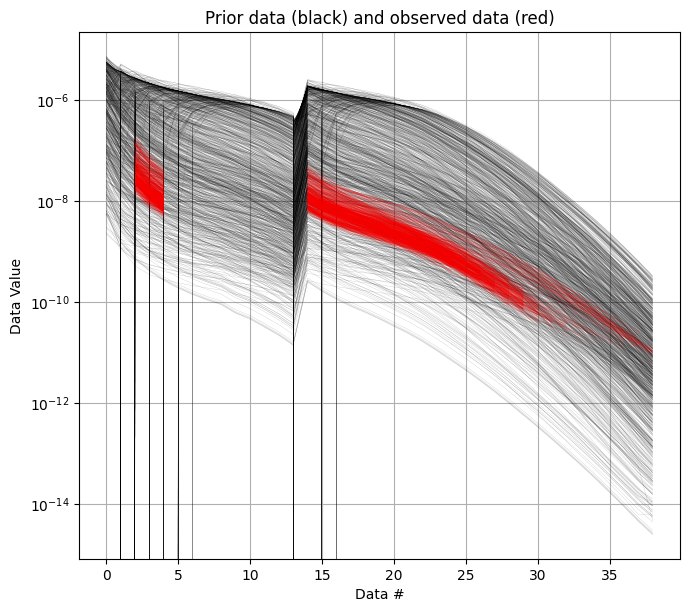

True

In [9]:
ig.plot_data_prior(f_prior_data_h5,f_data_h5,nr=1000,hardcopy=hardcopy)

## 2. Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampled using the extended rejection sampler.

In [10]:
# Rejection sampling of the posterior can be done using
#f_post_h5 = ig.integrate_rejection(f_prior_h5, f_data_h5)

# One can also control a number of options.
# One can choose to make use of only a subset of the prior data. Decreasing the sample size used makes the inversion faster, but increasingly approximate
N_use = N
T_base = 1 # The base annealing temperature. 
autoT = 1  # Automatically set the annealing temperature
f_post_h5 = ig.integrate_rejection(f_prior_h5, 
                                   f_data_h5, 
                                   f_post_h5 = 'POST.h5', 
                                   N_use = N_use, 
                                   autoT = autoT,
                                   T_base = T_base,                            
                                   showInfo=1, 
                                   parallel=parallel)

File POST.h5 allready exists
Overwriting...
Loaded data from DAUGAARD_AVG.h5
Data type 1: id_use=1,    gaussian, Using 11693/11693 data
Loaded data from DAUGAARD_AVG.h5
Data type 1: id_use=1,    gaussian, Using 11693/11693 data
Data type 1: gaussian, Using 11693/11693 data
Memory size of D: 32000000
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR.h5
f_data_h5=DAUGAARD_AVG.h5
f_post_h5=POST.h5


integrate_rejection: Time=186.7s/11693 soundings, 16.0ms/sounding, 62.6it/sintegrate_rejection: T_av=44.3, EV_av=-63.4
D1: NOT RECOGNIZED
M1: CONTINUOUS
nm=90, nsounding=11693, nr=400
M_mean.shape=(11693, 90)
Creating /M1/Mean in POST.h5
Creating /M1/Median in POST.h5
Creating /M1/Std in POST.h5
Creating /M1/LogMean in POST.h5


M2: CONTINUOUS
nm=53, nsounding=11693, nr=400
M_mean.shape=(11693, 53)
Creating /M2/Mean in POST.h5
Creating /M2/Median in POST.h5
Creating /M2/Std in POST.h5
Creating /M2/LogMean in POST.h5


M3: CONTINUOUS
nm=1, nsounding=11693, nr=400
M_mean.shape=(11693, 1)
Creating /M3/Mean in POST.h5
Creating /M3/Median in POST.h5
Creating /M3/Std in POST.h5
Creating /M3/LogMean in POST.h5


rejection:   0%|                                                                                                                                                            | 0/1488 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                            | 0/1488 [00:00<?, ?it/s]

rejection:   0%|                                                                                                                                                            | 0/1488 [00:00<?, ?it/s]

rejection:   1%|▉                                                                                                                                                  | 10/1488 [00:00<01:20, 18.26it/s]

rejection:   1%|▉                                                                                                                                                  | 10/1488 [00:00<01:22, 17.84it/s]

rejection:   1%|▉                                                                                                                                                  | 10/1488 [00:00<01:22, 17.82it/s]

rejection:   1%|▉                                                                                                                                                  | 10/1488 [00:00<01:25, 17.29it/s]

rejection:   1%|▉                                                                                                                                                  | 10/1488 [00:00<01:24, 17.43it/s]

rejection:   1%|▉                                                                                                                                                  | 10/1488 [00:00<01:26, 17.07it/s]

rejection:   1%|▉                                                                                                                                                  | 10/1488 [00:00<01:27, 16.83it/s]

rejection:   1%|▉                                                                                                                                                  | 10/1488 [00:00<01:27, 16.87it/s]

rejection:   1%|█▉                                                                                                                                                 | 20/1488 [00:01<01:24, 17.35it/s]

rejection:   1%|█▉                                                                                                                                                 | 20/1488 [00:01<01:25, 17.19it/s]

rejection:   1%|█▉                                                                                                                                                 | 20/1488 [00:01<01:25, 17.18it/s]

rejection:   1%|█▉                                                                                                                                                 | 20/1488 [00:01<01:26, 16.98it/s]

rejection:   1%|█▉                                                                                                                                                 | 20/1488 [00:01<01:26, 16.97it/s]

rejection:   1%|█▉                                                                                                                                                 | 20/1488 [00:01<01:26, 16.89it/s]

rejection:   1%|█▉                                                                                                                                                 | 20/1488 [00:01<01:27, 16.81it/s]

rejection:   1%|█▉                                                                                                                                                 | 20/1488 [00:01<01:27, 16.80it/s]

rejection:   2%|██▉                                                                                                                                                | 30/1488 [00:01<01:25, 17.07it/s]

rejection:   2%|██▉                                                                                                                                                | 30/1488 [00:01<01:26, 16.88it/s]

rejection:   2%|██▉                                                                                                                                                | 30/1488 [00:01<01:25, 17.00it/s]

rejection:   2%|██▉                                                                                                                                                | 30/1488 [00:01<01:28, 16.53it/s]

rejection:   2%|██▉                                                                                                                                                | 30/1488 [00:01<01:26, 16.92it/s]

rejection:   2%|██▉                                                                                                                                                | 30/1488 [00:01<01:26, 16.86it/s]

rejection:   2%|██▉                                                                                                                                                | 30/1488 [00:01<01:26, 16.82it/s]

rejection:   2%|██▉                                                                                                                                                | 30/1488 [00:01<01:26, 16.85it/s]

rejection:   3%|███▉                                                                                                                                               | 40/1488 [00:02<01:25, 16.98it/s]

rejection:   3%|███▉                                                                                                                                               | 40/1488 [00:02<01:25, 16.86it/s]

rejection:   3%|███▉                                                                                                                                               | 40/1488 [00:02<01:25, 16.92it/s]

rejection:   3%|███▉                                                                                                                                               | 40/1488 [00:02<01:25, 16.85it/s]

rejection:   3%|███▉                                                                                                                                               | 40/1488 [00:02<01:27, 16.57it/s]

rejection:   3%|███▉                                                                                                                                               | 40/1488 [00:02<01:25, 16.91it/s]

rejection:   3%|███▉                                                                                                                                               | 40/1488 [00:02<01:26, 16.83it/s]

rejection:   3%|███▉                                                                                                                                               | 40/1488 [00:02<01:24, 17.13it/s]

rejection:   3%|████▉                                                                                                                                              | 50/1488 [00:02<01:24, 16.93it/s]

rejection:   3%|████▉                                                                                                                                              | 50/1488 [00:02<01:25, 16.83it/s]

rejection:   3%|████▉                                                                                                                                              | 50/1488 [00:02<01:25, 16.88it/s]

rejection:   3%|████▉                                                                                                                                              | 50/1488 [00:02<01:25, 16.81it/s]

rejection:   3%|████▉                                                                                                                                              | 50/1488 [00:02<01:25, 16.80it/s]

rejection:   3%|████▉                                                                                                                                              | 50/1488 [00:03<01:27, 16.41it/s]

rejection:   3%|████▉                                                                                                                                              | 50/1488 [00:02<01:25, 16.79it/s]

rejection:   3%|████▉                                                                                                                                              | 50/1488 [00:02<01:24, 16.98it/s]

rejection:   4%|█████▉                                                                                                                                             | 60/1488 [00:03<01:24, 16.85it/s]

rejection:   4%|█████▉                                                                                                                                             | 60/1488 [00:03<01:25, 16.78it/s]

rejection:   4%|█████▉                                                                                                                                             | 60/1488 [00:03<01:24, 16.82it/s]

rejection:   4%|█████▉                                                                                                                                             | 60/1488 [00:03<01:25, 16.74it/s]

rejection:   4%|█████▉                                                                                                                                             | 60/1488 [00:03<01:26, 16.51it/s]

rejection:   4%|█████▉                                                                                                                                             | 60/1488 [00:03<01:25, 16.76it/s]

rejection:   4%|█████▉                                                                                                                                             | 60/1488 [00:03<01:24, 16.87it/s]

rejection:   4%|█████▉                                                                                                                                             | 60/1488 [00:03<01:25, 16.74it/s]

rejection:   5%|██████▉                                                                                                                                            | 70/1488 [00:04<01:24, 16.77it/s]

rejection:   5%|██████▉                                                                                                                                            | 70/1488 [00:04<01:24, 16.72it/s]

rejection:   5%|██████▉                                                                                                                                            | 70/1488 [00:04<01:24, 16.75it/s]

rejection:   5%|██████▉                                                                                                                                            | 70/1488 [00:04<01:24, 16.73it/s]

rejection:   5%|██████▉                                                                                                                                            | 70/1488 [00:04<01:25, 16.55it/s]

rejection:   5%|██████▉                                                                                                                                            | 70/1488 [00:04<01:24, 16.71it/s]

rejection:   5%|██████▉                                                                                                                                            | 70/1488 [00:04<01:24, 16.80it/s]

rejection:   5%|██████▉                                                                                                                                            | 70/1488 [00:04<01:24, 16.71it/s]

rejection:   5%|███████▉                                                                                                                                           | 80/1488 [00:04<01:24, 16.74it/s]

rejection:   5%|███████▉                                                                                                                                           | 80/1488 [00:04<01:24, 16.73it/s]

rejection:   5%|███████▉                                                                                                                                           | 80/1488 [00:04<01:24, 16.75it/s]

rejection:   5%|███████▉                                                                                                                                           | 80/1488 [00:04<01:24, 16.73it/s]

rejection:   5%|███████▉                                                                                                                                           | 80/1488 [00:04<01:24, 16.61it/s]

rejection:   5%|███████▉                                                                                                                                           | 80/1488 [00:04<01:24, 16.73it/s]

rejection:   5%|███████▉                                                                                                                                           | 80/1488 [00:04<01:24, 16.72it/s]

rejection:   5%|███████▉                                                                                                                                           | 80/1488 [00:04<01:23, 16.77it/s]

rejection:   6%|████████▉                                                                                                                                          | 90/1488 [00:05<01:23, 16.72it/s]

rejection:   6%|████████▉                                                                                                                                          | 90/1488 [00:05<01:23, 16.74it/s]

rejection:   6%|████████▉                                                                                                                                          | 90/1488 [00:05<01:23, 16.72it/s]

rejection:   6%|████████▉                                                                                                                                          | 90/1488 [00:05<01:23, 16.71it/s]

rejection:   6%|████████▉                                                                                                                                          | 90/1488 [00:05<01:24, 16.63it/s]

rejection:   6%|████████▉                                                                                                                                          | 90/1488 [00:05<01:23, 16.71it/s]

rejection:   6%|████████▉                                                                                                                                          | 90/1488 [00:05<01:23, 16.71it/s]

rejection:   6%|████████▉                                                                                                                                          | 90/1488 [00:05<01:23, 16.75it/s]

rejection:   7%|█████████▊                                                                                                                                        | 100/1488 [00:05<01:21, 17.02it/s]

rejection:   7%|█████████▊                                                                                                                                        | 100/1488 [00:05<01:22, 16.72it/s]

rejection:   7%|█████████▊                                                                                                                                        | 100/1488 [00:05<01:23, 16.70it/s]

rejection:   7%|█████████▊                                                                                                                                        | 100/1488 [00:06<01:23, 16.64it/s]

rejection:   7%|█████████▊                                                                                                                                        | 100/1488 [00:05<01:24, 16.50it/s]

rejection:   7%|█████████▊                                                                                                                                        | 100/1488 [00:05<01:23, 16.69it/s]

rejection:   7%|█████████▊                                                                                                                                        | 100/1488 [00:05<01:22, 16.73it/s]

rejection:   7%|█████████▊                                                                                                                                        | 100/1488 [00:05<01:22, 16.72it/s]

rejection:   7%|██████████▊                                                                                                                                       | 110/1488 [00:06<01:21, 16.90it/s]

rejection:   7%|██████████▊                                                                                                                                       | 110/1488 [00:06<01:22, 16.70it/s]

rejection:   7%|██████████▊                                                                                                                                       | 110/1488 [00:06<01:22, 16.69it/s]

rejection:   7%|██████████▊                                                                                                                                       | 110/1488 [00:06<01:22, 16.64it/s]

rejection:   7%|██████████▊                                                                                                                                       | 110/1488 [00:06<01:22, 16.68it/s]

rejection:   7%|██████████▊                                                                                                                                       | 110/1488 [00:06<01:23, 16.54it/s]

rejection:   7%|██████████▊                                                                                                                                       | 110/1488 [00:06<01:22, 16.77it/s]

rejection:   7%|██████████▊                                                                                                                                       | 110/1488 [00:06<01:22, 16.69it/s]

rejection:   8%|███████████▊                                                                                                                                      | 120/1488 [00:07<01:20, 17.05it/s]

rejection:   8%|███████████▊                                                                                                                                      | 120/1488 [00:07<01:22, 16.66it/s]

rejection:   8%|███████████▊                                                                                                                                      | 120/1488 [00:07<01:22, 16.65it/s]

rejection:   8%|███████████▊                                                                                                                                      | 120/1488 [00:07<01:22, 16.57it/s]

rejection:   8%|███████████▊                                                                                                                                      | 120/1488 [00:07<01:22, 16.66it/s]

rejection:   8%|███████████▊                                                                                                                                      | 120/1488 [00:07<01:22, 16.62it/s]

rejection:   8%|███████████▊                                                                                                                                      | 120/1488 [00:07<01:21, 16.84it/s]

rejection:   8%|███████████▊                                                                                                                                      | 120/1488 [00:07<01:22, 16.67it/s]

rejection:   9%|████████████▊                                                                                                                                     | 130/1488 [00:07<01:18, 17.30it/s]

rejection:   9%|████████████▊                                                                                                                                     | 130/1488 [00:07<01:21, 16.68it/s]

rejection:   9%|████████████▊                                                                                                                                     | 130/1488 [00:07<01:22, 16.44it/s]

rejection:   9%|████████████▊                                                                                                                                     | 130/1488 [00:07<01:21, 16.72it/s]

rejection:   9%|████████████▊                                                                                                                                     | 130/1488 [00:07<01:21, 16.62it/s]

rejection:   9%|████████████▊                                                                                                                                     | 130/1488 [00:07<01:21, 16.66it/s]

rejection:   9%|████████████▊                                                                                                                                     | 130/1488 [00:07<01:20, 16.87it/s]

rejection:   9%|████████████▊                                                                                                                                     | 130/1488 [00:07<01:21, 16.70it/s]

rejection:   9%|█████████████▋                                                                                                                                    | 140/1488 [00:08<01:17, 17.29it/s]

rejection:   9%|█████████████▋                                                                                                                                    | 140/1488 [00:08<01:20, 16.75it/s]

rejection:   9%|█████████████▋                                                                                                                                    | 140/1488 [00:08<01:20, 16.74it/s]

rejection:   9%|█████████████▋                                                                                                                                    | 140/1488 [00:08<01:20, 16.73it/s]

rejection:   9%|█████████████▋                                                                                                                                    | 140/1488 [00:08<01:20, 16.70it/s]

rejection:   9%|█████████████▋                                                                                                                                    | 140/1488 [00:08<01:22, 16.32it/s]

rejection:   9%|█████████████▋                                                                                                                                    | 140/1488 [00:08<01:19, 16.94it/s]

rejection:   9%|█████████████▋                                                                                                                                    | 140/1488 [00:08<01:20, 16.75it/s]

rejection:  10%|██████████████▋                                                                                                                                   | 150/1488 [00:08<01:18, 17.13it/s]

rejection:  10%|██████████████▋                                                                                                                                   | 150/1488 [00:08<01:19, 16.74it/s]

rejection:  10%|██████████████▋                                                                                                                                   | 150/1488 [00:08<01:18, 17.03it/s]

rejection:  10%|██████████████▋                                                                                                                                   | 150/1488 [00:08<01:20, 16.72it/s]

rejection:  10%|██████████████▋                                                                                                                                   | 150/1488 [00:08<01:20, 16.70it/s]

rejection:  10%|██████████████▋                                                                                                                                   | 150/1488 [00:09<01:20, 16.72it/s]

rejection:  10%|██████████████▋                                                                                                                                   | 150/1488 [00:09<01:22, 16.13it/s]

rejection:  10%|██████████████▋                                                                                                                                   | 150/1488 [00:08<01:19, 16.75it/s]

rejection:  11%|███████████████▋                                                                                                                                  | 160/1488 [00:09<01:17, 17.12it/s]

rejection:  11%|███████████████▋                                                                                                                                  | 160/1488 [00:09<01:19, 16.74it/s]

rejection:  11%|███████████████▋                                                                                                                                  | 160/1488 [00:09<01:19, 16.73it/s]

rejection:  11%|███████████████▋                                                                                                                                  | 160/1488 [00:09<01:18, 16.94it/s]

rejection:  11%|███████████████▋                                                                                                                                  | 160/1488 [00:09<01:19, 16.73it/s]

rejection:  11%|███████████████▋                                                                                                                                  | 160/1488 [00:09<01:19, 16.71it/s]

rejection:  11%|███████████████▋                                                                                                                                  | 160/1488 [00:09<01:19, 16.71it/s]

rejection:  11%|███████████████▋                                                                                                                                  | 160/1488 [00:09<01:22, 16.14it/s]

rejection:  11%|████████████████▋                                                                                                                                 | 170/1488 [00:10<01:17, 16.97it/s]

rejection:  11%|████████████████▋                                                                                                                                 | 170/1488 [00:10<01:18, 16.72it/s]

rejection:  11%|████████████████▋                                                                                                                                 | 170/1488 [00:10<01:18, 16.70it/s]

rejection:  11%|████████████████▋                                                                                                                                 | 170/1488 [00:10<01:18, 16.70it/s]

rejection:  11%|████████████████▋                                                                                                                                 | 170/1488 [00:10<01:18, 16.84it/s]

rejection:  11%|████████████████▋                                                                                                                                 | 170/1488 [00:10<01:18, 16.69it/s]

rejection:  11%|████████████████▋                                                                                                                                 | 170/1488 [00:10<01:18, 16.72it/s]

rejection:  11%|████████████████▋                                                                                                                                 | 170/1488 [00:10<01:21, 16.10it/s]

rejection:  12%|█████████████████▋                                                                                                                                | 180/1488 [00:10<01:17, 16.95it/s]

rejection:  12%|█████████████████▋                                                                                                                                | 180/1488 [00:10<01:17, 16.77it/s]

rejection:  12%|█████████████████▋                                                                                                                                | 180/1488 [00:10<01:17, 16.89it/s]

rejection:  12%|█████████████████▋                                                                                                                                | 180/1488 [00:10<01:17, 16.78it/s]

rejection:  12%|█████████████████▋                                                                                                                                | 180/1488 [00:10<01:17, 16.77it/s]

rejection:  12%|█████████████████▋                                                                                                                                | 180/1488 [00:10<01:19, 16.38it/s]

rejection:  12%|█████████████████▋                                                                                                                                | 180/1488 [00:10<01:17, 16.79it/s]

rejection:  12%|█████████████████▋                                                                                                                                | 180/1488 [00:10<01:21, 16.11it/s]

rejection:  13%|██████████████████▋                                                                                                                               | 190/1488 [00:11<01:16, 16.93it/s]

rejection:  13%|██████████████████▋                                                                                                                               | 190/1488 [00:11<01:17, 16.81it/s]

rejection:  13%|██████████████████▋                                                                                                                               | 190/1488 [00:11<01:16, 16.91it/s]

rejection:  13%|██████████████████▋                                                                                                                               | 190/1488 [00:11<01:17, 16.83it/s]

rejection:  13%|██████████████████▋                                                                                                                               | 190/1488 [00:11<01:17, 16.67it/s]

rejection:  13%|██████████████████▋                                                                                                                               | 190/1488 [00:11<01:18, 16.46it/s]

rejection:  13%|██████████████████▋                                                                                                                               | 190/1488 [00:11<01:17, 16.83it/s]

rejection:  13%|██████████████████▋                                                                                                                               | 190/1488 [00:11<01:19, 16.36it/s]

rejection:  13%|███████████████████▌                                                                                                                              | 200/1488 [00:11<01:16, 16.77it/s]

rejection:  13%|███████████████████▌                                                                                                                              | 200/1488 [00:11<01:17, 16.68it/s]

rejection:  13%|███████████████████▌                                                                                                                              | 200/1488 [00:11<01:15, 16.96it/s]

rejection:  13%|███████████████████▌                                                                                                                              | 200/1488 [00:11<01:16, 16.91it/s]

rejection:  13%|███████████████████▌                                                                                                                              | 200/1488 [00:11<01:17, 16.63it/s]

rejection:  13%|███████████████████▌                                                                                                                              | 200/1488 [00:11<01:16, 16.90it/s]

rejection:  13%|███████████████████▌                                                                                                                              | 200/1488 [00:12<01:19, 16.22it/s]

rejection:  13%|███████████████████▌                                                                                                                              | 200/1488 [00:12<01:17, 16.53it/s]

rejection:  14%|████████████████████▌                                                                                                                             | 210/1488 [00:12<01:16, 16.78it/s]

rejection:  14%|████████████████████▌                                                                                                                             | 210/1488 [00:12<01:16, 16.75it/s]

rejection:  14%|████████████████████▌                                                                                                                             | 210/1488 [00:12<01:15, 16.99it/s]

rejection:  14%|████████████████████▌                                                                                                                             | 210/1488 [00:12<01:16, 16.67it/s]

rejection:  14%|████████████████████▌                                                                                                                             | 210/1488 [00:12<01:16, 16.76it/s]

rejection:  14%|████████████████████▌                                                                                                                             | 210/1488 [00:12<01:16, 16.66it/s]

rejection:  14%|████████████████████▌                                                                                                                             | 210/1488 [00:12<01:17, 16.42it/s]

rejection:  14%|████████████████████▌                                                                                                                             | 210/1488 [00:12<01:16, 16.66it/s]

rejection:  15%|█████████████████████▌                                                                                                                            | 220/1488 [00:12<01:14, 17.05it/s]

rejection:  15%|█████████████████████▌                                                                                                                            | 220/1488 [00:13<01:15, 16.74it/s]

rejection:  15%|█████████████████████▌                                                                                                                            | 220/1488 [00:13<01:14, 17.12it/s]

rejection:  15%|█████████████████████▌                                                                                                                            | 220/1488 [00:13<01:16, 16.68it/s]

rejection:  15%|█████████████████████▌                                                                                                                            | 220/1488 [00:13<01:15, 16.73it/s]

rejection:  15%|█████████████████████▌                                                                                                                            | 220/1488 [00:13<01:16, 16.68it/s]

rejection:  15%|█████████████████████▌                                                                                                                            | 220/1488 [00:13<01:16, 16.52it/s]

rejection:  15%|█████████████████████▌                                                                                                                            | 220/1488 [00:13<01:15, 16.70it/s]

rejection:  15%|██████████████████████▌                                                                                                                           | 230/1488 [00:13<01:12, 17.42it/s]

rejection:  15%|██████████████████████▌                                                                                                                           | 230/1488 [00:13<01:15, 16.73it/s]

rejection:  15%|██████████████████████▌                                                                                                                           | 230/1488 [00:13<01:13, 17.01it/s]

rejection:  15%|██████████████████████▌                                                                                                                           | 230/1488 [00:13<01:15, 16.69it/s]

rejection:  15%|██████████████████████▌                                                                                                                           | 230/1488 [00:13<01:16, 16.45it/s]

rejection:  15%|██████████████████████▌                                                                                                                           | 230/1488 [00:13<01:15, 16.68it/s]

rejection:  15%|██████████████████████▌                                                                                                                           | 230/1488 [00:13<01:15, 16.56it/s]

rejection:  15%|██████████████████████▌                                                                                                                           | 230/1488 [00:13<01:15, 16.70it/s]

rejection:  16%|███████████████████████▌                                                                                                                          | 240/1488 [00:14<01:11, 17.39it/s]

rejection:  16%|███████████████████████▌                                                                                                                          | 240/1488 [00:14<01:14, 16.86it/s]

rejection:  16%|███████████████████████▌                                                                                                                          | 240/1488 [00:14<01:13, 16.94it/s]

rejection:  16%|███████████████████████▌                                                                                                                          | 240/1488 [00:14<01:14, 16.72it/s]

rejection:  16%|███████████████████████▌                                                                                                                          | 240/1488 [00:14<01:15, 16.56it/s]

rejection:  16%|███████████████████████▌                                                                                                                          | 240/1488 [00:14<01:14, 16.64it/s]

rejection:  16%|███████████████████████▌                                                                                                                          | 240/1488 [00:14<01:14, 16.71it/s]

rejection:  16%|███████████████████████▌                                                                                                                          | 240/1488 [00:14<01:14, 16.65it/s]

rejection:  17%|████████████████████████▌                                                                                                                         | 250/1488 [00:14<01:11, 17.29it/s]

rejection:  17%|████████████████████████▌                                                                                                                         | 250/1488 [00:14<01:12, 17.01it/s]

rejection:  17%|████████████████████████▌                                                                                                                         | 250/1488 [00:14<01:13, 16.89it/s]

rejection:  17%|████████████████████████▌                                                                                                                         | 250/1488 [00:14<01:13, 16.74it/s]

rejection:  17%|████████████████████████▌                                                                                                                         | 250/1488 [00:15<01:14, 16.68it/s]

rejection:  17%|████████████████████████▌                                                                                                                         | 250/1488 [00:15<01:14, 16.62it/s]

rejection:  17%|████████████████████████▌                                                                                                                         | 250/1488 [00:14<01:15, 16.46it/s]

rejection:  17%|████████████████████████▌                                                                                                                         | 250/1488 [00:15<01:14, 16.70it/s]

rejection:  17%|█████████████████████████▌                                                                                                                        | 260/1488 [00:15<01:11, 17.14it/s]

rejection:  17%|█████████████████████████▌                                                                                                                        | 260/1488 [00:15<01:11, 17.29it/s]

rejection:  17%|█████████████████████████▌                                                                                                                        | 260/1488 [00:15<01:12, 16.92it/s]

rejection:  17%|█████████████████████████▌                                                                                                                        | 260/1488 [00:15<01:13, 16.82it/s]

rejection:  17%|█████████████████████████▌                                                                                                                        | 260/1488 [00:15<01:13, 16.77it/s]

rejection:  17%|█████████████████████████▌                                                                                                                        | 260/1488 [00:15<01:13, 16.60it/s]

rejection:  17%|█████████████████████████▌                                                                                                                        | 260/1488 [00:15<01:13, 16.77it/s]

rejection:  17%|█████████████████████████▌                                                                                                                        | 260/1488 [00:15<01:14, 16.59it/s]

rejection:  18%|██████████████████████████▍                                                                                                                       | 270/1488 [00:15<01:11, 17.07it/s]

rejection:  18%|██████████████████████████▍                                                                                                                       | 270/1488 [00:16<01:11, 17.06it/s]

rejection:  18%|██████████████████████████▍                                                                                                                       | 270/1488 [00:16<01:12, 16.87it/s]

rejection:  18%|██████████████████████████▍                                                                                                                       | 270/1488 [00:16<01:12, 16.79it/s]

rejection:  18%|██████████████████████████▍                                                                                                                       | 270/1488 [00:16<01:12, 16.80it/s]

rejection:  18%|██████████████████████████▍                                                                                                                       | 270/1488 [00:16<01:12, 16.75it/s]

rejection:  18%|██████████████████████████▍                                                                                                                       | 270/1488 [00:16<01:13, 16.65it/s]

rejection:  18%|██████████████████████████▍                                                                                                                       | 270/1488 [00:16<01:12, 16.75it/s]

rejection:  19%|███████████████████████████▍                                                                                                                      | 280/1488 [00:16<01:11, 16.99it/s]

rejection:  19%|███████████████████████████▍                                                                                                                      | 280/1488 [00:16<01:10, 17.03it/s]

rejection:  19%|███████████████████████████▍                                                                                                                      | 280/1488 [00:16<01:11, 16.90it/s]

rejection:  19%|███████████████████████████▍                                                                                                                      | 280/1488 [00:16<01:11, 16.82it/s]

rejection:  19%|███████████████████████████▍                                                                                                                      | 280/1488 [00:16<01:11, 16.80it/s]

rejection:  19%|███████████████████████████▍                                                                                                                      | 280/1488 [00:16<01:11, 16.80it/s]

rejection:  19%|███████████████████████████▍                                                                                                                      | 280/1488 [00:16<01:12, 16.73it/s]

rejection:  19%|███████████████████████████▍                                                                                                                      | 280/1488 [00:16<01:12, 16.61it/s]

rejection:  19%|████████████████████████████▍                                                                                                                     | 290/1488 [00:17<01:10, 16.93it/s]

rejection:  19%|████████████████████████████▍                                                                                                                     | 290/1488 [00:17<01:10, 16.96it/s]

rejection:  19%|████████████████████████████▍                                                                                                                     | 290/1488 [00:17<01:11, 16.87it/s]

rejection:  19%|████████████████████████████▍                                                                                                                     | 290/1488 [00:17<01:11, 16.83it/s]

rejection:  19%|████████████████████████████▍                                                                                                                     | 290/1488 [00:17<01:11, 16.82it/s]

rejection:  19%|████████████████████████████▍                                                                                                                     | 290/1488 [00:17<01:11, 16.81it/s]

rejection:  19%|████████████████████████████▍                                                                                                                     | 290/1488 [00:17<01:11, 16.76it/s]

rejection:  19%|████████████████████████████▍                                                                                                                     | 290/1488 [00:17<01:11, 16.70it/s]

rejection:  20%|█████████████████████████████▍                                                                                                                    | 300/1488 [00:17<01:10, 16.93it/s]

rejection:  20%|█████████████████████████████▍                                                                                                                    | 300/1488 [00:17<01:10, 16.96it/s]

rejection:  20%|█████████████████████████████▍                                                                                                                    | 300/1488 [00:17<01:10, 16.92it/s]

rejection:  20%|█████████████████████████████▍                                                                                                                    | 300/1488 [00:17<01:10, 16.90it/s]

rejection:  20%|█████████████████████████████▍                                                                                                                    | 300/1488 [00:17<01:10, 16.89it/s]

rejection:  20%|█████████████████████████████▍                                                                                                                    | 300/1488 [00:17<01:10, 16.75it/s]

rejection:  20%|█████████████████████████████▍                                                                                                                    | 300/1488 [00:18<01:12, 16.39it/s]

rejection:  20%|█████████████████████████████▍                                                                                                                    | 300/1488 [00:18<01:10, 16.78it/s]

rejection:  21%|██████████████████████████████▍                                                                                                                   | 310/1488 [00:18<01:09, 16.90it/s]

rejection:  21%|██████████████████████████████▍                                                                                                                   | 310/1488 [00:18<01:09, 16.94it/s]

rejection:  21%|██████████████████████████████▍                                                                                                                   | 310/1488 [00:18<01:09, 16.88it/s]

rejection:  21%|██████████████████████████████▍                                                                                                                   | 310/1488 [00:18<01:09, 16.86it/s]

rejection:  21%|██████████████████████████████▍                                                                                                                   | 310/1488 [00:18<01:09, 16.86it/s]

rejection:  21%|██████████████████████████████▍                                                                                                                   | 310/1488 [00:18<01:10, 16.74it/s]

rejection:  21%|██████████████████████████████▍                                                                                                                   | 310/1488 [00:18<01:09, 16.85it/s]

rejection:  21%|██████████████████████████████▍                                                                                                                   | 310/1488 [00:18<01:10, 16.78it/s]

rejection:  22%|███████████████████████████████▍                                                                                                                  | 320/1488 [00:18<01:09, 16.90it/s]

rejection:  22%|███████████████████████████████▍                                                                                                                  | 320/1488 [00:18<01:09, 16.88it/s]

rejection:  22%|███████████████████████████████▍                                                                                                                  | 320/1488 [00:18<01:09, 16.83it/s]

rejection:  22%|███████████████████████████████▍                                                                                                                  | 320/1488 [00:19<01:09, 16.82it/s]

rejection:  22%|███████████████████████████████▍                                                                                                                  | 320/1488 [00:19<01:08, 17.12it/s]

rejection:  22%|███████████████████████████████▍                                                                                                                  | 320/1488 [00:19<01:09, 16.81it/s]

rejection:  22%|███████████████████████████████▍                                                                                                                  | 320/1488 [00:19<01:09, 16.79it/s]

rejection:  22%|███████████████████████████████▍                                                                                                                  | 320/1488 [00:19<01:09, 16.76it/s]

rejection:  22%|████████████████████████████████▍                                                                                                                 | 330/1488 [00:19<01:09, 16.62it/s]

rejection:  22%|████████████████████████████████▍                                                                                                                 | 330/1488 [00:19<01:08, 16.80it/s]

rejection:  22%|████████████████████████████████▍                                                                                                                 | 330/1488 [00:19<01:09, 16.75it/s]

rejection:  22%|████████████████████████████████▍                                                                                                                 | 330/1488 [00:19<01:09, 16.75it/s]

rejection:  22%|████████████████████████████████▍                                                                                                                 | 330/1488 [00:19<01:07, 17.17it/s]

rejection:  22%|████████████████████████████████▍                                                                                                                 | 330/1488 [00:19<01:09, 16.77it/s]

rejection:  22%|████████████████████████████████▍                                                                                                                 | 330/1488 [00:19<01:09, 16.77it/s]

rejection:  22%|████████████████████████████████▍                                                                                                                 | 330/1488 [00:19<01:09, 16.73it/s]

rejection:  23%|█████████████████████████████████▎                                                                                                                | 340/1488 [00:20<01:08, 16.65it/s]

rejection:  23%|█████████████████████████████████▎                                                                                                                | 340/1488 [00:20<01:08, 16.77it/s]

rejection:  23%|█████████████████████████████████▎                                                                                                                | 340/1488 [00:20<01:08, 16.73it/s]

rejection:  23%|█████████████████████████████████▎                                                                                                                | 340/1488 [00:20<01:06, 17.29it/s]

rejection:  23%|█████████████████████████████████▎                                                                                                                | 340/1488 [00:20<01:08, 16.77it/s]

rejection:  23%|█████████████████████████████████▎                                                                                                                | 340/1488 [00:20<01:08, 16.73it/s]

rejection:  23%|█████████████████████████████████▎                                                                                                                | 340/1488 [00:20<01:08, 16.67it/s]

rejection:  23%|█████████████████████████████████▎                                                                                                                | 340/1488 [00:20<01:08, 16.71it/s]

rejection:  24%|██████████████████████████████████▎                                                                                                               | 350/1488 [00:20<01:08, 16.65it/s]

rejection:  24%|██████████████████████████████████▎                                                                                                               | 350/1488 [00:20<01:07, 16.74it/s]

rejection:  24%|██████████████████████████████████▎                                                                                                               | 350/1488 [00:20<01:08, 16.73it/s]

rejection:  24%|██████████████████████████████████▎                                                                                                               | 350/1488 [00:20<01:06, 17.24it/s]

rejection:  24%|██████████████████████████████████▎                                                                                                               | 350/1488 [00:20<01:08, 16.72it/s]

rejection:  24%|██████████████████████████████████▎                                                                                                               | 350/1488 [00:20<01:07, 16.74it/s]

rejection:  24%|██████████████████████████████████▎                                                                                                               | 350/1488 [00:20<01:08, 16.73it/s]

rejection:  24%|██████████████████████████████████▎                                                                                                               | 350/1488 [00:21<01:08, 16.71it/s]

rejection:  24%|███████████████████████████████████▎                                                                                                              | 360/1488 [00:21<01:07, 16.66it/s]

rejection:  24%|███████████████████████████████████▎                                                                                                              | 360/1488 [00:21<01:07, 16.73it/s]

rejection:  24%|███████████████████████████████████▎                                                                                                              | 360/1488 [00:21<01:07, 16.74it/s]

rejection:  24%|███████████████████████████████████▎                                                                                                              | 360/1488 [00:21<01:07, 16.72it/s]

rejection:  24%|███████████████████████████████████▎                                                                                                              | 360/1488 [00:21<01:06, 16.89it/s]

rejection:  24%|███████████████████████████████████▎                                                                                                              | 360/1488 [00:21<01:07, 16.73it/s]

rejection:  24%|███████████████████████████████████▎                                                                                                              | 360/1488 [00:21<01:07, 16.74it/s]

rejection:  24%|███████████████████████████████████▎                                                                                                              | 360/1488 [00:21<01:07, 16.72it/s]

rejection:  25%|████████████████████████████████████▎                                                                                                             | 370/1488 [00:21<01:07, 16.58it/s]

rejection:  25%|████████████████████████████████████▎                                                                                                             | 370/1488 [00:21<01:06, 16.75it/s]

rejection:  25%|████████████████████████████████████▎                                                                                                             | 370/1488 [00:21<01:06, 16.76it/s]

rejection:  25%|████████████████████████████████████▎                                                                                                             | 370/1488 [00:22<01:05, 17.18it/s]

rejection:  25%|████████████████████████████████████▎                                                                                                             | 370/1488 [00:22<01:06, 16.78it/s]

rejection:  25%|████████████████████████████████████▎                                                                                                             | 370/1488 [00:22<01:06, 16.74it/s]

rejection:  25%|████████████████████████████████████▎                                                                                                             | 370/1488 [00:22<01:06, 16.82it/s]

rejection:  25%|████████████████████████████████████▎                                                                                                             | 370/1488 [00:22<01:07, 16.62it/s]

rejection:  26%|█████████████████████████████████████▎                                                                                                            | 380/1488 [00:22<01:06, 16.68it/s]

rejection:  26%|█████████████████████████████████████▎                                                                                                            | 380/1488 [00:22<01:05, 16.80it/s]

rejection:  26%|█████████████████████████████████████▎                                                                                                            | 380/1488 [00:22<01:03, 17.37it/s]

rejection:  26%|█████████████████████████████████████▎                                                                                                            | 380/1488 [00:22<01:05, 16.80it/s]

rejection:  26%|█████████████████████████████████████▎                                                                                                            | 380/1488 [00:22<01:06, 16.78it/s]

rejection:  26%|█████████████████████████████████████▎                                                                                                            | 380/1488 [00:22<01:06, 16.79it/s]

rejection:  26%|█████████████████████████████████████▎                                                                                                            | 380/1488 [00:22<01:05, 16.85it/s]

rejection:  26%|█████████████████████████████████████▎                                                                                                            | 380/1488 [00:22<01:05, 16.79it/s]

rejection:  26%|██████████████████████████████████████▎                                                                                                           | 390/1488 [00:23<01:05, 16.79it/s]

rejection:  26%|██████████████████████████████████████▎                                                                                                           | 390/1488 [00:23<01:05, 16.74it/s]

rejection:  26%|██████████████████████████████████████▎                                                                                                           | 390/1488 [00:23<01:02, 17.61it/s]

rejection:  26%|██████████████████████████████████████▎                                                                                                           | 390/1488 [00:23<01:05, 16.70it/s]

rejection:  26%|██████████████████████████████████████▎                                                                                                           | 390/1488 [00:23<01:05, 16.70it/s]

rejection:  26%|██████████████████████████████████████▎                                                                                                           | 390/1488 [00:23<01:05, 16.71it/s]

rejection:  26%|██████████████████████████████████████▎                                                                                                           | 390/1488 [00:23<01:05, 16.73it/s]

rejection:  26%|██████████████████████████████████████▎                                                                                                           | 390/1488 [00:23<01:05, 16.74it/s]

rejection:  27%|███████████████████████████████████████▏                                                                                                          | 400/1488 [00:23<01:04, 16.75it/s]

rejection:  27%|███████████████████████████████████████▏                                                                                                          | 400/1488 [00:23<01:05, 16.71it/s]

rejection:  27%|███████████████████████████████████████▏                                                                                                          | 400/1488 [00:23<01:01, 17.58it/s]

rejection:  27%|███████████████████████████████████████▏                                                                                                          | 400/1488 [00:23<01:05, 16.69it/s]

rejection:  27%|███████████████████████████████████████▏                                                                                                          | 400/1488 [00:23<01:05, 16.69it/s]

rejection:  27%|███████████████████████████████████████▏                                                                                                          | 400/1488 [00:23<01:05, 16.68it/s]

rejection:  27%|███████████████████████████████████████▏                                                                                                          | 400/1488 [00:23<01:04, 16.79it/s]

rejection:  27%|███████████████████████████████████████▏                                                                                                          | 400/1488 [00:24<01:05, 16.70it/s]

rejection:  28%|████████████████████████████████████████▏                                                                                                         | 410/1488 [00:24<01:04, 16.68it/s]

rejection:  28%|████████████████████████████████████████▏                                                                                                         | 410/1488 [00:24<01:00, 17.70it/s]

rejection:  28%|████████████████████████████████████████▏                                                                                                         | 410/1488 [00:24<01:04, 16.63it/s]

rejection:  28%|████████████████████████████████████████▏                                                                                                         | 410/1488 [00:24<01:04, 16.63it/s]

rejection:  28%|████████████████████████████████████████▏                                                                                                         | 410/1488 [00:24<01:04, 16.61it/s]

rejection:  28%|████████████████████████████████████████▏                                                                                                         | 410/1488 [00:24<01:03, 16.85it/s]

rejection:  28%|████████████████████████████████████████▏                                                                                                         | 410/1488 [00:24<01:04, 16.61it/s]

rejection:  28%|████████████████████████████████████████▏                                                                                                         | 410/1488 [00:24<01:04, 16.61it/s]

rejection:  28%|█████████████████████████████████████████▏                                                                                                        | 420/1488 [00:24<01:04, 16.60it/s]

rejection:  28%|█████████████████████████████████████████▏                                                                                                        | 420/1488 [00:24<01:01, 17.35it/s]

rejection:  28%|█████████████████████████████████████████▏                                                                                                        | 420/1488 [00:24<01:04, 16.61it/s]

rejection:  28%|█████████████████████████████████████████▏                                                                                                        | 420/1488 [00:24<01:04, 16.61it/s]

rejection:  28%|█████████████████████████████████████████▏                                                                                                        | 420/1488 [00:25<01:04, 16.61it/s]

rejection:  28%|█████████████████████████████████████████▏                                                                                                        | 420/1488 [00:25<01:03, 16.78it/s]

rejection:  28%|█████████████████████████████████████████▏                                                                                                        | 420/1488 [00:25<01:04, 16.62it/s]

rejection:  28%|█████████████████████████████████████████▏                                                                                                        | 420/1488 [00:25<01:04, 16.63it/s]

rejection:  29%|██████████████████████████████████████████▏                                                                                                       | 430/1488 [00:25<01:03, 16.60it/s]

rejection:  29%|██████████████████████████████████████████▏                                                                                                       | 430/1488 [00:25<01:03, 16.58it/s]

rejection:  29%|██████████████████████████████████████████▏                                                                                                       | 430/1488 [00:25<01:02, 16.88it/s]

rejection:  29%|██████████████████████████████████████████▏                                                                                                       | 430/1488 [00:25<01:03, 16.58it/s]

rejection:  29%|██████████████████████████████████████████▏                                                                                                       | 430/1488 [00:25<01:03, 16.57it/s]

rejection:  29%|██████████████████████████████████████████▏                                                                                                       | 430/1488 [00:25<01:03, 16.68it/s]

rejection:  29%|██████████████████████████████████████████▏                                                                                                       | 430/1488 [00:25<01:03, 16.57it/s]

rejection:  29%|██████████████████████████████████████████▏                                                                                                       | 430/1488 [00:25<01:03, 16.57it/s]

rejection:  30%|███████████████████████████████████████████▏                                                                                                      | 440/1488 [00:26<01:03, 16.55it/s]

rejection:  30%|███████████████████████████████████████████▏                                                                                                      | 440/1488 [00:26<01:02, 16.73it/s]

rejection:  30%|███████████████████████████████████████████▏                                                                                                      | 440/1488 [00:26<01:03, 16.51it/s]

rejection:  30%|███████████████████████████████████████████▏                                                                                                      | 440/1488 [00:26<01:03, 16.49it/s]

rejection:  30%|███████████████████████████████████████████▏                                                                                                      | 440/1488 [00:26<01:03, 16.51it/s]

rejection:  30%|███████████████████████████████████████████▏                                                                                                      | 440/1488 [00:26<01:03, 16.62it/s]

rejection:  30%|███████████████████████████████████████████▏                                                                                                      | 440/1488 [00:26<01:03, 16.39it/s]

rejection:  30%|███████████████████████████████████████████▏                                                                                                      | 440/1488 [00:26<01:03, 16.56it/s]

rejection:  30%|████████████████████████████████████████████▏                                                                                                     | 450/1488 [00:26<01:02, 16.57it/s]

rejection:  30%|████████████████████████████████████████████▏                                                                                                     | 450/1488 [00:26<01:02, 16.57it/s]

rejection:  30%|████████████████████████████████████████████▏                                                                                                     | 450/1488 [00:26<01:02, 16.71it/s]

rejection:  30%|████████████████████████████████████████████▏                                                                                                     | 450/1488 [00:26<01:02, 16.56it/s]

rejection:  30%|████████████████████████████████████████████▏                                                                                                     | 450/1488 [00:26<01:02, 16.58it/s]

rejection:  30%|████████████████████████████████████████████▏                                                                                                     | 450/1488 [00:27<01:02, 16.57it/s]

rejection:  30%|████████████████████████████████████████████▏                                                                                                     | 450/1488 [00:26<01:04, 16.05it/s]

rejection:  30%|████████████████████████████████████████████▏                                                                                                     | 450/1488 [00:27<01:02, 16.54it/s]

rejection:  31%|█████████████████████████████████████████████▏                                                                                                    | 460/1488 [00:27<01:02, 16.56it/s]

rejection:  31%|█████████████████████████████████████████████▏                                                                                                    | 460/1488 [00:27<01:02, 16.56it/s]

rejection:  31%|█████████████████████████████████████████████▏                                                                                                    | 460/1488 [00:27<01:01, 16.66it/s]

rejection:  31%|█████████████████████████████████████████████▏                                                                                                    | 460/1488 [00:27<01:02, 16.58it/s]

rejection:  31%|█████████████████████████████████████████████▏                                                                                                    | 460/1488 [00:27<01:01, 16.62it/s]

rejection:  31%|█████████████████████████████████████████████▏                                                                                                    | 460/1488 [00:27<01:03, 16.23it/s]

rejection:  31%|█████████████████████████████████████████████▏                                                                                                    | 460/1488 [00:27<01:03, 16.12it/s]

rejection:  31%|█████████████████████████████████████████████▏                                                                                                    | 460/1488 [00:27<01:02, 16.56it/s]

rejection:  32%|██████████████████████████████████████████████                                                                                                    | 470/1488 [00:27<01:01, 16.60it/s]

rejection:  32%|██████████████████████████████████████████████                                                                                                    | 470/1488 [00:27<01:01, 16.62it/s]

rejection:  32%|██████████████████████████████████████████████                                                                                                    | 470/1488 [00:27<01:01, 16.50it/s]

rejection:  32%|██████████████████████████████████████████████                                                                                                    | 470/1488 [00:27<01:01, 16.64it/s]

rejection:  32%|██████████████████████████████████████████████                                                                                                    | 470/1488 [00:28<01:01, 16.66it/s]

rejection:  32%|██████████████████████████████████████████████                                                                                                    | 470/1488 [00:28<01:02, 16.40it/s]

rejection:  32%|██████████████████████████████████████████████                                                                                                    | 470/1488 [00:28<01:02, 16.33it/s]

rejection:  32%|██████████████████████████████████████████████                                                                                                    | 470/1488 [00:28<01:02, 16.42it/s]

rejection:  32%|███████████████████████████████████████████████                                                                                                   | 480/1488 [00:28<01:00, 16.64it/s]

rejection:  32%|███████████████████████████████████████████████                                                                                                   | 480/1488 [00:28<01:00, 16.66it/s]

rejection:  32%|███████████████████████████████████████████████                                                                                                   | 480/1488 [00:28<01:00, 16.64it/s]

rejection:  32%|███████████████████████████████████████████████                                                                                                   | 480/1488 [00:28<01:00, 16.69it/s]

rejection:  32%|███████████████████████████████████████████████                                                                                                   | 480/1488 [00:28<01:00, 16.69it/s]

rejection:  32%|███████████████████████████████████████████████                                                                                                   | 480/1488 [00:28<01:01, 16.51it/s]

rejection:  32%|███████████████████████████████████████████████                                                                                                   | 480/1488 [00:28<01:01, 16.46it/s]

rejection:  32%|███████████████████████████████████████████████                                                                                                   | 480/1488 [00:28<01:00, 16.55it/s]

rejection:  33%|████████████████████████████████████████████████                                                                                                  | 490/1488 [00:29<00:59, 16.74it/s]

rejection:  33%|████████████████████████████████████████████████                                                                                                  | 490/1488 [00:29<00:59, 16.75it/s]

rejection:  33%|████████████████████████████████████████████████                                                                                                  | 490/1488 [00:29<00:59, 16.64it/s]

rejection:  33%|████████████████████████████████████████████████                                                                                                  | 490/1488 [00:29<00:59, 16.75it/s]

rejection:  33%|████████████████████████████████████████████████                                                                                                  | 490/1488 [00:29<00:59, 16.76it/s]

rejection:  33%|████████████████████████████████████████████████                                                                                                  | 490/1488 [00:29<00:59, 16.64it/s]

rejection:  33%|████████████████████████████████████████████████                                                                                                  | 490/1488 [00:29<00:59, 16.69it/s]

rejection:  33%|████████████████████████████████████████████████                                                                                                  | 490/1488 [00:29<01:01, 16.13it/s]

rejection:  34%|█████████████████████████████████████████████████                                                                                                 | 500/1488 [00:29<00:58, 16.77it/s]

rejection:  34%|█████████████████████████████████████████████████                                                                                                 | 500/1488 [00:29<00:58, 16.76it/s]

rejection:  34%|█████████████████████████████████████████████████                                                                                                 | 500/1488 [00:29<00:59, 16.68it/s]

rejection:  34%|█████████████████████████████████████████████████                                                                                                 | 500/1488 [00:29<00:58, 16.80it/s]

rejection:  34%|█████████████████████████████████████████████████                                                                                                 | 500/1488 [00:29<00:58, 16.82it/s]

rejection:  34%|█████████████████████████████████████████████████                                                                                                 | 500/1488 [00:29<00:59, 16.50it/s]

rejection:  34%|█████████████████████████████████████████████████                                                                                                 | 500/1488 [00:30<00:59, 16.62it/s]

rejection:  34%|█████████████████████████████████████████████████                                                                                                 | 500/1488 [00:29<01:00, 16.36it/s]

rejection:  34%|██████████████████████████████████████████████████                                                                                                | 510/1488 [00:30<00:58, 16.80it/s]

rejection:  34%|██████████████████████████████████████████████████                                                                                                | 510/1488 [00:30<00:58, 16.80it/s]

rejection:  34%|██████████████████████████████████████████████████                                                                                                | 510/1488 [00:30<00:59, 16.47it/s]

rejection:  34%|██████████████████████████████████████████████████                                                                                                | 510/1488 [00:30<00:58, 16.81it/s]

rejection:  34%|██████████████████████████████████████████████████                                                                                                | 510/1488 [00:30<00:58, 16.83it/s]

rejection:  34%|██████████████████████████████████████████████████                                                                                                | 510/1488 [00:30<00:58, 16.59it/s]

rejection:  34%|██████████████████████████████████████████████████                                                                                                | 510/1488 [00:30<00:58, 16.70it/s]

rejection:  34%|██████████████████████████████████████████████████                                                                                                | 510/1488 [00:30<00:59, 16.51it/s]

rejection:  35%|███████████████████████████████████████████████████                                                                                               | 520/1488 [00:30<00:57, 16.88it/s]

rejection:  35%|███████████████████████████████████████████████████                                                                                               | 520/1488 [00:30<00:57, 16.84it/s]

rejection:  35%|███████████████████████████████████████████████████                                                                                               | 520/1488 [00:30<00:59, 16.35it/s]

rejection:  35%|███████████████████████████████████████████████████                                                                                               | 520/1488 [00:30<00:57, 16.84it/s]

rejection:  35%|███████████████████████████████████████████████████                                                                                               | 520/1488 [00:31<00:57, 16.85it/s]

rejection:  35%|███████████████████████████████████████████████████                                                                                               | 520/1488 [00:31<00:57, 16.70it/s]

rejection:  35%|███████████████████████████████████████████████████                                                                                               | 520/1488 [00:31<00:57, 16.74it/s]

rejection:  35%|███████████████████████████████████████████████████                                                                                               | 520/1488 [00:31<00:58, 16.64it/s]

rejection:  36%|████████████████████████████████████████████████████                                                                                              | 530/1488 [00:31<00:56, 16.86it/s]

rejection:  36%|████████████████████████████████████████████████████                                                                                              | 530/1488 [00:31<00:56, 16.89it/s]

rejection:  36%|████████████████████████████████████████████████████                                                                                              | 530/1488 [00:31<00:58, 16.39it/s]

rejection:  36%|████████████████████████████████████████████████████                                                                                              | 530/1488 [00:31<00:56, 16.90it/s]

rejection:  36%|████████████████████████████████████████████████████                                                                                              | 530/1488 [00:31<00:56, 16.91it/s]

rejection:  36%|████████████████████████████████████████████████████                                                                                              | 530/1488 [00:31<00:57, 16.54it/s]

rejection:  36%|████████████████████████████████████████████████████                                                                                              | 530/1488 [00:31<00:57, 16.68it/s]

rejection:  36%|████████████████████████████████████████████████████                                                                                              | 530/1488 [00:31<00:57, 16.73it/s]

rejection:  36%|████████████████████████████████████████████████████▉                                                                                             | 540/1488 [00:32<00:56, 16.85it/s]

rejection:  36%|████████████████████████████████████████████████████▉                                                                                             | 540/1488 [00:32<00:56, 16.83it/s]

rejection:  36%|████████████████████████████████████████████████████▉                                                                                             | 540/1488 [00:32<00:56, 16.80it/s]

rejection:  36%|████████████████████████████████████████████████████▉                                                                                             | 540/1488 [00:32<00:57, 16.39it/s]

rejection:  36%|████████████████████████████████████████████████████▉                                                                                             | 540/1488 [00:32<00:56, 16.77it/s]

rejection:  36%|████████████████████████████████████████████████████▉                                                                                             | 540/1488 [00:32<00:57, 16.50it/s]

rejection:  36%|████████████████████████████████████████████████████▉                                                                                             | 540/1488 [00:32<00:56, 16.65it/s]

rejection:  36%|████████████████████████████████████████████████████▉                                                                                             | 540/1488 [00:32<00:57, 16.58it/s]

rejection:  37%|█████████████████████████████████████████████████████▉                                                                                            | 550/1488 [00:32<00:56, 16.73it/s]

rejection:  37%|█████████████████████████████████████████████████████▉                                                                                            | 550/1488 [00:32<00:56, 16.74it/s]

rejection:  37%|█████████████████████████████████████████████████████▉                                                                                            | 550/1488 [00:32<00:57, 16.44it/s]

rejection:  37%|█████████████████████████████████████████████████████▉                                                                                            | 550/1488 [00:32<00:56, 16.69it/s]

rejection:  37%|█████████████████████████████████████████████████████▉                                                                                            | 550/1488 [00:32<00:56, 16.70it/s]

rejection:  37%|█████████████████████████████████████████████████████▉                                                                                            | 550/1488 [00:32<00:56, 16.49it/s]

rejection:  37%|█████████████████████████████████████████████████████▉                                                                                            | 550/1488 [00:32<00:56, 16.58it/s]

rejection:  37%|█████████████████████████████████████████████████████▉                                                                                            | 550/1488 [00:33<00:56, 16.54it/s]

rejection:  38%|██████████████████████████████████████████████████████▉                                                                                           | 560/1488 [00:33<00:55, 16.63it/s]

rejection:  38%|██████████████████████████████████████████████████████▉                                                                                           | 560/1488 [00:33<00:55, 16.61it/s]

rejection:  38%|██████████████████████████████████████████████████████▉                                                                                           | 560/1488 [00:33<00:56, 16.43it/s]

rejection:  38%|██████████████████████████████████████████████████████▉                                                                                           | 560/1488 [00:33<00:55, 16.60it/s]

rejection:  38%|██████████████████████████████████████████████████████▉                                                                                           | 560/1488 [00:33<00:55, 16.59it/s]

rejection:  38%|██████████████████████████████████████████████████████▉                                                                                           | 560/1488 [00:33<00:56, 16.47it/s]

rejection:  38%|██████████████████████████████████████████████████████▉                                                                                           | 560/1488 [00:33<00:56, 16.52it/s]

rejection:  38%|██████████████████████████████████████████████████████▉                                                                                           | 560/1488 [00:33<00:56, 16.54it/s]

rejection:  38%|███████████████████████████████████████████████████████▉                                                                                          | 570/1488 [00:33<00:55, 16.59it/s]

rejection:  38%|███████████████████████████████████████████████████████▉                                                                                          | 570/1488 [00:33<00:54, 16.73it/s]

rejection:  38%|███████████████████████████████████████████████████████▉                                                                                          | 570/1488 [00:34<00:55, 16.56it/s]

rejection:  38%|███████████████████████████████████████████████████████▉                                                                                          | 570/1488 [00:33<00:55, 16.62it/s]

rejection:  38%|███████████████████████████████████████████████████████▉                                                                                          | 570/1488 [00:34<00:55, 16.62it/s]

rejection:  38%|███████████████████████████████████████████████████████▉                                                                                          | 570/1488 [00:34<00:55, 16.56it/s]

rejection:  38%|███████████████████████████████████████████████████████▉                                                                                          | 570/1488 [00:34<00:55, 16.60it/s]

rejection:  38%|███████████████████████████████████████████████████████▉                                                                                          | 570/1488 [00:34<00:55, 16.59it/s]

rejection:  39%|████████████████████████████████████████████████████████▉                                                                                         | 580/1488 [00:34<00:54, 16.64it/s]

rejection:  39%|████████████████████████████████████████████████████████▉                                                                                         | 580/1488 [00:34<00:53, 16.83it/s]

rejection:  39%|████████████████████████████████████████████████████████▉                                                                                         | 580/1488 [00:34<00:54, 16.76it/s]

rejection:  39%|████████████████████████████████████████████████████████▉                                                                                         | 580/1488 [00:34<00:54, 16.68it/s]

rejection:  39%|████████████████████████████████████████████████████████▉                                                                                         | 580/1488 [00:34<00:54, 16.67it/s]

rejection:  39%|████████████████████████████████████████████████████████▉                                                                                         | 580/1488 [00:34<00:54, 16.61it/s]

rejection:  39%|████████████████████████████████████████████████████████▉                                                                                         | 580/1488 [00:34<00:54, 16.70it/s]

rejection:  39%|████████████████████████████████████████████████████████▉                                                                                         | 580/1488 [00:34<00:54, 16.65it/s]

rejection:  40%|█████████████████████████████████████████████████████████▉                                                                                        | 590/1488 [00:35<00:53, 16.68it/s]

rejection:  40%|█████████████████████████████████████████████████████████▉                                                                                        | 590/1488 [00:35<00:53, 16.80it/s]

rejection:  40%|█████████████████████████████████████████████████████████▉                                                                                        | 590/1488 [00:35<00:53, 16.72it/s]

rejection:  40%|█████████████████████████████████████████████████████████▉                                                                                        | 590/1488 [00:35<00:53, 16.69it/s]

rejection:  40%|█████████████████████████████████████████████████████████▉                                                                                        | 590/1488 [00:35<00:53, 16.71it/s]

rejection:  40%|█████████████████████████████████████████████████████████▉                                                                                        | 590/1488 [00:35<00:52, 17.19it/s]

rejection:  40%|█████████████████████████████████████████████████████████▉                                                                                        | 590/1488 [00:35<00:53, 16.66it/s]

rejection:  40%|█████████████████████████████████████████████████████████▉                                                                                        | 590/1488 [00:35<00:53, 16.69it/s]

rejection:  40%|██████████████████████████████████████████████████████████▊                                                                                       | 600/1488 [00:35<00:53, 16.71it/s]

rejection:  40%|██████████████████████████████████████████████████████████▊                                                                                       | 600/1488 [00:35<00:52, 16.80it/s]

rejection:  40%|██████████████████████████████████████████████████████████▊                                                                                       | 600/1488 [00:35<00:52, 16.76it/s]

rejection:  40%|██████████████████████████████████████████████████████████▊                                                                                       | 600/1488 [00:35<00:54, 16.44it/s]

rejection:  40%|██████████████████████████████████████████████████████████▊                                                                                       | 600/1488 [00:35<00:53, 16.72it/s]

rejection:  40%|██████████████████████████████████████████████████████████▊                                                                                       | 600/1488 [00:35<00:50, 17.44it/s]

rejection:  40%|██████████████████████████████████████████████████████████▊                                                                                       | 600/1488 [00:35<00:53, 16.68it/s]

rejection:  40%|██████████████████████████████████████████████████████████▊                                                                                       | 600/1488 [00:35<00:53, 16.71it/s]

rejection:  41%|███████████████████████████████████████████████████████████▊                                                                                      | 610/1488 [00:36<00:52, 16.71it/s]

rejection:  41%|███████████████████████████████████████████████████████████▊                                                                                      | 610/1488 [00:36<00:52, 16.78it/s]

rejection:  41%|███████████████████████████████████████████████████████████▊                                                                                      | 610/1488 [00:36<00:52, 16.73it/s]

rejection:  41%|███████████████████████████████████████████████████████████▊                                                                                      | 610/1488 [00:36<00:53, 16.53it/s]

rejection:  41%|███████████████████████████████████████████████████████████▊                                                                                      | 610/1488 [00:36<00:49, 17.57it/s]

rejection:  41%|███████████████████████████████████████████████████████████▊                                                                                      | 610/1488 [00:36<00:52, 16.71it/s]

rejection:  41%|███████████████████████████████████████████████████████████▊                                                                                      | 610/1488 [00:36<00:52, 16.69it/s]

rejection:  41%|███████████████████████████████████████████████████████████▊                                                                                      | 610/1488 [00:36<00:52, 16.74it/s]

rejection:  42%|████████████████████████████████████████████████████████████▊                                                                                     | 620/1488 [00:36<00:51, 16.73it/s]

rejection:  42%|████████████████████████████████████████████████████████████▊                                                                                     | 620/1488 [00:36<00:51, 16.78it/s]

rejection:  42%|████████████████████████████████████████████████████████████▊                                                                                     | 620/1488 [00:36<00:51, 16.75it/s]

rejection:  42%|████████████████████████████████████████████████████████████▊                                                                                     | 620/1488 [00:36<00:52, 16.58it/s]

rejection:  42%|████████████████████████████████████████████████████████████▊                                                                                     | 620/1488 [00:37<00:50, 17.32it/s]

rejection:  42%|████████████████████████████████████████████████████████████▊                                                                                     | 620/1488 [00:37<00:51, 16.72it/s]

rejection:  42%|████████████████████████████████████████████████████████████▊                                                                                     | 620/1488 [00:37<00:51, 16.72it/s]

rejection:  42%|████████████████████████████████████████████████████████████▊                                                                                     | 620/1488 [00:37<00:50, 17.18it/s]

rejection:  42%|█████████████████████████████████████████████████████████████▊                                                                                    | 630/1488 [00:37<00:51, 16.73it/s]

rejection:  42%|█████████████████████████████████████████████████████████████▊                                                                                    | 630/1488 [00:37<00:51, 16.76it/s]

rejection:  42%|█████████████████████████████████████████████████████████████▊                                                                                    | 630/1488 [00:37<00:51, 16.76it/s]

rejection:  42%|█████████████████████████████████████████████████████████████▊                                                                                    | 630/1488 [00:37<00:51, 16.61it/s]

rejection:  42%|█████████████████████████████████████████████████████████████▊                                                                                    | 630/1488 [00:37<00:50, 17.15it/s]

rejection:  42%|█████████████████████████████████████████████████████████████▊                                                                                    | 630/1488 [00:37<00:51, 16.73it/s]

rejection:  42%|█████████████████████████████████████████████████████████████▊                                                                                    | 630/1488 [00:37<00:49, 17.24it/s]

rejection:  42%|█████████████████████████████████████████████████████████████▊                                                                                    | 630/1488 [00:37<00:51, 16.72it/s]

rejection:  43%|██████████████████████████████████████████████████████████████▊                                                                                   | 640/1488 [00:38<00:50, 16.73it/s]

rejection:  43%|██████████████████████████████████████████████████████████████▊                                                                                   | 640/1488 [00:38<00:50, 16.76it/s]

rejection:  43%|██████████████████████████████████████████████████████████████▊                                                                                   | 640/1488 [00:38<00:50, 16.76it/s]

rejection:  43%|██████████████████████████████████████████████████████████████▊                                                                                   | 640/1488 [00:38<00:50, 16.68it/s]

rejection:  43%|██████████████████████████████████████████████████████████████▊                                                                                   | 640/1488 [00:38<00:49, 17.03it/s]

rejection:  43%|██████████████████████████████████████████████████████████████▊                                                                                   | 640/1488 [00:38<00:48, 17.52it/s]

rejection:  43%|██████████████████████████████████████████████████████████████▊                                                                                   | 640/1488 [00:38<00:50, 16.76it/s]

rejection:  43%|██████████████████████████████████████████████████████████████▊                                                                                   | 640/1488 [00:38<00:50, 16.75it/s]

rejection:  44%|███████████████████████████████████████████████████████████████▊                                                                                  | 650/1488 [00:38<00:50, 16.74it/s]

rejection:  44%|███████████████████████████████████████████████████████████████▊                                                                                  | 650/1488 [00:38<00:49, 17.03it/s]

rejection:  44%|███████████████████████████████████████████████████████████████▊                                                                                  | 650/1488 [00:38<00:49, 16.77it/s]

rejection:  44%|███████████████████████████████████████████████████████████████▊                                                                                  | 650/1488 [00:38<00:50, 16.46it/s]

rejection:  44%|███████████████████████████████████████████████████████████████▊                                                                                  | 650/1488 [00:38<00:49, 16.99it/s]

rejection:  44%|███████████████████████████████████████████████████████████████▊                                                                                  | 650/1488 [00:38<00:47, 17.47it/s]

rejection:  44%|███████████████████████████████████████████████████████████████▊                                                                                  | 650/1488 [00:38<00:49, 16.94it/s]

rejection:  44%|███████████████████████████████████████████████████████████████▊                                                                                  | 650/1488 [00:38<00:50, 16.72it/s]

rejection:  44%|████████████████████████████████████████████████████████████████▊                                                                                 | 660/1488 [00:39<00:49, 16.73it/s]

rejection:  44%|████████████████████████████████████████████████████████████████▊                                                                                 | 660/1488 [00:39<00:48, 16.97it/s]

rejection:  44%|████████████████████████████████████████████████████████████████▊                                                                                 | 660/1488 [00:39<00:49, 16.85it/s]

rejection:  44%|████████████████████████████████████████████████████████████████▊                                                                                 | 660/1488 [00:39<00:49, 16.61it/s]

rejection:  44%|████████████████████████████████████████████████████████████████▊                                                                                 | 660/1488 [00:39<00:48, 17.02it/s]

rejection:  44%|████████████████████████████████████████████████████████████████▊                                                                                 | 660/1488 [00:39<00:48, 16.94it/s]

rejection:  44%|████████████████████████████████████████████████████████████████▊                                                                                 | 660/1488 [00:39<00:47, 17.29it/s]

rejection:  44%|████████████████████████████████████████████████████████████████▊                                                                                 | 660/1488 [00:39<00:49, 16.77it/s]

rejection:  45%|█████████████████████████████████████████████████████████████████▋                                                                                | 670/1488 [00:39<00:49, 16.58it/s]

rejection:  45%|█████████████████████████████████████████████████████████████████▋                                                                                | 670/1488 [00:39<00:48, 16.93it/s]

rejection:  45%|█████████████████████████████████████████████████████████████████▋                                                                                | 670/1488 [00:39<00:48, 16.84it/s]

rejection:  45%|█████████████████████████████████████████████████████████████████▋                                                                                | 670/1488 [00:39<00:49, 16.66it/s]

rejection:  45%|█████████████████████████████████████████████████████████████████▋                                                                                | 670/1488 [00:40<00:47, 17.04it/s]

rejection:  45%|█████████████████████████████████████████████████████████████████▋                                                                                | 670/1488 [00:40<00:48, 16.95it/s]

rejection:  45%|█████████████████████████████████████████████████████████████████▋                                                                                | 670/1488 [00:39<00:47, 17.22it/s]

rejection:  45%|█████████████████████████████████████████████████████████████████▋                                                                                | 670/1488 [00:40<00:48, 16.78it/s]

rejection:  46%|██████████████████████████████████████████████████████████████████▋                                                                               | 680/1488 [00:40<00:48, 16.63it/s]

rejection:  46%|██████████████████████████████████████████████████████████████████▋                                                                               | 680/1488 [00:40<00:47, 16.90it/s]

rejection:  46%|██████████████████████████████████████████████████████████████████▋                                                                               | 680/1488 [00:40<00:48, 16.80it/s]

rejection:  46%|██████████████████████████████████████████████████████████████████▋                                                                               | 680/1488 [00:40<00:48, 16.69it/s]

rejection:  46%|██████████████████████████████████████████████████████████████████▋                                                                               | 680/1488 [00:40<00:47, 17.09it/s]

rejection:  46%|██████████████████████████████████████████████████████████████████▋                                                                               | 680/1488 [00:40<00:47, 16.87it/s]

rejection:  46%|██████████████████████████████████████████████████████████████████▋                                                                               | 680/1488 [00:40<00:47, 17.07it/s]

rejection:  46%|██████████████████████████████████████████████████████████████████▋                                                                               | 680/1488 [00:40<00:48, 16.81it/s]

rejection:  46%|███████████████████████████████████████████████████████████████████▋                                                                              | 690/1488 [00:41<00:47, 16.71it/s]

rejection:  46%|███████████████████████████████████████████████████████████████████▋                                                                              | 690/1488 [00:41<00:47, 16.89it/s]

rejection:  46%|███████████████████████████████████████████████████████████████████▋                                                                              | 690/1488 [00:41<00:47, 16.85it/s]

rejection:  46%|███████████████████████████████████████████████████████████████████▋                                                                              | 690/1488 [00:41<00:47, 16.80it/s]

rejection:  46%|███████████████████████████████████████████████████████████████████▋                                                                              | 690/1488 [00:41<00:46, 17.03it/s]

rejection:  46%|███████████████████████████████████████████████████████████████████▋                                                                              | 690/1488 [00:41<00:46, 17.02it/s]

rejection:  46%|███████████████████████████████████████████████████████████████████▋                                                                              | 690/1488 [00:41<00:48, 16.39it/s]

rejection:  46%|███████████████████████████████████████████████████████████████████▋                                                                              | 690/1488 [00:41<00:47, 16.82it/s]

rejection:  47%|████████████████████████████████████████████████████████████████████▋                                                                             | 700/1488 [00:41<00:47, 16.75it/s]

rejection:  47%|████████████████████████████████████████████████████████████████████▋                                                                             | 700/1488 [00:41<00:47, 16.66it/s]

rejection:  47%|████████████████████████████████████████████████████████████████████▋                                                                             | 700/1488 [00:41<00:46, 16.83it/s]

rejection:  47%|████████████████████████████████████████████████████████████████████▋                                                                             | 700/1488 [00:41<00:46, 17.01it/s]

rejection:  47%|████████████████████████████████████████████████████████████████████▋                                                                             | 700/1488 [00:41<00:46, 16.93it/s]

rejection:  47%|████████████████████████████████████████████████████████████████████▋                                                                             | 700/1488 [00:41<00:46, 16.94it/s]

rejection:  47%|████████████████████████████████████████████████████████████████████▋                                                                             | 700/1488 [00:41<00:47, 16.49it/s]

rejection:  47%|████████████████████████████████████████████████████████████████████▋                                                                             | 700/1488 [00:41<00:47, 16.73it/s]

rejection:  48%|█████████████████████████████████████████████████████████████████████▋                                                                            | 710/1488 [00:42<00:46, 16.75it/s]

rejection:  48%|█████████████████████████████████████████████████████████████████████▋                                                                            | 710/1488 [00:42<00:46, 16.72it/s]

rejection:  48%|█████████████████████████████████████████████████████████████████████▋                                                                            | 710/1488 [00:42<00:46, 16.83it/s]

rejection:  48%|█████████████████████████████████████████████████████████████████████▋                                                                            | 710/1488 [00:42<00:45, 17.01it/s]

rejection:  48%|█████████████████████████████████████████████████████████████████████▋                                                                            | 710/1488 [00:42<00:46, 16.83it/s]

rejection:  48%|█████████████████████████████████████████████████████████████████████▋                                                                            | 710/1488 [00:42<00:45, 16.94it/s]

rejection:  48%|█████████████████████████████████████████████████████████████████████▋                                                                            | 710/1488 [00:42<00:46, 16.65it/s]

rejection:  48%|█████████████████████████████████████████████████████████████████████▋                                                                            | 710/1488 [00:42<00:46, 16.71it/s]

rejection:  48%|██████████████████████████████████████████████████████████████████████▋                                                                           | 720/1488 [00:42<00:45, 16.71it/s]

rejection:  48%|██████████████████████████████████████████████████████████████████████▋                                                                           | 720/1488 [00:42<00:45, 16.77it/s]

rejection:  48%|██████████████████████████████████████████████████████████████████████▋                                                                           | 720/1488 [00:42<00:45, 16.83it/s]

rejection:  48%|██████████████████████████████████████████████████████████████████████▋                                                                           | 720/1488 [00:42<00:45, 16.91it/s]

rejection:  48%|██████████████████████████████████████████████████████████████████████▋                                                                           | 720/1488 [00:42<00:45, 16.86it/s]

rejection:  48%|██████████████████████████████████████████████████████████████████████▋                                                                           | 720/1488 [00:43<00:46, 16.68it/s]

rejection:  48%|██████████████████████████████████████████████████████████████████████▋                                                                           | 720/1488 [00:43<00:46, 16.63it/s]

rejection:  48%|██████████████████████████████████████████████████████████████████████▋                                                                           | 720/1488 [00:43<00:46, 16.60it/s]

rejection:  49%|███████████████████████████████████████████████████████████████████████▋                                                                          | 730/1488 [00:43<00:45, 16.71it/s]

rejection:  49%|███████████████████████████████████████████████████████████████████████▋                                                                          | 730/1488 [00:43<00:45, 16.62it/s]

rejection:  49%|███████████████████████████████████████████████████████████████████████▋                                                                          | 730/1488 [00:43<00:45, 16.65it/s]

rejection:  49%|███████████████████████████████████████████████████████████████████████▋                                                                          | 730/1488 [00:43<00:45, 16.70it/s]

rejection:  49%|███████████████████████████████████████████████████████████████████████▋                                                                          | 730/1488 [00:43<00:45, 16.66it/s]

rejection:  49%|███████████████████████████████████████████████████████████████████████▋                                                                          | 730/1488 [00:43<00:45, 16.55it/s]

rejection:  49%|███████████████████████████████████████████████████████████████████████▋                                                                          | 730/1488 [00:43<00:45, 16.50it/s]

rejection:  49%|███████████████████████████████████████████████████████████████████████▋                                                                          | 730/1488 [00:43<00:45, 16.50it/s]

rejection:  50%|████████████████████████████████████████████████████████████████████████▌                                                                         | 740/1488 [00:44<00:45, 16.60it/s]

rejection:  50%|████████████████████████████████████████████████████████████████████████▌                                                                         | 740/1488 [00:44<00:45, 16.55it/s]

rejection:  50%|████████████████████████████████████████████████████████████████████████▌                                                                         | 740/1488 [00:44<00:44, 16.73it/s]

rejection:  50%|████████████████████████████████████████████████████████████████████████▌                                                                         | 740/1488 [00:44<00:44, 16.63it/s]

rejection:  50%|████████████████████████████████████████████████████████████████████████▌                                                                         | 740/1488 [00:44<00:45, 16.61it/s]

rejection:  50%|████████████████████████████████████████████████████████████████████████▌                                                                         | 740/1488 [00:44<00:45, 16.52it/s]

rejection:  50%|████████████████████████████████████████████████████████████████████████▌                                                                         | 740/1488 [00:44<00:45, 16.50it/s]

rejection:  50%|████████████████████████████████████████████████████████████████████████▌                                                                         | 740/1488 [00:44<00:45, 16.49it/s]

rejection:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                        | 750/1488 [00:44<00:44, 16.57it/s]

rejection:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                        | 750/1488 [00:44<00:44, 16.55it/s]

rejection:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                        | 750/1488 [00:44<00:43, 16.80it/s]

rejection:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                        | 750/1488 [00:44<00:44, 16.61it/s]

rejection:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                        | 750/1488 [00:44<00:43, 16.79it/s]

rejection:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                        | 750/1488 [00:44<00:44, 16.56it/s]

rejection:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                        | 750/1488 [00:44<00:44, 16.55it/s]

rejection:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                        | 750/1488 [00:44<00:44, 16.55it/s]

rejection:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                       | 760/1488 [00:45<00:44, 16.35it/s]

rejection:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                       | 760/1488 [00:45<00:43, 16.60it/s]

rejection:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                       | 760/1488 [00:45<00:42, 17.02it/s]

rejection:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                       | 760/1488 [00:45<00:42, 17.13it/s]

rejection:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                       | 760/1488 [00:45<00:43, 16.67it/s]

rejection:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                       | 760/1488 [00:45<00:43, 16.65it/s]

rejection:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                       | 760/1488 [00:45<00:43, 16.63it/s]

rejection:  51%|██████████████████████████████████████████████████████████████████████████▌                                                                       | 760/1488 [00:45<00:43, 16.67it/s]

rejection:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                      | 770/1488 [00:45<00:43, 16.68it/s]

rejection:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                      | 770/1488 [00:45<00:43, 16.63it/s]

rejection:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                      | 770/1488 [00:45<00:42, 16.92it/s]

rejection:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                      | 770/1488 [00:45<00:41, 17.18it/s]

rejection:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                      | 770/1488 [00:45<00:43, 16.65it/s]

rejection:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                      | 770/1488 [00:46<00:43, 16.61it/s]

rejection:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                      | 770/1488 [00:46<00:43, 16.60it/s]

rejection:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                      | 770/1488 [00:46<00:43, 16.60it/s]

rejection:  52%|████████████████████████████████████████████████████████████████████████████▌                                                                     | 780/1488 [00:46<00:42, 16.74it/s]

rejection:  52%|████████████████████████████████████████████████████████████████████████████▌                                                                     | 780/1488 [00:46<00:42, 16.64it/s]

rejection:  52%|████████████████████████████████████████████████████████████████████████████▌                                                                     | 780/1488 [00:46<00:42, 16.84it/s]

rejection:  52%|████████████████████████████████████████████████████████████████████████████▌                                                                     | 780/1488 [00:46<00:41, 17.17it/s]

rejection:  52%|████████████████████████████████████████████████████████████████████████████▌                                                                     | 780/1488 [00:46<00:41, 16.91it/s]

rejection:  52%|████████████████████████████████████████████████████████████████████████████▌                                                                     | 780/1488 [00:46<00:42, 16.73it/s]

rejection:  52%|████████████████████████████████████████████████████████████████████████████▌                                                                     | 780/1488 [00:46<00:42, 16.66it/s]

rejection:  52%|████████████████████████████████████████████████████████████████████████████▌                                                                     | 780/1488 [00:46<00:42, 16.65it/s]

rejection:  53%|█████████████████████████████████████████████████████████████████████████████▌                                                                    | 790/1488 [00:47<00:41, 16.75it/s]

rejection:  53%|█████████████████████████████████████████████████████████████████████████████▌                                                                    | 790/1488 [00:47<00:41, 16.70it/s]

rejection:  53%|█████████████████████████████████████████████████████████████████████████████▌                                                                    | 790/1488 [00:47<00:42, 16.55it/s]

rejection:  53%|█████████████████████████████████████████████████████████████████████████████▌                                                                    | 790/1488 [00:47<00:40, 17.20it/s]

rejection:  53%|█████████████████████████████████████████████████████████████████████████████▌                                                                    | 790/1488 [00:47<00:40, 17.22it/s]

rejection:  53%|█████████████████████████████████████████████████████████████████████████████▌                                                                    | 790/1488 [00:47<00:41, 16.82it/s]

rejection:  53%|█████████████████████████████████████████████████████████████████████████████▌                                                                    | 790/1488 [00:47<00:41, 16.67it/s]

rejection:  53%|█████████████████████████████████████████████████████████████████████████████▌                                                                    | 790/1488 [00:47<00:41, 16.67it/s]

rejection:  54%|██████████████████████████████████████████████████████████████████████████████▍                                                                   | 800/1488 [00:47<00:41, 16.72it/s]

rejection:  54%|██████████████████████████████████████████████████████████████████████████████▍                                                                   | 800/1488 [00:47<00:41, 16.68it/s]

rejection:  54%|██████████████████████████████████████████████████████████████████████████████▍                                                                   | 800/1488 [00:47<00:39, 17.23it/s]

rejection:  54%|██████████████████████████████████████████████████████████████████████████████▍                                                                   | 800/1488 [00:47<00:41, 16.55it/s]

rejection:  54%|██████████████████████████████████████████████████████████████████████████████▍                                                                   | 800/1488 [00:47<00:40, 17.09it/s]

rejection:  54%|██████████████████████████████████████████████████████████████████████████████▍                                                                   | 800/1488 [00:47<00:40, 16.86it/s]

rejection:  54%|██████████████████████████████████████████████████████████████████████████████▍                                                                   | 800/1488 [00:47<00:41, 16.71it/s]

rejection:  54%|██████████████████████████████████████████████████████████████████████████████▍                                                                   | 800/1488 [00:47<00:41, 16.70it/s]

rejection:  54%|███████████████████████████████████████████████████████████████████████████████▍                                                                  | 810/1488 [00:48<00:40, 16.73it/s]

rejection:  54%|███████████████████████████████████████████████████████████████████████████████▍                                                                  | 810/1488 [00:48<00:40, 16.70it/s]

rejection:  54%|███████████████████████████████████████████████████████████████████████████████▍                                                                  | 810/1488 [00:48<00:38, 17.43it/s]

rejection:  54%|███████████████████████████████████████████████████████████████████████████████▍                                                                  | 810/1488 [00:48<00:39, 16.96it/s]

rejection:  54%|███████████████████████████████████████████████████████████████████████████████▍                                                                  | 810/1488 [00:48<00:41, 16.43it/s]

rejection:  54%|███████████████████████████████████████████████████████████████████████████████▍                                                                  | 810/1488 [00:48<00:40, 16.76it/s]

rejection:  54%|███████████████████████████████████████████████████████████████████████████████▍                                                                  | 810/1488 [00:48<00:40, 16.68it/s]

rejection:  54%|███████████████████████████████████████████████████████████████████████████████▍                                                                  | 810/1488 [00:48<00:40, 16.66it/s]

rejection:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                 | 820/1488 [00:48<00:40, 16.68it/s]

rejection:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                 | 820/1488 [00:48<00:40, 16.66it/s]

rejection:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                 | 820/1488 [00:48<00:37, 17.63it/s]

rejection:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                 | 820/1488 [00:48<00:39, 16.83it/s]

rejection:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                 | 820/1488 [00:48<00:40, 16.46it/s]

rejection:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                 | 820/1488 [00:49<00:40, 16.69it/s]

rejection:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                 | 820/1488 [00:49<00:40, 16.64it/s]

rejection:  55%|████████████████████████████████████████████████████████████████████████████████▍                                                                 | 820/1488 [00:49<00:40, 16.65it/s]

rejection:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                                | 830/1488 [00:49<00:39, 16.70it/s]

rejection:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                                | 830/1488 [00:49<00:37, 17.67it/s]

rejection:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                                | 830/1488 [00:49<00:39, 16.67it/s]

rejection:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                                | 830/1488 [00:49<00:39, 16.72it/s]

rejection:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                                | 830/1488 [00:49<00:39, 16.80it/s]

rejection:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                                | 830/1488 [00:49<00:39, 16.71it/s]

rejection:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                                | 830/1488 [00:49<00:39, 16.67it/s]

rejection:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                                | 830/1488 [00:49<00:39, 16.67it/s]

rejection:  56%|██████████████████████████████████████████████████████████████████████████████████▍                                                               | 840/1488 [00:49<00:36, 17.79it/s]

rejection:  56%|██████████████████████████████████████████████████████████████████████████████████▍                                                               | 840/1488 [00:50<00:38, 16.69it/s]

rejection:  56%|██████████████████████████████████████████████████████████████████████████████████▍                                                               | 840/1488 [00:50<00:38, 16.69it/s]

rejection:  56%|██████████████████████████████████████████████████████████████████████████████████▍                                                               | 840/1488 [00:50<00:38, 16.72it/s]

rejection:  56%|██████████████████████████████████████████████████████████████████████████████████▍                                                               | 840/1488 [00:50<00:38, 16.77it/s]

rejection:  56%|██████████████████████████████████████████████████████████████████████████████████▍                                                               | 840/1488 [00:50<00:38, 16.66it/s]

rejection:  56%|██████████████████████████████████████████████████████████████████████████████████▍                                                               | 840/1488 [00:50<00:38, 16.69it/s]

rejection:  56%|██████████████████████████████████████████████████████████████████████████████████▍                                                               | 840/1488 [00:50<00:38, 16.69it/s]

rejection:  57%|███████████████████████████████████████████████████████████████████████████████████▍                                                              | 850/1488 [00:50<00:36, 17.72it/s]

rejection:  57%|███████████████████████████████████████████████████████████████████████████████████▍                                                              | 850/1488 [00:50<00:38, 16.73it/s]

rejection:  57%|███████████████████████████████████████████████████████████████████████████████████▍                                                              | 850/1488 [00:50<00:38, 16.73it/s]

rejection:  57%|███████████████████████████████████████████████████████████████████████████████████▍                                                              | 850/1488 [00:50<00:38, 16.61it/s]

rejection:  57%|███████████████████████████████████████████████████████████████████████████████████▍                                                              | 850/1488 [00:50<00:37, 16.80it/s]

rejection:  57%|███████████████████████████████████████████████████████████████████████████████████▍                                                              | 850/1488 [00:50<00:38, 16.59it/s]

rejection:  57%|███████████████████████████████████████████████████████████████████████████████████▍                                                              | 850/1488 [00:50<00:38, 16.74it/s]

rejection:  57%|███████████████████████████████████████████████████████████████████████████████████▍                                                              | 850/1488 [00:50<00:38, 16.74it/s]

rejection:  58%|████████████████████████████████████████████████████████████████████████████████████▍                                                             | 860/1488 [00:50<00:35, 17.89it/s]

rejection:  58%|████████████████████████████████████████████████████████████████████████████████████▍                                                             | 860/1488 [00:51<00:37, 16.62it/s]

rejection:  58%|████████████████████████████████████████████████████████████████████████████████████▍                                                             | 860/1488 [00:51<00:37, 16.73it/s]

rejection:  58%|████████████████████████████████████████████████████████████████████████████████████▍                                                             | 860/1488 [00:51<00:37, 16.77it/s]

rejection:  58%|████████████████████████████████████████████████████████████████████████████████████▍                                                             | 860/1488 [00:51<00:37, 16.57it/s]

rejection:  58%|████████████████████████████████████████████████████████████████████████████████████▍                                                             | 860/1488 [00:51<00:37, 16.60it/s]

rejection:  58%|████████████████████████████████████████████████████████████████████████████████████▍                                                             | 860/1488 [00:51<00:37, 16.71it/s]

rejection:  58%|████████████████████████████████████████████████████████████████████████████████████▍                                                             | 860/1488 [00:51<00:37, 16.72it/s]

rejection:  58%|█████████████████████████████████████████████████████████████████████████████████████▎                                                            | 870/1488 [00:51<00:34, 17.90it/s]

rejection:  58%|█████████████████████████████████████████████████████████████████████████████████████▎                                                            | 870/1488 [00:51<00:36, 16.71it/s]

rejection:  58%|█████████████████████████████████████████████████████████████████████████████████████▎                                                            | 870/1488 [00:51<00:37, 16.67it/s]

rejection:  58%|█████████████████████████████████████████████████████████████████████████████████████▎                                                            | 870/1488 [00:51<00:37, 16.68it/s]

rejection:  58%|█████████████████████████████████████████████████████████████████████████████████████▎                                                            | 870/1488 [00:51<00:37, 16.58it/s]

rejection:  58%|█████████████████████████████████████████████████████████████████████████████████████▎                                                            | 870/1488 [00:52<00:37, 16.55it/s]

rejection:  58%|█████████████████████████████████████████████████████████████████████████████████████▎                                                            | 870/1488 [00:52<00:37, 16.62it/s]

rejection:  58%|█████████████████████████████████████████████████████████████████████████████████████▎                                                            | 870/1488 [00:52<00:37, 16.62it/s]

rejection:  59%|██████████████████████████████████████████████████████████████████████████████████████▎                                                           | 880/1488 [00:52<00:34, 17.80it/s]

rejection:  59%|██████████████████████████████████████████████████████████████████████████████████████▎                                                           | 880/1488 [00:52<00:36, 16.60it/s]

rejection:  59%|██████████████████████████████████████████████████████████████████████████████████████▎                                                           | 880/1488 [00:52<00:36, 16.58it/s]

rejection:  59%|██████████████████████████████████████████████████████████████████████████████████████▎                                                           | 880/1488 [00:52<00:36, 16.60it/s]

rejection:  59%|██████████████████████████████████████████████████████████████████████████████████████▎                                                           | 880/1488 [00:52<00:36, 16.53it/s]

rejection:  59%|██████████████████████████████████████████████████████████████████████████████████████▎                                                           | 880/1488 [00:52<00:36, 16.53it/s]

rejection:  59%|██████████████████████████████████████████████████████████████████████████████████████▎                                                           | 880/1488 [00:52<00:36, 16.57it/s]

rejection:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                          | 890/1488 [00:52<00:34, 17.38it/s]

rejection:  59%|██████████████████████████████████████████████████████████████████████████████████████▎                                                           | 880/1488 [00:52<00:36, 16.56it/s]

rejection:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                          | 890/1488 [00:53<00:36, 16.54it/s]

rejection:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                          | 890/1488 [00:53<00:36, 16.52it/s]

rejection:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                          | 890/1488 [00:53<00:36, 16.53it/s]

rejection:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                          | 890/1488 [00:53<00:36, 16.49it/s]

rejection:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                          | 890/1488 [00:53<00:36, 16.51it/s]

rejection:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                          | 890/1488 [00:53<00:35, 16.69it/s]

rejection:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                          | 890/1488 [00:53<00:36, 16.58it/s]

rejection:  60%|████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 900/1488 [00:53<00:34, 17.12it/s]

rejection:  60%|████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 900/1488 [00:53<00:35, 16.60it/s]

rejection:  60%|████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 900/1488 [00:53<00:35, 16.59it/s]

rejection:  60%|████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 900/1488 [00:53<00:35, 16.60it/s]

rejection:  60%|████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 900/1488 [00:53<00:36, 16.29it/s]

rejection:  60%|████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 900/1488 [00:53<00:35, 16.59it/s]

rejection:  60%|████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 900/1488 [00:53<00:35, 16.76it/s]

rejection:  60%|████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 900/1488 [00:53<00:35, 16.61it/s]

rejection:  61%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 910/1488 [00:53<00:34, 16.99it/s]

rejection:  61%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 910/1488 [00:54<00:34, 16.64it/s]

rejection:  61%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 910/1488 [00:54<00:34, 16.64it/s]

rejection:  61%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 910/1488 [00:54<00:34, 16.70it/s]

rejection:  61%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 910/1488 [00:54<00:35, 16.46it/s]

rejection:  61%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 910/1488 [00:54<00:34, 16.63it/s]

rejection:  61%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 910/1488 [00:54<00:34, 16.79it/s]

rejection:  61%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 910/1488 [00:54<00:34, 16.67it/s]

rejection:  62%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 920/1488 [00:54<00:33, 16.95it/s]

rejection:  62%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 920/1488 [00:54<00:34, 16.70it/s]

rejection:  62%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 920/1488 [00:54<00:34, 16.70it/s]

rejection:  62%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 920/1488 [00:54<00:34, 16.70it/s]

rejection:  62%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 920/1488 [00:54<00:34, 16.56it/s]

rejection:  62%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 920/1488 [00:55<00:33, 16.86it/s]

rejection:  62%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 920/1488 [00:55<00:33, 16.77it/s]

rejection:  62%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 930/1488 [00:55<00:33, 16.90it/s]

rejection:  62%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 920/1488 [00:55<00:34, 16.69it/s]

rejection:  62%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 930/1488 [00:55<00:33, 16.72it/s]

rejection:  62%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 930/1488 [00:55<00:33, 16.71it/s]

rejection:  62%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 930/1488 [00:55<00:33, 16.72it/s]

rejection:  62%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 930/1488 [00:55<00:33, 16.63it/s]

rejection:  62%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 930/1488 [00:55<00:33, 16.89it/s]

rejection:  62%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 930/1488 [00:55<00:33, 16.80it/s]

rejection:  62%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 930/1488 [00:55<00:33, 16.78it/s]

rejection:  63%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 940/1488 [00:55<00:32, 16.91it/s]

rejection:  63%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 940/1488 [00:56<00:32, 16.81it/s]

rejection:  63%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 940/1488 [00:56<00:32, 16.80it/s]

rejection:  63%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 940/1488 [00:56<00:32, 16.64it/s]

rejection:  63%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 940/1488 [00:56<00:33, 16.32it/s]

rejection:  63%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 940/1488 [00:56<00:32, 16.83it/s]

rejection:  63%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 940/1488 [00:56<00:32, 16.80it/s]

rejection:  63%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 940/1488 [00:56<00:32, 16.82it/s]

rejection:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 950/1488 [00:56<00:31, 16.91it/s]

rejection:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 950/1488 [00:56<00:31, 16.84it/s]

rejection:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 950/1488 [00:56<00:31, 16.84it/s]

rejection:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 950/1488 [00:56<00:32, 16.50it/s]

rejection:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 950/1488 [00:56<00:32, 16.60it/s]

rejection:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 950/1488 [00:56<00:32, 16.78it/s]

rejection:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 950/1488 [00:56<00:31, 16.86it/s]

rejection:  64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 950/1488 [00:56<00:31, 16.84it/s]

rejection:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 960/1488 [00:56<00:31, 16.91it/s]

rejection:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 960/1488 [00:57<00:31, 16.84it/s]

rejection:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 960/1488 [00:57<00:32, 16.06it/s]

rejection:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 960/1488 [00:57<00:31, 16.61it/s]

rejection:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 960/1488 [00:57<00:31, 16.69it/s]

rejection:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 960/1488 [00:57<00:30, 17.09it/s]

rejection:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 960/1488 [00:57<00:31, 16.89it/s]

rejection:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 960/1488 [00:57<00:31, 16.86it/s]

rejection:  65%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 970/1488 [00:57<00:30, 16.92it/s]

rejection:  65%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 970/1488 [00:57<00:30, 16.82it/s]

rejection:  65%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 970/1488 [00:57<00:29, 17.28it/s]

rejection:  65%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 970/1488 [00:57<00:30, 16.72it/s]

rejection:  65%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 970/1488 [00:57<00:30, 16.77it/s]

rejection:  65%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 970/1488 [00:58<00:33, 15.70it/s]

rejection:  65%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 970/1488 [00:58<00:30, 16.80it/s]

rejection:  65%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 970/1488 [00:58<00:30, 16.86it/s]

rejection:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 980/1488 [00:58<00:30, 16.90it/s]

rejection:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 980/1488 [00:58<00:30, 16.85it/s]

rejection:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 980/1488 [00:58<00:29, 17.45it/s]

rejection:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 980/1488 [00:58<00:30, 16.67it/s]

rejection:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 980/1488 [00:58<00:30, 16.71it/s]

rejection:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 980/1488 [00:58<00:31, 15.95it/s]

rejection:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 980/1488 [00:58<00:30, 16.82it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 990/1488 [00:58<00:29, 16.82it/s]

rejection:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 980/1488 [00:58<00:30, 16.79it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 990/1488 [00:58<00:29, 16.80it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 990/1488 [00:59<00:28, 17.62it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 990/1488 [00:59<00:29, 16.73it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 990/1488 [00:59<00:29, 16.74it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 990/1488 [00:59<00:31, 15.92it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 990/1488 [00:59<00:29, 16.82it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 990/1488 [00:59<00:29, 16.81it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 1000/1488 [00:59<00:29, 16.69it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 1000/1488 [00:59<00:29, 16.82it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 1000/1488 [00:59<00:27, 17.72it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 1000/1488 [00:59<00:29, 16.74it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 1000/1488 [00:59<00:29, 16.76it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 1000/1488 [00:59<00:30, 16.01it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 1000/1488 [00:59<00:29, 16.75it/s]

rejection:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 1010/1488 [00:59<00:28, 16.85it/s]

rejection:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 1000/1488 [00:59<00:29, 16.79it/s]

rejection:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 1010/1488 [01:00<00:28, 16.80it/s]

rejection:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 1010/1488 [01:00<00:26, 17.74it/s]

rejection:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 1010/1488 [01:00<00:28, 16.77it/s]

rejection:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 1010/1488 [01:00<00:28, 16.79it/s]

rejection:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 1010/1488 [01:00<00:29, 16.25it/s]

rejection:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 1010/1488 [01:00<00:28, 16.87it/s]

rejection:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 1020/1488 [01:00<00:27, 16.85it/s]

rejection:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 1010/1488 [01:00<00:28, 16.82it/s]

rejection:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 1020/1488 [01:00<00:28, 16.58it/s]

rejection:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 1020/1488 [01:00<00:26, 17.39it/s]

rejection:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 1020/1488 [01:00<00:27, 16.80it/s]

rejection:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 1020/1488 [01:00<00:27, 16.81it/s]

rejection:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 1020/1488 [01:01<00:28, 16.43it/s]

rejection:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 1020/1488 [01:01<00:27, 16.86it/s]

rejection:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 1020/1488 [01:01<00:27, 16.85it/s]

rejection:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 1030/1488 [01:01<00:27, 16.86it/s]

rejection:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 1030/1488 [01:01<00:27, 16.60it/s]

rejection:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 1030/1488 [01:01<00:26, 17.15it/s]

rejection:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 1030/1488 [01:01<00:27, 16.80it/s]

rejection:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 1030/1488 [01:01<00:27, 16.80it/s]

rejection:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 1030/1488 [01:01<00:27, 16.57it/s]

rejection:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 1030/1488 [01:01<00:27, 16.86it/s]

rejection:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 1030/1488 [01:01<00:27, 16.87it/s]

rejection:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 1040/1488 [01:01<00:26, 16.89it/s]

rejection:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 1040/1488 [01:01<00:26, 16.72it/s]

rejection:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 1040/1488 [01:02<00:26, 16.90it/s]

rejection:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 1040/1488 [01:02<00:26, 16.86it/s]

rejection:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 1040/1488 [01:02<00:26, 16.66it/s]

rejection:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 1040/1488 [01:02<00:27, 16.36it/s]

rejection:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 1040/1488 [01:02<00:26, 16.86it/s]

rejection:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 1040/1488 [01:02<00:26, 16.89it/s]

rejection:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 1050/1488 [01:02<00:25, 16.89it/s]

rejection:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 1050/1488 [01:02<00:26, 16.72it/s]

rejection:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 1050/1488 [01:02<00:25, 16.89it/s]

rejection:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 1050/1488 [01:02<00:25, 16.85it/s]

rejection:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 1050/1488 [01:02<00:26, 16.70it/s]

rejection:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 1050/1488 [01:02<00:26, 16.50it/s]

rejection:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 1050/1488 [01:02<00:26, 16.84it/s]

rejection:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 1060/1488 [01:02<00:25, 16.84it/s]

rejection:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 1050/1488 [01:02<00:26, 16.81it/s]

rejection:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 1060/1488 [01:03<00:25, 16.71it/s]

rejection:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 1060/1488 [01:03<00:25, 16.82it/s]

rejection:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 1060/1488 [01:03<00:25, 16.81it/s]

rejection:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 1060/1488 [01:03<00:25, 16.58it/s]

rejection:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 1060/1488 [01:03<00:25, 16.71it/s]

rejection:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 1060/1488 [01:03<00:25, 16.82it/s]

rejection:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 1060/1488 [01:03<00:25, 16.83it/s]

rejection:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 1070/1488 [01:03<00:24, 16.82it/s]

rejection:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 1070/1488 [01:03<00:24, 16.79it/s]

rejection:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 1070/1488 [01:03<00:24, 16.84it/s]

rejection:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 1070/1488 [01:03<00:24, 16.83it/s]

rejection:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 1070/1488 [01:03<00:25, 16.65it/s]

rejection:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 1070/1488 [01:04<00:24, 16.75it/s]

rejection:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 1070/1488 [01:04<00:24, 16.83it/s]

rejection:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 1070/1488 [01:04<00:24, 16.83it/s]

rejection:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 1080/1488 [01:04<00:24, 16.83it/s]

rejection:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 1080/1488 [01:04<00:24, 16.77it/s]

rejection:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 1080/1488 [01:04<00:24, 16.82it/s]

rejection:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 1080/1488 [01:04<00:24, 16.81it/s]

rejection:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 1080/1488 [01:04<00:24, 16.69it/s]

rejection:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 1080/1488 [01:04<00:24, 16.75it/s]

rejection:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 1080/1488 [01:04<00:24, 16.80it/s]

rejection:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 1090/1488 [01:04<00:23, 16.79it/s]

rejection:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 1080/1488 [01:04<00:24, 16.78it/s]

rejection:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 1090/1488 [01:04<00:23, 16.72it/s]

rejection:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 1090/1488 [01:05<00:23, 16.77it/s]

rejection:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 1090/1488 [01:05<00:23, 16.76it/s]

rejection:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 1090/1488 [01:05<00:23, 16.69it/s]

rejection:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 1090/1488 [01:05<00:23, 16.74it/s]

rejection:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 1090/1488 [01:05<00:23, 16.89it/s]

rejection:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 1090/1488 [01:05<00:23, 16.85it/s]

rejection:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 1100/1488 [01:05<00:23, 16.85it/s]

rejection:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 1100/1488 [01:05<00:22, 16.87it/s]

rejection:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 1100/1488 [01:05<00:22, 16.88it/s]

rejection:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 1100/1488 [01:05<00:23, 16.63it/s]

rejection:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 1100/1488 [01:05<00:23, 16.81it/s]

rejection:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 1100/1488 [01:05<00:23, 16.55it/s]

rejection:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 1100/1488 [01:05<00:23, 16.66it/s]

rejection:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 1100/1488 [01:05<00:23, 16.85it/s]

rejection:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 1110/1488 [01:05<00:22, 16.85it/s]

rejection:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 1110/1488 [01:06<00:22, 16.90it/s]

rejection:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 1110/1488 [01:06<00:22, 16.86it/s]

rejection:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 1110/1488 [01:06<00:22, 16.71it/s]

rejection:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 1110/1488 [01:06<00:22, 16.80it/s]

rejection:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 1110/1488 [01:06<00:22, 16.69it/s]

rejection:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 1110/1488 [01:06<00:22, 16.68it/s]

rejection:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 1120/1488 [01:06<00:21, 16.81it/s]

rejection:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 1110/1488 [01:06<00:22, 16.80it/s]

rejection:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 1120/1488 [01:06<00:21, 16.88it/s]

rejection:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 1120/1488 [01:06<00:22, 16.69it/s]

rejection:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 1120/1488 [01:06<00:21, 16.76it/s]

rejection:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 1120/1488 [01:06<00:21, 16.83it/s]

rejection:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 1120/1488 [01:07<00:21, 16.76it/s]

rejection:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 1120/1488 [01:07<00:21, 16.78it/s]

rejection:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 1120/1488 [01:07<00:21, 16.88it/s]

rejection:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 1130/1488 [01:06<00:21, 16.88it/s]

rejection:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 1130/1488 [01:07<00:21, 16.70it/s]

rejection:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 1130/1488 [01:07<00:21, 16.69it/s]

rejection:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 1130/1488 [01:07<00:21, 16.80it/s]

rejection:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 1130/1488 [01:07<00:21, 16.87it/s]

rejection:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 1130/1488 [01:07<00:21, 16.82it/s]

rejection:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 1130/1488 [01:07<00:21, 16.82it/s]

rejection:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 1130/1488 [01:07<00:21, 16.89it/s]

rejection:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 1140/1488 [01:07<00:20, 16.88it/s]

rejection:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 1140/1488 [01:07<00:20, 16.72it/s]

rejection:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 1140/1488 [01:07<00:20, 16.72it/s]

rejection:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 1140/1488 [01:08<00:20, 16.89it/s]

rejection:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 1140/1488 [01:08<00:20, 16.58it/s]

rejection:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 1140/1488 [01:08<00:20, 16.85it/s]

rejection:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 1140/1488 [01:08<00:20, 16.83it/s]

rejection:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 1140/1488 [01:08<00:20, 17.03it/s]

rejection:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 1150/1488 [01:08<00:20, 16.66it/s]

rejection:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 1150/1488 [01:08<00:20, 16.75it/s]

rejection:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 1150/1488 [01:08<00:20, 16.80it/s]

rejection:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 1150/1488 [01:08<00:20, 16.62it/s]

rejection:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 1150/1488 [01:08<00:20, 16.84it/s]

rejection:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 1150/1488 [01:08<00:20, 16.83it/s]

rejection:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 1150/1488 [01:08<00:20, 16.80it/s]

rejection:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 1150/1488 [01:08<00:19, 17.09it/s]

rejection:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 1160/1488 [01:08<00:19, 16.69it/s]

rejection:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 1160/1488 [01:09<00:19, 16.78it/s]

rejection:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 1160/1488 [01:09<00:19, 16.82it/s]

rejection:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 1160/1488 [01:09<00:19, 16.70it/s]

rejection:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 1160/1488 [01:09<00:19, 16.85it/s]

rejection:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 1160/1488 [01:09<00:19, 16.83it/s]

rejection:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 1160/1488 [01:09<00:19, 16.83it/s]

rejection:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 1160/1488 [01:09<00:19, 17.02it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 1170/1488 [01:09<00:18, 16.74it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 1170/1488 [01:09<00:18, 16.76it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 1170/1488 [01:09<00:18, 16.79it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 1170/1488 [01:09<00:19, 16.69it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 1170/1488 [01:09<00:18, 16.80it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 1170/1488 [01:09<00:18, 16.81it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 1170/1488 [01:10<00:18, 16.79it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 1170/1488 [01:09<00:18, 16.94it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 1180/1488 [01:09<00:18, 16.74it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 1180/1488 [01:10<00:18, 16.77it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 1180/1488 [01:10<00:18, 16.80it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 1180/1488 [01:10<00:18, 16.72it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 1180/1488 [01:10<00:18, 16.79it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 1180/1488 [01:10<00:18, 16.79it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 1180/1488 [01:10<00:18, 16.78it/s]

rejection:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 1180/1488 [01:10<00:18, 16.87it/s]

rejection:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 1190/1488 [01:10<00:17, 16.75it/s]

rejection:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 1190/1488 [01:10<00:17, 16.77it/s]

rejection:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 1190/1488 [01:10<00:17, 16.80it/s]

rejection:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 1190/1488 [01:11<00:17, 16.75it/s]

rejection:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 1190/1488 [01:11<00:17, 16.80it/s]

rejection:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 1190/1488 [01:11<00:17, 16.81it/s]

rejection:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 1190/1488 [01:11<00:17, 16.79it/s]

rejection:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 1190/1488 [01:11<00:17, 16.87it/s]

rejection:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 1200/1488 [01:11<00:17, 16.79it/s]

rejection:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 1200/1488 [01:11<00:17, 16.59it/s]

rejection:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 1200/1488 [01:11<00:17, 16.88it/s]

rejection:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 1200/1488 [01:11<00:17, 16.76it/s]

rejection:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 1200/1488 [01:11<00:17, 16.79it/s]

rejection:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 1200/1488 [01:11<00:17, 16.83it/s]

rejection:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 1200/1488 [01:11<00:17, 16.78it/s]

rejection:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 1200/1488 [01:11<00:17, 16.91it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 1210/1488 [01:11<00:16, 16.83it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 1210/1488 [01:12<00:16, 16.71it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 1210/1488 [01:12<00:16, 16.99it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 1210/1488 [01:12<00:16, 16.78it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 1210/1488 [01:12<00:16, 16.92it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 1210/1488 [01:12<00:16, 16.73it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 1210/1488 [01:12<00:16, 16.76it/s]

rejection:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 1210/1488 [01:12<00:16, 16.96it/s]

rejection:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 1220/1488 [01:12<00:15, 16.92it/s]

rejection:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 1220/1488 [01:12<00:16, 16.57it/s]

rejection:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 1220/1488 [01:12<00:15, 16.85it/s]

rejection:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 1220/1488 [01:12<00:15, 16.90it/s]

rejection:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 1220/1488 [01:12<00:16, 16.74it/s]

rejection:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 1220/1488 [01:12<00:15, 16.87it/s]

rejection:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 1220/1488 [01:12<00:16, 16.73it/s]

rejection:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 1220/1488 [01:12<00:15, 16.88it/s]

rejection:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 1230/1488 [01:12<00:15, 16.86it/s]

rejection:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 1230/1488 [01:13<00:15, 16.66it/s]

rejection:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 1230/1488 [01:13<00:15, 17.04it/s]

rejection:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 1230/1488 [01:13<00:15, 16.89it/s]

rejection:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 1230/1488 [01:13<00:15, 16.78it/s]

rejection:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 1230/1488 [01:13<00:15, 16.87it/s]

rejection:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 1230/1488 [01:13<00:15, 16.92it/s]

rejection:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 1230/1488 [01:13<00:15, 16.78it/s]

rejection:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 1240/1488 [01:13<00:14, 16.88it/s]

rejection:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 1240/1488 [01:13<00:14, 17.22it/s]

rejection:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 1240/1488 [01:13<00:14, 16.71it/s]

rejection:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 1240/1488 [01:14<00:14, 16.81it/s]

rejection:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 1240/1488 [01:13<00:14, 16.68it/s]

rejection:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 1240/1488 [01:14<00:14, 16.87it/s]

rejection:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 1240/1488 [01:14<00:14, 16.87it/s]

rejection:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 1240/1488 [01:14<00:14, 16.81it/s]

rejection:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1250/1488 [01:14<00:14, 16.86it/s]

rejection:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1250/1488 [01:14<00:13, 17.34it/s]

rejection:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1250/1488 [01:14<00:14, 16.63it/s]

rejection:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1250/1488 [01:14<00:14, 16.82it/s]

rejection:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1250/1488 [01:14<00:14, 16.69it/s]

rejection:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1250/1488 [01:14<00:14, 16.77it/s]

rejection:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1250/1488 [01:14<00:14, 16.84it/s]

rejection:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 1250/1488 [01:14<00:14, 16.78it/s]

rejection:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1260/1488 [01:14<00:13, 16.81it/s]

rejection:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1260/1488 [01:15<00:13, 17.21it/s]

rejection:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1260/1488 [01:15<00:13, 16.64it/s]

rejection:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1260/1488 [01:15<00:13, 16.79it/s]

rejection:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1260/1488 [01:15<00:13, 16.82it/s]

rejection:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1260/1488 [01:15<00:13, 16.73it/s]

rejection:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1260/1488 [01:15<00:13, 16.84it/s]

rejection:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1260/1488 [01:15<00:13, 16.79it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1270/1488 [01:15<00:12, 16.82it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1270/1488 [01:15<00:12, 17.16it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1270/1488 [01:15<00:13, 16.69it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1270/1488 [01:15<00:12, 16.80it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1270/1488 [01:15<00:12, 16.78it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1270/1488 [01:15<00:13, 16.73it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1270/1488 [01:15<00:12, 16.79it/s]

rejection:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1270/1488 [01:15<00:12, 16.78it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1280/1488 [01:15<00:12, 16.81it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1280/1488 [01:16<00:12, 17.18it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1280/1488 [01:16<00:12, 16.76it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1280/1488 [01:16<00:12, 16.75it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1280/1488 [01:16<00:12, 16.77it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1280/1488 [01:16<00:12, 16.72it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1280/1488 [01:16<00:12, 16.75it/s]

rejection:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1280/1488 [01:16<00:12, 16.74it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1290/1488 [01:16<00:11, 16.74it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1290/1488 [01:16<00:11, 17.07it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1290/1488 [01:16<00:11, 16.65it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1290/1488 [01:17<00:11, 16.73it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1290/1488 [01:16<00:11, 16.70it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1290/1488 [01:17<00:11, 16.72it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1290/1488 [01:17<00:11, 16.73it/s]

rejection:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1290/1488 [01:17<00:11, 16.72it/s]

rejection:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1300/1488 [01:17<00:11, 16.72it/s]

rejection:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1300/1488 [01:17<00:11, 16.95it/s]

rejection:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1300/1488 [01:17<00:11, 16.69it/s]

rejection:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1300/1488 [01:17<00:11, 16.66it/s]

rejection:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1300/1488 [01:17<00:11, 16.64it/s]

rejection:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1300/1488 [01:17<00:11, 16.66it/s]

rejection:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1300/1488 [01:17<00:11, 16.66it/s]

rejection:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1300/1488 [01:17<00:11, 16.65it/s]

rejection:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 1310/1488 [01:17<00:10, 16.66it/s]

rejection:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 1310/1488 [01:17<00:10, 16.81it/s]

rejection:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 1310/1488 [01:18<00:10, 16.60it/s]

rejection:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 1310/1488 [01:18<00:10, 16.62it/s]

rejection:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 1310/1488 [01:18<00:10, 16.61it/s]

rejection:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 1310/1488 [01:18<00:10, 16.60it/s]

rejection:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 1310/1488 [01:18<00:10, 16.61it/s]

rejection:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 1310/1488 [01:18<00:10, 16.61it/s]

rejection:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1320/1488 [01:18<00:10, 16.63it/s]

rejection:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1320/1488 [01:18<00:10, 16.75it/s]

rejection:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1320/1488 [01:18<00:10, 16.62it/s]

rejection:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1320/1488 [01:18<00:10, 16.70it/s]

rejection:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1320/1488 [01:18<00:10, 16.69it/s]

rejection:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1320/1488 [01:18<00:10, 16.68it/s]

rejection:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1320/1488 [01:18<00:10, 16.69it/s]

rejection:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1320/1488 [01:18<00:10, 16.49it/s]

rejection:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1330/1488 [01:18<00:09, 16.72it/s]

rejection:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1330/1488 [01:19<00:09, 16.60it/s]

rejection:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1330/1488 [01:19<00:09, 16.70it/s]

rejection:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1330/1488 [01:19<00:09, 16.81it/s]

rejection:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1330/1488 [01:19<00:09, 16.80it/s]

rejection:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1330/1488 [01:19<00:09, 16.80it/s]

rejection:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1330/1488 [01:19<00:09, 16.80it/s]

rejection:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1340/1488 [01:19<00:08, 16.78it/s]

rejection:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1330/1488 [01:19<00:09, 16.37it/s]

rejection:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1340/1488 [01:19<00:09, 16.38it/s]

rejection:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1340/1488 [01:19<00:08, 16.58it/s]

rejection:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1340/1488 [01:19<00:08, 16.72it/s]

rejection:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1340/1488 [01:20<00:08, 16.72it/s]

rejection:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1340/1488 [01:20<00:08, 16.72it/s]

rejection:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1340/1488 [01:20<00:08, 16.74it/s]

rejection:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1350/1488 [01:20<00:08, 16.71it/s]

rejection:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1340/1488 [01:20<00:09, 16.42it/s]

rejection:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1350/1488 [01:20<00:08, 16.27it/s]

rejection:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1350/1488 [01:20<00:08, 16.66it/s]

rejection:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1350/1488 [01:20<00:08, 16.74it/s]

rejection:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1350/1488 [01:20<00:08, 16.74it/s]

rejection:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1350/1488 [01:20<00:08, 16.74it/s]

rejection:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1350/1488 [01:20<00:08, 16.73it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1360/1488 [01:20<00:07, 16.73it/s]

rejection:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1350/1488 [01:20<00:08, 16.35it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1360/1488 [01:21<00:07, 16.34it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1360/1488 [01:21<00:07, 16.66it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1360/1488 [01:21<00:07, 16.72it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1360/1488 [01:21<00:07, 16.73it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1360/1488 [01:21<00:07, 16.72it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1360/1488 [01:21<00:07, 16.74it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1370/1488 [01:21<00:07, 16.73it/s]

rejection:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1360/1488 [01:21<00:07, 16.44it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1370/1488 [01:21<00:07, 16.47it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1370/1488 [01:21<00:07, 16.66it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1370/1488 [01:21<00:07, 16.71it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1370/1488 [01:21<00:07, 16.70it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1370/1488 [01:21<00:07, 16.70it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1370/1488 [01:21<00:07, 16.69it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1380/1488 [01:21<00:06, 16.70it/s]

rejection:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1370/1488 [01:22<00:07, 16.38it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1380/1488 [01:22<00:06, 16.48it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1380/1488 [01:22<00:06, 16.67it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1380/1488 [01:22<00:06, 16.70it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1380/1488 [01:22<00:06, 16.69it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1380/1488 [01:22<00:06, 16.69it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1380/1488 [01:22<00:06, 16.69it/s]

rejection:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1390/1488 [01:22<00:05, 16.68it/s]

rejection:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1380/1488 [01:22<00:06, 16.44it/s]

rejection:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1390/1488 [01:22<00:05, 16.53it/s]

rejection:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1390/1488 [01:22<00:05, 16.65it/s]

rejection:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1390/1488 [01:23<00:05, 16.72it/s]

rejection:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1390/1488 [01:22<00:05, 16.70it/s]

rejection:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1390/1488 [01:23<00:05, 16.70it/s]

rejection:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1390/1488 [01:23<00:05, 16.70it/s]

rejection:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1400/1488 [01:23<00:05, 16.71it/s]

rejection:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1390/1488 [01:23<00:05, 16.56it/s]

rejection:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1400/1488 [01:23<00:05, 16.62it/s]

rejection:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1400/1488 [01:23<00:05, 16.41it/s]

rejection:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1400/1488 [01:23<00:05, 16.71it/s]

rejection:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1400/1488 [01:23<00:05, 16.71it/s]

rejection:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1400/1488 [01:23<00:05, 16.70it/s]

rejection:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1400/1488 [01:23<00:05, 16.70it/s]

rejection:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1410/1488 [01:23<00:04, 16.96it/s]

rejection:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1400/1488 [01:23<00:05, 16.65it/s]

rejection:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1410/1488 [01:24<00:04, 16.67it/s]

rejection:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1410/1488 [01:24<00:04, 16.51it/s]

rejection:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1410/1488 [01:24<00:04, 16.78it/s]

rejection:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1410/1488 [01:24<00:04, 16.77it/s]

rejection:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1410/1488 [01:24<00:04, 16.77it/s]

rejection:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1420/1488 [01:24<00:03, 17.26it/s]

rejection:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1410/1488 [01:24<00:04, 16.77it/s]

rejection:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1410/1488 [01:24<00:04, 16.57it/s]

rejection:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1420/1488 [01:24<00:04, 16.51it/s]

rejection:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1420/1488 [01:24<00:04, 16.46it/s]

rejection:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1420/1488 [01:24<00:04, 16.75it/s]

rejection:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1420/1488 [01:24<00:04, 16.75it/s]

rejection:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1420/1488 [01:24<00:04, 16.75it/s]

rejection:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1420/1488 [01:24<00:04, 16.74it/s]

rejection:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1430/1488 [01:24<00:03, 17.03it/s]

rejection:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1420/1488 [01:25<00:04, 16.51it/s]

rejection:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1430/1488 [01:25<00:03, 16.57it/s]

rejection:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1430/1488 [01:25<00:03, 16.82it/s]

rejection:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1430/1488 [01:25<00:03, 16.69it/s]

rejection:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1430/1488 [01:25<00:03, 16.69it/s]

rejection:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1430/1488 [01:25<00:03, 16.69it/s]

rejection:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1430/1488 [01:25<00:03, 16.69it/s]

rejection:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1440/1488 [01:25<00:02, 16.88it/s]

rejection:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1430/1488 [01:25<00:03, 16.55it/s]

rejection:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1440/1488 [01:25<00:02, 17.11it/s]

rejection:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1440/1488 [01:25<00:02, 16.55it/s]

rejection:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1440/1488 [01:25<00:02, 16.67it/s]

rejection:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1440/1488 [01:26<00:02, 16.67it/s]

rejection:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1440/1488 [01:26<00:02, 16.67it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1450/1488 [01:26<00:02, 16.80it/s]

rejection:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1440/1488 [01:26<00:02, 16.66it/s]

rejection:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1440/1488 [01:26<00:02, 16.54it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1450/1488 [01:26<00:02, 17.34it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1450/1488 [01:26<00:02, 16.53it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1450/1488 [01:26<00:02, 16.60it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1450/1488 [01:26<00:02, 16.60it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1450/1488 [01:26<00:02, 16.59it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1460/1488 [01:26<00:01, 16.71it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1450/1488 [01:26<00:02, 16.61it/s]

rejection:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1450/1488 [01:26<00:02, 16.54it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1460/1488 [01:27<00:01, 17.52it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1460/1488 [01:27<00:01, 16.51it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1460/1488 [01:27<00:01, 16.73it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1460/1488 [01:27<00:01, 16.57it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1460/1488 [01:27<00:01, 16.56it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1470/1488 [01:27<00:01, 16.63it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1460/1488 [01:27<00:01, 16.55it/s]

rejection:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1460/1488 [01:27<00:01, 16.51it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1470/1488 [01:27<00:01, 17.17it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1470/1488 [01:27<00:01, 16.54it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1470/1488 [01:27<00:01, 17.04it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1470/1488 [01:27<00:01, 16.55it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1470/1488 [01:27<00:01, 16.55it/s]

rejection:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1480/1488 [01:27<00:00, 16.60it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1470/1488 [01:27<00:01, 16.54it/s]

rejection:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1470/1488 [01:28<00:01, 16.50it/s]

rejection:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1480/1488 [01:28<00:00, 16.97it/s]

rejection:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1480/1488 [01:28<00:00, 16.76it/s]

rejection:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1480/1488 [01:28<00:00, 17.26it/s]

rejection:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1480/1488 [01:28<00:00, 16.60it/s]

rejection:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1480/1488 [01:28<00:00, 16.60it/s]

rejection:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1480/1488 [01:28<00:00, 16.65it/s]

rejection:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1480/1488 [01:28<00:00, 16.73it/s]

integrate_rejection: Time= 89.1s/11904 soundings,  7.5ms/sounding, 133.6it/s
integrate_rejection: T_av=19.2
integrate_rejection: EV_av=-34.0
D1: NOT RECOGNIZED
M1: CONTINUOUS
nm=90, nsounding=11904, nr=400
M_mean.shape=(11904, 90)
Creating /M1/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20240802_2x4_RC20-39_Nh280_Nf12_Nu100000_aT1.h5
Creating /M1/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20240802_2x4_RC20-39_Nh280_Nf12_Nu100000_aT1.h5
Creating /M1/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20240802_2x4_RC20-39_Nh280_Nf12_Nu100000_aT1.h5
Creating /M1/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20240802_2x4_RC20-39_Nh280_Nf12_Nu100000_aT1.h5


poststat:   0%|                                                                                                                                                            | 0/11904 [00:00<?, ?it/s]

poststat:  20%|████████████████████████████▉                                                                                                                  | 2404/11904 [00:01<00:03, 2403.13it/s]

poststat:  40%|█████████████████████████████████████████████████████████▊                                                                                     | 4812/11904 [00:02<00:02, 2405.74it/s]

poststat:  61%|██████████████████████████████████████████████████████████████████████████████████████▋                                                        | 7218/11904 [00:03<00:01, 2394.70it/s]

poststat:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 9690/11904 [00:04<00:00, 2424.91it/s]

M2: CONTINUOUS
nm=1, nsounding=11904, nr=400
M_mean.shape=(11904, 1)
Creating /M2/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20240802_2x4_RC20-39_Nh280_Nf12_Nu100000_aT1.h5
Creating /M2/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20240802_2x4_RC20-39_Nh280_Nf12_Nu100000_aT1.h5
Creating /M2/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20240802_2x4_RC20-39_Nh280_Nf12_Nu100000_aT1.h5
Creating /M2/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20240802_2x4_RC20-39_Nh280_Nf12_Nu100000_aT1.h5


poststat:   0%|                                                                                                                                                            | 0/11904 [00:00<?, ?it/s]

In [11]:
# This is typically done after the inversion
# ig.integrate_posterior_stats(f_post_h5)

## 3. Plot some statistics from $\sigma(\mathbf{m})$

### Prior and posterior data
First, compare prior (beige) to posterior (black) data, as well as observed data (red), for two specific data IDs.

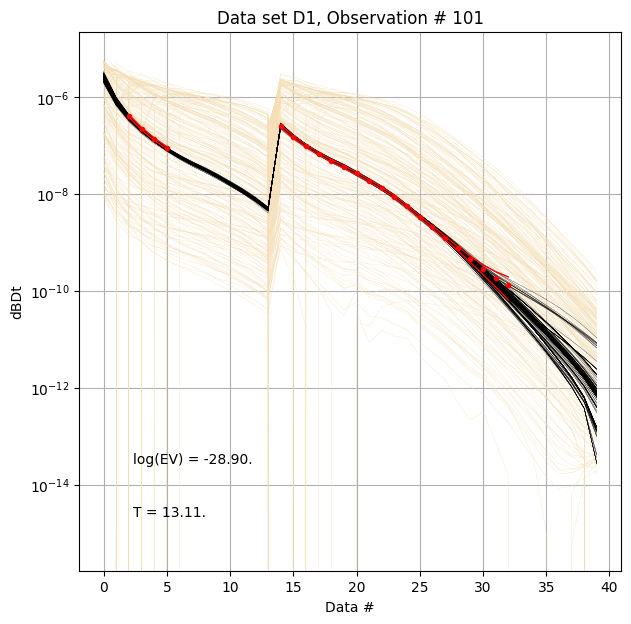

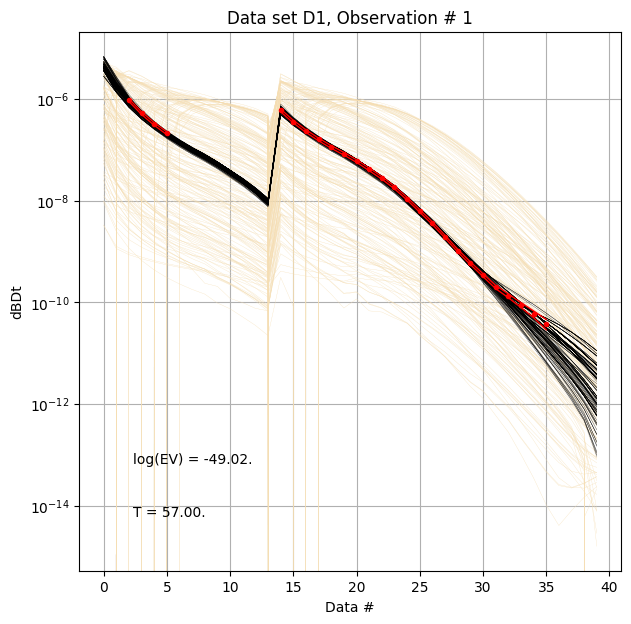

In [12]:
ig.plot_data_prior_post(f_post_h5, i_plot=100,hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_h5, i_plot=0,hardcopy=hardcopy)

### Evidence and Temperature

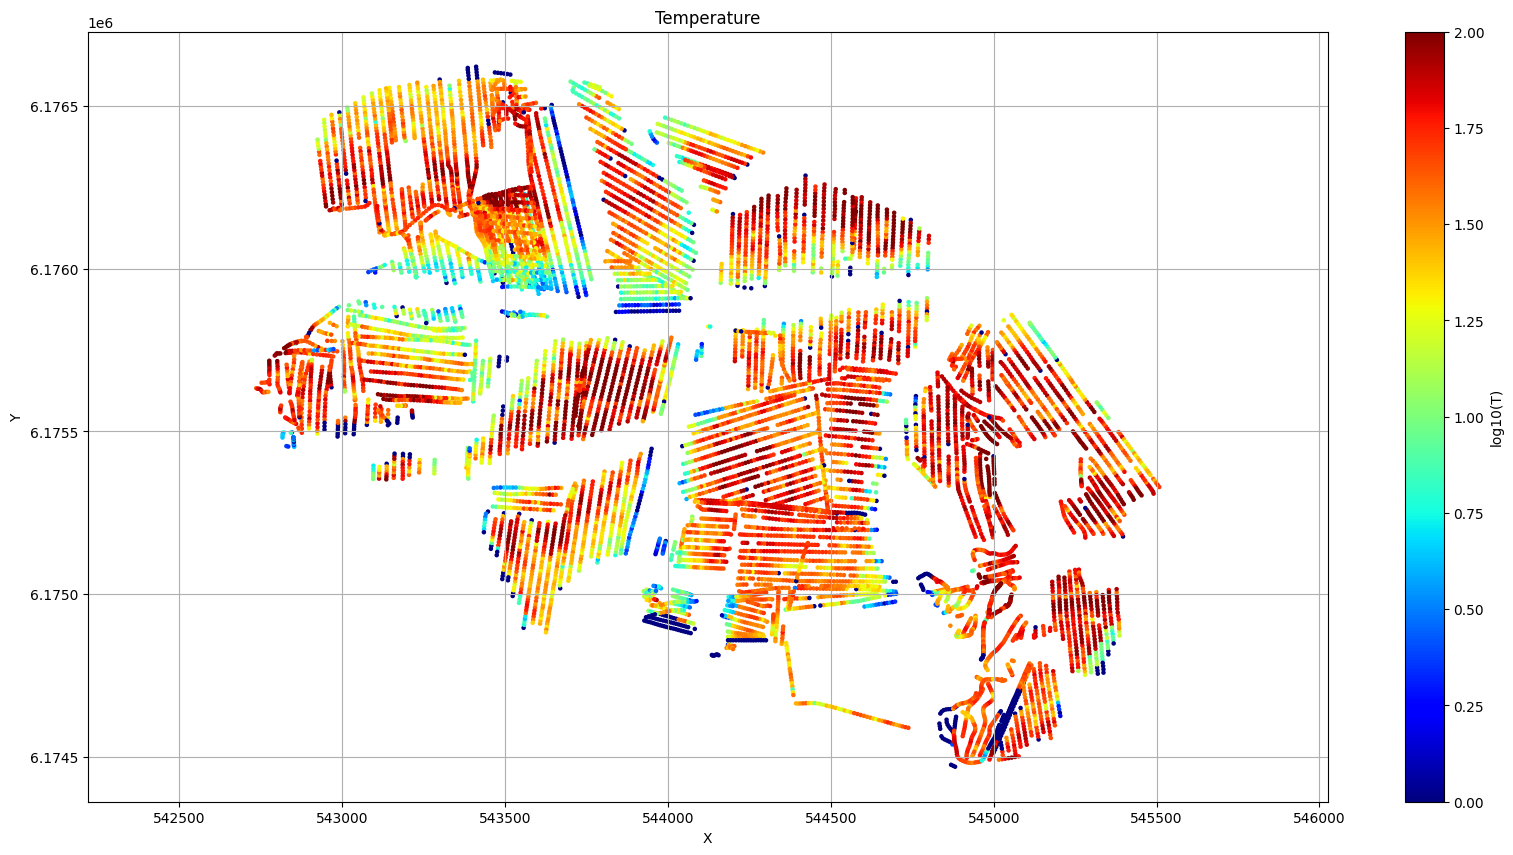

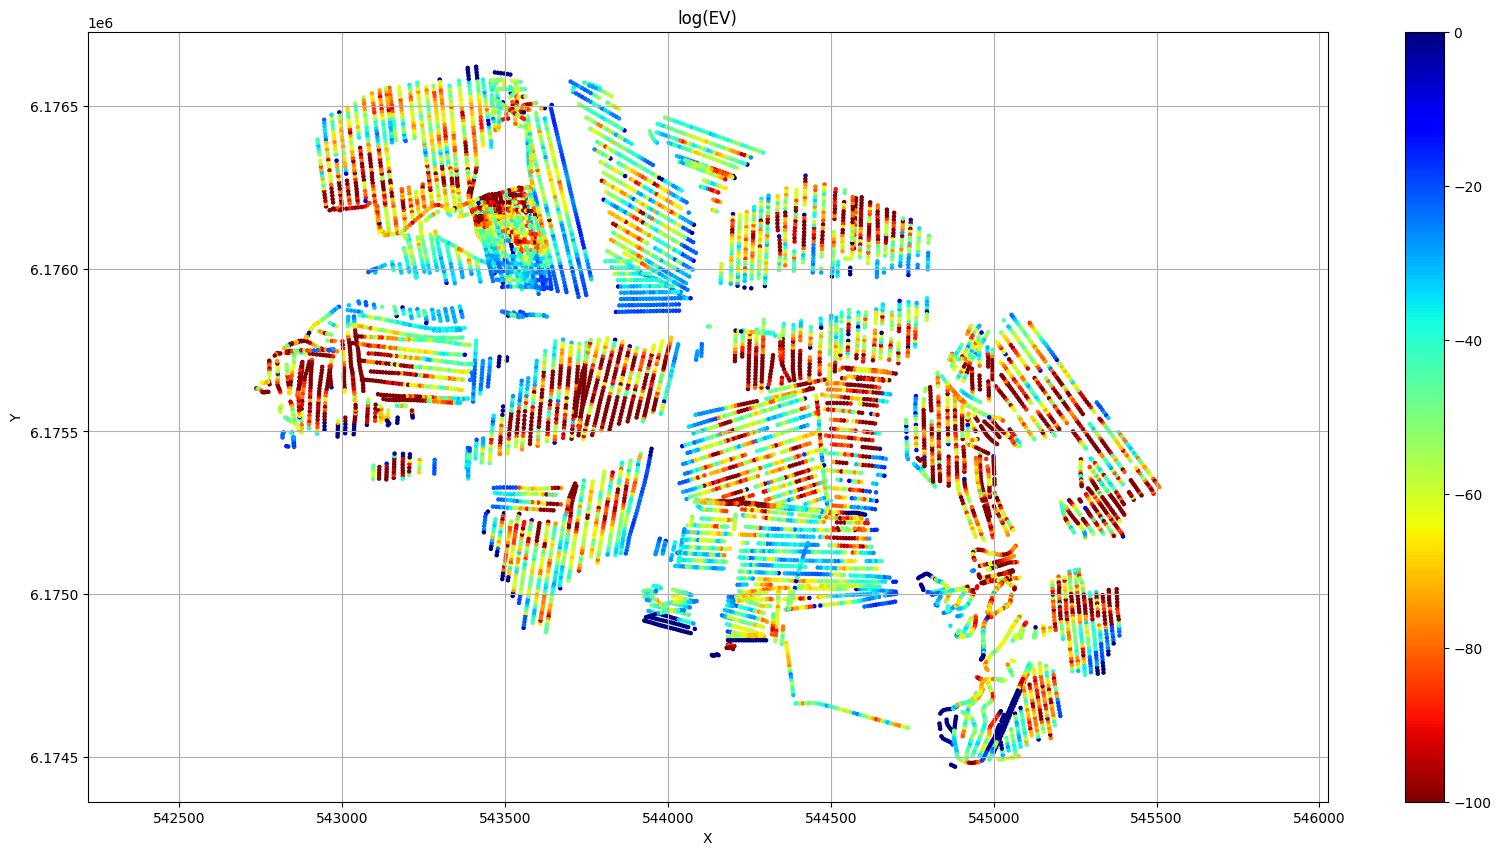

In [13]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T',hardcopy=hardcopy)
# Plot the evidence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV',hardcopy=hardcopy)

### Profile

Plot a profile of posterior statistics of model parameters 1 (resistivity)

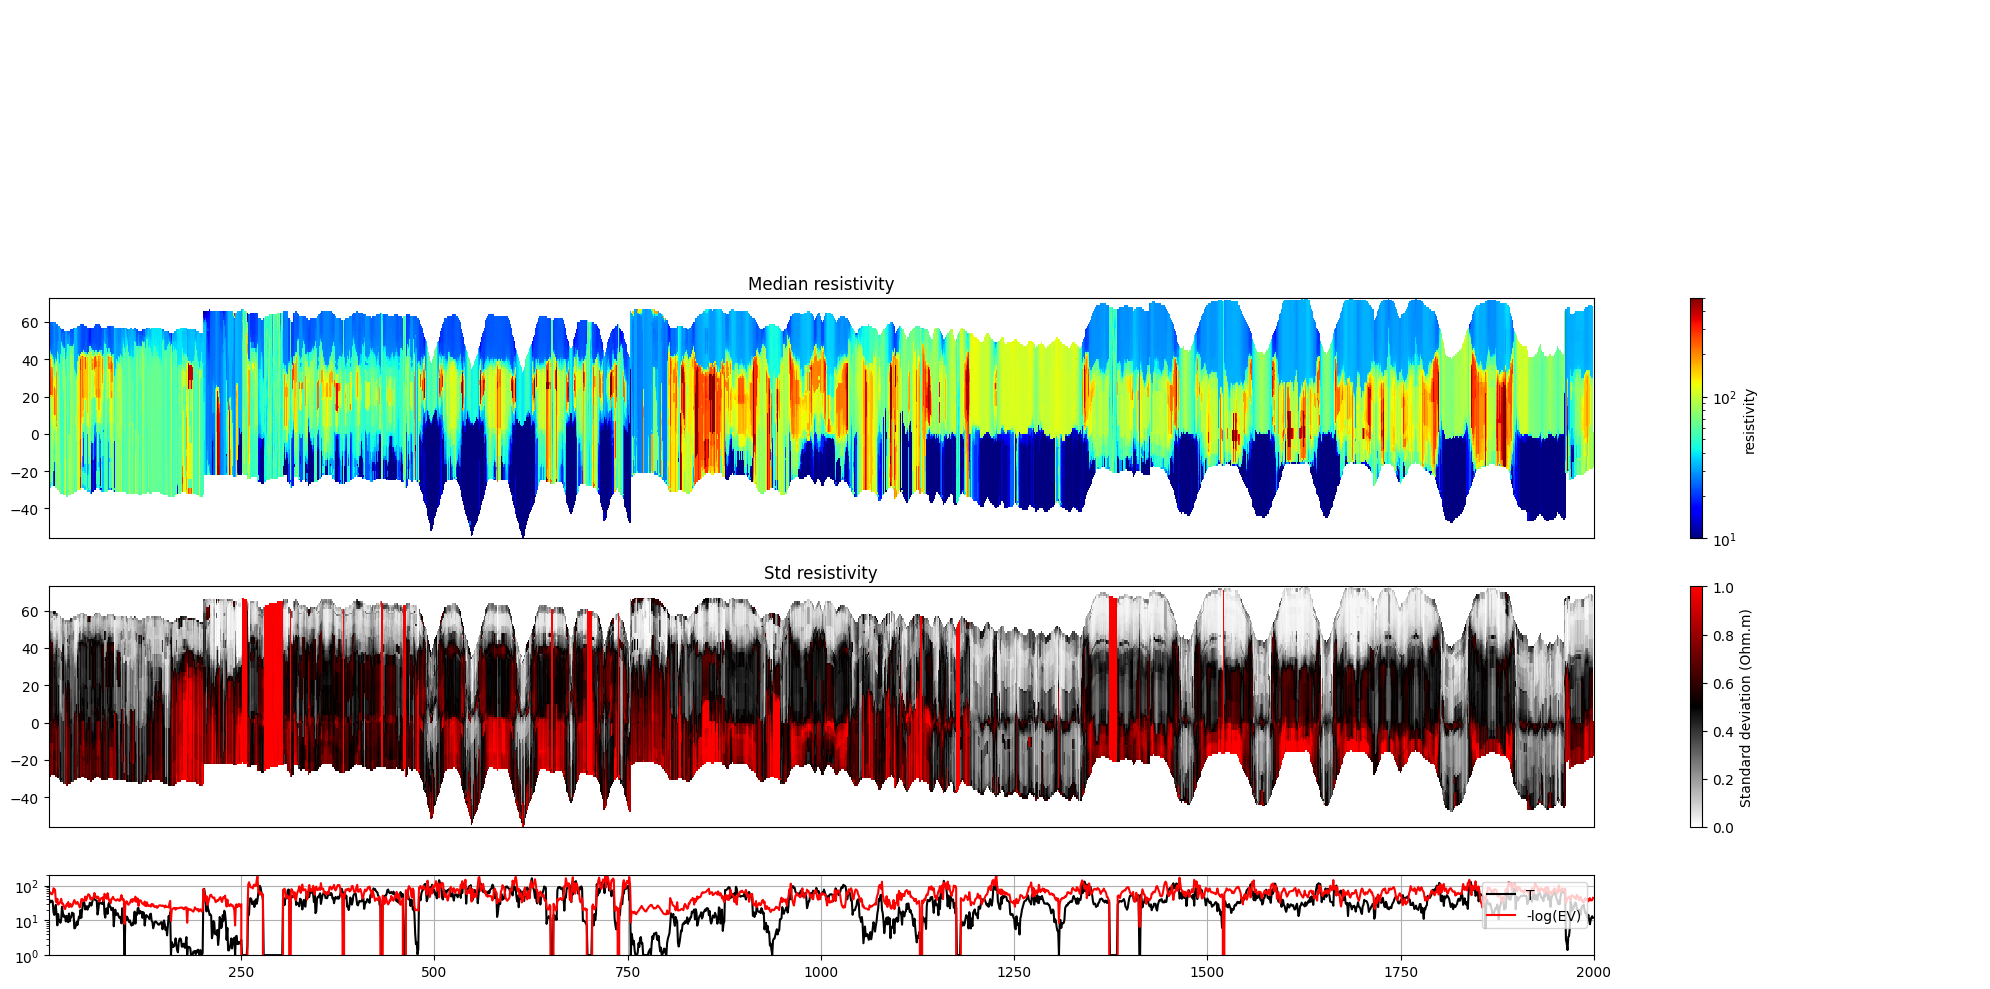

In [14]:
ig.plot_profile(f_post_h5, i1=1, i2=2000, im=1, hardcopy=hardcopy)

### Plot 2d Features

First plot the median resistivity in layers 5, 30, and 50

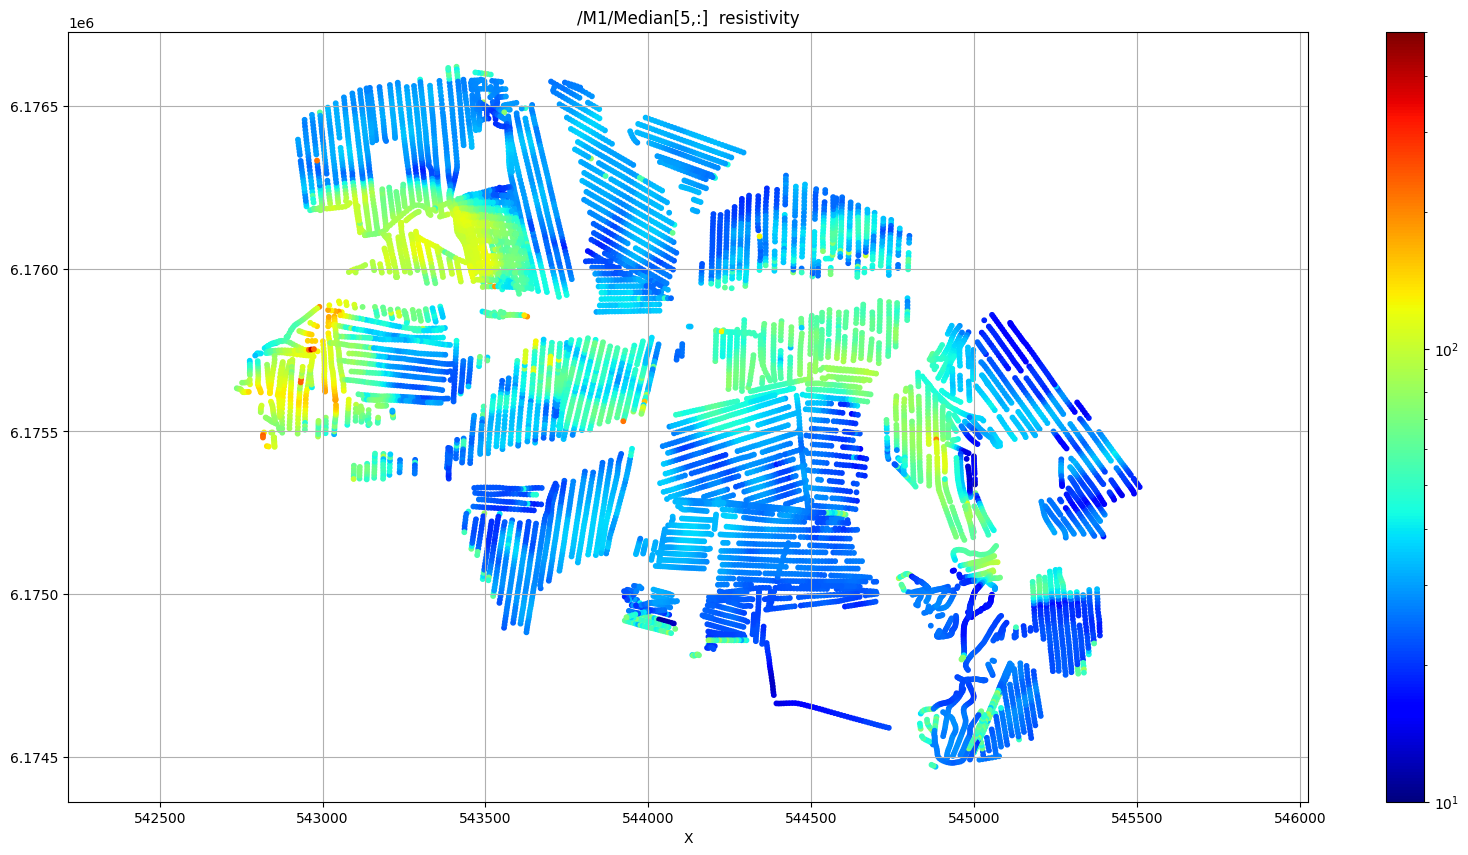

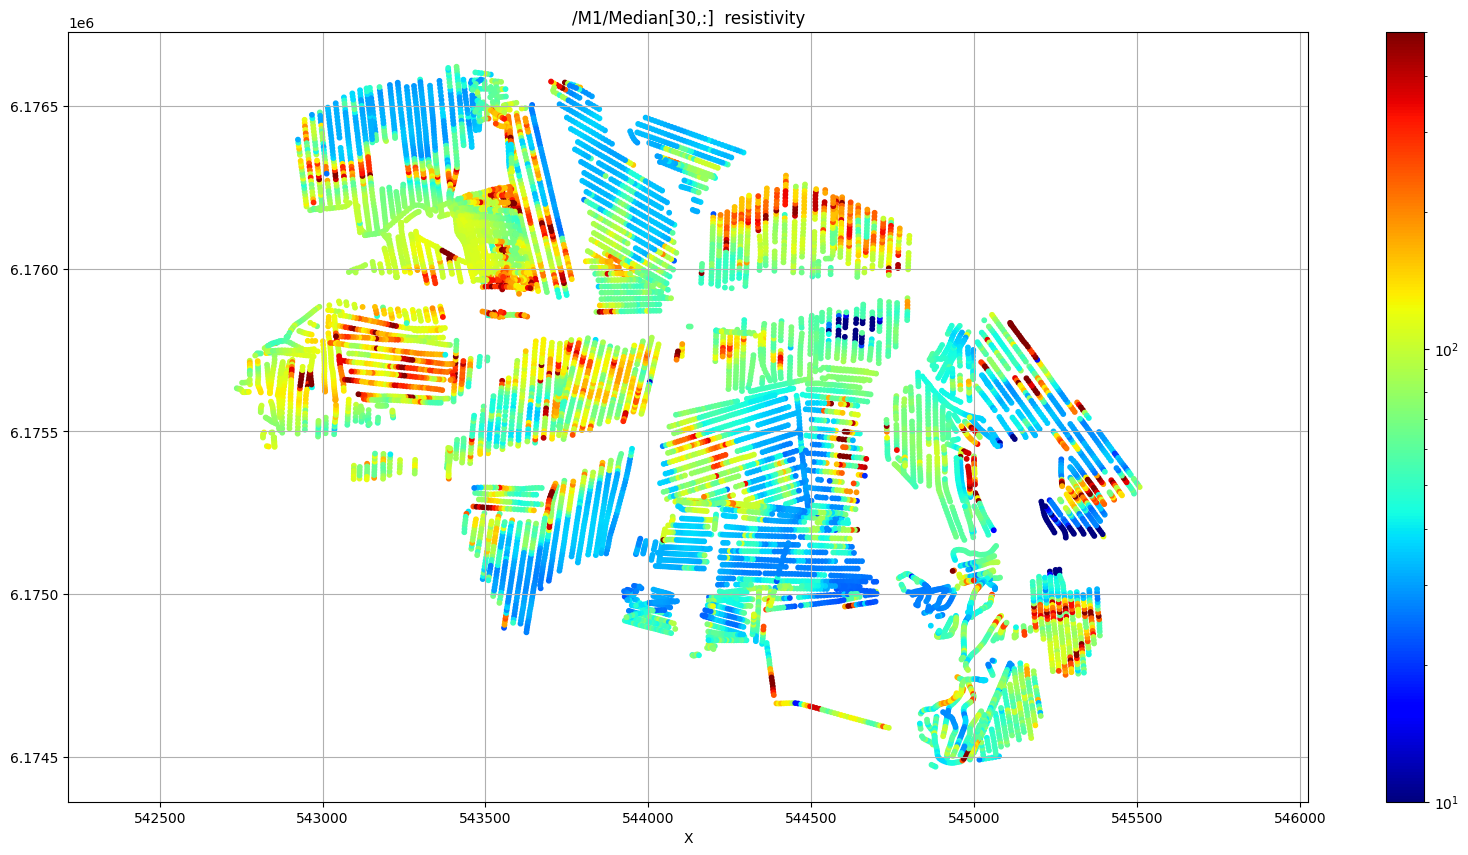

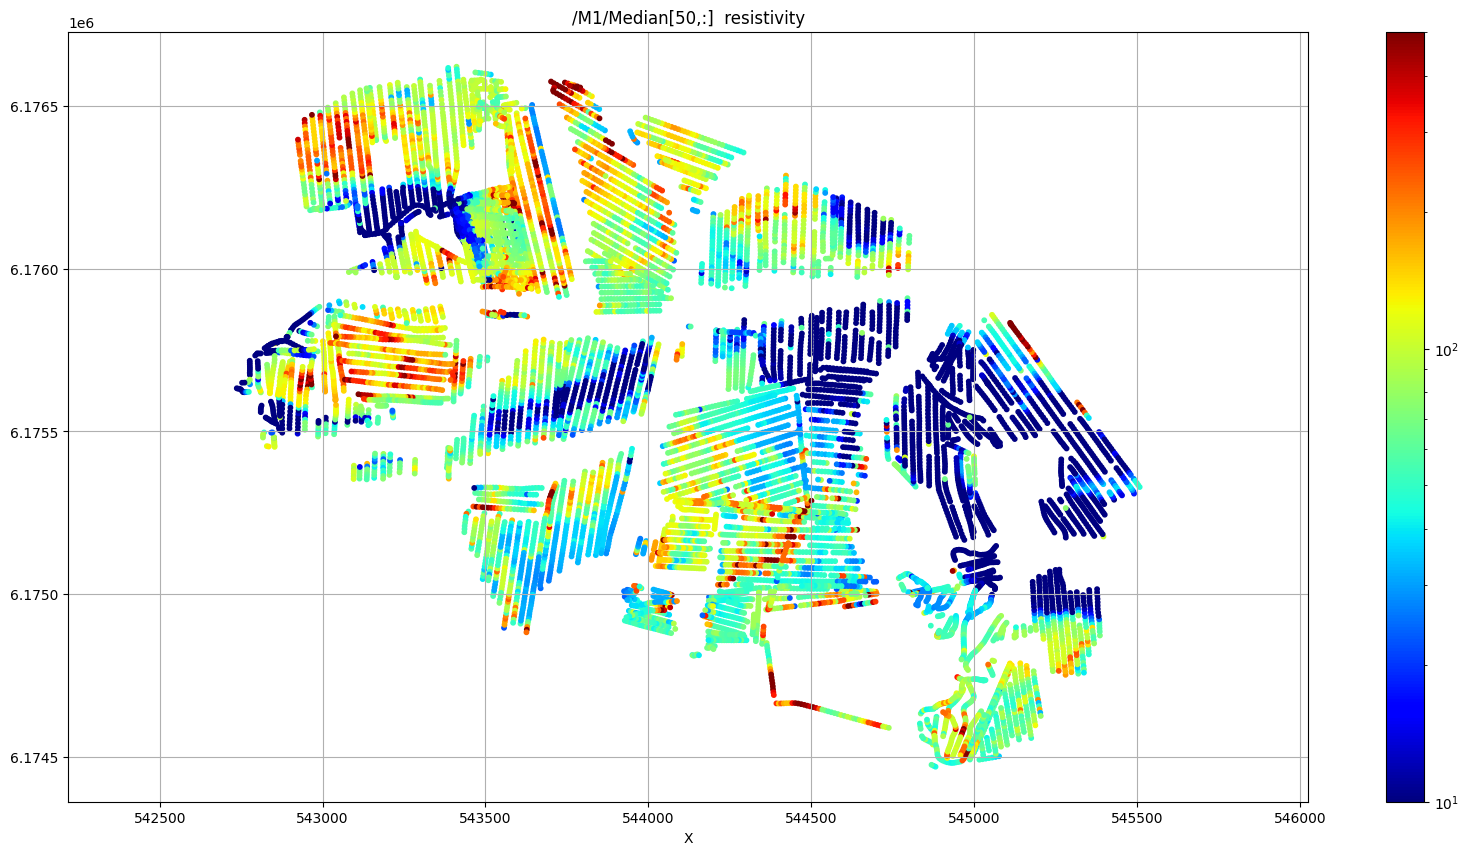

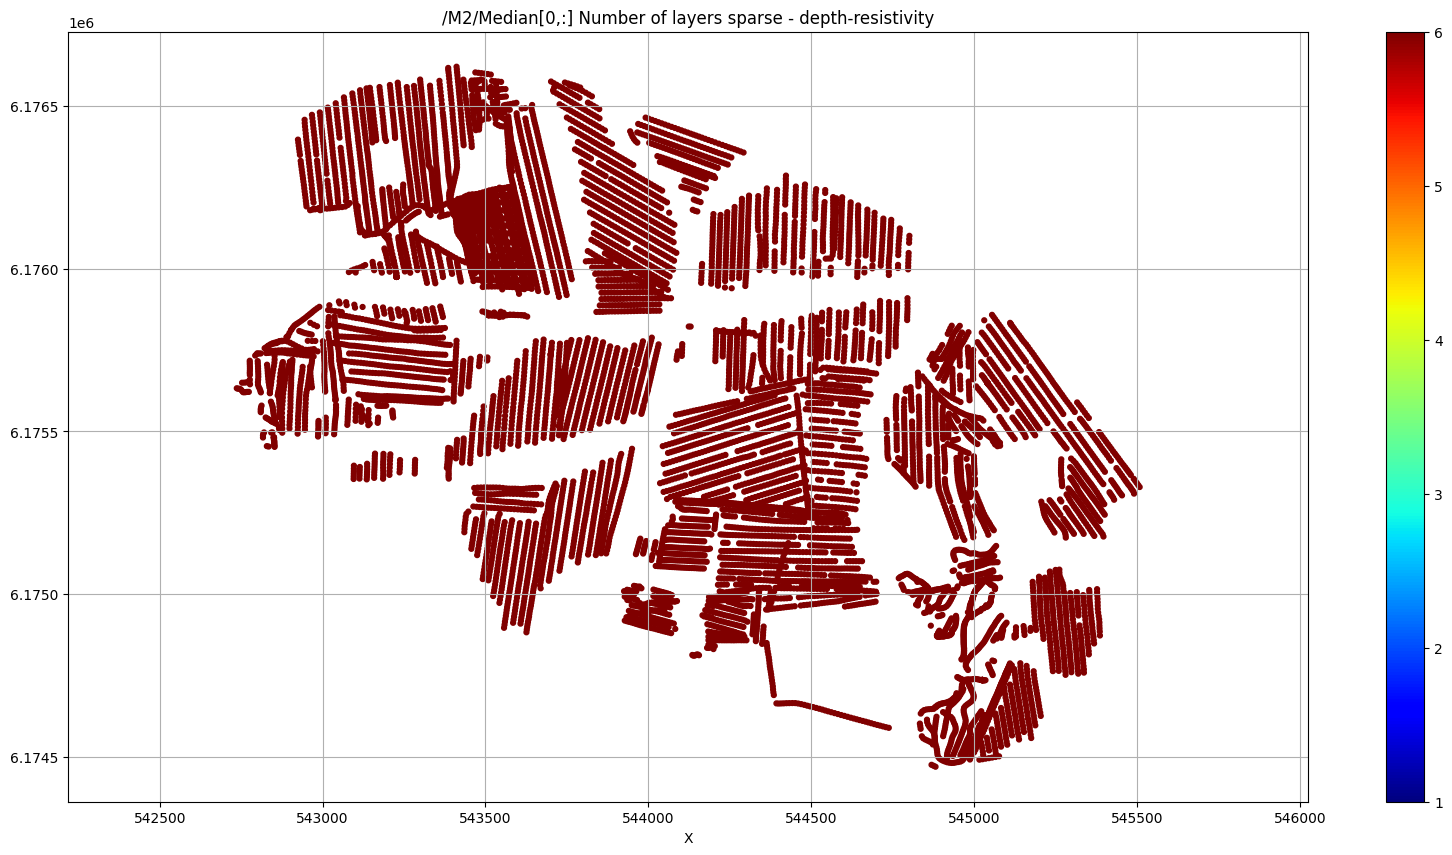

In [15]:

# Plot a 2D feature: Resistivity in layer 10
try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=5, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=30, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=50, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass




try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Median', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=12,hardcopy=hardcopy)
    plt.show()
except:
    pass

## Export to CSV format

In [16]:
f_csv, f_point_csv = ig.post_to_csv(f_post_h5)

Writing to POST_M1.csv
----------------------------------------------------
Creating point data set: Median
Creating point data set: Mean
Creating point data set: Std
- saving to : POST_M1_point.csv


----------------------------------------------------
Creating point data set: Median


Creating point data set: Mean


Creating point data set: Std


- saving to : /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_CHI2_NF_4_log-uniform_N100000_TX07_20240802_2x4_RC20-39_Nh280_Nf12_Nu100000_aT1_M1_point.csv


In [17]:
# Read the CSV file
#f_point_csv = 'POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N100000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu100000_aT1_M1_point.csv'
import pandas as pd
df = pd.read_csv(f_point_csv)
df.head()

X          Y      Z   LINE     Median       Mean       Std
0  543822.9  6176069.6  58.82  140.0  19.614134  72.278587  0.425464
1  543822.9  6176069.6  57.82  140.0  19.614134  60.507236  0.346712
2  543822.9  6176069.6  56.82  140.0  19.614134  79.798561  0.385567
3  543822.9  6176069.6  55.82  140.0  19.614134  40.220322  0.231718
4  543822.9  6176069.6  54.82  140.0  19.614134  40.933849  0.231308

In [18]:
# Use Pyvista to plot X,Y,Z,Median
plPyVista = False
if plPyVista:
    import pyvista as pv
    import numpy as np
    from pyvista import examples
    #pv.set_jupyter_backend('client')
    pv.set_plot_theme("document")
    p = pv.Plotter(notebook=True)
    p = pv.Plotter()
    filtered_df = df[(df['Median'] < 50) | (df['Median'] > 200)]
    #filtered_df = df[(df['LINE'] > 1000) & (df['LINE'] < 1400) ]
    points = filtered_df[['X', 'Y', 'Z']].values[:]
    median = np.log10(filtered_df['Mean'].values[:])
    opacity = np.where(filtered_df['Median'].values[:] < 100, 0.5, 1.0)
    #p.add_points(points, render_points_as_spheres=True, point_size=3, scalars=median, cmap='jet', opacity=opacity)
    p.add_points(points, render_points_as_spheres=True, point_size=6, scalars=median, cmap='hot')
    p.show_grid()
    p.show()